
 svd1 _________________________________________
 svd1 _________________________________________
 svd1 _________________________________________
 svd1 _________________________________________
 svd1 _________________________________________

ALL
Nicole: (275, 106)
Nicole2: (127, 92)
Balance: Outcome
bad        71
good       56
dtype: int64
________________DecisionTree________________
Average accuracy score for DecisionTree: 1.6136363636363635
DecisionTree - Precision: 0.5
DecisionTree - Recall: 0.4107142857142857
DecisionTree - F1-Score: 0.45098039215686275
True Positive(TP)  =  23
False Positive(FP) =  23
True Negative(TN)  =  48
False Negative(FN) =  33
Accuracy of the binary classifier = 0.559


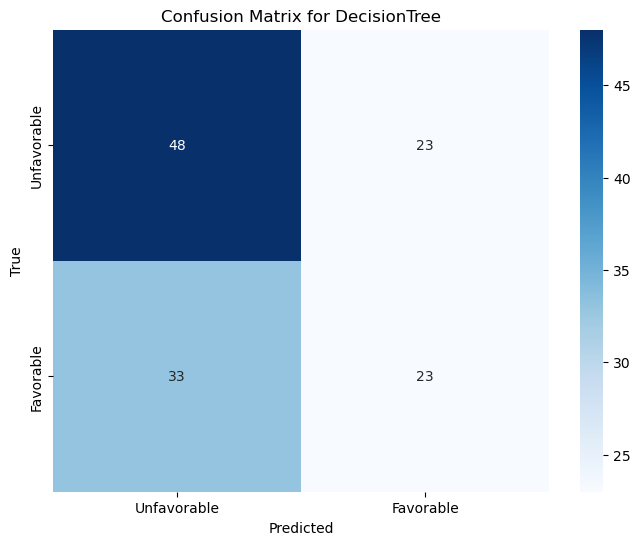

DecisionTree - Sensitivity (Recall): 0.4107142857142857
DecisionTree - Specificity: 0.4107142857142857


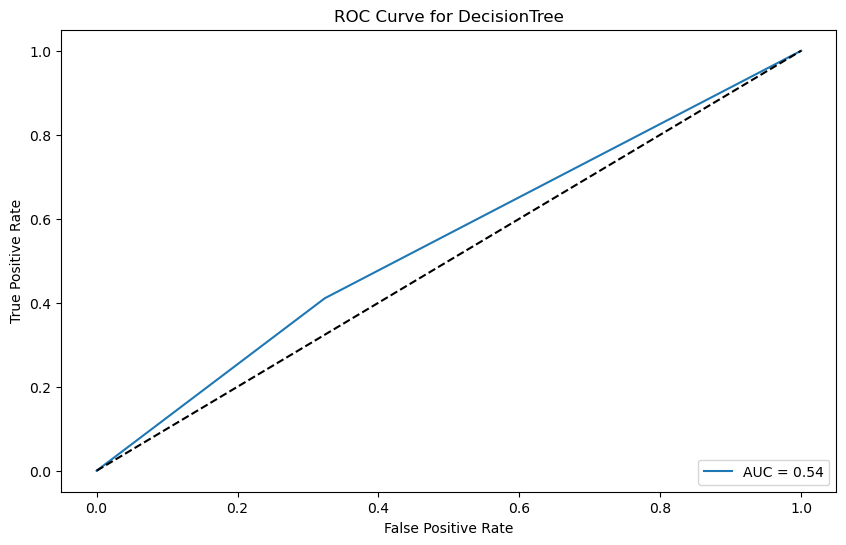

ValueError: The 'groups' parameter should not be None.

In [73]:

#AVERAGED ONLY ACROSS ELECTRODES (91 feature vector)


#Select features according to the k highest scores.

from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_classif


    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut, learning_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.inspection import permutation_importance


########### *YES THIS ONE IS THE MAIN FROM MAY 26 2024* ########################


# LZC
#####################################################################################################################    
##                                                                                                                 ##
##                 LOADING DATAFRAME & RESHAPING IT & ADDING LABELS    +  NEW DICTIONARIES                           ## 
##################################################################################################################### 
import string
#OLD #Uoutcomedic={'NETICU01':'1','NETICU02':'0','NETICU03':'0','NETICU04':'1','NETICU05':'1','NETICU06':'0','NETICU08':'1','NETICU11':'1','NETICU13':'0','NETICU15':'0','NETICU17':'1','NETICU18':'1','NETICU19':'1','NETICU20':'1','NETICU22':'0','NETICU24':'0','NETICU25':'0','NETICU27':'1','NETICU28':'0','NETICU29':'1','NETICU30':'0','CCTC03':'1','CCTC04':'1','CCTC05':'1','MSICU05':'1','MSICU07':'0','MSICU09':'0','MSICU10':'0','MSICU14':'0','MSICU15':'0','MSICU16':'0','MSICU18':'0','MSICU19':'1','MSICU21':'0','MSICU22':'1','MSICU26':'1','MSICU28':'1','MSICU29':'1','MSICU30':'1','HC01':'1','HC02':'1','HC03':'1','HC04':'1','HC05':'1','HC06':'1','HC07':'1','HC08':'1','HC09':'1','HC10':'1','HC11':'1','HC12':'1','HC13':'1','HC14':'1','HC15':'1','HC16':'1','HC17':'1','HC18':'1'}#outcomesNA = {'NETICU01':'1','NETICU02':'0','NETICU03':'0','NETICU04':'NA','NETICU05':'NA','NETICU06':'0','NETICU08':'1','NETICU11':'1','NETICU13':'0','NETICU15':'NA','NETICU17':'1','NETICU18':'1','NETICU19':'1','NETICU20':'1','NETICU22':'0','NETICU24':'0','NETICU25':'0','NETICU27':'1','NETICU28':'0','NETICU29':'NA','NETICU30':'0','CCTC03':'NA','CCTC04':'1','CCTC05':'NA','MSICU05':'1','MSICU07':'0','MSICU09':'0','MSICU10':'0','MSICU14':'0','MSICU15':'0','MSICU16':'0','MSICU18':'0','MSICU19':'NA','MSICU21':'0','MSICU22':'1','MSICU26':'1','MSICU28':'NA','MSICU29':'NA','MSICU30':'NA','HC01':'1','HC02':'1','HC03':'1','HC04':'1','HC05':'1','HC06':'1','HC07':'1','HC08':'1','HC09':'1','HC10':'1','HC11':'1','HC12':'1','HC13':'1','HC14':'1','HC15':'1','HC16':'1','HC17':'1','HC18':'1'}#outcomesGuess = {'NETICU01':'1','NETICU02':'0','NETICU03':'0','NETICU04':'0','NETICU05':'1','NETICU06':'0','NETICU08':'1','NETICU11':'1','NETICU13':'0','NETICU15':'0','NETICU17':'1','NETICU18':'1','NETICU19':'1','NETICU20':'1','NETICU22':'0','NETICU24':'0','NETICU25':'0','NETICU27':'1','NETICU28':'0','NETICU29':'1','NETICU30':'0','CCTC03':'1','CCTC04':'1','CCTC05':'0','MSICU05':'1','MSICU07':'0','MSICU09':'0','MSICU10':'0','MSICU14':'0','MSICU15':'0','MSICU16':'0','MSICU18':'0','MSICU19':'1','MSICU21':'0','MSICU22':'1','MSICU26':'1','MSICU28':'1','MSICU29':'0','MSICU30':'0','HC01':'1','HC02':'1','HC03':'1','HC04':'1','HC05':'1','HC06':'1','HC07':'1','HC08':'1','HC09':'1','HC10':'1','HC11':'1','HC12':'1','HC13':'1','HC14':'1','HC15':'1','HC16':'1','HC17':'1','HC18':'1'}
#OLD #seddic={'CCTC03_IT':'ON','CCTC03_RS':'ON','CCTC03_ST':'ON','CCTC03part2_IT':'ON','CCTC03part2_RS':'ON','CCTC03part2_ST':'ON','CCTC04_IT':'ON','CCTC04_RS':'ON','CCTC04_RSredo':'ON','CCTC04_ST':'ON','CCTC05_IT':'ON','CCTC05_RS':'ON','CCTC05_ST':'ON','HC01_IT':'-','HC01_ST':'-','HC02_IT':'-','HC02_ST':'-','HC03_IT':'-','HC03_ST':'-','HC04_IT':'-','HC04_ST':'-','HC05_IT1st':'-','HC05_IT2nd':'-','HC05_ST':'-','HC06_IT':'-','HC06_ST':'-','HC07_IT':'-','HC07_ST':'-','HC08_IT':'-','HC08_ST':'-','HC09_IT':'-','HC09_ST':'-','HC10_IT':'-','HC10_ST':'-','HC11_IT':'-','HC11_ST':'-','HC12_IT':'-','HC12_ST':'-','HC13_IT':'-','HC13_ST':'-','HC14_IT':'-','HC14_ST':'-','HC15_IT':'-','HC15_ST':'-','HC16_IT':'-','HC16_ST':'-','HC17_IT':'-','HC17_ST':'-','HC18_IT':'-','HC18_ST':'-','MSICU05_IT':'OFF','MSICU05_RS':'OFF','MSICU05_ST':'OFF','MSICU05part2_IT':'OFF','MSICU05part2_RS':'OFF','MSICU05part2_ST':'OFF','MSICU07_IT':'OFF','MSICU07_RS':'OFF','MSICU07_ST':'OFF','MSICU09_IT':'OFF','MSICU09_RS':'OFF','MSICU09_ST':'OFF','MSICU09part2_IT':'OFF','MSICU09part2_RS':'OFF','MSICU09part2_ST':'OFF','MSICU10_IT':'OFF','MSICU10_RS':'OFF','MSICU10_ST':'OFF','MSICU14_IT':'OFF','MSICU14_RS':'OFF','MSICU14_ST':'OFF','MSICU15_IT':'ON','MSICU15_RS':'ON','MSICU15_ST':'ON','MSICU16_IT':'OFF','MSICU16_RS':'OFF','MSICU16_ST':'OFF','MSICU18_IT':'OFF','MSICU18_RS':'OFF','MSICU18_ST':'OFF','MSICU19_IT':'OFF','MSICU19_RS':'OFF','MSICU19_ST':'OFF','MSICU21_IT':'OFF','MSICU21_RS':'OFF','MSICU21_ST':'OFF','MSICU22_IT':'OFF','MSICU22_RS':'OFF','MSICU22_ST':'OFF','MSICU26_IT':'ON','MSICU26_RS':'ON','MSICU26_ST':'ON','MSICU28_IT':'OFF','MSICU28_RS':'OFF','MSICU28_ST':'OFF','MSICU29_IT':'OFF','MSICU29_RS':'OFF','MSICU29_ST':'OFF','MSICU30_IT':'OFF','MSICU30_RS':'OFF','MSICU30_ST':'OFF','NETICU01sedoff_IT':'ON','NETICU01sedoff_RS':'ON','NETICU01sedoff_ST':'ON','NETICU01sedon1_IT':'ON','NETICU01sedon1_RS':'ON','NETICU01sedon1_ST':'ON','NETICU02sedoff_IT':'OFF','NETICU02sedoff_RS':'OFF','NETICU02sedoff_ST':'OFF','NETICU02sedon1_IT':'ON','NETICU02sedon1_RS':'ON','NETICU02sedon1_ST':'ON','NETICU03sedoff_IT':'OFF','NETICU03sedoff_RS':'OFF','NETICU03sedoff_ST':'OFF','NETICU03sedon1_IT':'ON','NETICU03sedon1_RS':'ON','NETICU03sedon1_ST':'ON','NETICU04sedoff_IT':'OFF','NETICU04sedoff_RS':'OFF','NETICU04sedoff_ST':'OFF','NETICU04sedon1_IT':'ON','NETICU04sedon1_RS':'ON','NETICU04sedon1_ST':'ON','NETICU05sedoff_IT':'OFF','NETICU05sedoff_RS':'OFF','NETICU05sedoff_ST':'OFF','NETICU05sedon1_IT':'ON','NETICU05sedon1_RS':'ON','NETICU05sedon1_ST':'ON','NETICU06sedoff_IT':'OFF','NETICU06sedoff_RS':'OFF','NETICU06sedoff_ST':'OFF','NETICU06sedon1_IT':'ON','NETICU06sedon1_RS':'ON','NETICU06sedon1_ST':'ON','NETICU08sedoff_IT':'OFF','NETICU08sedoff_ST':'OFF','NETICU08sedon2_IT':'ON','NETICU08sedon2_RS':'ON','NETICU08sedon2_ST':'ON','NETICU11sedoff_IT':'OFF','NETICU11sedoff_RS':'OFF','NETICU11sedoff_ST':'OFF','NETICU11sedon1_IT':'ON','NETICU11sedon1_RS':'ON','NETICU11sedon1_ST':'ON','NETICU13sedoff_IT':'OFF','NETICU13sedoff_RS':'OFF','NETICU13sedoff_ST':'OFF','NETICU13sedon1_IT':'ON','NETICU13sedon1_RS':'ON','NETICU13sedon1_ST':'ON','NETICU15sedoff_IT':'OFF','NETICU15sedoff_RS':'OFF','NETICU15sedoff_ST':'OFF','NETICU15sedon1_IT':'ON','NETICU15sedon1_RS':'ON','NETICU15sedon1_ST':'ON','NETICU17sedoff_IT':'OFF','NETICU17sedoff_RS':'OFF','NETICU17sedoff_ST':'OFF','NETICU17sedon1_IT':'ON','NETICU17sedon1_RS':'ON','NETICU17sedon1_ST':'ON','NETICU18sedoff_RS':'OFF','NETICU18sedon1_IT':'ON','NETICU18sedon1_RS':'ON','NETICU18sedon1_ST':'ON','NETICU19sedoff_IT':'OFF','NETICU19sedoff_RS':'OFF','NETICU19sedoff_ST':'OFF','NETICU19sedon1_IT':'ON','NETICU19sedon1_RS':'ON','NETICU19sedon1_ST':'ON','NETICU20sedoff_RS':'OFF','NETICU20sedon1_IT':'ON','NETICU20sedon1_RS':'ON','NETICU20sedon1_ST':'ON','NETICU22sedoff_IT':'OFF','NETICU22sedoff_RS':'OFF','NETICU22sedoff_ST':'OFF','NETICU22sedon1_IT':'ON','NETICU22sedon1_RS':'ON','NETICU22sedon1_ST':'ON','NETICU24sedoff_IT':'OFF','NETICU24sedoff_RS':'OFF','NETICU24sedoff_ST':'OFF','NETICU24sedon1_IT':'ON','NETICU24sedon1_RS':'ON','NETICU24sedon1_ST':'ON','NETICU25sedoff_RS':'OFF','NETICU25sedon1_IT':'ON','NETICU25sedon1_RS':'ON','NETICU25sedon1_ST':'ON','NETICU27sedoff_IT':'OFF','NETICU27sedoff_RS':'OFF','NETICU27sedoff_ST':'OFF','NETICU27sedon1_IT':'ON','NETICU27sedon1_RS':'ON','NETICU27sedon1_ST':'ON','NETICU28sedoff_IT':'OFF','NETICU28sedoff_RS':'OFF','NETICU28sedoff_ST':'OFF','NETICU28sedon1_IT':'ON','NETICU28sedon1_RS':'ON','NETICU28sedon1_ST':'ON','NETICU29sedoff_IT':'OFF','NETICU29sedoff_RS':'OFF','NETICU29sedoff_ST':'OFF','NETICU29sedon1_IT':'ON','NETICU29sedon1_RS':'ON','NETICU29sedon1_ST':'ON','NETICU30sedoff_IT':'OFF','NETICU30sedoff_RS':'OFF','NETICU30sedoff_ST':'OFF','NETICU30sedon1_IT':'ON','NETICU30sedon1_RS':'ON','NETICU30sedon1_ST':'ON'}
#OLD #GCSdic={'CCTC03_IT':'3','CCTC03_RS':'3','CCTC03_ST':'3','CCTC03part2_IT':'3','CCTC03part2_RS':'3','CCTC03part2_ST':'3','CCTC04_IT':'3','CCTC04_RS':'3','CCTC04_RSredo':'3','CCTC04_ST':'3','CCTC05_IT':'3','CCTC05_RS':'3','CCTC05_ST':'3','HC01_IT':'15','HC01_ST':'15','HC02_IT':'15','HC02_ST':'15','HC03_IT':'15','HC03_ST':'15','HC04_IT':'15','HC04_ST':'15','HC05_IT1st':'15','HC05_IT2nd':'15','HC05_ST':'15','HC06_IT':'15','HC06_ST':'15','HC07_IT':'15','HC07_ST':'15','HC08_IT':'15','HC08_ST':'15','HC09_IT':'15','HC09_ST':'15','HC10_IT':'15','HC10_ST':'15','HC11_IT':'15','HC11_ST':'15','HC12_IT':'15','HC12_ST':'15','HC13_IT':'15','HC13_ST':'15','HC14_IT':'15','HC14_ST':'15','HC15_IT':'15','HC15_ST':'15','HC16_IT':'15','HC16_ST':'15','HC17_IT':'15','HC17_ST':'15','HC18_IT':'15','HC18_ST':'15','MSICU05_IT':'3','MSICU05_RS':'3','MSICU05_ST':'3','MSICU05part2_IT':'15','MSICU05part2_RS':'15','MSICU05part2_ST':'15','MSICU07_IT':'3','MSICU07_RS':'3','MSICU07_ST':'3','MSICU09_IT':'5','MSICU09_RS':'5','MSICU09_ST':'5','MSICU09part2_IT':'4','MSICU09part2_RS':'4','MSICU09part2_ST':'4','MSICU10_IT':'4','MSICU10_RS':'4','MSICU10_ST':'4','MSICU14_IT':'3','MSICU14_RS':'3','MSICU14_ST':'3','MSICU15_IT':'6','MSICU15_RS':'6','MSICU15_ST':'6','MSICU16_IT':'3','MSICU16_RS':'3','MSICU16_ST':'3','MSICU18_IT':'7','MSICU18_RS':'7','MSICU18_ST':'7','MSICU19_IT':'8','MSICU19_RS':'8','MSICU19_ST':'8','MSICU21_IT':'9','MSICU21_RS':'9','MSICU21_ST':'9','MSICU22_IT':'4','MSICU22_RS':'4','MSICU22_ST':'4','MSICU26_IT':'7','MSICU26_RS':'7','MSICU26_ST':'7','MSICU28_IT':'6','MSICU28_RS':'6','MSICU28_ST':'6','MSICU29_IT':'9','MSICU29_RS':'9','MSICU29_ST':'9','MSICU30_IT':'5','MSICU30_RS':'5','MSICU30_ST':'5','NETICU01sedoff_IT':'3','NETICU01sedoff_RS':'3','NETICU01sedoff_ST':'3','NETICU01sedon1_IT':'3','NETICU01sedon1_RS':'3','NETICU01sedon1_ST':'3','NETICU02sedoff_IT':'10','NETICU02sedoff_RS':'10','NETICU02sedoff_ST':'10','NETICU02sedon1_IT':'3','NETICU02sedon1_RS':'3','NETICU02sedon1_ST':'3','NETICU03sedoff_IT':'6','NETICU03sedoff_RS':'6','NETICU03sedoff_ST':'6','NETICU03sedon1_IT':'6','NETICU03sedon1_RS':'6','NETICU03sedon1_ST':'6','NETICU04sedoff_IT':'3','NETICU04sedoff_RS':'3','NETICU04sedoff_ST':'3','NETICU04sedon1_IT':'3','NETICU04sedon1_RS':'3','NETICU04sedon1_ST':'3','NETICU05sedoff_IT':'3','NETICU05sedoff_RS':'3','NETICU05sedoff_ST':'3','NETICU05sedon1_IT':'3','NETICU05sedon1_RS':'3','NETICU05sedon1_ST':'3','NETICU06sedoff_IT':'6','NETICU06sedoff_RS':'6','NETICU06sedoff_ST':'6','NETICU06sedon1_IT':'3','NETICU06sedon1_RS':'3','NETICU06sedon1_ST':'3','NETICU08sedoff_IT':'9','NETICU08sedoff_ST':'9','NETICU08sedon2_IT':'3','NETICU08sedon2_RS':'3','NETICU08sedon2_ST':'3','NETICU11sedoff_IT':'4','NETICU11sedoff_RS':'4','NETICU11sedoff_ST':'4','NETICU11sedon1_IT':'3','NETICU11sedon1_RS':'3','NETICU11sedon1_ST':'3','NETICU13sedoff_IT':'4','NETICU13sedoff_RS':'4','NETICU13sedoff_ST':'4','NETICU13sedon1_IT':'3','NETICU13sedon1_RS':'3','NETICU13sedon1_ST':'3','NETICU15sedoff_IT':'3','NETICU15sedoff_RS':'3','NETICU15sedoff_ST':'3','NETICU15sedon1_IT':'3','NETICU15sedon1_RS':'3','NETICU15sedon1_ST':'3','NETICU17sedoff_IT':'10','NETICU17sedoff_RS':'10','NETICU17sedoff_ST':'10','NETICU17sedon1_IT':'3','NETICU17sedon1_RS':'3','NETICU17sedon1_ST':'3','NETICU18sedoff_RS':'11','NETICU18sedon1_IT':'3','NETICU18sedon1_RS':'3','NETICU18sedon1_ST':'3','NETICU19sedoff_IT':'7','NETICU19sedoff_RS':'7','NETICU19sedoff_ST':'7','NETICU19sedon1_IT':'3','NETICU19sedon1_RS':'3','NETICU19sedon1_ST':'3','NETICU20sedoff_RS':'11','NETICU20sedon1_IT':'3','NETICU20sedon1_RS':'3','NETICU20sedon1_ST':'3','NETICU22sedoff_IT':'3','NETICU22sedoff_RS':'3','NETICU22sedoff_ST':'3','NETICU22sedon1_IT':'3','NETICU22sedon1_RS':'3','NETICU22sedon1_ST':'3','NETICU24sedoff_IT':'3','NETICU24sedoff_RS':'3','NETICU24sedoff_ST':'3','NETICU24sedon1_IT':'3','NETICU24sedon1_RS':'3','NETICU24sedon1_ST':'3','NETICU25sedoff_RS':'8','NETICU25sedon1_IT':'6','NETICU25sedon1_RS':'6','NETICU25sedon1_ST':'6','NETICU27sedoff_IT':'3','NETICU27sedoff_RS':'3','NETICU27sedoff_ST':'3','NETICU27sedon1_IT':'3','NETICU27sedon1_RS':'3','NETICU27sedon1_ST':'3','NETICU28sedoff_IT':'3','NETICU28sedoff_RS':'3','NETICU28sedoff_ST':'3','NETICU28sedon1_IT':'3','NETICU28sedon1_RS':'3','NETICU28sedon1_ST':'3','NETICU29sedoff_IT':'11','NETICU29sedoff_RS':'11','NETICU29sedoff_ST':'11','NETICU29sedon1_IT':'3','NETICU29sedon1_RS':'3','NETICU29sedon1_ST':'3','NETICU30sedoff_IT':'6','NETICU30sedoff_RS':'6','NETICU30sedoff_ST':'6','NETICU30sedon1_IT':'3','NETICU30sedon1_RS':'3','NETICU30sedon1_ST':'3'}
#OLD(57)# EVERYONE = ['NETICU01','NETICU02','NETICU03','NETICU04','NETICU05','NETICU06','NETICU08','NETICU11','NETICU13','NETICU15','NETICU17','NETICU18','NETICU19','NETICU20','NETICU22','NETICU24','NETICU25','NETICU27','NETICU28','NETICU29','NETICU30','CCTC03','CCTC04','CCTC05','MSICU05','MSICU07','MSICU09','MSICU10','MSICU14','MSICU15','MSICU16','MSICU18','MSICU19','MSICU21','MSICU22','MSICU26','MSICU28','MSICU29','MSICU30','HC01','HC02','HC03','HC04','HC05','HC06','HC07','HC08','HC09','HC10','HC11','HC12','HC13','HC14','HC15','HC16','HC17','HC18']
#OLD(60)# PT=['CCTC03','CCTC03part2','CCTC04','CCTC05','MSICU05','MSICU05part2','MSICU07','MSICU09','MSICU09part2','MSICU10','MSICU14','MSICU15','MSICU16','MSICU18','MSICU19','MSICU21','MSICU22','MSICU26','MSICU28','MSICU29','MSICU30','NETICU01sedoff','NETICU01sedon1','NETICU02sedoff','NETICU02sedon1','NETICU03sedoff','NETICU03sedon1','NETICU04sedoff','NETICU04sedon1','NETICU05sedoff','NETICU05sedon1','NETICU06sedoff','NETICU06sedon1','NETICU08sedoff','NETICU08sedon2','NETICU11sedoff','NETICU11sedon1','NETICU13sedoff','NETICU13sedon1','NETICU15sedoff','NETICU15sedon1','NETICU17sedoff','NETICU17sedon1','NETICU18sedon1','NETICU19sedoff','NETICU19sedon1','NETICU20sedon1','NETICU22sedoff','NETICU22sedon1','NETICU24sedoff','NETICU24sedon1','NETICU25sedon1','NETICU27sedoff','NETICU27sedon1','NETICU28sedoff','NETICU28sedon1','NETICU29sedoff','NETICU29sedon1','NETICU30sedoff','NETICU30sedon1']
PT = ['CCTC03', 'CCTC03part2', 'CCTC04', 'CCTC05', 'CCTC07NETICUsedoff', 'CCTC07NETICUsedon1', 'CCTC07', 'MSICU05', 'MSICU05part2', 'MSICU07', 'MSICU09', 'MSICU09part2', 'MSICU10', 'MSICU14', 'MSICU15', 'MSICU16', 'MSICU18', 'MSICU19', 'MSICU21', 'MSICU22', 'MSICU26', 'MSICU28', 'MSICU29', 'MSICU30', 'MSICU32', 'MSICU38', 'MSICU42', 'MSICU43', 'MSICU47', 'NETICU01sedoff', 'NETICU01sedon1', 'NETICU02sedoff', 'NETICU02sedon1', 'NETICU03sedoff', 'NETICU03sedon1', 'NETICU04sedoff', 'NETICU04sedon1', 'NETICU05sedoff', 'NETICU05sedon1', 'NETICU06sedoff', 'NETICU06sedon1', 'NETICU08sedoff', 'NETICU08sedon2', 'NETICU11sedoff', 'NETICU11sedon1', 'NETICU13sedoff', 'NETICU13sedon1', 'NETICU15sedoff', 'NETICU15sedon1', 'NETICU17sedoff', 'NETICU17sedon1', 'NETICU18sedon1', 'NETICU19sedoff', 'NETICU19sedon1', 'NETICU20sedon1', 'NETICU22sedoff', 'NETICU22sedon1', 'NETICU24sedoff', 'NETICU24sedon1', 'NETICU25sedon1', 'NETICU27sedoff', 'NETICU27sedon1', 'NETICU28sedoff', 'NETICU28sedon1', 'NETICU29sedoff', 'NETICU29sedon1', 'NETICU30sedoff', 'NETICU30sedon1', 'NETICU31sedoff', 'NETICU31sedon1', 'NETICU33sedon1', 'NETICU38sedon1', 'NETICU40sedoff', 'NETICU40sedon1', 'NETICU41sedoff', 'NETICU41sedon1', 'NETICU41sedon2', 'NETICU46sedon1']
EVERYONE = ['NETICU01','NETICU02','NETICU03','NETICU04','NETICU05','NETICU06','NETICU08','NETICU11','NETICU13','NETICU15','NETICU17','NETICU18','NETICU19','NETICU20','NETICU22','NETICU24','NETICU25','NETICU27','NETICU28','NETICU29','NETICU30','NETICU31','NETICU33','NETICU38','NETICU40','NETICU41','NETICU46','CCTC03','CCTC04','CCTC05','CCTC07','CCTC07NETICU','MSICU05','MSICU07','MSICU09','MSICU10','MSICU14','MSICU15','MSICU16','MSICU18','MSICU19','MSICU21','MSICU22','MSICU26','MSICU28','MSICU29','MSICU30','MSICU32','MSICU38','MSICU42','MSICU43','MSICU47','HC01','HC02','HC03','HC04','HC05','HC06','HC07','HC08','HC09','HC10','HC11','HC12','HC13','HC14','HC15','HC16','HC17','HC18']
Uoutcomedic={'CCTC03_IT': '1', 'CCTC03_RS': '1', 'CCTC03_ST': '1', 'CCTC03part2_IT': '1', 'CCTC03part2_RS': '1', 'CCTC03part2_ST': '1', 'CCTC04_IT': '1', 'CCTC04_RS': '1', 'CCTC04_RSredo': '1', 'CCTC04_ST': '1', 'CCTC05_IT': '1', 'CCTC05_RS': '1', 'CCTC05_ST': '1', 'CCTC07NETICUsedoff_IT': '0', 'CCTC07NETICUsedoff_RS': '0', 'CCTC07NETICUsedoff_ST': '0', 'CCTC07NETICUsedon1_IT': '0', 'CCTC07NETICUsedon1_RS': '0', 'CCTC07NETICUsedon1_ST': '0', 'CCTC07_IT': '0', 'CCTC07_RS': '0', 'CCTC07_ST': '0', 'HC01_IT': '1', 'HC01_ST': '1', 'HC02_IT': '1', 'HC02_ST': '1', 'HC03_IT': '1', 'HC03_ST': '1', 'HC04_IT': '1', 'HC04_ST': '1', 'HC05_IT1st': '1', 'HC05_IT2nd': '1', 'HC05_ST': '1', 'HC06_IT': '1', 'HC06_ST': '1', 'HC07_IT': '1', 'HC07_ST': '1', 'HC08_IT': '1', 'HC08_ST': '1', 'HC09_IT': '1', 'HC09_ST': '1', 'HC10_IT': '1', 'HC10_ST': '1', 'HC11_IT': '1', 'HC11_ST': '1', 'HC12_IT': '1', 'HC12_ST': '1', 'HC13_IT': '1', 'HC13_ST': '1', 'HC14_IT': '1', 'HC14_ST': '1', 'HC15_IT': '1', 'HC15_ST': '1', 'HC16_IT': '1', 'HC16_ST': '1', 'HC17_IT': '1', 'HC17_ST': '1', 'HC18_IT': '1', 'HC18_ST': '1', 'MSICU05_IT': '1', 'MSICU05_RS': '1', 'MSICU05_ST': '1', 'MSICU05part2_IT': '1', 'MSICU05part2_RS': '1', 'MSICU05part2_ST': '1', 'MSICU07_IT': '0', 'MSICU07_RS': '0', 'MSICU07_ST': '0', 'MSICU09_IT': '0', 'MSICU09_RS': '0', 'MSICU09_ST': '0', 'MSICU09part2_IT': '0', 'MSICU09part2_RS': '0', 'MSICU09part2_ST': '0', 'MSICU10_IT': '0', 'MSICU10_RS': '0', 'MSICU10_ST': '0', 'MSICU14_IT': '0', 'MSICU14_RS': '0', 'MSICU14_ST': '0', 'MSICU15_IT': '0', 'MSICU15_RS': '0', 'MSICU15_ST': '0', 'MSICU16_IT': '0', 'MSICU16_RS': '0', 'MSICU16_ST': '0', 'MSICU18_IT': '0', 'MSICU18_RS': '0', 'MSICU18_ST': '0', 'MSICU19_IT': '1', 'MSICU19_RS': '1', 'MSICU19_ST': '1', 'MSICU21_IT': '0', 'MSICU21_RS': '0', 'MSICU21_ST': '0', 'MSICU22_IT': '1', 'MSICU22_RS': '1', 'MSICU22_ST': '1', 'MSICU26_IT': '1', 'MSICU26_RS': '1', 'MSICU26_ST': '1', 'MSICU28_IT': '1', 'MSICU28_RS': '1', 'MSICU28_ST': '1', 'MSICU29_IT': '1', 'MSICU29_RS': '1', 'MSICU29_ST': '1', 'MSICU30_IT': '1', 'MSICU30_RS': '1', 'MSICU30_ST': '1', 'MSICU32_IT': '0', 'MSICU32_RS': '0', 'MSICU32_ST': '0', 'MSICU38_IT': '0', 'MSICU38_RS': '0', 'MSICU38_ST': '0', 'MSICU42_IT': '1', 'MSICU42_RS': '1', 'MSICU42_ST': '1', 'MSICU43_IT': '0', 'MSICU43_RS': '0', 'MSICU43_ST': '0', 'MSICU47_IT': '1', 'MSICU47_RS': '1', 'MSICU47_ST': '1', 'NETICU01sedoff_IT': '1', 'NETICU01sedoff_RS': '1', 'NETICU01sedoff_ST': '1', 'NETICU01sedon1_IT': '1', 'NETICU01sedon1_RS': '1', 'NETICU01sedon1_ST': '1', 'NETICU02sedoff_IT': '0', 'NETICU02sedoff_RS': '0', 'NETICU02sedoff_ST': '0', 'NETICU02sedon1_IT': '0', 'NETICU02sedon1_RS': '0', 'NETICU02sedon1_ST': '0', 'NETICU03sedoff_IT': '0', 'NETICU03sedoff_RS': '0', 'NETICU03sedoff_ST': '0', 'NETICU03sedon1_IT': '0', 'NETICU03sedon1_RS': '0', 'NETICU03sedon1_ST': '0', 'NETICU04sedoff_IT': '1', 'NETICU04sedoff_RS': '1', 'NETICU04sedoff_ST': '1', 'NETICU04sedon1_IT': '1', 'NETICU04sedon1_RS': '1', 'NETICU04sedon1_ST': '1', 'NETICU05sedoff_IT': '1', 'NETICU05sedoff_RS': '1', 'NETICU05sedoff_ST': '1', 'NETICU05sedon1_IT': '1', 'NETICU05sedon1_RS': '1', 'NETICU05sedon1_ST': '1', 'NETICU06sedoff_IT': '0', 'NETICU06sedoff_RS': '0', 'NETICU06sedoff_ST': '0', 'NETICU06sedon1_IT': '0', 'NETICU06sedon1_RS': '0', 'NETICU06sedon1_ST': '0', 'NETICU08sedoff_IT': '1', 'NETICU08sedoff_ST': '1', 'NETICU08sedon2_IT': '1', 'NETICU08sedon2_RS': '1', 'NETICU08sedon2_ST': '1', 'NETICU11sedoff_IT': '1', 'NETICU11sedoff_RS': '1', 'NETICU11sedoff_ST': '1', 'NETICU11sedon1_IT': '1', 'NETICU11sedon1_RS': '1', 'NETICU11sedon1_ST': '1', 'NETICU13sedoff_IT': '0', 'NETICU13sedoff_RS': '0', 'NETICU13sedoff_ST': '0', 'NETICU13sedon1_IT': '0', 'NETICU13sedon1_RS': '0', 'NETICU13sedon1_ST': '0', 'NETICU15sedoff_IT': '0', 'NETICU15sedoff_RS': '0', 'NETICU15sedoff_ST': '0', 'NETICU15sedon1_IT': '0', 'NETICU15sedon1_RS': '0', 'NETICU15sedon1_ST': '0', 'NETICU17sedoff_IT': '1', 'NETICU17sedoff_RS': '1', 'NETICU17sedoff_ST': '1', 'NETICU17sedon1_IT': '1', 'NETICU17sedon1_RS': '1', 'NETICU17sedon1_ST': '1', 'NETICU18sedoff_RS': '1', 'NETICU18sedon1_IT': '1', 'NETICU18sedon1_RS': '1', 'NETICU18sedon1_ST': '1', 'NETICU19sedoff_IT': '1', 'NETICU19sedoff_RS': '1', 'NETICU19sedoff_ST': '1', 'NETICU19sedon1_IT': '1', 'NETICU19sedon1_RS': '1', 'NETICU19sedon1_ST': '1', 'NETICU20sedoff_RS': '1', 'NETICU20sedon1_IT': '1', 'NETICU20sedon1_RS': '1', 'NETICU20sedon1_ST': '1', 'NETICU22sedoff_IT': '0', 'NETICU22sedoff_RS': '0', 'NETICU22sedoff_ST': '0', 'NETICU22sedon1_IT': '0', 'NETICU22sedon1_RS': '0', 'NETICU22sedon1_ST': '0', 'NETICU24sedoff_IT': '0', 'NETICU24sedoff_RS': '0', 'NETICU24sedoff_ST': '0', 'NETICU24sedon1_IT': '0', 'NETICU24sedon1_RS': '0', 'NETICU24sedon1_ST': '0', 'NETICU25sedoff_RS': '0', 'NETICU25sedon1_IT': '0', 'NETICU25sedon1_RS': '0', 'NETICU25sedon1_ST': '0', 'NETICU27sedoff_IT': '1', 'NETICU27sedoff_RS': '1', 'NETICU27sedoff_ST': '1', 'NETICU27sedon1_IT': '1', 'NETICU27sedon1_RS': '1', 'NETICU27sedon1_ST': '1', 'NETICU28sedoff_IT': '0', 'NETICU28sedoff_RS': '0', 'NETICU28sedoff_ST': '0', 'NETICU28sedon1_IT': '0', 'NETICU28sedon1_RS': '0', 'NETICU28sedon1_ST': '0', 'NETICU29sedoff_IT': '1', 'NETICU29sedoff_RS': '1', 'NETICU29sedoff_ST': '1', 'NETICU29sedon1_IT': '1', 'NETICU29sedon1_RS': '1', 'NETICU29sedon1_ST': '1', 'NETICU30sedoff_IT': '0', 'NETICU30sedoff_RS': '0', 'NETICU30sedoff_ST': '0', 'NETICU30sedon1_IT': '0', 'NETICU30sedon1_RS': '0', 'NETICU30sedon1_ST': '0', 'NETICU31sedoff_IT': '1', 'NETICU31sedoff_RS': '1', 'NETICU31sedoff_ST': '1', 'NETICU31sedon1_IT': '1', 'NETICU31sedon1_ST': '1', 'NETICU31sedon2_RS': '1', 'NETICU33sedoff_RS': '0', 'NETICU33sedon1_IT': '0', 'NETICU33sedon1_RS': '0', 'NETICU33sedon1_ST': '0', 'NETICU38sedon1_IT': '0', 'NETICU38sedon1_RS': '0', 'NETICU38sedon1_ST': '0', 'NETICU40sedoff_IT': '0', 'NETICU40sedoff_RS': '0', 'NETICU40sedoff_ST': '0', 'NETICU40sedon1_IT': '0', 'NETICU40sedon1_RS': '0', 'NETICU40sedon1_ST': '0', 'NETICU41sedoff_IT': '0', 'NETICU41sedoff_RS': '0', 'NETICU41sedoff_ST': '0', 'NETICU41sedon1_IT': '0', 'NETICU41sedon1_RS': '0', 'NETICU41sedon1_ST': '0', 'NETICU41sedon2_IT': '0', 'NETICU41sedon2_RS': '0', 'NETICU41sedon2_ST': '0', 'NETICU46sedoff_RS': '1', 'NETICU46sedon1_IT': '1', 'NETICU46sedon1_RS': '1', 'NETICU46sedon1_ST': '1'}
seddic={'CCTC03_IT': 'ON', 'CCTC03_RS': 'ON', 'CCTC03_ST': 'ON', 'CCTC03part2_IT': 'ON', 'CCTC03part2_RS': 'ON', 'CCTC03part2_ST': 'ON', 'CCTC04_IT': 'ON', 'CCTC04_RS': 'ON', 'CCTC04_RSredo': 'ON', 'CCTC04_ST': 'ON', 'CCTC05_IT': 'ON', 'CCTC05_RS': 'ON', 'CCTC05_ST': 'ON', 'CCTC07NETICUsedoff_IT': 'OFF', 'CCTC07NETICUsedoff_RS': 'OFF', 'CCTC07NETICUsedoff_ST': 'OFF', 'CCTC07NETICUsedon1_IT': 'ON', 'CCTC07NETICUsedon1_RS': 'ON', 'CCTC07NETICUsedon1_ST': 'ON', 'CCTC07_IT': 'OFF', 'CCTC07_RS': 'OFF', 'CCTC07_ST': 'OFF', 'HC01_IT': '-', 'HC01_ST': '-', 'HC02_IT': '-', 'HC02_ST': '-', 'HC03_IT': '-', 'HC03_ST': '-', 'HC04_IT': '-', 'HC04_ST': '-', 'HC05_IT1st': '-', 'HC05_IT2nd': '-', 'HC05_ST': '-', 'HC06_IT': '-', 'HC06_ST': '-', 'HC07_IT': '-', 'HC07_ST': '-', 'HC08_IT': '-', 'HC08_ST': '-', 'HC09_IT': '-', 'HC09_ST': '-', 'HC10_IT': '-', 'HC10_ST': '-', 'HC11_IT': '-', 'HC11_ST': '-', 'HC12_IT': '-', 'HC12_ST': '-', 'HC13_IT': '-', 'HC13_ST': '-', 'HC14_IT': '-', 'HC14_ST': '-', 'HC15_IT': '-', 'HC15_ST': '-', 'HC16_IT': '-', 'HC16_ST': '-', 'HC17_IT': '-', 'HC17_ST': '-', 'HC18_IT': '-', 'HC18_ST': '-', 'MSICU05_IT': 'OFF', 'MSICU05_RS': 'OFF', 'MSICU05_ST': 'OFF', 'MSICU05part2_IT': 'OFF', 'MSICU05part2_RS': 'OFF', 'MSICU05part2_ST': 'OFF', 'MSICU07_IT': 'OFF', 'MSICU07_RS': 'OFF', 'MSICU07_ST': 'OFF', 'MSICU09_IT': 'OFF', 'MSICU09_RS': 'OFF', 'MSICU09_ST': 'OFF', 'MSICU09part2_IT': 'OFF', 'MSICU09part2_RS': 'OFF', 'MSICU09part2_ST': 'OFF', 'MSICU10_IT': 'OFF', 'MSICU10_RS': 'OFF', 'MSICU10_ST': 'OFF', 'MSICU14_IT': 'OFF', 'MSICU14_RS': 'OFF', 'MSICU14_ST': 'OFF', 'MSICU15_IT': 'ON', 'MSICU15_RS': 'ON', 'MSICU15_ST': 'ON', 'MSICU16_IT': 'OFF', 'MSICU16_RS': 'OFF', 'MSICU16_ST': 'OFF', 'MSICU18_IT': 'OFF', 'MSICU18_RS': 'OFF', 'MSICU18_ST': 'OFF', 'MSICU19_IT': 'OFF', 'MSICU19_RS': 'OFF', 'MSICU19_ST': 'OFF', 'MSICU21_IT': 'OFF', 'MSICU21_RS': 'OFF', 'MSICU21_ST': 'OFF', 'MSICU22_IT': 'OFF', 'MSICU22_RS': 'OFF', 'MSICU22_ST': 'OFF', 'MSICU26_IT': 'ON', 'MSICU26_RS': 'ON', 'MSICU26_ST': 'ON', 'MSICU28_IT': 'OFF', 'MSICU28_RS': 'OFF', 'MSICU28_ST': 'OFF', 'MSICU29_IT': 'OFF', 'MSICU29_RS': 'OFF', 'MSICU29_ST': 'OFF', 'MSICU30_IT': 'OFF', 'MSICU30_RS': 'OFF', 'MSICU30_ST': 'OFF', 'MSICU32_IT': 'ON', 'MSICU32_RS': 'ON', 'MSICU32_ST': 'ON', 'MSICU38_IT': 'OFF', 'MSICU38_RS': 'OFF', 'MSICU38_ST': 'OFF', 'MSICU42_IT': 'OFF', 'MSICU42_RS': 'OFF', 'MSICU42_ST': 'OFF', 'MSICU43_IT': 'OFF', 'MSICU43_RS': 'OFF', 'MSICU43_ST': 'OFF', 'MSICU47_IT': 'OFF', 'MSICU47_RS': 'OFF', 'MSICU47_ST': 'OFF', 'NETICU01sedoff_IT': 'ON', 'NETICU01sedoff_RS': 'ON', 'NETICU01sedoff_ST': 'ON', 'NETICU01sedon1_IT': 'ON', 'NETICU01sedon1_RS': 'ON', 'NETICU01sedon1_ST': 'ON', 'NETICU02sedoff_IT': 'OFF', 'NETICU02sedoff_RS': 'OFF', 'NETICU02sedoff_ST': 'OFF', 'NETICU02sedon1_IT': 'ON', 'NETICU02sedon1_RS': 'ON', 'NETICU02sedon1_ST': 'ON', 'NETICU03sedoff_IT': 'OFF', 'NETICU03sedoff_RS': 'OFF', 'NETICU03sedoff_ST': 'OFF', 'NETICU03sedon1_IT': 'ON', 'NETICU03sedon1_RS': 'ON', 'NETICU03sedon1_ST': 'ON', 'NETICU04sedoff_IT': 'OFF', 'NETICU04sedoff_RS': 'OFF', 'NETICU04sedoff_ST': 'OFF', 'NETICU04sedon1_IT': 'ON', 'NETICU04sedon1_RS': 'ON', 'NETICU04sedon1_ST': 'ON', 'NETICU05sedoff_IT': 'OFF', 'NETICU05sedoff_RS': 'OFF', 'NETICU05sedoff_ST': 'OFF', 'NETICU05sedon1_IT': 'ON', 'NETICU05sedon1_RS': 'ON', 'NETICU05sedon1_ST': 'ON', 'NETICU06sedoff_IT': 'OFF', 'NETICU06sedoff_RS': 'OFF', 'NETICU06sedoff_ST': 'OFF', 'NETICU06sedon1_IT': 'ON', 'NETICU06sedon1_RS': 'ON', 'NETICU06sedon1_ST': 'ON', 'NETICU08sedoff_IT': 'OFF', 'NETICU08sedoff_ST': 'OFF', 'NETICU08sedon2_IT': 'ON', 'NETICU08sedon2_RS': 'ON', 'NETICU08sedon2_ST': 'ON', 'NETICU11sedoff_IT': 'OFF', 'NETICU11sedoff_RS': 'OFF', 'NETICU11sedoff_ST': 'OFF', 'NETICU11sedon1_IT': 'ON', 'NETICU11sedon1_RS': 'ON', 'NETICU11sedon1_ST': 'ON', 'NETICU13sedoff_IT': 'OFF', 'NETICU13sedoff_RS': 'OFF', 'NETICU13sedoff_ST': 'OFF', 'NETICU13sedon1_IT': 'ON', 'NETICU13sedon1_RS': 'ON', 'NETICU13sedon1_ST': 'ON', 'NETICU15sedoff_IT': 'OFF', 'NETICU15sedoff_RS': 'OFF', 'NETICU15sedoff_ST': 'OFF', 'NETICU15sedon1_IT': 'ON', 'NETICU15sedon1_RS': 'ON', 'NETICU15sedon1_ST': 'ON', 'NETICU17sedoff_IT': 'OFF', 'NETICU17sedoff_RS': 'OFF', 'NETICU17sedoff_ST': 'OFF', 'NETICU17sedon1_IT': 'ON', 'NETICU17sedon1_RS': 'ON', 'NETICU17sedon1_ST': 'ON', 'NETICU18sedoff_RS': 'OFF', 'NETICU18sedon1_IT': 'ON', 'NETICU18sedon1_RS': 'ON', 'NETICU18sedon1_ST': 'ON', 'NETICU19sedoff_IT': 'OFF', 'NETICU19sedoff_RS': 'OFF', 'NETICU19sedoff_ST': 'OFF', 'NETICU19sedon1_IT': 'ON', 'NETICU19sedon1_RS': 'ON', 'NETICU19sedon1_ST': 'ON', 'NETICU20sedoff_RS': 'OFF', 'NETICU20sedon1_IT': 'ON', 'NETICU20sedon1_RS': 'ON', 'NETICU20sedon1_ST': 'ON', 'NETICU22sedoff_IT': 'OFF', 'NETICU22sedoff_RS': 'OFF', 'NETICU22sedoff_ST': 'OFF', 'NETICU22sedon1_IT': 'ON', 'NETICU22sedon1_RS': 'ON', 'NETICU22sedon1_ST': 'ON', 'NETICU24sedoff_IT': 'OFF', 'NETICU24sedoff_RS': 'OFF', 'NETICU24sedoff_ST': 'OFF', 'NETICU24sedon1_IT': 'ON', 'NETICU24sedon1_RS': 'ON', 'NETICU24sedon1_ST': 'ON', 'NETICU25sedoff_RS': 'OFF', 'NETICU25sedon1_IT': 'ON', 'NETICU25sedon1_RS': 'ON', 'NETICU25sedon1_ST': 'ON', 'NETICU27sedoff_IT': 'OFF', 'NETICU27sedoff_RS': 'OFF', 'NETICU27sedoff_ST': 'OFF', 'NETICU27sedon1_IT': 'ON', 'NETICU27sedon1_RS': 'ON', 'NETICU27sedon1_ST': 'ON', 'NETICU28sedoff_IT': 'OFF', 'NETICU28sedoff_RS': 'OFF', 'NETICU28sedoff_ST': 'OFF', 'NETICU28sedon1_IT': 'ON', 'NETICU28sedon1_RS': 'ON', 'NETICU28sedon1_ST': 'ON', 'NETICU29sedoff_IT': 'OFF', 'NETICU29sedoff_RS': 'OFF', 'NETICU29sedoff_ST': 'OFF', 'NETICU29sedon1_IT': 'ON', 'NETICU29sedon1_RS': 'ON', 'NETICU29sedon1_ST': 'ON', 'NETICU30sedoff_IT': 'OFF', 'NETICU30sedoff_RS': 'OFF', 'NETICU30sedoff_ST': 'OFF', 'NETICU30sedon1_IT': 'ON', 'NETICU30sedon1_RS': 'ON', 'NETICU30sedon1_ST': 'ON', 'NETICU31sedoff_IT': 'OFF', 'NETICU31sedoff_RS': 'OFF', 'NETICU31sedoff_ST': 'OFF', 'NETICU31sedon1_IT': 'ON', 'NETICU31sedon1_ST': 'ON', 'NETICU31sedon2_RS': 'ON', 'NETICU33sedoff_RS': 'OFF', 'NETICU33sedon1_IT': 'ON', 'NETICU33sedon1_RS': 'ON', 'NETICU33sedon1_ST': 'ON', 'NETICU38sedon1_IT': 'ON', 'NETICU38sedon1_RS': 'ON', 'NETICU38sedon1_ST': 'ON', 'NETICU40sedoff_IT': 'OFF', 'NETICU40sedoff_RS': 'OFF', 'NETICU40sedoff_ST': 'OFF', 'NETICU40sedon1_IT': 'ON', 'NETICU40sedon1_RS': 'ON', 'NETICU40sedon1_ST': 'ON', 'NETICU41sedoff_IT': 'OFF', 'NETICU41sedoff_RS': 'OFF', 'NETICU41sedoff_ST': 'OFF', 'NETICU41sedon1_IT': 'ON', 'NETICU41sedon1_RS': 'ON', 'NETICU41sedon1_ST': 'ON', 'NETICU41sedon2_IT': 'ON', 'NETICU41sedon2_RS': 'ON', 'NETICU41sedon2_ST': 'ON', 'NETICU46sedoff_RS': 'OFF', 'NETICU46sedon1_IT': 'ON', 'NETICU46sedon1_RS': 'ON', 'NETICU46sedon1_ST': 'ON'}
GCSdic={'CCTC03_IT': '3', 'CCTC03_RS': '3', 'CCTC03_ST': '3', 'CCTC03part2_IT': '3', 'CCTC03part2_RS': '3', 'CCTC03part2_ST': '3', 'CCTC04_IT': '3', 'CCTC04_RS': '3', 'CCTC04_RSredo': '3', 'CCTC04_ST': '3', 'CCTC05_IT': '3', 'CCTC05_RS': '3', 'CCTC05_ST': '3', 'CCTC07NETICUsedoff_IT': '7', 'CCTC07NETICUsedoff_RS': '7', 'CCTC07NETICUsedoff_ST': '7', 'CCTC07NETICUsedon1_IT': '4', 'CCTC07NETICUsedon1_RS': '4', 'CCTC07NETICUsedon1_ST': '4', 'CCTC07_IT': '5', 'CCTC07_RS': '5', 'CCTC07_ST': '5', 'HC01_IT': '15', 'HC01_ST': '15', 'HC02_IT': '15', 'HC02_ST': '15', 'HC03_IT': '15', 'HC03_ST': '15', 'HC04_IT': '15', 'HC04_ST': '15', 'HC05_IT1st': '15', 'HC05_IT2nd': '15', 'HC05_ST': '15', 'HC06_IT': '15', 'HC06_ST': '15', 'HC07_IT': '15', 'HC07_ST': '15', 'HC08_IT': '15', 'HC08_ST': '15', 'HC09_IT': '15', 'HC09_ST': '15', 'HC10_IT': '15', 'HC10_ST': '15', 'HC11_IT': '15', 'HC11_ST': '15', 'HC12_IT': '15', 'HC12_ST': '15', 'HC13_IT': '15', 'HC13_ST': '15', 'HC14_IT': '15', 'HC14_ST': '15', 'HC15_IT': '15', 'HC15_ST': '15', 'HC16_IT': '15', 'HC16_ST': '15', 'HC17_IT': '15', 'HC17_ST': '15', 'HC18_IT': '15', 'HC18_ST': '15', 'MSICU05_IT': '3', 'MSICU05_RS': '3', 'MSICU05_ST': '3', 'MSICU05part2_IT': '15', 'MSICU05part2_RS': '15', 'MSICU05part2_ST': '15', 'MSICU07_IT': '3', 'MSICU07_RS': '3', 'MSICU07_ST': '3', 'MSICU09_IT': '5', 'MSICU09_RS': '5', 'MSICU09_ST': '5', 'MSICU09part2_IT': '4', 'MSICU09part2_RS': '4', 'MSICU09part2_ST': '4', 'MSICU10_IT': '4', 'MSICU10_RS': '4', 'MSICU10_ST': '4', 'MSICU14_IT': '3', 'MSICU14_RS': '3', 'MSICU14_ST': '3', 'MSICU15_IT': '6', 'MSICU15_RS': '6', 'MSICU15_ST': '6', 'MSICU16_IT': '3', 'MSICU16_RS': '3', 'MSICU16_ST': '3', 'MSICU18_IT': '7', 'MSICU18_RS': '7', 'MSICU18_ST': '7', 'MSICU19_IT': '8', 'MSICU19_RS': '8', 'MSICU19_ST': '8', 'MSICU21_IT': '9', 'MSICU21_RS': '9', 'MSICU21_ST': '9', 'MSICU22_IT': '4', 'MSICU22_RS': '4', 'MSICU22_ST': '4', 'MSICU26_IT': '7', 'MSICU26_RS': '7', 'MSICU26_ST': '7', 'MSICU28_IT': '6', 'MSICU28_RS': '6', 'MSICU28_ST': '6', 'MSICU29_IT': '9', 'MSICU29_RS': '9', 'MSICU29_ST': '9', 'MSICU30_IT': '5', 'MSICU30_RS': '5', 'MSICU30_ST': '5', 'MSICU32_IT': '3', 'MSICU32_RS': '3', 'MSICU32_ST': '3', 'MSICU38_IT': '5', 'MSICU38_RS': '5', 'MSICU38_ST': '5', 'MSICU42_IT': '6', 'MSICU42_RS': '6', 'MSICU42_ST': '6', 'MSICU43_IT': '9', 'MSICU43_RS': '9', 'MSICU43_ST': '9', 'MSICU47_IT': '6', 'MSICU47_RS': '6', 'MSICU47_ST': '6', 'NETICU01sedoff_IT': '3', 'NETICU01sedoff_RS': '3', 'NETICU01sedoff_ST': '3', 'NETICU01sedon1_IT': '3', 'NETICU01sedon1_RS': '3', 'NETICU01sedon1_ST': '3', 'NETICU02sedoff_IT': '10', 'NETICU02sedoff_RS': '10', 'NETICU02sedoff_ST': '10', 'NETICU02sedon1_IT': '3', 'NETICU02sedon1_RS': '3', 'NETICU02sedon1_ST': '3', 'NETICU03sedoff_IT': '6', 'NETICU03sedoff_RS': '6', 'NETICU03sedoff_ST': '6', 'NETICU03sedon1_IT': '6', 'NETICU03sedon1_RS': '6', 'NETICU03sedon1_ST': '6', 'NETICU04sedoff_IT': '3', 'NETICU04sedoff_RS': '3', 'NETICU04sedoff_ST': '3', 'NETICU04sedon1_IT': '3', 'NETICU04sedon1_RS': '3', 'NETICU04sedon1_ST': '3', 'NETICU05sedoff_IT': '3', 'NETICU05sedoff_RS': '3', 'NETICU05sedoff_ST': '3', 'NETICU05sedon1_IT': '3', 'NETICU05sedon1_RS': '3', 'NETICU05sedon1_ST': '3', 'NETICU06sedoff_IT': '6', 'NETICU06sedoff_RS': '6', 'NETICU06sedoff_ST': '6', 'NETICU06sedon1_IT': '3', 'NETICU06sedon1_RS': '3', 'NETICU06sedon1_ST': '3', 'NETICU08sedoff_IT': '9', 'NETICU08sedoff_ST': '9', 'NETICU08sedon2_IT': '3', 'NETICU08sedon2_RS': '3', 'NETICU08sedon2_ST': '3', 'NETICU11sedoff_IT': '4', 'NETICU11sedoff_RS': '4', 'NETICU11sedoff_ST': '4', 'NETICU11sedon1_IT': '3', 'NETICU11sedon1_RS': '3', 'NETICU11sedon1_ST': '3', 'NETICU13sedoff_IT': '4', 'NETICU13sedoff_RS': '4', 'NETICU13sedoff_ST': '4', 'NETICU13sedon1_IT': '3', 'NETICU13sedon1_RS': '3', 'NETICU13sedon1_ST': '3', 'NETICU15sedoff_IT': '3', 'NETICU15sedoff_RS': '3', 'NETICU15sedoff_ST': '3', 'NETICU15sedon1_IT': '3', 'NETICU15sedon1_RS': '3', 'NETICU15sedon1_ST': '3', 'NETICU17sedoff_IT': '10', 'NETICU17sedoff_RS': '10', 'NETICU17sedoff_ST': '10', 'NETICU17sedon1_IT': '3', 'NETICU17sedon1_RS': '3', 'NETICU17sedon1_ST': '3', 'NETICU18sedoff_RS': '11', 'NETICU18sedon1_IT': '3', 'NETICU18sedon1_RS': '3', 'NETICU18sedon1_ST': '3', 'NETICU19sedoff_IT': '7', 'NETICU19sedoff_RS': '7', 'NETICU19sedoff_ST': '7', 'NETICU19sedon1_IT': '3', 'NETICU19sedon1_RS': '3', 'NETICU19sedon1_ST': '3', 'NETICU20sedoff_RS': '11', 'NETICU20sedon1_IT': '3', 'NETICU20sedon1_RS': '3', 'NETICU20sedon1_ST': '3', 'NETICU22sedoff_IT': '3', 'NETICU22sedoff_RS': '3', 'NETICU22sedoff_ST': '3', 'NETICU22sedon1_IT': '3', 'NETICU22sedon1_RS': '3', 'NETICU22sedon1_ST': '3', 'NETICU24sedoff_IT': '3', 'NETICU24sedoff_RS': '3', 'NETICU24sedoff_ST': '3', 'NETICU24sedon1_IT': '3', 'NETICU24sedon1_RS': '3', 'NETICU24sedon1_ST': '3', 'NETICU25sedoff_RS': '8', 'NETICU25sedon1_IT': '6', 'NETICU25sedon1_RS': '6', 'NETICU25sedon1_ST': '6', 'NETICU27sedoff_IT': '3', 'NETICU27sedoff_RS': '3', 'NETICU27sedoff_ST': '3', 'NETICU27sedon1_IT': '3', 'NETICU27sedon1_RS': '3', 'NETICU27sedon1_ST': '3', 'NETICU28sedoff_IT': '3', 'NETICU28sedoff_RS': '3', 'NETICU28sedoff_ST': '3', 'NETICU28sedon1_IT': '3', 'NETICU28sedon1_RS': '3', 'NETICU28sedon1_ST': '3', 'NETICU29sedoff_IT': '11', 'NETICU29sedoff_RS': '11', 'NETICU29sedoff_ST': '11', 'NETICU29sedon1_IT': '3', 'NETICU29sedon1_RS': '3', 'NETICU29sedon1_ST': '3', 'NETICU30sedoff_IT': '6', 'NETICU30sedoff_RS': '6', 'NETICU30sedoff_ST': '6', 'NETICU30sedon1_IT': '3', 'NETICU30sedon1_RS': '3', 'NETICU30sedon1_ST': '3', 'NETICU31sedoff_IT': '10', 'NETICU31sedoff_RS': '10', 'NETICU31sedoff_ST': '10', 'NETICU31sedon1_IT': '3', 'NETICU31sedon1_ST': '3', 'NETICU31sedon2_RS': '6', 'NETICU33sedoff_RS': '5', 'NETICU33sedon1_IT': '3', 'NETICU33sedon1_RS': '3', 'NETICU33sedon1_ST': '3', 'NETICU38sedon1_IT': '3', 'NETICU38sedon1_RS': '3', 'NETICU38sedon1_ST': '3', 'NETICU40sedoff_IT': '9', 'NETICU40sedoff_RS': '9', 'NETICU40sedoff_ST': '9', 'NETICU40sedon1_IT': '3', 'NETICU40sedon1_RS': '3', 'NETICU40sedon1_ST': '3', 'NETICU41sedoff_IT': '3', 'NETICU41sedoff_RS': '3', 'NETICU41sedoff_ST': '3', 'NETICU41sedon1_IT': '3', 'NETICU41sedon1_RS': '3', 'NETICU41sedon1_ST': '3', 'NETICU41sedon2_IT': '3', 'NETICU41sedon2_RS': '3', 'NETICU41sedon2_ST': '3', 'NETICU46sedoff_RS': '8', 'NETICU46sedon1_IT': '3', 'NETICU46sedon1_RS': '3', 'NETICU46sedon1_ST': '3'}
######################################################################################################################


#-----------------------------------------------------------------------------------------#
window = 'TenSecEpochs'#'TenSecEpochs'#'TenSecEpochs' #'10secEpochs #'TenSecEpochs_woutreref'
vars()[window]= pd.read_csv(f'./results/NewDataResults/LZC/{window}/dfLZC.csv')# vars()[window]= pd.read_csv(f'./results/LZC/{window}/dfLZC.csv')
vars()[window].rename(columns={vars()[window].columns[0]: 'ID'}, inplace=True)
vars()[window].rename(columns={vars()[window].columns[1]: 'LZC'}, inplace=True)
vars()[window].set_index('ID', inplace=True)
df = vars()[window].copy()
ssfnames = [f for f in df.index if 'HC05_IT1st' not in f]
ssHC = [f for f in df.index if 'HC' in f]
dfHC = df.copy().loc[ssHC]
df = df.copy().loc[ssfnames]
OGdf = df.copy() 


# load/read dict
import json
with open(f'./results/NewDataResults/LZC/{window}/dict_{window}.json', 'r') as file:
# with open(f'./results/LZC/{window}/dict_{window}.json', 'r') as file:
    loaded_dict = json.load(file)
segsdf = pd.DataFrame(loaded_dict)
#-----------------------------------------------------------------------------------------#
GCS = []
sedlist = []
sedlist2=[]
Uoutcomelist=[]
studylist=[]
Scan=[]
Tlist=[]
hplist = []
T2list=[]
ID2list=[]
IDlist=[]
for f in df.index:
    ID = ((f.split('_')[0]).split('part2')[0]).split('sed')[0]
    IDlist.append(ID)
    ID2 = f.split('_')[0]
    ID2list.append(ID2)
    #HC or PT 
    hp = 'hc' if 'HC' in f else 'pt'
    hplist.append(hp)
    #Task (RS/ST/IT)
    for Task in ['RS','ST','IT']:
        if Task in f:
            T = Task
            Tlist.append(T)
    T2=(f.split('_'))[1]
    T2list.append(T2)
    #part2/sedon/sedoff/-
    S = 'part2' if 'part2' in f else 'sed'+((f.split('sed')[1]).split('_')[0]) if 'sed' in f else '-'
    Scan.append(S)
    #studylist(NETICU/MIMIC/control)
    NMc = 'NETICU' if 'NETICU' in f else 'control' if 'HC' in f else 'MIMIC'
    studylist.append(NMc)
    #outcomes 
    #for E in EVERYONE:
        #if E+'_' in f or E+'sed' in f or E+'part' in f:
            #UO=Uoutcomedic[E]#O= outcomesNA[E]#outcomeslist.append(O)#O2= outcomesGuess[E]#guessoutcomeslist.append(O2) 
            #Uoutcomelist.append(UO)
    U=Uoutcomedic[f]
    Uoutcomelist.append(U)
    #sed & GCS
    sedlist.append(seddic[f])
    SEDLIST =['OFF' if element == '-' else element for element in sedlist]
    GCS.append(GCSdic[f])
# Add Labels
df.insert(0,'sed',SEDLIST)
df.insert(0,'GCS',GCS)
df['GCS'] = pd.to_numeric(df['GCS'])
GCS_8=list(df['GCS'].apply(lambda x: 'under8' if x < 8 else '8ABOVE'))
GCS_7=list(df['GCS'].apply(lambda x: 'under7' if x < 7 else '7ABOVE'))
GCS_6=list(df['GCS'].apply(lambda x: 'under6' if x < 6 else '6ABOVE'))
GCS_5=list(df['GCS'].apply(lambda x: 'under5' if x < 5 else '5ABOVE'))
df.insert(0,'GCS_8',GCS_8)
df.insert(0,'GCS_7',GCS_7)
df.insert(0,'GCS_6',GCS_6)
df.insert(0,'GCS_5',GCS_5)
df.insert(0, 'Uoutcome', Uoutcomelist)# df.insert(0, 'outcome', outcomeslist)# df.insert(0, 'GuessOutcome', guessoutcomeslist)
df.insert(0, 'participant_id', IDlist)
df.insert(0, 'ID2list', ID2list)
df.insert(0, 'Task2', T2list)
df.insert(0, 'Task', Tlist)
df.insert(0, 'Scan', Scan)
df.insert(0,'sed2',sedlist)
df.insert(0, 'study', studylist)
df.insert(0, 'HP', hplist)

LZCdf = df.copy()
Nicole = LZCdf.copy()




#----------------------------------------------------------------------------------------------------------#
#----------------------------------------------------------------------------------------------------------#
#----------------------------------------------------------------------------------------------------------#
#----------------------------------------------------------------------------------------------------------#
#----------------------------------------------------------------------------------------------------------#
#----------------------------------------------------------------------------------------------------------#
#----------------------------------------------------------------------------------------------------------#
#----------------------------------------------------------------------------------------------------------#
#----------------------------------------------------------------------------------------------------------#

#WINDOWED 


#from MAX's way (5) - PT (IT vs ST)                                
################################################################################################################    
##                     -- WINDOWED DATA & AVERAGED for other measures --                                      ##
##                 LOADING DATAFRAME AND RESHAPING IT                                                         ## 
################################################################################################################ 
import string
Echan=['E2','E3','E4','E5','E6','E7','E9','E10','E11','E12','E13','E15','E16','E18','E19','E20','E22','E23','E24','E26','E27','E28','E29','E30','E31','E33','E34','E35','E36','E37','E39','E40','E41','E42','E45','E46','E47','E50','E51','E52','E53','E54','E55','E58','E59','E60','E61','E62','E65','E66','E67','E70','E71','E72','E75','E76','E77','E78','E79','E80','E83','E84','E85','E86','E87','E90','E91','E92','E93','E96','E97','E98','E101','E102','E103','E104','E105','E106','E108','E109','E110','E111','E112','E115','E116','E117','E118','E122','E123','E124','Vertex Reference']
HC=['HC01','HC02','HC03','HC04','HC05','HC06','HC07','HC08','HC09','HC10','HC11','HC12','HC13','HC14','HC15','HC16','HC17','HC18']
#OLD #Uoutcomedic={'NETICU01':'1','NETICU02':'0','NETICU03':'0','NETICU04':'1','NETICU05':'1','NETICU06':'0','NETICU08':'1','NETICU11':'1','NETICU13':'0','NETICU15':'0','NETICU17':'1','NETICU18':'1','NETICU19':'1','NETICU20':'1','NETICU22':'0','NETICU24':'0','NETICU25':'0','NETICU27':'1','NETICU28':'0','NETICU29':'1','NETICU30':'0','CCTC03':'1','CCTC04':'1','CCTC05':'1','MSICU05':'1','MSICU07':'0','MSICU09':'0','MSICU10':'0','MSICU14':'0','MSICU15':'0','MSICU16':'0','MSICU18':'0','MSICU19':'1','MSICU21':'0','MSICU22':'1','MSICU26':'1','MSICU28':'1','MSICU29':'1','MSICU30':'1','HC01':'1','HC02':'1','HC03':'1','HC04':'1','HC05':'1','HC06':'1','HC07':'1','HC08':'1','HC09':'1','HC10':'1','HC11':'1','HC12':'1','HC13':'1','HC14':'1','HC15':'1','HC16':'1','HC17':'1','HC18':'1'}#outcomesNA = {'NETICU01':'1','NETICU02':'0','NETICU03':'0','NETICU04':'NA','NETICU05':'NA','NETICU06':'0','NETICU08':'1','NETICU11':'1','NETICU13':'0','NETICU15':'NA','NETICU17':'1','NETICU18':'1','NETICU19':'1','NETICU20':'1','NETICU22':'0','NETICU24':'0','NETICU25':'0','NETICU27':'1','NETICU28':'0','NETICU29':'NA','NETICU30':'0','CCTC03':'NA','CCTC04':'1','CCTC05':'NA','MSICU05':'1','MSICU07':'0','MSICU09':'0','MSICU10':'0','MSICU14':'0','MSICU15':'0','MSICU16':'0','MSICU18':'0','MSICU19':'NA','MSICU21':'0','MSICU22':'1','MSICU26':'1','MSICU28':'NA','MSICU29':'NA','MSICU30':'NA','HC01':'1','HC02':'1','HC03':'1','HC04':'1','HC05':'1','HC06':'1','HC07':'1','HC08':'1','HC09':'1','HC10':'1','HC11':'1','HC12':'1','HC13':'1','HC14':'1','HC15':'1','HC16':'1','HC17':'1','HC18':'1'}#outcomesGuess = {'NETICU01':'1','NETICU02':'0','NETICU03':'0','NETICU04':'0','NETICU05':'1','NETICU06':'0','NETICU08':'1','NETICU11':'1','NETICU13':'0','NETICU15':'0','NETICU17':'1','NETICU18':'1','NETICU19':'1','NETICU20':'1','NETICU22':'0','NETICU24':'0','NETICU25':'0','NETICU27':'1','NETICU28':'0','NETICU29':'1','NETICU30':'0','CCTC03':'1','CCTC04':'1','CCTC05':'0','MSICU05':'1','MSICU07':'0','MSICU09':'0','MSICU10':'0','MSICU14':'0','MSICU15':'0','MSICU16':'0','MSICU18':'0','MSICU19':'1','MSICU21':'0','MSICU22':'1','MSICU26':'1','MSICU28':'1','MSICU29':'0','MSICU30':'0','HC01':'1','HC02':'1','HC03':'1','HC04':'1','HC05':'1','HC06':'1','HC07':'1','HC08':'1','HC09':'1','HC10':'1','HC11':'1','HC12':'1','HC13':'1','HC14':'1','HC15':'1','HC16':'1','HC17':'1','HC18':'1'}
#OLD #seddic={'CCTC03_IT':'ON','CCTC03_RS':'ON','CCTC03_ST':'ON','CCTC03part2_IT':'ON','CCTC03part2_RS':'ON','CCTC03part2_ST':'ON','CCTC04_IT':'ON','CCTC04_RS':'ON','CCTC04_RSredo':'ON','CCTC04_ST':'ON','CCTC05_IT':'ON','CCTC05_RS':'ON','CCTC05_ST':'ON','HC01_IT':'-','HC01_ST':'-','HC02_IT':'-','HC02_ST':'-','HC03_IT':'-','HC03_ST':'-','HC04_IT':'-','HC04_ST':'-','HC05_IT1st':'-','HC05_IT2nd':'-','HC05_ST':'-','HC06_IT':'-','HC06_ST':'-','HC07_IT':'-','HC07_ST':'-','HC08_IT':'-','HC08_ST':'-','HC09_IT':'-','HC09_ST':'-','HC10_IT':'-','HC10_ST':'-','HC11_IT':'-','HC11_ST':'-','HC12_IT':'-','HC12_ST':'-','HC13_IT':'-','HC13_ST':'-','HC14_IT':'-','HC14_ST':'-','HC15_IT':'-','HC15_ST':'-','HC16_IT':'-','HC16_ST':'-','HC17_IT':'-','HC17_ST':'-','HC18_IT':'-','HC18_ST':'-','MSICU05_IT':'OFF','MSICU05_RS':'OFF','MSICU05_ST':'OFF','MSICU05part2_IT':'OFF','MSICU05part2_RS':'OFF','MSICU05part2_ST':'OFF','MSICU07_IT':'OFF','MSICU07_RS':'OFF','MSICU07_ST':'OFF','MSICU09_IT':'OFF','MSICU09_RS':'OFF','MSICU09_ST':'OFF','MSICU09part2_IT':'OFF','MSICU09part2_RS':'OFF','MSICU09part2_ST':'OFF','MSICU10_IT':'OFF','MSICU10_RS':'OFF','MSICU10_ST':'OFF','MSICU14_IT':'OFF','MSICU14_RS':'OFF','MSICU14_ST':'OFF','MSICU15_IT':'ON','MSICU15_RS':'ON','MSICU15_ST':'ON','MSICU16_IT':'OFF','MSICU16_RS':'OFF','MSICU16_ST':'OFF','MSICU18_IT':'OFF','MSICU18_RS':'OFF','MSICU18_ST':'OFF','MSICU19_IT':'OFF','MSICU19_RS':'OFF','MSICU19_ST':'OFF','MSICU21_IT':'OFF','MSICU21_RS':'OFF','MSICU21_ST':'OFF','MSICU22_IT':'OFF','MSICU22_RS':'OFF','MSICU22_ST':'OFF','MSICU26_IT':'ON','MSICU26_RS':'ON','MSICU26_ST':'ON','MSICU28_IT':'OFF','MSICU28_RS':'OFF','MSICU28_ST':'OFF','MSICU29_IT':'OFF','MSICU29_RS':'OFF','MSICU29_ST':'OFF','MSICU30_IT':'OFF','MSICU30_RS':'OFF','MSICU30_ST':'OFF','NETICU01sedoff_IT':'ON','NETICU01sedoff_RS':'ON','NETICU01sedoff_ST':'ON','NETICU01sedon1_IT':'ON','NETICU01sedon1_RS':'ON','NETICU01sedon1_ST':'ON','NETICU02sedoff_IT':'OFF','NETICU02sedoff_RS':'OFF','NETICU02sedoff_ST':'OFF','NETICU02sedon1_IT':'ON','NETICU02sedon1_RS':'ON','NETICU02sedon1_ST':'ON','NETICU03sedoff_IT':'OFF','NETICU03sedoff_RS':'OFF','NETICU03sedoff_ST':'OFF','NETICU03sedon1_IT':'ON','NETICU03sedon1_RS':'ON','NETICU03sedon1_ST':'ON','NETICU04sedoff_IT':'OFF','NETICU04sedoff_RS':'OFF','NETICU04sedoff_ST':'OFF','NETICU04sedon1_IT':'ON','NETICU04sedon1_RS':'ON','NETICU04sedon1_ST':'ON','NETICU05sedoff_IT':'OFF','NETICU05sedoff_RS':'OFF','NETICU05sedoff_ST':'OFF','NETICU05sedon1_IT':'ON','NETICU05sedon1_RS':'ON','NETICU05sedon1_ST':'ON','NETICU06sedoff_IT':'OFF','NETICU06sedoff_RS':'OFF','NETICU06sedoff_ST':'OFF','NETICU06sedon1_IT':'ON','NETICU06sedon1_RS':'ON','NETICU06sedon1_ST':'ON','NETICU08sedoff_IT':'OFF','NETICU08sedoff_ST':'OFF','NETICU08sedon2_IT':'ON','NETICU08sedon2_RS':'ON','NETICU08sedon2_ST':'ON','NETICU11sedoff_IT':'OFF','NETICU11sedoff_RS':'OFF','NETICU11sedoff_ST':'OFF','NETICU11sedon1_IT':'ON','NETICU11sedon1_RS':'ON','NETICU11sedon1_ST':'ON','NETICU13sedoff_IT':'OFF','NETICU13sedoff_RS':'OFF','NETICU13sedoff_ST':'OFF','NETICU13sedon1_IT':'ON','NETICU13sedon1_RS':'ON','NETICU13sedon1_ST':'ON','NETICU15sedoff_IT':'OFF','NETICU15sedoff_RS':'OFF','NETICU15sedoff_ST':'OFF','NETICU15sedon1_IT':'ON','NETICU15sedon1_RS':'ON','NETICU15sedon1_ST':'ON','NETICU17sedoff_IT':'OFF','NETICU17sedoff_RS':'OFF','NETICU17sedoff_ST':'OFF','NETICU17sedon1_IT':'ON','NETICU17sedon1_RS':'ON','NETICU17sedon1_ST':'ON','NETICU18sedoff_RS':'OFF','NETICU18sedon1_IT':'ON','NETICU18sedon1_RS':'ON','NETICU18sedon1_ST':'ON','NETICU19sedoff_IT':'OFF','NETICU19sedoff_RS':'OFF','NETICU19sedoff_ST':'OFF','NETICU19sedon1_IT':'ON','NETICU19sedon1_RS':'ON','NETICU19sedon1_ST':'ON','NETICU20sedoff_RS':'OFF','NETICU20sedon1_IT':'ON','NETICU20sedon1_RS':'ON','NETICU20sedon1_ST':'ON','NETICU22sedoff_IT':'OFF','NETICU22sedoff_RS':'OFF','NETICU22sedoff_ST':'OFF','NETICU22sedon1_IT':'ON','NETICU22sedon1_RS':'ON','NETICU22sedon1_ST':'ON','NETICU24sedoff_IT':'OFF','NETICU24sedoff_RS':'OFF','NETICU24sedoff_ST':'OFF','NETICU24sedon1_IT':'ON','NETICU24sedon1_RS':'ON','NETICU24sedon1_ST':'ON','NETICU25sedoff_RS':'OFF','NETICU25sedon1_IT':'ON','NETICU25sedon1_RS':'ON','NETICU25sedon1_ST':'ON','NETICU27sedoff_IT':'OFF','NETICU27sedoff_RS':'OFF','NETICU27sedoff_ST':'OFF','NETICU27sedon1_IT':'ON','NETICU27sedon1_RS':'ON','NETICU27sedon1_ST':'ON','NETICU28sedoff_IT':'OFF','NETICU28sedoff_RS':'OFF','NETICU28sedoff_ST':'OFF','NETICU28sedon1_IT':'ON','NETICU28sedon1_RS':'ON','NETICU28sedon1_ST':'ON','NETICU29sedoff_IT':'OFF','NETICU29sedoff_RS':'OFF','NETICU29sedoff_ST':'OFF','NETICU29sedon1_IT':'ON','NETICU29sedon1_RS':'ON','NETICU29sedon1_ST':'ON','NETICU30sedoff_IT':'OFF','NETICU30sedoff_RS':'OFF','NETICU30sedoff_ST':'OFF','NETICU30sedon1_IT':'ON','NETICU30sedon1_RS':'ON','NETICU30sedon1_ST':'ON'}
#OLD #GCSdic={'CCTC03_IT':'3','CCTC03_RS':'3','CCTC03_ST':'3','CCTC03part2_IT':'3','CCTC03part2_RS':'3','CCTC03part2_ST':'3','CCTC04_IT':'3','CCTC04_RS':'3','CCTC04_RSredo':'3','CCTC04_ST':'3','CCTC05_IT':'3','CCTC05_RS':'3','CCTC05_ST':'3','HC01_IT':'15','HC01_ST':'15','HC02_IT':'15','HC02_ST':'15','HC03_IT':'15','HC03_ST':'15','HC04_IT':'15','HC04_ST':'15','HC05_IT1st':'15','HC05_IT2nd':'15','HC05_ST':'15','HC06_IT':'15','HC06_ST':'15','HC07_IT':'15','HC07_ST':'15','HC08_IT':'15','HC08_ST':'15','HC09_IT':'15','HC09_ST':'15','HC10_IT':'15','HC10_ST':'15','HC11_IT':'15','HC11_ST':'15','HC12_IT':'15','HC12_ST':'15','HC13_IT':'15','HC13_ST':'15','HC14_IT':'15','HC14_ST':'15','HC15_IT':'15','HC15_ST':'15','HC16_IT':'15','HC16_ST':'15','HC17_IT':'15','HC17_ST':'15','HC18_IT':'15','HC18_ST':'15','MSICU05_IT':'3','MSICU05_RS':'3','MSICU05_ST':'3','MSICU05part2_IT':'15','MSICU05part2_RS':'15','MSICU05part2_ST':'15','MSICU07_IT':'3','MSICU07_RS':'3','MSICU07_ST':'3','MSICU09_IT':'5','MSICU09_RS':'5','MSICU09_ST':'5','MSICU09part2_IT':'4','MSICU09part2_RS':'4','MSICU09part2_ST':'4','MSICU10_IT':'4','MSICU10_RS':'4','MSICU10_ST':'4','MSICU14_IT':'3','MSICU14_RS':'3','MSICU14_ST':'3','MSICU15_IT':'6','MSICU15_RS':'6','MSICU15_ST':'6','MSICU16_IT':'3','MSICU16_RS':'3','MSICU16_ST':'3','MSICU18_IT':'7','MSICU18_RS':'7','MSICU18_ST':'7','MSICU19_IT':'8','MSICU19_RS':'8','MSICU19_ST':'8','MSICU21_IT':'9','MSICU21_RS':'9','MSICU21_ST':'9','MSICU22_IT':'4','MSICU22_RS':'4','MSICU22_ST':'4','MSICU26_IT':'7','MSICU26_RS':'7','MSICU26_ST':'7','MSICU28_IT':'6','MSICU28_RS':'6','MSICU28_ST':'6','MSICU29_IT':'9','MSICU29_RS':'9','MSICU29_ST':'9','MSICU30_IT':'5','MSICU30_RS':'5','MSICU30_ST':'5','NETICU01sedoff_IT':'3','NETICU01sedoff_RS':'3','NETICU01sedoff_ST':'3','NETICU01sedon1_IT':'3','NETICU01sedon1_RS':'3','NETICU01sedon1_ST':'3','NETICU02sedoff_IT':'10','NETICU02sedoff_RS':'10','NETICU02sedoff_ST':'10','NETICU02sedon1_IT':'3','NETICU02sedon1_RS':'3','NETICU02sedon1_ST':'3','NETICU03sedoff_IT':'6','NETICU03sedoff_RS':'6','NETICU03sedoff_ST':'6','NETICU03sedon1_IT':'6','NETICU03sedon1_RS':'6','NETICU03sedon1_ST':'6','NETICU04sedoff_IT':'3','NETICU04sedoff_RS':'3','NETICU04sedoff_ST':'3','NETICU04sedon1_IT':'3','NETICU04sedon1_RS':'3','NETICU04sedon1_ST':'3','NETICU05sedoff_IT':'3','NETICU05sedoff_RS':'3','NETICU05sedoff_ST':'3','NETICU05sedon1_IT':'3','NETICU05sedon1_RS':'3','NETICU05sedon1_ST':'3','NETICU06sedoff_IT':'6','NETICU06sedoff_RS':'6','NETICU06sedoff_ST':'6','NETICU06sedon1_IT':'3','NETICU06sedon1_RS':'3','NETICU06sedon1_ST':'3','NETICU08sedoff_IT':'9','NETICU08sedoff_ST':'9','NETICU08sedon2_IT':'3','NETICU08sedon2_RS':'3','NETICU08sedon2_ST':'3','NETICU11sedoff_IT':'4','NETICU11sedoff_RS':'4','NETICU11sedoff_ST':'4','NETICU11sedon1_IT':'3','NETICU11sedon1_RS':'3','NETICU11sedon1_ST':'3','NETICU13sedoff_IT':'4','NETICU13sedoff_RS':'4','NETICU13sedoff_ST':'4','NETICU13sedon1_IT':'3','NETICU13sedon1_RS':'3','NETICU13sedon1_ST':'3','NETICU15sedoff_IT':'3','NETICU15sedoff_RS':'3','NETICU15sedoff_ST':'3','NETICU15sedon1_IT':'3','NETICU15sedon1_RS':'3','NETICU15sedon1_ST':'3','NETICU17sedoff_IT':'10','NETICU17sedoff_RS':'10','NETICU17sedoff_ST':'10','NETICU17sedon1_IT':'3','NETICU17sedon1_RS':'3','NETICU17sedon1_ST':'3','NETICU18sedoff_RS':'11','NETICU18sedon1_IT':'3','NETICU18sedon1_RS':'3','NETICU18sedon1_ST':'3','NETICU19sedoff_IT':'7','NETICU19sedoff_RS':'7','NETICU19sedoff_ST':'7','NETICU19sedon1_IT':'3','NETICU19sedon1_RS':'3','NETICU19sedon1_ST':'3','NETICU20sedoff_RS':'11','NETICU20sedon1_IT':'3','NETICU20sedon1_RS':'3','NETICU20sedon1_ST':'3','NETICU22sedoff_IT':'3','NETICU22sedoff_RS':'3','NETICU22sedoff_ST':'3','NETICU22sedon1_IT':'3','NETICU22sedon1_RS':'3','NETICU22sedon1_ST':'3','NETICU24sedoff_IT':'3','NETICU24sedoff_RS':'3','NETICU24sedoff_ST':'3','NETICU24sedon1_IT':'3','NETICU24sedon1_RS':'3','NETICU24sedon1_ST':'3','NETICU25sedoff_RS':'8','NETICU25sedon1_IT':'6','NETICU25sedon1_RS':'6','NETICU25sedon1_ST':'6','NETICU27sedoff_IT':'3','NETICU27sedoff_RS':'3','NETICU27sedoff_ST':'3','NETICU27sedon1_IT':'3','NETICU27sedon1_RS':'3','NETICU27sedon1_ST':'3','NETICU28sedoff_IT':'3','NETICU28sedoff_RS':'3','NETICU28sedoff_ST':'3','NETICU28sedon1_IT':'3','NETICU28sedon1_RS':'3','NETICU28sedon1_ST':'3','NETICU29sedoff_IT':'11','NETICU29sedoff_RS':'11','NETICU29sedoff_ST':'11','NETICU29sedon1_IT':'3','NETICU29sedon1_RS':'3','NETICU29sedon1_ST':'3','NETICU30sedoff_IT':'6','NETICU30sedoff_RS':'6','NETICU30sedoff_ST':'6','NETICU30sedon1_IT':'3','NETICU30sedon1_RS':'3','NETICU30sedon1_ST':'3'}
#OLD(57)# EVERYONE = ['NETICU01','NETICU02','NETICU03','NETICU04','NETICU05','NETICU06','NETICU08','NETICU11','NETICU13','NETICU15','NETICU17','NETICU18','NETICU19','NETICU20','NETICU22','NETICU24','NETICU25','NETICU27','NETICU28','NETICU29','NETICU30','CCTC03','CCTC04','CCTC05','MSICU05','MSICU07','MSICU09','MSICU10','MSICU14','MSICU15','MSICU16','MSICU18','MSICU19','MSICU21','MSICU22','MSICU26','MSICU28','MSICU29','MSICU30','HC01','HC02','HC03','HC04','HC05','HC06','HC07','HC08','HC09','HC10','HC11','HC12','HC13','HC14','HC15','HC16','HC17','HC18']
#OLD(60)# PT=['CCTC03','CCTC03part2','CCTC04','CCTC05','MSICU05','MSICU05part2','MSICU07','MSICU09','MSICU09part2','MSICU10','MSICU14','MSICU15','MSICU16','MSICU18','MSICU19','MSICU21','MSICU22','MSICU26','MSICU28','MSICU29','MSICU30','NETICU01sedoff','NETICU01sedon1','NETICU02sedoff','NETICU02sedon1','NETICU03sedoff','NETICU03sedon1','NETICU04sedoff','NETICU04sedon1','NETICU05sedoff','NETICU05sedon1','NETICU06sedoff','NETICU06sedon1','NETICU08sedoff','NETICU08sedon2','NETICU11sedoff','NETICU11sedon1','NETICU13sedoff','NETICU13sedon1','NETICU15sedoff','NETICU15sedon1','NETICU17sedoff','NETICU17sedon1','NETICU18sedon1','NETICU19sedoff','NETICU19sedon1','NETICU20sedon1','NETICU22sedoff','NETICU22sedon1','NETICU24sedoff','NETICU24sedon1','NETICU25sedon1','NETICU27sedoff','NETICU27sedon1','NETICU28sedoff','NETICU28sedon1','NETICU29sedoff','NETICU29sedon1','NETICU30sedoff','NETICU30sedon1']
#NEW(78)# PT = ['CCTC03', 'CCTC03part2', 'CCTC04', 'CCTC05', 'CCTC07NETICUsedoff', 'CCTC07NETICUsedon1', 'CCTC07', 'MSICU05', 'MSICU05part2', 'MSICU07', 'MSICU09', 'MSICU09part2', 'MSICU10', 'MSICU14', 'MSICU15', 'MSICU16', 'MSICU18', 'MSICU19', 'MSICU21', 'MSICU22', 'MSICU26', 'MSICU28', 'MSICU29', 'MSICU30', 'MSICU32', 'MSICU38', 'MSICU42', 'MSICU43', 'MSICU47', 'NETICU01sedoff', 'NETICU01sedon1', 'NETICU02sedoff', 'NETICU02sedon1', 'NETICU03sedoff', 'NETICU03sedon1', 'NETICU04sedoff', 'NETICU04sedon1', 'NETICU05sedoff', 'NETICU05sedon1', 'NETICU06sedoff', 'NETICU06sedon1', 'NETICU08sedoff', 'NETICU08sedon2', 'NETICU11sedoff', 'NETICU11sedon1', 'NETICU13sedoff', 'NETICU13sedon1', 'NETICU15sedoff', 'NETICU15sedon1', 'NETICU17sedoff', 'NETICU17sedon1', 'NETICU18sedon1', 'NETICU19sedoff', 'NETICU19sedon1', 'NETICU20sedon1', 'NETICU22sedoff', 'NETICU22sedon1', 'NETICU24sedoff', 'NETICU24sedon1', 'NETICU25sedon1', 'NETICU27sedoff', 'NETICU27sedon1', 'NETICU28sedoff', 'NETICU28sedon1', 'NETICU29sedoff', 'NETICU29sedon1', 'NETICU30sedoff', 'NETICU30sedon1', 'NETICU31sedoff', 'NETICU31sedon1', 'NETICU33sedon1', 'NETICU38sedon1', 'NETICU40sedoff', 'NETICU40sedon1', 'NETICU41sedoff', 'NETICU41sedon1', 'NETICU41sedon2', 'NETICU46sedon1']
EVERYONE = ['NETICU01','NETICU02','NETICU03','NETICU04','NETICU05','NETICU06','NETICU08','NETICU11','NETICU13','NETICU15','NETICU17','NETICU18','NETICU19','NETICU20','NETICU22','NETICU24','NETICU25','NETICU27','NETICU28','NETICU29','NETICU30','NETICU31','NETICU33','NETICU38','NETICU40','NETICU41','NETICU46','CCTC03','CCTC04','CCTC05','CCTC07','CCTC07NETICU','MSICU05','MSICU07','MSICU09','MSICU10','MSICU14','MSICU15','MSICU16','MSICU18','MSICU19','MSICU21','MSICU22','MSICU26','MSICU28','MSICU29','MSICU30','MSICU32','MSICU38','MSICU42','MSICU43','MSICU47','HC01','HC02','HC03','HC04','HC05','HC06','HC07','HC08','HC09','HC10','HC11','HC12','HC13','HC14','HC15','HC16','HC17','HC18']
Uoutcomedic={'CCTC03_IT': '1', 'CCTC03_RS': '1', 'CCTC03_ST': '1', 'CCTC03part2_IT': '1', 'CCTC03part2_RS': '1', 'CCTC03part2_ST': '1', 'CCTC04_IT': '1', 'CCTC04_RS': '1', 'CCTC04_RSredo': '1', 'CCTC04_ST': '1', 'CCTC05_IT': '1', 'CCTC05_RS': '1', 'CCTC05_ST': '1', 'CCTC07NETICUsedoff_IT': '0', 'CCTC07NETICUsedoff_RS': '0', 'CCTC07NETICUsedoff_ST': '0', 'CCTC07NETICUsedon1_IT': '0', 'CCTC07NETICUsedon1_RS': '0', 'CCTC07NETICUsedon1_ST': '0', 'CCTC07_IT': '0', 'CCTC07_RS': '0', 'CCTC07_ST': '0', 'HC01_IT': '1', 'HC01_ST': '1', 'HC02_IT': '1', 'HC02_ST': '1', 'HC03_IT': '1', 'HC03_ST': '1', 'HC04_IT': '1', 'HC04_ST': '1', 'HC05_IT1st': '1', 'HC05_IT2nd': '1', 'HC05_ST': '1', 'HC06_IT': '1', 'HC06_ST': '1', 'HC07_IT': '1', 'HC07_ST': '1', 'HC08_IT': '1', 'HC08_ST': '1', 'HC09_IT': '1', 'HC09_ST': '1', 'HC10_IT': '1', 'HC10_ST': '1', 'HC11_IT': '1', 'HC11_ST': '1', 'HC12_IT': '1', 'HC12_ST': '1', 'HC13_IT': '1', 'HC13_ST': '1', 'HC14_IT': '1', 'HC14_ST': '1', 'HC15_IT': '1', 'HC15_ST': '1', 'HC16_IT': '1', 'HC16_ST': '1', 'HC17_IT': '1', 'HC17_ST': '1', 'HC18_IT': '1', 'HC18_ST': '1', 'MSICU05_IT': '1', 'MSICU05_RS': '1', 'MSICU05_ST': '1', 'MSICU05part2_IT': '1', 'MSICU05part2_RS': '1', 'MSICU05part2_ST': '1', 'MSICU07_IT': '0', 'MSICU07_RS': '0', 'MSICU07_ST': '0', 'MSICU09_IT': '0', 'MSICU09_RS': '0', 'MSICU09_ST': '0', 'MSICU09part2_IT': '0', 'MSICU09part2_RS': '0', 'MSICU09part2_ST': '0', 'MSICU10_IT': '0', 'MSICU10_RS': '0', 'MSICU10_ST': '0', 'MSICU14_IT': '0', 'MSICU14_RS': '0', 'MSICU14_ST': '0', 'MSICU15_IT': '0', 'MSICU15_RS': '0', 'MSICU15_ST': '0', 'MSICU16_IT': '0', 'MSICU16_RS': '0', 'MSICU16_ST': '0', 'MSICU18_IT': '0', 'MSICU18_RS': '0', 'MSICU18_ST': '0', 'MSICU19_IT': '1', 'MSICU19_RS': '1', 'MSICU19_ST': '1', 'MSICU21_IT': '0', 'MSICU21_RS': '0', 'MSICU21_ST': '0', 'MSICU22_IT': '1', 'MSICU22_RS': '1', 'MSICU22_ST': '1', 'MSICU26_IT': '1', 'MSICU26_RS': '1', 'MSICU26_ST': '1', 'MSICU28_IT': '1', 'MSICU28_RS': '1', 'MSICU28_ST': '1', 'MSICU29_IT': '1', 'MSICU29_RS': '1', 'MSICU29_ST': '1', 'MSICU30_IT': '1', 'MSICU30_RS': '1', 'MSICU30_ST': '1', 'MSICU32_IT': '0', 'MSICU32_RS': '0', 'MSICU32_ST': '0', 'MSICU38_IT': '0', 'MSICU38_RS': '0', 'MSICU38_ST': '0', 'MSICU42_IT': '1', 'MSICU42_RS': '1', 'MSICU42_ST': '1', 'MSICU43_IT': '0', 'MSICU43_RS': '0', 'MSICU43_ST': '0', 'MSICU47_IT': '1', 'MSICU47_RS': '1', 'MSICU47_ST': '1', 'NETICU01sedoff_IT': '1', 'NETICU01sedoff_RS': '1', 'NETICU01sedoff_ST': '1', 'NETICU01sedon1_IT': '1', 'NETICU01sedon1_RS': '1', 'NETICU01sedon1_ST': '1', 'NETICU02sedoff_IT': '0', 'NETICU02sedoff_RS': '0', 'NETICU02sedoff_ST': '0', 'NETICU02sedon1_IT': '0', 'NETICU02sedon1_RS': '0', 'NETICU02sedon1_ST': '0', 'NETICU03sedoff_IT': '0', 'NETICU03sedoff_RS': '0', 'NETICU03sedoff_ST': '0', 'NETICU03sedon1_IT': '0', 'NETICU03sedon1_RS': '0', 'NETICU03sedon1_ST': '0', 'NETICU04sedoff_IT': '1', 'NETICU04sedoff_RS': '1', 'NETICU04sedoff_ST': '1', 'NETICU04sedon1_IT': '1', 'NETICU04sedon1_RS': '1', 'NETICU04sedon1_ST': '1', 'NETICU05sedoff_IT': '1', 'NETICU05sedoff_RS': '1', 'NETICU05sedoff_ST': '1', 'NETICU05sedon1_IT': '1', 'NETICU05sedon1_RS': '1', 'NETICU05sedon1_ST': '1', 'NETICU06sedoff_IT': '0', 'NETICU06sedoff_RS': '0', 'NETICU06sedoff_ST': '0', 'NETICU06sedon1_IT': '0', 'NETICU06sedon1_RS': '0', 'NETICU06sedon1_ST': '0', 'NETICU08sedoff_IT': '1', 'NETICU08sedoff_ST': '1', 'NETICU08sedon2_IT': '1', 'NETICU08sedon2_RS': '1', 'NETICU08sedon2_ST': '1', 'NETICU11sedoff_IT': '1', 'NETICU11sedoff_RS': '1', 'NETICU11sedoff_ST': '1', 'NETICU11sedon1_IT': '1', 'NETICU11sedon1_RS': '1', 'NETICU11sedon1_ST': '1', 'NETICU13sedoff_IT': '0', 'NETICU13sedoff_RS': '0', 'NETICU13sedoff_ST': '0', 'NETICU13sedon1_IT': '0', 'NETICU13sedon1_RS': '0', 'NETICU13sedon1_ST': '0', 'NETICU15sedoff_IT': '0', 'NETICU15sedoff_RS': '0', 'NETICU15sedoff_ST': '0', 'NETICU15sedon1_IT': '0', 'NETICU15sedon1_RS': '0', 'NETICU15sedon1_ST': '0', 'NETICU17sedoff_IT': '1', 'NETICU17sedoff_RS': '1', 'NETICU17sedoff_ST': '1', 'NETICU17sedon1_IT': '1', 'NETICU17sedon1_RS': '1', 'NETICU17sedon1_ST': '1', 'NETICU18sedoff_RS': '1', 'NETICU18sedon1_IT': '1', 'NETICU18sedon1_RS': '1', 'NETICU18sedon1_ST': '1', 'NETICU19sedoff_IT': '1', 'NETICU19sedoff_RS': '1', 'NETICU19sedoff_ST': '1', 'NETICU19sedon1_IT': '1', 'NETICU19sedon1_RS': '1', 'NETICU19sedon1_ST': '1', 'NETICU20sedoff_RS': '1', 'NETICU20sedon1_IT': '1', 'NETICU20sedon1_RS': '1', 'NETICU20sedon1_ST': '1', 'NETICU22sedoff_IT': '0', 'NETICU22sedoff_RS': '0', 'NETICU22sedoff_ST': '0', 'NETICU22sedon1_IT': '0', 'NETICU22sedon1_RS': '0', 'NETICU22sedon1_ST': '0', 'NETICU24sedoff_IT': '0', 'NETICU24sedoff_RS': '0', 'NETICU24sedoff_ST': '0', 'NETICU24sedon1_IT': '0', 'NETICU24sedon1_RS': '0', 'NETICU24sedon1_ST': '0', 'NETICU25sedoff_RS': '0', 'NETICU25sedon1_IT': '0', 'NETICU25sedon1_RS': '0', 'NETICU25sedon1_ST': '0', 'NETICU27sedoff_IT': '1', 'NETICU27sedoff_RS': '1', 'NETICU27sedoff_ST': '1', 'NETICU27sedon1_IT': '1', 'NETICU27sedon1_RS': '1', 'NETICU27sedon1_ST': '1', 'NETICU28sedoff_IT': '0', 'NETICU28sedoff_RS': '0', 'NETICU28sedoff_ST': '0', 'NETICU28sedon1_IT': '0', 'NETICU28sedon1_RS': '0', 'NETICU28sedon1_ST': '0', 'NETICU29sedoff_IT': '1', 'NETICU29sedoff_RS': '1', 'NETICU29sedoff_ST': '1', 'NETICU29sedon1_IT': '1', 'NETICU29sedon1_RS': '1', 'NETICU29sedon1_ST': '1', 'NETICU30sedoff_IT': '0', 'NETICU30sedoff_RS': '0', 'NETICU30sedoff_ST': '0', 'NETICU30sedon1_IT': '0', 'NETICU30sedon1_RS': '0', 'NETICU30sedon1_ST': '0', 'NETICU31sedoff_IT': '1', 'NETICU31sedoff_RS': '1', 'NETICU31sedoff_ST': '1', 'NETICU31sedon1_IT': '1', 'NETICU31sedon1_ST': '1', 'NETICU31sedon2_RS': '1', 'NETICU33sedoff_RS': '0', 'NETICU33sedon1_IT': '0', 'NETICU33sedon1_RS': '0', 'NETICU33sedon1_ST': '0', 'NETICU38sedon1_IT': '0', 'NETICU38sedon1_RS': '0', 'NETICU38sedon1_ST': '0', 'NETICU40sedoff_IT': '0', 'NETICU40sedoff_RS': '0', 'NETICU40sedoff_ST': '0', 'NETICU40sedon1_IT': '0', 'NETICU40sedon1_RS': '0', 'NETICU40sedon1_ST': '0', 'NETICU41sedoff_IT': '0', 'NETICU41sedoff_RS': '0', 'NETICU41sedoff_ST': '0', 'NETICU41sedon1_IT': '0', 'NETICU41sedon1_RS': '0', 'NETICU41sedon1_ST': '0', 'NETICU41sedon2_IT': '0', 'NETICU41sedon2_RS': '0', 'NETICU41sedon2_ST': '0', 'NETICU46sedoff_RS': '1', 'NETICU46sedon1_IT': '1', 'NETICU46sedon1_RS': '1', 'NETICU46sedon1_ST': '1'}
seddic={'CCTC03_IT': 'ON', 'CCTC03_RS': 'ON', 'CCTC03_ST': 'ON', 'CCTC03part2_IT': 'ON', 'CCTC03part2_RS': 'ON', 'CCTC03part2_ST': 'ON', 'CCTC04_IT': 'ON', 'CCTC04_RS': 'ON', 'CCTC04_RSredo': 'ON', 'CCTC04_ST': 'ON', 'CCTC05_IT': 'ON', 'CCTC05_RS': 'ON', 'CCTC05_ST': 'ON', 'CCTC07NETICUsedoff_IT': 'OFF', 'CCTC07NETICUsedoff_RS': 'OFF', 'CCTC07NETICUsedoff_ST': 'OFF', 'CCTC07NETICUsedon1_IT': 'ON', 'CCTC07NETICUsedon1_RS': 'ON', 'CCTC07NETICUsedon1_ST': 'ON', 'CCTC07_IT': 'OFF', 'CCTC07_RS': 'OFF', 'CCTC07_ST': 'OFF', 'HC01_IT': '-', 'HC01_ST': '-', 'HC02_IT': '-', 'HC02_ST': '-', 'HC03_IT': '-', 'HC03_ST': '-', 'HC04_IT': '-', 'HC04_ST': '-', 'HC05_IT1st': '-', 'HC05_IT2nd': '-', 'HC05_ST': '-', 'HC06_IT': '-', 'HC06_ST': '-', 'HC07_IT': '-', 'HC07_ST': '-', 'HC08_IT': '-', 'HC08_ST': '-', 'HC09_IT': '-', 'HC09_ST': '-', 'HC10_IT': '-', 'HC10_ST': '-', 'HC11_IT': '-', 'HC11_ST': '-', 'HC12_IT': '-', 'HC12_ST': '-', 'HC13_IT': '-', 'HC13_ST': '-', 'HC14_IT': '-', 'HC14_ST': '-', 'HC15_IT': '-', 'HC15_ST': '-', 'HC16_IT': '-', 'HC16_ST': '-', 'HC17_IT': '-', 'HC17_ST': '-', 'HC18_IT': '-', 'HC18_ST': '-', 'MSICU05_IT': 'OFF', 'MSICU05_RS': 'OFF', 'MSICU05_ST': 'OFF', 'MSICU05part2_IT': 'OFF', 'MSICU05part2_RS': 'OFF', 'MSICU05part2_ST': 'OFF', 'MSICU07_IT': 'OFF', 'MSICU07_RS': 'OFF', 'MSICU07_ST': 'OFF', 'MSICU09_IT': 'OFF', 'MSICU09_RS': 'OFF', 'MSICU09_ST': 'OFF', 'MSICU09part2_IT': 'OFF', 'MSICU09part2_RS': 'OFF', 'MSICU09part2_ST': 'OFF', 'MSICU10_IT': 'OFF', 'MSICU10_RS': 'OFF', 'MSICU10_ST': 'OFF', 'MSICU14_IT': 'OFF', 'MSICU14_RS': 'OFF', 'MSICU14_ST': 'OFF', 'MSICU15_IT': 'ON', 'MSICU15_RS': 'ON', 'MSICU15_ST': 'ON', 'MSICU16_IT': 'OFF', 'MSICU16_RS': 'OFF', 'MSICU16_ST': 'OFF', 'MSICU18_IT': 'OFF', 'MSICU18_RS': 'OFF', 'MSICU18_ST': 'OFF', 'MSICU19_IT': 'OFF', 'MSICU19_RS': 'OFF', 'MSICU19_ST': 'OFF', 'MSICU21_IT': 'OFF', 'MSICU21_RS': 'OFF', 'MSICU21_ST': 'OFF', 'MSICU22_IT': 'OFF', 'MSICU22_RS': 'OFF', 'MSICU22_ST': 'OFF', 'MSICU26_IT': 'ON', 'MSICU26_RS': 'ON', 'MSICU26_ST': 'ON', 'MSICU28_IT': 'OFF', 'MSICU28_RS': 'OFF', 'MSICU28_ST': 'OFF', 'MSICU29_IT': 'OFF', 'MSICU29_RS': 'OFF', 'MSICU29_ST': 'OFF', 'MSICU30_IT': 'OFF', 'MSICU30_RS': 'OFF', 'MSICU30_ST': 'OFF', 'MSICU32_IT': 'ON', 'MSICU32_RS': 'ON', 'MSICU32_ST': 'ON', 'MSICU38_IT': 'OFF', 'MSICU38_RS': 'OFF', 'MSICU38_ST': 'OFF', 'MSICU42_IT': 'OFF', 'MSICU42_RS': 'OFF', 'MSICU42_ST': 'OFF', 'MSICU43_IT': 'OFF', 'MSICU43_RS': 'OFF', 'MSICU43_ST': 'OFF', 'MSICU47_IT': 'OFF', 'MSICU47_RS': 'OFF', 'MSICU47_ST': 'OFF', 'NETICU01sedoff_IT': 'ON', 'NETICU01sedoff_RS': 'ON', 'NETICU01sedoff_ST': 'ON', 'NETICU01sedon1_IT': 'ON', 'NETICU01sedon1_RS': 'ON', 'NETICU01sedon1_ST': 'ON', 'NETICU02sedoff_IT': 'OFF', 'NETICU02sedoff_RS': 'OFF', 'NETICU02sedoff_ST': 'OFF', 'NETICU02sedon1_IT': 'ON', 'NETICU02sedon1_RS': 'ON', 'NETICU02sedon1_ST': 'ON', 'NETICU03sedoff_IT': 'OFF', 'NETICU03sedoff_RS': 'OFF', 'NETICU03sedoff_ST': 'OFF', 'NETICU03sedon1_IT': 'ON', 'NETICU03sedon1_RS': 'ON', 'NETICU03sedon1_ST': 'ON', 'NETICU04sedoff_IT': 'OFF', 'NETICU04sedoff_RS': 'OFF', 'NETICU04sedoff_ST': 'OFF', 'NETICU04sedon1_IT': 'ON', 'NETICU04sedon1_RS': 'ON', 'NETICU04sedon1_ST': 'ON', 'NETICU05sedoff_IT': 'OFF', 'NETICU05sedoff_RS': 'OFF', 'NETICU05sedoff_ST': 'OFF', 'NETICU05sedon1_IT': 'ON', 'NETICU05sedon1_RS': 'ON', 'NETICU05sedon1_ST': 'ON', 'NETICU06sedoff_IT': 'OFF', 'NETICU06sedoff_RS': 'OFF', 'NETICU06sedoff_ST': 'OFF', 'NETICU06sedon1_IT': 'ON', 'NETICU06sedon1_RS': 'ON', 'NETICU06sedon1_ST': 'ON', 'NETICU08sedoff_IT': 'OFF', 'NETICU08sedoff_ST': 'OFF', 'NETICU08sedon2_IT': 'ON', 'NETICU08sedon2_RS': 'ON', 'NETICU08sedon2_ST': 'ON', 'NETICU11sedoff_IT': 'OFF', 'NETICU11sedoff_RS': 'OFF', 'NETICU11sedoff_ST': 'OFF', 'NETICU11sedon1_IT': 'ON', 'NETICU11sedon1_RS': 'ON', 'NETICU11sedon1_ST': 'ON', 'NETICU13sedoff_IT': 'OFF', 'NETICU13sedoff_RS': 'OFF', 'NETICU13sedoff_ST': 'OFF', 'NETICU13sedon1_IT': 'ON', 'NETICU13sedon1_RS': 'ON', 'NETICU13sedon1_ST': 'ON', 'NETICU15sedoff_IT': 'OFF', 'NETICU15sedoff_RS': 'OFF', 'NETICU15sedoff_ST': 'OFF', 'NETICU15sedon1_IT': 'ON', 'NETICU15sedon1_RS': 'ON', 'NETICU15sedon1_ST': 'ON', 'NETICU17sedoff_IT': 'OFF', 'NETICU17sedoff_RS': 'OFF', 'NETICU17sedoff_ST': 'OFF', 'NETICU17sedon1_IT': 'ON', 'NETICU17sedon1_RS': 'ON', 'NETICU17sedon1_ST': 'ON', 'NETICU18sedoff_RS': 'OFF', 'NETICU18sedon1_IT': 'ON', 'NETICU18sedon1_RS': 'ON', 'NETICU18sedon1_ST': 'ON', 'NETICU19sedoff_IT': 'OFF', 'NETICU19sedoff_RS': 'OFF', 'NETICU19sedoff_ST': 'OFF', 'NETICU19sedon1_IT': 'ON', 'NETICU19sedon1_RS': 'ON', 'NETICU19sedon1_ST': 'ON', 'NETICU20sedoff_RS': 'OFF', 'NETICU20sedon1_IT': 'ON', 'NETICU20sedon1_RS': 'ON', 'NETICU20sedon1_ST': 'ON', 'NETICU22sedoff_IT': 'OFF', 'NETICU22sedoff_RS': 'OFF', 'NETICU22sedoff_ST': 'OFF', 'NETICU22sedon1_IT': 'ON', 'NETICU22sedon1_RS': 'ON', 'NETICU22sedon1_ST': 'ON', 'NETICU24sedoff_IT': 'OFF', 'NETICU24sedoff_RS': 'OFF', 'NETICU24sedoff_ST': 'OFF', 'NETICU24sedon1_IT': 'ON', 'NETICU24sedon1_RS': 'ON', 'NETICU24sedon1_ST': 'ON', 'NETICU25sedoff_RS': 'OFF', 'NETICU25sedon1_IT': 'ON', 'NETICU25sedon1_RS': 'ON', 'NETICU25sedon1_ST': 'ON', 'NETICU27sedoff_IT': 'OFF', 'NETICU27sedoff_RS': 'OFF', 'NETICU27sedoff_ST': 'OFF', 'NETICU27sedon1_IT': 'ON', 'NETICU27sedon1_RS': 'ON', 'NETICU27sedon1_ST': 'ON', 'NETICU28sedoff_IT': 'OFF', 'NETICU28sedoff_RS': 'OFF', 'NETICU28sedoff_ST': 'OFF', 'NETICU28sedon1_IT': 'ON', 'NETICU28sedon1_RS': 'ON', 'NETICU28sedon1_ST': 'ON', 'NETICU29sedoff_IT': 'OFF', 'NETICU29sedoff_RS': 'OFF', 'NETICU29sedoff_ST': 'OFF', 'NETICU29sedon1_IT': 'ON', 'NETICU29sedon1_RS': 'ON', 'NETICU29sedon1_ST': 'ON', 'NETICU30sedoff_IT': 'OFF', 'NETICU30sedoff_RS': 'OFF', 'NETICU30sedoff_ST': 'OFF', 'NETICU30sedon1_IT': 'ON', 'NETICU30sedon1_RS': 'ON', 'NETICU30sedon1_ST': 'ON', 'NETICU31sedoff_IT': 'OFF', 'NETICU31sedoff_RS': 'OFF', 'NETICU31sedoff_ST': 'OFF', 'NETICU31sedon1_IT': 'ON', 'NETICU31sedon1_ST': 'ON', 'NETICU31sedon2_RS': 'ON', 'NETICU33sedoff_RS': 'OFF', 'NETICU33sedon1_IT': 'ON', 'NETICU33sedon1_RS': 'ON', 'NETICU33sedon1_ST': 'ON', 'NETICU38sedon1_IT': 'ON', 'NETICU38sedon1_RS': 'ON', 'NETICU38sedon1_ST': 'ON', 'NETICU40sedoff_IT': 'OFF', 'NETICU40sedoff_RS': 'OFF', 'NETICU40sedoff_ST': 'OFF', 'NETICU40sedon1_IT': 'ON', 'NETICU40sedon1_RS': 'ON', 'NETICU40sedon1_ST': 'ON', 'NETICU41sedoff_IT': 'OFF', 'NETICU41sedoff_RS': 'OFF', 'NETICU41sedoff_ST': 'OFF', 'NETICU41sedon1_IT': 'ON', 'NETICU41sedon1_RS': 'ON', 'NETICU41sedon1_ST': 'ON', 'NETICU41sedon2_IT': 'ON', 'NETICU41sedon2_RS': 'ON', 'NETICU41sedon2_ST': 'ON', 'NETICU46sedoff_RS': 'OFF', 'NETICU46sedon1_IT': 'ON', 'NETICU46sedon1_RS': 'ON', 'NETICU46sedon1_ST': 'ON'}
GCSdic={'CCTC03_IT': '3', 'CCTC03_RS': '3', 'CCTC03_ST': '3', 'CCTC03part2_IT': '3', 'CCTC03part2_RS': '3', 'CCTC03part2_ST': '3', 'CCTC04_IT': '3', 'CCTC04_RS': '3', 'CCTC04_RSredo': '3', 'CCTC04_ST': '3', 'CCTC05_IT': '3', 'CCTC05_RS': '3', 'CCTC05_ST': '3', 'CCTC07NETICUsedoff_IT': '7', 'CCTC07NETICUsedoff_RS': '7', 'CCTC07NETICUsedoff_ST': '7', 'CCTC07NETICUsedon1_IT': '4', 'CCTC07NETICUsedon1_RS': '4', 'CCTC07NETICUsedon1_ST': '4', 'CCTC07_IT': '5', 'CCTC07_RS': '5', 'CCTC07_ST': '5', 'HC01_IT': '15', 'HC01_ST': '15', 'HC02_IT': '15', 'HC02_ST': '15', 'HC03_IT': '15', 'HC03_ST': '15', 'HC04_IT': '15', 'HC04_ST': '15', 'HC05_IT1st': '15', 'HC05_IT2nd': '15', 'HC05_ST': '15', 'HC06_IT': '15', 'HC06_ST': '15', 'HC07_IT': '15', 'HC07_ST': '15', 'HC08_IT': '15', 'HC08_ST': '15', 'HC09_IT': '15', 'HC09_ST': '15', 'HC10_IT': '15', 'HC10_ST': '15', 'HC11_IT': '15', 'HC11_ST': '15', 'HC12_IT': '15', 'HC12_ST': '15', 'HC13_IT': '15', 'HC13_ST': '15', 'HC14_IT': '15', 'HC14_ST': '15', 'HC15_IT': '15', 'HC15_ST': '15', 'HC16_IT': '15', 'HC16_ST': '15', 'HC17_IT': '15', 'HC17_ST': '15', 'HC18_IT': '15', 'HC18_ST': '15', 'MSICU05_IT': '3', 'MSICU05_RS': '3', 'MSICU05_ST': '3', 'MSICU05part2_IT': '15', 'MSICU05part2_RS': '15', 'MSICU05part2_ST': '15', 'MSICU07_IT': '3', 'MSICU07_RS': '3', 'MSICU07_ST': '3', 'MSICU09_IT': '5', 'MSICU09_RS': '5', 'MSICU09_ST': '5', 'MSICU09part2_IT': '4', 'MSICU09part2_RS': '4', 'MSICU09part2_ST': '4', 'MSICU10_IT': '4', 'MSICU10_RS': '4', 'MSICU10_ST': '4', 'MSICU14_IT': '3', 'MSICU14_RS': '3', 'MSICU14_ST': '3', 'MSICU15_IT': '6', 'MSICU15_RS': '6', 'MSICU15_ST': '6', 'MSICU16_IT': '3', 'MSICU16_RS': '3', 'MSICU16_ST': '3', 'MSICU18_IT': '7', 'MSICU18_RS': '7', 'MSICU18_ST': '7', 'MSICU19_IT': '8', 'MSICU19_RS': '8', 'MSICU19_ST': '8', 'MSICU21_IT': '9', 'MSICU21_RS': '9', 'MSICU21_ST': '9', 'MSICU22_IT': '4', 'MSICU22_RS': '4', 'MSICU22_ST': '4', 'MSICU26_IT': '7', 'MSICU26_RS': '7', 'MSICU26_ST': '7', 'MSICU28_IT': '6', 'MSICU28_RS': '6', 'MSICU28_ST': '6', 'MSICU29_IT': '9', 'MSICU29_RS': '9', 'MSICU29_ST': '9', 'MSICU30_IT': '5', 'MSICU30_RS': '5', 'MSICU30_ST': '5', 'MSICU32_IT': '3', 'MSICU32_RS': '3', 'MSICU32_ST': '3', 'MSICU38_IT': '5', 'MSICU38_RS': '5', 'MSICU38_ST': '5', 'MSICU42_IT': '6', 'MSICU42_RS': '6', 'MSICU42_ST': '6', 'MSICU43_IT': '9', 'MSICU43_RS': '9', 'MSICU43_ST': '9', 'MSICU47_IT': '6', 'MSICU47_RS': '6', 'MSICU47_ST': '6', 'NETICU01sedoff_IT': '3', 'NETICU01sedoff_RS': '3', 'NETICU01sedoff_ST': '3', 'NETICU01sedon1_IT': '3', 'NETICU01sedon1_RS': '3', 'NETICU01sedon1_ST': '3', 'NETICU02sedoff_IT': '10', 'NETICU02sedoff_RS': '10', 'NETICU02sedoff_ST': '10', 'NETICU02sedon1_IT': '3', 'NETICU02sedon1_RS': '3', 'NETICU02sedon1_ST': '3', 'NETICU03sedoff_IT': '6', 'NETICU03sedoff_RS': '6', 'NETICU03sedoff_ST': '6', 'NETICU03sedon1_IT': '6', 'NETICU03sedon1_RS': '6', 'NETICU03sedon1_ST': '6', 'NETICU04sedoff_IT': '3', 'NETICU04sedoff_RS': '3', 'NETICU04sedoff_ST': '3', 'NETICU04sedon1_IT': '3', 'NETICU04sedon1_RS': '3', 'NETICU04sedon1_ST': '3', 'NETICU05sedoff_IT': '3', 'NETICU05sedoff_RS': '3', 'NETICU05sedoff_ST': '3', 'NETICU05sedon1_IT': '3', 'NETICU05sedon1_RS': '3', 'NETICU05sedon1_ST': '3', 'NETICU06sedoff_IT': '6', 'NETICU06sedoff_RS': '6', 'NETICU06sedoff_ST': '6', 'NETICU06sedon1_IT': '3', 'NETICU06sedon1_RS': '3', 'NETICU06sedon1_ST': '3', 'NETICU08sedoff_IT': '9', 'NETICU08sedoff_ST': '9', 'NETICU08sedon2_IT': '3', 'NETICU08sedon2_RS': '3', 'NETICU08sedon2_ST': '3', 'NETICU11sedoff_IT': '4', 'NETICU11sedoff_RS': '4', 'NETICU11sedoff_ST': '4', 'NETICU11sedon1_IT': '3', 'NETICU11sedon1_RS': '3', 'NETICU11sedon1_ST': '3', 'NETICU13sedoff_IT': '4', 'NETICU13sedoff_RS': '4', 'NETICU13sedoff_ST': '4', 'NETICU13sedon1_IT': '3', 'NETICU13sedon1_RS': '3', 'NETICU13sedon1_ST': '3', 'NETICU15sedoff_IT': '3', 'NETICU15sedoff_RS': '3', 'NETICU15sedoff_ST': '3', 'NETICU15sedon1_IT': '3', 'NETICU15sedon1_RS': '3', 'NETICU15sedon1_ST': '3', 'NETICU17sedoff_IT': '10', 'NETICU17sedoff_RS': '10', 'NETICU17sedoff_ST': '10', 'NETICU17sedon1_IT': '3', 'NETICU17sedon1_RS': '3', 'NETICU17sedon1_ST': '3', 'NETICU18sedoff_RS': '11', 'NETICU18sedon1_IT': '3', 'NETICU18sedon1_RS': '3', 'NETICU18sedon1_ST': '3', 'NETICU19sedoff_IT': '7', 'NETICU19sedoff_RS': '7', 'NETICU19sedoff_ST': '7', 'NETICU19sedon1_IT': '3', 'NETICU19sedon1_RS': '3', 'NETICU19sedon1_ST': '3', 'NETICU20sedoff_RS': '11', 'NETICU20sedon1_IT': '3', 'NETICU20sedon1_RS': '3', 'NETICU20sedon1_ST': '3', 'NETICU22sedoff_IT': '3', 'NETICU22sedoff_RS': '3', 'NETICU22sedoff_ST': '3', 'NETICU22sedon1_IT': '3', 'NETICU22sedon1_RS': '3', 'NETICU22sedon1_ST': '3', 'NETICU24sedoff_IT': '3', 'NETICU24sedoff_RS': '3', 'NETICU24sedoff_ST': '3', 'NETICU24sedon1_IT': '3', 'NETICU24sedon1_RS': '3', 'NETICU24sedon1_ST': '3', 'NETICU25sedoff_RS': '8', 'NETICU25sedon1_IT': '6', 'NETICU25sedon1_RS': '6', 'NETICU25sedon1_ST': '6', 'NETICU27sedoff_IT': '3', 'NETICU27sedoff_RS': '3', 'NETICU27sedoff_ST': '3', 'NETICU27sedon1_IT': '3', 'NETICU27sedon1_RS': '3', 'NETICU27sedon1_ST': '3', 'NETICU28sedoff_IT': '3', 'NETICU28sedoff_RS': '3', 'NETICU28sedoff_ST': '3', 'NETICU28sedon1_IT': '3', 'NETICU28sedon1_RS': '3', 'NETICU28sedon1_ST': '3', 'NETICU29sedoff_IT': '11', 'NETICU29sedoff_RS': '11', 'NETICU29sedoff_ST': '11', 'NETICU29sedon1_IT': '3', 'NETICU29sedon1_RS': '3', 'NETICU29sedon1_ST': '3', 'NETICU30sedoff_IT': '6', 'NETICU30sedoff_RS': '6', 'NETICU30sedoff_ST': '6', 'NETICU30sedon1_IT': '3', 'NETICU30sedon1_RS': '3', 'NETICU30sedon1_ST': '3', 'NETICU31sedoff_IT': '10', 'NETICU31sedoff_RS': '10', 'NETICU31sedoff_ST': '10', 'NETICU31sedon1_IT': '3', 'NETICU31sedon1_ST': '3', 'NETICU31sedon2_RS': '6', 'NETICU33sedoff_RS': '5', 'NETICU33sedon1_IT': '3', 'NETICU33sedon1_RS': '3', 'NETICU33sedon1_ST': '3', 'NETICU38sedon1_IT': '3', 'NETICU38sedon1_RS': '3', 'NETICU38sedon1_ST': '3', 'NETICU40sedoff_IT': '9', 'NETICU40sedoff_RS': '9', 'NETICU40sedoff_ST': '9', 'NETICU40sedon1_IT': '3', 'NETICU40sedon1_RS': '3', 'NETICU40sedon1_ST': '3', 'NETICU41sedoff_IT': '3', 'NETICU41sedoff_RS': '3', 'NETICU41sedoff_ST': '3', 'NETICU41sedon1_IT': '3', 'NETICU41sedon1_RS': '3', 'NETICU41sedon1_ST': '3', 'NETICU41sedon2_IT': '3', 'NETICU41sedon2_RS': '3', 'NETICU41sedon2_ST': '3', 'NETICU46sedoff_RS': '8', 'NETICU46sedon1_IT': '3', 'NETICU46sedon1_RS': '3', 'NETICU46sedon1_ST': '3'}
measures = ['svd1','svd2','approx','sample','detrended','katz','ll','mswpen','bubben','cwpen','LZc']
# measures = ['svd1']
for window in ['10secwindows']:#['10secwindows','5secwindows','2secwindows']:
    for m in measures:
        vars()[m+'_'+window]= pd.read_csv(f'./results/NewDataResults/save/{window}/{m}/{m}_{window}.csv')
        vars()[m+'_'+window].rename(columns={vars()[m+'_'+window].columns[0]: 'ID'}, inplace=True)
        vars()[m+'_'+window].set_index('ID', inplace=True)
        #-----------------------------------------------------------------------------------------#
        df = vars()[m+'_'+window].copy()
        ssfnames = [f for f in df.index if 'HC05_IT1st' not in f]
        #print(f'\n{m}_{window}\n{len(df.index)}-{len(ssfnames)} = {len(df.index)-len(ssfnames)}')
        #-----------------------------------------------------------------------------------------#
        df = df.loc[ssfnames] #using ssfnames
        IDlist=[]
        ID2list = []
        chaa=[]
        T2list=[]
        for f in df.index:
            a,b,c = f.split('_')
            ID = a+'_'+b
            IDlist.append(ID)
            T2=(f.split('_'))[1]
            T2list.append(T2)
            for el in Echan:
                if el == (f.split('_'))[2]:
                    chaa.append(el)
            for E in EVERYONE:
                if E in f:
                    ID2list.append(E)
        df.insert(0,'el',chaa)
        df.insert(0, 'IDlist', IDlist)
        columns=df.columns.tolist()
        columns[2:] = [i for i in range(10,40)]
        df.columns = columns
        values = [a+b for a in string.ascii_lowercase for b in string.ascii_lowercase]
        mappings = dict(zip(Echan, values))
        mappings2 = dict(zip(values, Echan))
        df['sortby'] = df['el'].map(mappings)
        df.drop('el',inplace=True,axis=1)
        df=df.pivot(index='IDlist',columns = 'sortby')
        df = df.swaplevel(i=-2, j=-1, axis=1)
        df = df.sort_index(axis=1)
        #df.columns = [col[0]+str(col[1]) for col in hi.columns]
        hi=df.swaplevel(i=-2,j=-1,axis=1)
        hi=hi.transpose()
        hi.reset_index(level='sortby', inplace=True)
        hi['el'] = hi['sortby'].map(mappings2)
        hi.drop('sortby',inplace=True,axis=1)
        hi.set_index('el', append=True, inplace=True)
        hi.reset_index(level=0, inplace=True)
        timekeys= [int(i) for i in range(10,40)]
        timevalues = [str(i) for i in range(30)]
        mappings3 = dict(zip(timekeys,timevalues))
        # hi['level_0']=hi['level_0'].astype(str)
        hi['timepoints']=hi['level_0'].map(mappings3)
        hi.drop('level_0',inplace=True,axis=1)
        hi.set_index('timepoints', append=True, inplace=True)
        hi = hi.transpose()
        #hi.columns = ['_'.join(col) for col in hi.columns]# <--THis seperates the timepoints from electrode-channels in the columns section
        #hi = hi.add_suffix(f'_{m}')
        vars()[m+'_'+window+'_reorg'] = hi
        df = vars()[m+'_'+window+'_reorg'].copy()
##############################################################################################################    
##                 Average brain Areas                                                                      ##
##                      Creatiing New Variables                                                             ## 
##############################################################################################################    
        df_labels = LZCdf.iloc[:,:15]
        df=df.transpose()
        df=df.reset_index()
        df['timepoints']=pd.to_numeric(df['timepoints'])#redundant
        df.drop('timepoints', axis=1, inplace=True)
        df=df.groupby(df['el'], as_index=True, sort=False).mean()
        df=df.transpose()
        df.columns.name=None
        df= pd.concat((df_labels, df), axis=1)
        col=list(df.columns)
        col[len(col)-1] = 'cz'
        df.columns = col
        vars()['df_'+m] = df.copy()
        #---------------------------------------------#
        
#         Bdf=pd.DataFrame(index=df.index)
#         for (BR,name) in zip([Frontal,Parietal,Temporal,Occipital],['Frontal','Parietal','Temporal','Occipital']):
#             tempdf = df[BR]
#             ch_mean = tempdf.mean(axis=1)
#             Bdf.insert(Bdf.shape[1],name,ch_mean)
#     #     Bdf= pd.concat((df.iloc[:,:17],Bdf), axis=1)
#         #######################
#         ##### May 26 2024 ##### AVERAGE ALL ELECTRODES into 1
#         #######################
#         df[f'{m}_mean'] = df.mean(axis=1) 
#     #     LZCdf[f'{m}_mean']= Bdf.copy().mean(axis=1)# To compute the mean along the rows, use axis=1
#         df[f'{m}_Frontal']= Bdf['Frontal']
#         df[f'{m}_Parietal']= Bdf['Parietal']
#         df[f'{m}_Temporal']= Bdf['Temporal']
#         df[f'{m}_Occipital']= Bdf['Occipital']
#     #     dfs=df.copy()[f'{m}_mean']
#         df= pd.concat((df_labels,df), axis=1)
#         df = df[[f'{m}_mean', f'{m}_Frontal', f'{m}_Parietal', f'{m}_Temporal', f'{m}_Occipital']]
#         Nicole = pd.concat((Nicole, df), axis=1)
#         vars()['df_'+m+'_10sec']=df[[f'{m}_mean']]
#         vars()['df_'+m] = df.copy()








# for m in measures:
#     Nicole = pd.concat((Nicole, df), axis=1)












###############################################################################################################
###############################################################################################################
###############################################################################################################
# Nicole = LZCdf.copy()
for m in measures:
    print ('\n',m,'_________________________________________\n',m,'_________________________________________\n',m,'_________________________________________\n',m,'_________________________________________\n',m,'_________________________________________\n')
    #Nicole = vars()['LZCdf_'+m].copy()
    Nicole = vars()['df_'+m]
    task_included = 'ALL'#   <============================================<
    print (task_included)
    print (f'Nicole: {Nicole.shape}')
    
    
#     for window in ['TenSecEpochs_delta','TenSecEpochs_theta','TenSecEpochs_alpha','TenSecEpochs_beta','TenSecEpochs_gamma']:
#     # for window in ['0dot2SecEpochs','0dot2SecEpochs_delta','0dot2SecEpochs_theta','0dot2SecEpochs_alpha','0dot2SecEpochs_beta','0dot2SecEpochs_gamma']:
#         #print(f'\n\n\n\n\n#############################################################\n{window}\n#############################################################')
#         print (f'*******---> {window} <---*******')
#         vars()[window]= pd.read_csv(f'./results/NewDataResults/LZC/{window}/dfLZC.csv')# vars()[window]= pd.read_csv(f'./results/LZC/{window}/dfLZC.csv')
#         vars()[window].rename(columns={vars()[window].columns[0]: 'ID'}, inplace=True)
#         vars()[window].rename(columns={vars()[window].columns[1]: 'LZC'}, inplace=True)
#         vars()[window].set_index('ID', inplace=True)
#         df = vars()[window].copy()
#         Nicole[window] = df['LZC']
        
    
    Nicole2=Nicole.copy()
    if task_included == 'ALL':
        Nicole2 = Nicole2[(Nicole2['sed']=='OFF')&(~Nicole2.index.str.contains('HC'))] 
    else:
        Nicole2 = Nicole2[(Nicole2['sed']=='OFF')&(~Nicole2.index.str.contains('HC'))&(Nicole2['Task']==task_included)]
    # Nicole2 = Nicole2[['GCS','Uoutcome', 'LZC', 'TenSecEpochs_delta','TenSecEpochs_theta','TenSecEpochs_alpha', 'TenSecEpochs_beta', 'TenSecEpochs_gamma']]
    columns2drop = ['GCS','HP','study','sed2','Scan','Task','Task2','ID2list','participant_id','GCS_5','GCS_6','GCS_7','GCS_8','sed']
    Nicole2.drop(columns=columns2drop, inplace=True)
    outcome = list(Nicole2['Uoutcome'].apply(lambda x: 'good' if x == '1' else 'bad'))
    Nicole2.drop('Uoutcome', axis=1, inplace=True)
    Nicole2.insert(0,'Outcome',outcome)
    print(f'Nicole2: {Nicole2.shape}')
    print('Balance:',Nicole2.value_counts(['Outcome']))
    
    vars()['df_'+m] = Nicole2.copy()
    
###############################################################################################################
    df=Nicole2.copy() 
    # df=df[['GCS','Outcome']]
    # df.drop('GCS',axis=1,inplace=True)
    outcome=df['Outcome'].apply(lambda x: 1 if x == 'good' else 0)  # Binary encoding
    # outcome = list(dfsedOFF['Uoutcome'].apply(lambda x: 'good' if x == '1' else 'bad'))
    df.drop('Outcome', axis=1, inplace=True)
    df.insert(0,'Outcome',outcome) 
###############################################################################################################
########################################## MACHINE LEARNING ###################################################






    #---------MACHINE LEARNING -------#
    # ----FINAL QUESTION GOOGLE------ #                                                   MAY 27 2024
    # Binary Classification of Favorable and Unfavorable Clinical Outcome ##
    X = df.drop(['Outcome'], axis=1)
#     X= df[['LZC']]
    y = df['Outcome']
    original_feature_names = list(X.columns) #original_feature_names = list(df.drop(['Outcome'], axis=1).columns)
    X = StandardScaler().fit_transform(X) # Normalize 

    
    X = pd.DataFrame(X, index=list(y.keys()), columns=original_feature_names)
    #Select features according to the k highest scores. #X = SelectKBest(f_classif, k=20).fit_transform(X, y)
    selector = SelectKBest(f_classif, k=10)
    X_new = selector.fit_transform(X, y)
    selected_indices = selector.get_support(indices=True)# Get the indices of the selected features
    selected_feature_names = [original_feature_names[i] for i in selected_indices]# Create a list of feature names for the selected features
    X_new = pd.DataFrame(X_new, index=list(y.keys()), columns=selected_feature_names)

    # Initialize the models
    models = {
        'DecisionTree': DecisionTreeClassifier(),
        'RandomForest': RandomForestClassifier(),
        'SVM': SVC(probability=True),
        'LogisticRegression': LogisticRegression(),#max_iter=1000
        'KNN': KNeighborsClassifier(),
        'GradientBoosting': GradientBoostingClassifier(),
    }
    # Initialize dictionaries to store accuracy scores and importances
    accuracy_scores = {name: [] for name in models}
    importances = {name: np.zeros(X_new.shape[1]) for name in models}
#     importances = {name: np.zeros(len(selected_feature_names)) for name in models}
    y_true_all = {name: [] for name in models}
    y_pred_all = {name: [] for name in models}
    y_prob_all = {name: [] for name in models}
    # Perform LeaveOneOut cross-validation for each model
#     loo = LeaveOneOut()
    loo = LeaveOneGroupOut()
    for name, model in models.items():
        print(f'________________{name}________________')
        for train_index, test_index in loo.split(X_new, y, groups):
            X_train, X_test = X_new.iloc[train_index], X_new.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#             X_train, X_test = X[train_index], X[test_index] # X = pd.DataFrame(X, index=list(y.keys()))#columns = ) #X.set_index()
#             y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            # Adjust n_neighbors for KNN if needed
            if name == 'KNN':
                n_neighbors = min(len(y_train), 5)
                model.set_params(n_neighbors=n_neighbors)
            
            # Fit the model and make predictions
            model.fit(X_train, y_train)
            predictions = model.predict(X_test) 
            
            # Calculate accuracy score and append to the list#balansed accuracy #
            #accuracy = balanced_accuracy_score(y_test, predictions)#, normalize=False)# <<<<--------------------#
            accuracy = accuracy_score(y_test, predictions, normalize=False)# <<<<--------------------#
            accuracy_scores[name].append(accuracy)
            
            # Store true and predicted values
            y_true_all[name].extend(y_test)
            y_pred_all[name].extend(predictions)
            
            #y_prob_all[name].extend(model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test))
            if hasattr(model, "predict_proba"):
                y_prob_all[name].extend(model.predict_proba(X_test)[:, 1])
            else:
                y_prob_all[name].extend(model.decision_function(X_test))  
                
            # Add the feature importances for applicable models
            if name in ['DecisionTree', 'RandomForest', 'GradientBoosting']:
                importances[name] += model.feature_importances_
        
        
        
        
        
        # Average accuracy score
        print(f'Average accuracy score for {name}: {sum(accuracy_scores[name]) / len(accuracy_scores[name])}') #print(f'Average accuracy score for {name}: {np.mean(accuracy_scores[name])}')
#         plt.figure(figsize=(10, 5))
#         plt.plot(accuracy_scores[name])
#         plt.title(f'Accuracy Scores for {name}')
#         plt.xlabel('Iteration')
#         plt.ylabel('Accuracy')
#         plt.show()    
        # Precision, Recall, F1-Score
        precision = precision_score(y_true_all[name], y_pred_all[name])
        recall = recall_score(y_true_all[name], y_pred_all[name])
        f1 = f1_score(y_true_all[name], y_pred_all[name])
        print(f'{name} - Precision: {precision}')
        print(f'{name} - Recall: {recall}')
        print(f'{name} - F1-Score: {f1}')
        # Confusion Matrix
        cm = confusion_matrix(y_true_all[name], y_pred_all[name])
        TN, FP, FN, TP = cm.ravel()
        print('True Positive(TP)  = ', TP)
        print('False Positive(FP) = ', FP)
        print('True Negative(TN)  = ', TN)
        print('False Negative(FN) = ', FN)
        accuracy =  (TP + TN) / (TP + FP + TN + FN)
        print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.yticks(ticks=[0.5,1.5],labels=['Unfavorable','Favorable'])
        plt.xticks(ticks=[0.5,1.5],labels=['Unfavorable','Favorable'])#rotation=45)    
        plt.title(f'Confusion Matrix for {name}')
        plt.show()
        # Plot feature importances for applicable models
#         if name in ['DecisionTree', 'RandomForest', 'GradientBoosting']:
#             importances[name] /= loo.get_n_splits(X_new)
#             plt.figure(figsize=(10, 5)) 
# #             plt.bar(X_new, importances[name])
#             plt.bar(X_new.columns, importances[name]) 
#             plt.title(f'Feature Importances for {name}')
#             plt.xlabel('Features')
#             plt.ylabel('Importance')
#             plt.xticks(rotation=90)
#             plt.show()
        
        
        
        
        # Sensitivity and Specificity
        sensitivity = recall_score(y_true_all[name], y_pred_all[name])  # Sensitivity is the same as Recall
        specificity = cm[1, 1] / (cm[1, 1] + cm[1, 0]) if (cm[1, 1] + cm[1, 0]) != 0 else 0
        print(f'{name} - Sensitivity (Recall): {sensitivity}')
        print(f'{name} - Specificity: {specificity}')
        # ROC Curve and AUC
        fpr, tpr, _ = roc_curve(y_true_all[name], y_prob_all[name])
        auc = roc_auc_score(y_true_all[name], y_prob_all[name])
        plt.figure(figsize=(10, 6))
        plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {name}')
        plt.legend(loc='lower right')
        plt.show()
        # Learning Curves
        train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=loo, n_jobs=-1,
                                                                train_sizes=np.linspace(0.1, 1.0, 10))
        train_scores_mean = np.mean(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        plt.figure(figsize=(10, 6))
        plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
        plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
        plt.xlabel('Training examples')
        plt.ylabel('Score')
        plt.title(f'Learning Curves for {name}')
        plt.legend(loc='best')
        plt.show()

    
    vars()[m+'scores']={}
    # Print average accuracy score
    for name, scores in accuracy_scores.items():
        vars()[m+'scores'][name] = accuracy_scores[name]
        print(f'Average accuracy score for {name}_{m}: {sum(accuracy_scores[name]) / len(accuracy_scores[name])}')
        

ALL
Nicole: (275, 71)
Nicole2: (127, 58)
Balance: Outcome
bad        71
good       56
dtype: int64
________________DecisionTree________________
Average accuracy score for DecisionTree: 0.5265151515151514


/software/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/software/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/software/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/software/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/software/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/software/

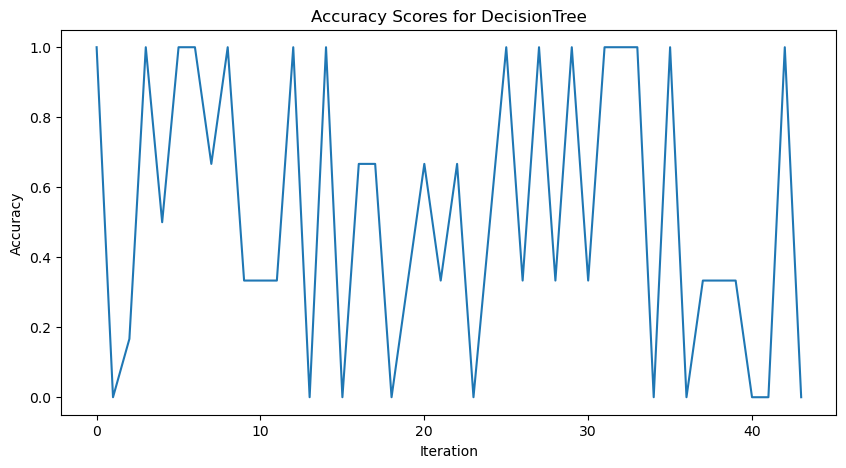

DecisionTree - Precision: 0.46551724137931033
DecisionTree - Recall: 0.48214285714285715
DecisionTree - F1-Score: 0.4736842105263158
True Positive(TP)  =  27
False Positive(FP) =  31
True Negative(TN)  =  40
False Negative(FN) =  29
Accuracy of the binary classifier = 0.528


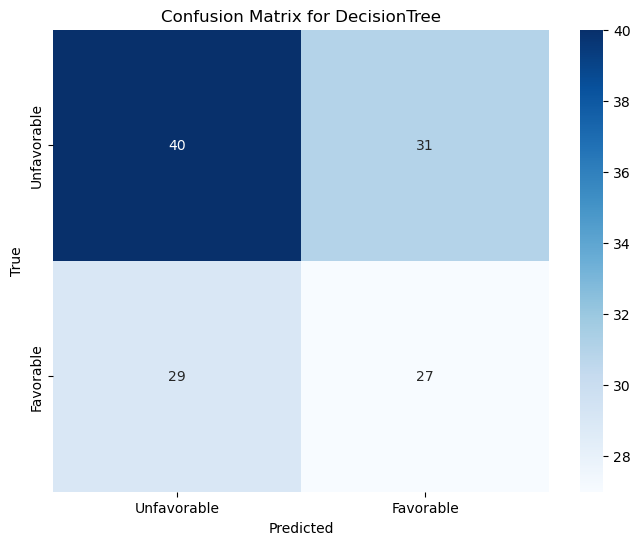

ValueError: The 'groups' parameter should not be None.

In [71]:
#Leave oneGroup ou cross validation. 
# Leave 1 group out cross validation.
#AVERAGED ONLY ACROSS BRAIN REGIONS (57 feature vector)





########### *YES THIS ONE IS THE MAIN FROM MAY 26 2024* ########################
#Select features according to the k highest scores.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut, learning_curve
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import LeavePGroupsOut
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.inspection import permutation_importance
########### *YES THIS ONE IS THE MAIN FROM MAY 26 2024* ########################


# LZC
#####################################################################################################################    
##                                                                                                                 ##
##                 LOADING DATAFRAME & RESHAPING IT & ADDING LABELS    +  NEW DICTIONARIES                           ## 
##################################################################################################################### 
import string
#OLD #Uoutcomedic={'NETICU01':'1','NETICU02':'0','NETICU03':'0','NETICU04':'1','NETICU05':'1','NETICU06':'0','NETICU08':'1','NETICU11':'1','NETICU13':'0','NETICU15':'0','NETICU17':'1','NETICU18':'1','NETICU19':'1','NETICU20':'1','NETICU22':'0','NETICU24':'0','NETICU25':'0','NETICU27':'1','NETICU28':'0','NETICU29':'1','NETICU30':'0','CCTC03':'1','CCTC04':'1','CCTC05':'1','MSICU05':'1','MSICU07':'0','MSICU09':'0','MSICU10':'0','MSICU14':'0','MSICU15':'0','MSICU16':'0','MSICU18':'0','MSICU19':'1','MSICU21':'0','MSICU22':'1','MSICU26':'1','MSICU28':'1','MSICU29':'1','MSICU30':'1','HC01':'1','HC02':'1','HC03':'1','HC04':'1','HC05':'1','HC06':'1','HC07':'1','HC08':'1','HC09':'1','HC10':'1','HC11':'1','HC12':'1','HC13':'1','HC14':'1','HC15':'1','HC16':'1','HC17':'1','HC18':'1'}#outcomesNA = {'NETICU01':'1','NETICU02':'0','NETICU03':'0','NETICU04':'NA','NETICU05':'NA','NETICU06':'0','NETICU08':'1','NETICU11':'1','NETICU13':'0','NETICU15':'NA','NETICU17':'1','NETICU18':'1','NETICU19':'1','NETICU20':'1','NETICU22':'0','NETICU24':'0','NETICU25':'0','NETICU27':'1','NETICU28':'0','NETICU29':'NA','NETICU30':'0','CCTC03':'NA','CCTC04':'1','CCTC05':'NA','MSICU05':'1','MSICU07':'0','MSICU09':'0','MSICU10':'0','MSICU14':'0','MSICU15':'0','MSICU16':'0','MSICU18':'0','MSICU19':'NA','MSICU21':'0','MSICU22':'1','MSICU26':'1','MSICU28':'NA','MSICU29':'NA','MSICU30':'NA','HC01':'1','HC02':'1','HC03':'1','HC04':'1','HC05':'1','HC06':'1','HC07':'1','HC08':'1','HC09':'1','HC10':'1','HC11':'1','HC12':'1','HC13':'1','HC14':'1','HC15':'1','HC16':'1','HC17':'1','HC18':'1'}#outcomesGuess = {'NETICU01':'1','NETICU02':'0','NETICU03':'0','NETICU04':'0','NETICU05':'1','NETICU06':'0','NETICU08':'1','NETICU11':'1','NETICU13':'0','NETICU15':'0','NETICU17':'1','NETICU18':'1','NETICU19':'1','NETICU20':'1','NETICU22':'0','NETICU24':'0','NETICU25':'0','NETICU27':'1','NETICU28':'0','NETICU29':'1','NETICU30':'0','CCTC03':'1','CCTC04':'1','CCTC05':'0','MSICU05':'1','MSICU07':'0','MSICU09':'0','MSICU10':'0','MSICU14':'0','MSICU15':'0','MSICU16':'0','MSICU18':'0','MSICU19':'1','MSICU21':'0','MSICU22':'1','MSICU26':'1','MSICU28':'1','MSICU29':'0','MSICU30':'0','HC01':'1','HC02':'1','HC03':'1','HC04':'1','HC05':'1','HC06':'1','HC07':'1','HC08':'1','HC09':'1','HC10':'1','HC11':'1','HC12':'1','HC13':'1','HC14':'1','HC15':'1','HC16':'1','HC17':'1','HC18':'1'}
#OLD #seddic={'CCTC03_IT':'ON','CCTC03_RS':'ON','CCTC03_ST':'ON','CCTC03part2_IT':'ON','CCTC03part2_RS':'ON','CCTC03part2_ST':'ON','CCTC04_IT':'ON','CCTC04_RS':'ON','CCTC04_RSredo':'ON','CCTC04_ST':'ON','CCTC05_IT':'ON','CCTC05_RS':'ON','CCTC05_ST':'ON','HC01_IT':'-','HC01_ST':'-','HC02_IT':'-','HC02_ST':'-','HC03_IT':'-','HC03_ST':'-','HC04_IT':'-','HC04_ST':'-','HC05_IT1st':'-','HC05_IT2nd':'-','HC05_ST':'-','HC06_IT':'-','HC06_ST':'-','HC07_IT':'-','HC07_ST':'-','HC08_IT':'-','HC08_ST':'-','HC09_IT':'-','HC09_ST':'-','HC10_IT':'-','HC10_ST':'-','HC11_IT':'-','HC11_ST':'-','HC12_IT':'-','HC12_ST':'-','HC13_IT':'-','HC13_ST':'-','HC14_IT':'-','HC14_ST':'-','HC15_IT':'-','HC15_ST':'-','HC16_IT':'-','HC16_ST':'-','HC17_IT':'-','HC17_ST':'-','HC18_IT':'-','HC18_ST':'-','MSICU05_IT':'OFF','MSICU05_RS':'OFF','MSICU05_ST':'OFF','MSICU05part2_IT':'OFF','MSICU05part2_RS':'OFF','MSICU05part2_ST':'OFF','MSICU07_IT':'OFF','MSICU07_RS':'OFF','MSICU07_ST':'OFF','MSICU09_IT':'OFF','MSICU09_RS':'OFF','MSICU09_ST':'OFF','MSICU09part2_IT':'OFF','MSICU09part2_RS':'OFF','MSICU09part2_ST':'OFF','MSICU10_IT':'OFF','MSICU10_RS':'OFF','MSICU10_ST':'OFF','MSICU14_IT':'OFF','MSICU14_RS':'OFF','MSICU14_ST':'OFF','MSICU15_IT':'ON','MSICU15_RS':'ON','MSICU15_ST':'ON','MSICU16_IT':'OFF','MSICU16_RS':'OFF','MSICU16_ST':'OFF','MSICU18_IT':'OFF','MSICU18_RS':'OFF','MSICU18_ST':'OFF','MSICU19_IT':'OFF','MSICU19_RS':'OFF','MSICU19_ST':'OFF','MSICU21_IT':'OFF','MSICU21_RS':'OFF','MSICU21_ST':'OFF','MSICU22_IT':'OFF','MSICU22_RS':'OFF','MSICU22_ST':'OFF','MSICU26_IT':'ON','MSICU26_RS':'ON','MSICU26_ST':'ON','MSICU28_IT':'OFF','MSICU28_RS':'OFF','MSICU28_ST':'OFF','MSICU29_IT':'OFF','MSICU29_RS':'OFF','MSICU29_ST':'OFF','MSICU30_IT':'OFF','MSICU30_RS':'OFF','MSICU30_ST':'OFF','NETICU01sedoff_IT':'ON','NETICU01sedoff_RS':'ON','NETICU01sedoff_ST':'ON','NETICU01sedon1_IT':'ON','NETICU01sedon1_RS':'ON','NETICU01sedon1_ST':'ON','NETICU02sedoff_IT':'OFF','NETICU02sedoff_RS':'OFF','NETICU02sedoff_ST':'OFF','NETICU02sedon1_IT':'ON','NETICU02sedon1_RS':'ON','NETICU02sedon1_ST':'ON','NETICU03sedoff_IT':'OFF','NETICU03sedoff_RS':'OFF','NETICU03sedoff_ST':'OFF','NETICU03sedon1_IT':'ON','NETICU03sedon1_RS':'ON','NETICU03sedon1_ST':'ON','NETICU04sedoff_IT':'OFF','NETICU04sedoff_RS':'OFF','NETICU04sedoff_ST':'OFF','NETICU04sedon1_IT':'ON','NETICU04sedon1_RS':'ON','NETICU04sedon1_ST':'ON','NETICU05sedoff_IT':'OFF','NETICU05sedoff_RS':'OFF','NETICU05sedoff_ST':'OFF','NETICU05sedon1_IT':'ON','NETICU05sedon1_RS':'ON','NETICU05sedon1_ST':'ON','NETICU06sedoff_IT':'OFF','NETICU06sedoff_RS':'OFF','NETICU06sedoff_ST':'OFF','NETICU06sedon1_IT':'ON','NETICU06sedon1_RS':'ON','NETICU06sedon1_ST':'ON','NETICU08sedoff_IT':'OFF','NETICU08sedoff_ST':'OFF','NETICU08sedon2_IT':'ON','NETICU08sedon2_RS':'ON','NETICU08sedon2_ST':'ON','NETICU11sedoff_IT':'OFF','NETICU11sedoff_RS':'OFF','NETICU11sedoff_ST':'OFF','NETICU11sedon1_IT':'ON','NETICU11sedon1_RS':'ON','NETICU11sedon1_ST':'ON','NETICU13sedoff_IT':'OFF','NETICU13sedoff_RS':'OFF','NETICU13sedoff_ST':'OFF','NETICU13sedon1_IT':'ON','NETICU13sedon1_RS':'ON','NETICU13sedon1_ST':'ON','NETICU15sedoff_IT':'OFF','NETICU15sedoff_RS':'OFF','NETICU15sedoff_ST':'OFF','NETICU15sedon1_IT':'ON','NETICU15sedon1_RS':'ON','NETICU15sedon1_ST':'ON','NETICU17sedoff_IT':'OFF','NETICU17sedoff_RS':'OFF','NETICU17sedoff_ST':'OFF','NETICU17sedon1_IT':'ON','NETICU17sedon1_RS':'ON','NETICU17sedon1_ST':'ON','NETICU18sedoff_RS':'OFF','NETICU18sedon1_IT':'ON','NETICU18sedon1_RS':'ON','NETICU18sedon1_ST':'ON','NETICU19sedoff_IT':'OFF','NETICU19sedoff_RS':'OFF','NETICU19sedoff_ST':'OFF','NETICU19sedon1_IT':'ON','NETICU19sedon1_RS':'ON','NETICU19sedon1_ST':'ON','NETICU20sedoff_RS':'OFF','NETICU20sedon1_IT':'ON','NETICU20sedon1_RS':'ON','NETICU20sedon1_ST':'ON','NETICU22sedoff_IT':'OFF','NETICU22sedoff_RS':'OFF','NETICU22sedoff_ST':'OFF','NETICU22sedon1_IT':'ON','NETICU22sedon1_RS':'ON','NETICU22sedon1_ST':'ON','NETICU24sedoff_IT':'OFF','NETICU24sedoff_RS':'OFF','NETICU24sedoff_ST':'OFF','NETICU24sedon1_IT':'ON','NETICU24sedon1_RS':'ON','NETICU24sedon1_ST':'ON','NETICU25sedoff_RS':'OFF','NETICU25sedon1_IT':'ON','NETICU25sedon1_RS':'ON','NETICU25sedon1_ST':'ON','NETICU27sedoff_IT':'OFF','NETICU27sedoff_RS':'OFF','NETICU27sedoff_ST':'OFF','NETICU27sedon1_IT':'ON','NETICU27sedon1_RS':'ON','NETICU27sedon1_ST':'ON','NETICU28sedoff_IT':'OFF','NETICU28sedoff_RS':'OFF','NETICU28sedoff_ST':'OFF','NETICU28sedon1_IT':'ON','NETICU28sedon1_RS':'ON','NETICU28sedon1_ST':'ON','NETICU29sedoff_IT':'OFF','NETICU29sedoff_RS':'OFF','NETICU29sedoff_ST':'OFF','NETICU29sedon1_IT':'ON','NETICU29sedon1_RS':'ON','NETICU29sedon1_ST':'ON','NETICU30sedoff_IT':'OFF','NETICU30sedoff_RS':'OFF','NETICU30sedoff_ST':'OFF','NETICU30sedon1_IT':'ON','NETICU30sedon1_RS':'ON','NETICU30sedon1_ST':'ON'}
#OLD #GCSdic={'CCTC03_IT':'3','CCTC03_RS':'3','CCTC03_ST':'3','CCTC03part2_IT':'3','CCTC03part2_RS':'3','CCTC03part2_ST':'3','CCTC04_IT':'3','CCTC04_RS':'3','CCTC04_RSredo':'3','CCTC04_ST':'3','CCTC05_IT':'3','CCTC05_RS':'3','CCTC05_ST':'3','HC01_IT':'15','HC01_ST':'15','HC02_IT':'15','HC02_ST':'15','HC03_IT':'15','HC03_ST':'15','HC04_IT':'15','HC04_ST':'15','HC05_IT1st':'15','HC05_IT2nd':'15','HC05_ST':'15','HC06_IT':'15','HC06_ST':'15','HC07_IT':'15','HC07_ST':'15','HC08_IT':'15','HC08_ST':'15','HC09_IT':'15','HC09_ST':'15','HC10_IT':'15','HC10_ST':'15','HC11_IT':'15','HC11_ST':'15','HC12_IT':'15','HC12_ST':'15','HC13_IT':'15','HC13_ST':'15','HC14_IT':'15','HC14_ST':'15','HC15_IT':'15','HC15_ST':'15','HC16_IT':'15','HC16_ST':'15','HC17_IT':'15','HC17_ST':'15','HC18_IT':'15','HC18_ST':'15','MSICU05_IT':'3','MSICU05_RS':'3','MSICU05_ST':'3','MSICU05part2_IT':'15','MSICU05part2_RS':'15','MSICU05part2_ST':'15','MSICU07_IT':'3','MSICU07_RS':'3','MSICU07_ST':'3','MSICU09_IT':'5','MSICU09_RS':'5','MSICU09_ST':'5','MSICU09part2_IT':'4','MSICU09part2_RS':'4','MSICU09part2_ST':'4','MSICU10_IT':'4','MSICU10_RS':'4','MSICU10_ST':'4','MSICU14_IT':'3','MSICU14_RS':'3','MSICU14_ST':'3','MSICU15_IT':'6','MSICU15_RS':'6','MSICU15_ST':'6','MSICU16_IT':'3','MSICU16_RS':'3','MSICU16_ST':'3','MSICU18_IT':'7','MSICU18_RS':'7','MSICU18_ST':'7','MSICU19_IT':'8','MSICU19_RS':'8','MSICU19_ST':'8','MSICU21_IT':'9','MSICU21_RS':'9','MSICU21_ST':'9','MSICU22_IT':'4','MSICU22_RS':'4','MSICU22_ST':'4','MSICU26_IT':'7','MSICU26_RS':'7','MSICU26_ST':'7','MSICU28_IT':'6','MSICU28_RS':'6','MSICU28_ST':'6','MSICU29_IT':'9','MSICU29_RS':'9','MSICU29_ST':'9','MSICU30_IT':'5','MSICU30_RS':'5','MSICU30_ST':'5','NETICU01sedoff_IT':'3','NETICU01sedoff_RS':'3','NETICU01sedoff_ST':'3','NETICU01sedon1_IT':'3','NETICU01sedon1_RS':'3','NETICU01sedon1_ST':'3','NETICU02sedoff_IT':'10','NETICU02sedoff_RS':'10','NETICU02sedoff_ST':'10','NETICU02sedon1_IT':'3','NETICU02sedon1_RS':'3','NETICU02sedon1_ST':'3','NETICU03sedoff_IT':'6','NETICU03sedoff_RS':'6','NETICU03sedoff_ST':'6','NETICU03sedon1_IT':'6','NETICU03sedon1_RS':'6','NETICU03sedon1_ST':'6','NETICU04sedoff_IT':'3','NETICU04sedoff_RS':'3','NETICU04sedoff_ST':'3','NETICU04sedon1_IT':'3','NETICU04sedon1_RS':'3','NETICU04sedon1_ST':'3','NETICU05sedoff_IT':'3','NETICU05sedoff_RS':'3','NETICU05sedoff_ST':'3','NETICU05sedon1_IT':'3','NETICU05sedon1_RS':'3','NETICU05sedon1_ST':'3','NETICU06sedoff_IT':'6','NETICU06sedoff_RS':'6','NETICU06sedoff_ST':'6','NETICU06sedon1_IT':'3','NETICU06sedon1_RS':'3','NETICU06sedon1_ST':'3','NETICU08sedoff_IT':'9','NETICU08sedoff_ST':'9','NETICU08sedon2_IT':'3','NETICU08sedon2_RS':'3','NETICU08sedon2_ST':'3','NETICU11sedoff_IT':'4','NETICU11sedoff_RS':'4','NETICU11sedoff_ST':'4','NETICU11sedon1_IT':'3','NETICU11sedon1_RS':'3','NETICU11sedon1_ST':'3','NETICU13sedoff_IT':'4','NETICU13sedoff_RS':'4','NETICU13sedoff_ST':'4','NETICU13sedon1_IT':'3','NETICU13sedon1_RS':'3','NETICU13sedon1_ST':'3','NETICU15sedoff_IT':'3','NETICU15sedoff_RS':'3','NETICU15sedoff_ST':'3','NETICU15sedon1_IT':'3','NETICU15sedon1_RS':'3','NETICU15sedon1_ST':'3','NETICU17sedoff_IT':'10','NETICU17sedoff_RS':'10','NETICU17sedoff_ST':'10','NETICU17sedon1_IT':'3','NETICU17sedon1_RS':'3','NETICU17sedon1_ST':'3','NETICU18sedoff_RS':'11','NETICU18sedon1_IT':'3','NETICU18sedon1_RS':'3','NETICU18sedon1_ST':'3','NETICU19sedoff_IT':'7','NETICU19sedoff_RS':'7','NETICU19sedoff_ST':'7','NETICU19sedon1_IT':'3','NETICU19sedon1_RS':'3','NETICU19sedon1_ST':'3','NETICU20sedoff_RS':'11','NETICU20sedon1_IT':'3','NETICU20sedon1_RS':'3','NETICU20sedon1_ST':'3','NETICU22sedoff_IT':'3','NETICU22sedoff_RS':'3','NETICU22sedoff_ST':'3','NETICU22sedon1_IT':'3','NETICU22sedon1_RS':'3','NETICU22sedon1_ST':'3','NETICU24sedoff_IT':'3','NETICU24sedoff_RS':'3','NETICU24sedoff_ST':'3','NETICU24sedon1_IT':'3','NETICU24sedon1_RS':'3','NETICU24sedon1_ST':'3','NETICU25sedoff_RS':'8','NETICU25sedon1_IT':'6','NETICU25sedon1_RS':'6','NETICU25sedon1_ST':'6','NETICU27sedoff_IT':'3','NETICU27sedoff_RS':'3','NETICU27sedoff_ST':'3','NETICU27sedon1_IT':'3','NETICU27sedon1_RS':'3','NETICU27sedon1_ST':'3','NETICU28sedoff_IT':'3','NETICU28sedoff_RS':'3','NETICU28sedoff_ST':'3','NETICU28sedon1_IT':'3','NETICU28sedon1_RS':'3','NETICU28sedon1_ST':'3','NETICU29sedoff_IT':'11','NETICU29sedoff_RS':'11','NETICU29sedoff_ST':'11','NETICU29sedon1_IT':'3','NETICU29sedon1_RS':'3','NETICU29sedon1_ST':'3','NETICU30sedoff_IT':'6','NETICU30sedoff_RS':'6','NETICU30sedoff_ST':'6','NETICU30sedon1_IT':'3','NETICU30sedon1_RS':'3','NETICU30sedon1_ST':'3'}
#OLD(57)# EVERYONE = ['NETICU01','NETICU02','NETICU03','NETICU04','NETICU05','NETICU06','NETICU08','NETICU11','NETICU13','NETICU15','NETICU17','NETICU18','NETICU19','NETICU20','NETICU22','NETICU24','NETICU25','NETICU27','NETICU28','NETICU29','NETICU30','CCTC03','CCTC04','CCTC05','MSICU05','MSICU07','MSICU09','MSICU10','MSICU14','MSICU15','MSICU16','MSICU18','MSICU19','MSICU21','MSICU22','MSICU26','MSICU28','MSICU29','MSICU30','HC01','HC02','HC03','HC04','HC05','HC06','HC07','HC08','HC09','HC10','HC11','HC12','HC13','HC14','HC15','HC16','HC17','HC18']
#OLD(60)# PT=['CCTC03','CCTC03part2','CCTC04','CCTC05','MSICU05','MSICU05part2','MSICU07','MSICU09','MSICU09part2','MSICU10','MSICU14','MSICU15','MSICU16','MSICU18','MSICU19','MSICU21','MSICU22','MSICU26','MSICU28','MSICU29','MSICU30','NETICU01sedoff','NETICU01sedon1','NETICU02sedoff','NETICU02sedon1','NETICU03sedoff','NETICU03sedon1','NETICU04sedoff','NETICU04sedon1','NETICU05sedoff','NETICU05sedon1','NETICU06sedoff','NETICU06sedon1','NETICU08sedoff','NETICU08sedon2','NETICU11sedoff','NETICU11sedon1','NETICU13sedoff','NETICU13sedon1','NETICU15sedoff','NETICU15sedon1','NETICU17sedoff','NETICU17sedon1','NETICU18sedon1','NETICU19sedoff','NETICU19sedon1','NETICU20sedon1','NETICU22sedoff','NETICU22sedon1','NETICU24sedoff','NETICU24sedon1','NETICU25sedon1','NETICU27sedoff','NETICU27sedon1','NETICU28sedoff','NETICU28sedon1','NETICU29sedoff','NETICU29sedon1','NETICU30sedoff','NETICU30sedon1']
PT = ['CCTC03', 'CCTC03part2', 'CCTC04', 'CCTC05', 'CCTC07NETICUsedoff', 'CCTC07NETICUsedon1', 'CCTC07', 'MSICU05', 'MSICU05part2', 'MSICU07', 'MSICU09', 'MSICU09part2', 'MSICU10', 'MSICU14', 'MSICU15', 'MSICU16', 'MSICU18', 'MSICU19', 'MSICU21', 'MSICU22', 'MSICU26', 'MSICU28', 'MSICU29', 'MSICU30', 'MSICU32', 'MSICU38', 'MSICU42', 'MSICU43', 'MSICU47', 'NETICU01sedoff', 'NETICU01sedon1', 'NETICU02sedoff', 'NETICU02sedon1', 'NETICU03sedoff', 'NETICU03sedon1', 'NETICU04sedoff', 'NETICU04sedon1', 'NETICU05sedoff', 'NETICU05sedon1', 'NETICU06sedoff', 'NETICU06sedon1', 'NETICU08sedoff', 'NETICU08sedon2', 'NETICU11sedoff', 'NETICU11sedon1', 'NETICU13sedoff', 'NETICU13sedon1', 'NETICU15sedoff', 'NETICU15sedon1', 'NETICU17sedoff', 'NETICU17sedon1', 'NETICU18sedon1', 'NETICU19sedoff', 'NETICU19sedon1', 'NETICU20sedon1', 'NETICU22sedoff', 'NETICU22sedon1', 'NETICU24sedoff', 'NETICU24sedon1', 'NETICU25sedon1', 'NETICU27sedoff', 'NETICU27sedon1', 'NETICU28sedoff', 'NETICU28sedon1', 'NETICU29sedoff', 'NETICU29sedon1', 'NETICU30sedoff', 'NETICU30sedon1', 'NETICU31sedoff', 'NETICU31sedon1', 'NETICU33sedon1', 'NETICU38sedon1', 'NETICU40sedoff', 'NETICU40sedon1', 'NETICU41sedoff', 'NETICU41sedon1', 'NETICU41sedon2', 'NETICU46sedon1']
EVERYONE = ['NETICU01','NETICU02','NETICU03','NETICU04','NETICU05','NETICU06','NETICU08','NETICU11','NETICU13','NETICU15','NETICU17','NETICU18','NETICU19','NETICU20','NETICU22','NETICU24','NETICU25','NETICU27','NETICU28','NETICU29','NETICU30','NETICU31','NETICU33','NETICU38','NETICU40','NETICU41','NETICU46','CCTC03','CCTC04','CCTC05','CCTC07','CCTC07NETICU','MSICU05','MSICU07','MSICU09','MSICU10','MSICU14','MSICU15','MSICU16','MSICU18','MSICU19','MSICU21','MSICU22','MSICU26','MSICU28','MSICU29','MSICU30','MSICU32','MSICU38','MSICU42','MSICU43','MSICU47','HC01','HC02','HC03','HC04','HC05','HC06','HC07','HC08','HC09','HC10','HC11','HC12','HC13','HC14','HC15','HC16','HC17','HC18']
Uoutcomedic={'CCTC03_IT': '1', 'CCTC03_RS': '1', 'CCTC03_ST': '1', 'CCTC03part2_IT': '1', 'CCTC03part2_RS': '1', 'CCTC03part2_ST': '1', 'CCTC04_IT': '1', 'CCTC04_RS': '1', 'CCTC04_RSredo': '1', 'CCTC04_ST': '1', 'CCTC05_IT': '1', 'CCTC05_RS': '1', 'CCTC05_ST': '1', 'CCTC07NETICUsedoff_IT': '0', 'CCTC07NETICUsedoff_RS': '0', 'CCTC07NETICUsedoff_ST': '0', 'CCTC07NETICUsedon1_IT': '0', 'CCTC07NETICUsedon1_RS': '0', 'CCTC07NETICUsedon1_ST': '0', 'CCTC07_IT': '0', 'CCTC07_RS': '0', 'CCTC07_ST': '0', 'HC01_IT': '1', 'HC01_ST': '1', 'HC02_IT': '1', 'HC02_ST': '1', 'HC03_IT': '1', 'HC03_ST': '1', 'HC04_IT': '1', 'HC04_ST': '1', 'HC05_IT1st': '1', 'HC05_IT2nd': '1', 'HC05_ST': '1', 'HC06_IT': '1', 'HC06_ST': '1', 'HC07_IT': '1', 'HC07_ST': '1', 'HC08_IT': '1', 'HC08_ST': '1', 'HC09_IT': '1', 'HC09_ST': '1', 'HC10_IT': '1', 'HC10_ST': '1', 'HC11_IT': '1', 'HC11_ST': '1', 'HC12_IT': '1', 'HC12_ST': '1', 'HC13_IT': '1', 'HC13_ST': '1', 'HC14_IT': '1', 'HC14_ST': '1', 'HC15_IT': '1', 'HC15_ST': '1', 'HC16_IT': '1', 'HC16_ST': '1', 'HC17_IT': '1', 'HC17_ST': '1', 'HC18_IT': '1', 'HC18_ST': '1', 'MSICU05_IT': '1', 'MSICU05_RS': '1', 'MSICU05_ST': '1', 'MSICU05part2_IT': '1', 'MSICU05part2_RS': '1', 'MSICU05part2_ST': '1', 'MSICU07_IT': '0', 'MSICU07_RS': '0', 'MSICU07_ST': '0', 'MSICU09_IT': '0', 'MSICU09_RS': '0', 'MSICU09_ST': '0', 'MSICU09part2_IT': '0', 'MSICU09part2_RS': '0', 'MSICU09part2_ST': '0', 'MSICU10_IT': '0', 'MSICU10_RS': '0', 'MSICU10_ST': '0', 'MSICU14_IT': '0', 'MSICU14_RS': '0', 'MSICU14_ST': '0', 'MSICU15_IT': '0', 'MSICU15_RS': '0', 'MSICU15_ST': '0', 'MSICU16_IT': '0', 'MSICU16_RS': '0', 'MSICU16_ST': '0', 'MSICU18_IT': '0', 'MSICU18_RS': '0', 'MSICU18_ST': '0', 'MSICU19_IT': '1', 'MSICU19_RS': '1', 'MSICU19_ST': '1', 'MSICU21_IT': '0', 'MSICU21_RS': '0', 'MSICU21_ST': '0', 'MSICU22_IT': '1', 'MSICU22_RS': '1', 'MSICU22_ST': '1', 'MSICU26_IT': '1', 'MSICU26_RS': '1', 'MSICU26_ST': '1', 'MSICU28_IT': '1', 'MSICU28_RS': '1', 'MSICU28_ST': '1', 'MSICU29_IT': '1', 'MSICU29_RS': '1', 'MSICU29_ST': '1', 'MSICU30_IT': '1', 'MSICU30_RS': '1', 'MSICU30_ST': '1', 'MSICU32_IT': '0', 'MSICU32_RS': '0', 'MSICU32_ST': '0', 'MSICU38_IT': '0', 'MSICU38_RS': '0', 'MSICU38_ST': '0', 'MSICU42_IT': '1', 'MSICU42_RS': '1', 'MSICU42_ST': '1', 'MSICU43_IT': '0', 'MSICU43_RS': '0', 'MSICU43_ST': '0', 'MSICU47_IT': '1', 'MSICU47_RS': '1', 'MSICU47_ST': '1', 'NETICU01sedoff_IT': '1', 'NETICU01sedoff_RS': '1', 'NETICU01sedoff_ST': '1', 'NETICU01sedon1_IT': '1', 'NETICU01sedon1_RS': '1', 'NETICU01sedon1_ST': '1', 'NETICU02sedoff_IT': '0', 'NETICU02sedoff_RS': '0', 'NETICU02sedoff_ST': '0', 'NETICU02sedon1_IT': '0', 'NETICU02sedon1_RS': '0', 'NETICU02sedon1_ST': '0', 'NETICU03sedoff_IT': '0', 'NETICU03sedoff_RS': '0', 'NETICU03sedoff_ST': '0', 'NETICU03sedon1_IT': '0', 'NETICU03sedon1_RS': '0', 'NETICU03sedon1_ST': '0', 'NETICU04sedoff_IT': '1', 'NETICU04sedoff_RS': '1', 'NETICU04sedoff_ST': '1', 'NETICU04sedon1_IT': '1', 'NETICU04sedon1_RS': '1', 'NETICU04sedon1_ST': '1', 'NETICU05sedoff_IT': '1', 'NETICU05sedoff_RS': '1', 'NETICU05sedoff_ST': '1', 'NETICU05sedon1_IT': '1', 'NETICU05sedon1_RS': '1', 'NETICU05sedon1_ST': '1', 'NETICU06sedoff_IT': '0', 'NETICU06sedoff_RS': '0', 'NETICU06sedoff_ST': '0', 'NETICU06sedon1_IT': '0', 'NETICU06sedon1_RS': '0', 'NETICU06sedon1_ST': '0', 'NETICU08sedoff_IT': '1', 'NETICU08sedoff_ST': '1', 'NETICU08sedon2_IT': '1', 'NETICU08sedon2_RS': '1', 'NETICU08sedon2_ST': '1', 'NETICU11sedoff_IT': '1', 'NETICU11sedoff_RS': '1', 'NETICU11sedoff_ST': '1', 'NETICU11sedon1_IT': '1', 'NETICU11sedon1_RS': '1', 'NETICU11sedon1_ST': '1', 'NETICU13sedoff_IT': '0', 'NETICU13sedoff_RS': '0', 'NETICU13sedoff_ST': '0', 'NETICU13sedon1_IT': '0', 'NETICU13sedon1_RS': '0', 'NETICU13sedon1_ST': '0', 'NETICU15sedoff_IT': '0', 'NETICU15sedoff_RS': '0', 'NETICU15sedoff_ST': '0', 'NETICU15sedon1_IT': '0', 'NETICU15sedon1_RS': '0', 'NETICU15sedon1_ST': '0', 'NETICU17sedoff_IT': '1', 'NETICU17sedoff_RS': '1', 'NETICU17sedoff_ST': '1', 'NETICU17sedon1_IT': '1', 'NETICU17sedon1_RS': '1', 'NETICU17sedon1_ST': '1', 'NETICU18sedoff_RS': '1', 'NETICU18sedon1_IT': '1', 'NETICU18sedon1_RS': '1', 'NETICU18sedon1_ST': '1', 'NETICU19sedoff_IT': '1', 'NETICU19sedoff_RS': '1', 'NETICU19sedoff_ST': '1', 'NETICU19sedon1_IT': '1', 'NETICU19sedon1_RS': '1', 'NETICU19sedon1_ST': '1', 'NETICU20sedoff_RS': '1', 'NETICU20sedon1_IT': '1', 'NETICU20sedon1_RS': '1', 'NETICU20sedon1_ST': '1', 'NETICU22sedoff_IT': '0', 'NETICU22sedoff_RS': '0', 'NETICU22sedoff_ST': '0', 'NETICU22sedon1_IT': '0', 'NETICU22sedon1_RS': '0', 'NETICU22sedon1_ST': '0', 'NETICU24sedoff_IT': '0', 'NETICU24sedoff_RS': '0', 'NETICU24sedoff_ST': '0', 'NETICU24sedon1_IT': '0', 'NETICU24sedon1_RS': '0', 'NETICU24sedon1_ST': '0', 'NETICU25sedoff_RS': '0', 'NETICU25sedon1_IT': '0', 'NETICU25sedon1_RS': '0', 'NETICU25sedon1_ST': '0', 'NETICU27sedoff_IT': '1', 'NETICU27sedoff_RS': '1', 'NETICU27sedoff_ST': '1', 'NETICU27sedon1_IT': '1', 'NETICU27sedon1_RS': '1', 'NETICU27sedon1_ST': '1', 'NETICU28sedoff_IT': '0', 'NETICU28sedoff_RS': '0', 'NETICU28sedoff_ST': '0', 'NETICU28sedon1_IT': '0', 'NETICU28sedon1_RS': '0', 'NETICU28sedon1_ST': '0', 'NETICU29sedoff_IT': '1', 'NETICU29sedoff_RS': '1', 'NETICU29sedoff_ST': '1', 'NETICU29sedon1_IT': '1', 'NETICU29sedon1_RS': '1', 'NETICU29sedon1_ST': '1', 'NETICU30sedoff_IT': '0', 'NETICU30sedoff_RS': '0', 'NETICU30sedoff_ST': '0', 'NETICU30sedon1_IT': '0', 'NETICU30sedon1_RS': '0', 'NETICU30sedon1_ST': '0', 'NETICU31sedoff_IT': '1', 'NETICU31sedoff_RS': '1', 'NETICU31sedoff_ST': '1', 'NETICU31sedon1_IT': '1', 'NETICU31sedon1_ST': '1', 'NETICU31sedon2_RS': '1', 'NETICU33sedoff_RS': '0', 'NETICU33sedon1_IT': '0', 'NETICU33sedon1_RS': '0', 'NETICU33sedon1_ST': '0', 'NETICU38sedon1_IT': '0', 'NETICU38sedon1_RS': '0', 'NETICU38sedon1_ST': '0', 'NETICU40sedoff_IT': '0', 'NETICU40sedoff_RS': '0', 'NETICU40sedoff_ST': '0', 'NETICU40sedon1_IT': '0', 'NETICU40sedon1_RS': '0', 'NETICU40sedon1_ST': '0', 'NETICU41sedoff_IT': '0', 'NETICU41sedoff_RS': '0', 'NETICU41sedoff_ST': '0', 'NETICU41sedon1_IT': '0', 'NETICU41sedon1_RS': '0', 'NETICU41sedon1_ST': '0', 'NETICU41sedon2_IT': '0', 'NETICU41sedon2_RS': '0', 'NETICU41sedon2_ST': '0', 'NETICU46sedoff_RS': '1', 'NETICU46sedon1_IT': '1', 'NETICU46sedon1_RS': '1', 'NETICU46sedon1_ST': '1'}
seddic={'CCTC03_IT': 'ON', 'CCTC03_RS': 'ON', 'CCTC03_ST': 'ON', 'CCTC03part2_IT': 'ON', 'CCTC03part2_RS': 'ON', 'CCTC03part2_ST': 'ON', 'CCTC04_IT': 'ON', 'CCTC04_RS': 'ON', 'CCTC04_RSredo': 'ON', 'CCTC04_ST': 'ON', 'CCTC05_IT': 'ON', 'CCTC05_RS': 'ON', 'CCTC05_ST': 'ON', 'CCTC07NETICUsedoff_IT': 'OFF', 'CCTC07NETICUsedoff_RS': 'OFF', 'CCTC07NETICUsedoff_ST': 'OFF', 'CCTC07NETICUsedon1_IT': 'ON', 'CCTC07NETICUsedon1_RS': 'ON', 'CCTC07NETICUsedon1_ST': 'ON', 'CCTC07_IT': 'OFF', 'CCTC07_RS': 'OFF', 'CCTC07_ST': 'OFF', 'HC01_IT': '-', 'HC01_ST': '-', 'HC02_IT': '-', 'HC02_ST': '-', 'HC03_IT': '-', 'HC03_ST': '-', 'HC04_IT': '-', 'HC04_ST': '-', 'HC05_IT1st': '-', 'HC05_IT2nd': '-', 'HC05_ST': '-', 'HC06_IT': '-', 'HC06_ST': '-', 'HC07_IT': '-', 'HC07_ST': '-', 'HC08_IT': '-', 'HC08_ST': '-', 'HC09_IT': '-', 'HC09_ST': '-', 'HC10_IT': '-', 'HC10_ST': '-', 'HC11_IT': '-', 'HC11_ST': '-', 'HC12_IT': '-', 'HC12_ST': '-', 'HC13_IT': '-', 'HC13_ST': '-', 'HC14_IT': '-', 'HC14_ST': '-', 'HC15_IT': '-', 'HC15_ST': '-', 'HC16_IT': '-', 'HC16_ST': '-', 'HC17_IT': '-', 'HC17_ST': '-', 'HC18_IT': '-', 'HC18_ST': '-', 'MSICU05_IT': 'OFF', 'MSICU05_RS': 'OFF', 'MSICU05_ST': 'OFF', 'MSICU05part2_IT': 'OFF', 'MSICU05part2_RS': 'OFF', 'MSICU05part2_ST': 'OFF', 'MSICU07_IT': 'OFF', 'MSICU07_RS': 'OFF', 'MSICU07_ST': 'OFF', 'MSICU09_IT': 'OFF', 'MSICU09_RS': 'OFF', 'MSICU09_ST': 'OFF', 'MSICU09part2_IT': 'OFF', 'MSICU09part2_RS': 'OFF', 'MSICU09part2_ST': 'OFF', 'MSICU10_IT': 'OFF', 'MSICU10_RS': 'OFF', 'MSICU10_ST': 'OFF', 'MSICU14_IT': 'OFF', 'MSICU14_RS': 'OFF', 'MSICU14_ST': 'OFF', 'MSICU15_IT': 'ON', 'MSICU15_RS': 'ON', 'MSICU15_ST': 'ON', 'MSICU16_IT': 'OFF', 'MSICU16_RS': 'OFF', 'MSICU16_ST': 'OFF', 'MSICU18_IT': 'OFF', 'MSICU18_RS': 'OFF', 'MSICU18_ST': 'OFF', 'MSICU19_IT': 'OFF', 'MSICU19_RS': 'OFF', 'MSICU19_ST': 'OFF', 'MSICU21_IT': 'OFF', 'MSICU21_RS': 'OFF', 'MSICU21_ST': 'OFF', 'MSICU22_IT': 'OFF', 'MSICU22_RS': 'OFF', 'MSICU22_ST': 'OFF', 'MSICU26_IT': 'ON', 'MSICU26_RS': 'ON', 'MSICU26_ST': 'ON', 'MSICU28_IT': 'OFF', 'MSICU28_RS': 'OFF', 'MSICU28_ST': 'OFF', 'MSICU29_IT': 'OFF', 'MSICU29_RS': 'OFF', 'MSICU29_ST': 'OFF', 'MSICU30_IT': 'OFF', 'MSICU30_RS': 'OFF', 'MSICU30_ST': 'OFF', 'MSICU32_IT': 'ON', 'MSICU32_RS': 'ON', 'MSICU32_ST': 'ON', 'MSICU38_IT': 'OFF', 'MSICU38_RS': 'OFF', 'MSICU38_ST': 'OFF', 'MSICU42_IT': 'OFF', 'MSICU42_RS': 'OFF', 'MSICU42_ST': 'OFF', 'MSICU43_IT': 'OFF', 'MSICU43_RS': 'OFF', 'MSICU43_ST': 'OFF', 'MSICU47_IT': 'OFF', 'MSICU47_RS': 'OFF', 'MSICU47_ST': 'OFF', 'NETICU01sedoff_IT': 'ON', 'NETICU01sedoff_RS': 'ON', 'NETICU01sedoff_ST': 'ON', 'NETICU01sedon1_IT': 'ON', 'NETICU01sedon1_RS': 'ON', 'NETICU01sedon1_ST': 'ON', 'NETICU02sedoff_IT': 'OFF', 'NETICU02sedoff_RS': 'OFF', 'NETICU02sedoff_ST': 'OFF', 'NETICU02sedon1_IT': 'ON', 'NETICU02sedon1_RS': 'ON', 'NETICU02sedon1_ST': 'ON', 'NETICU03sedoff_IT': 'OFF', 'NETICU03sedoff_RS': 'OFF', 'NETICU03sedoff_ST': 'OFF', 'NETICU03sedon1_IT': 'ON', 'NETICU03sedon1_RS': 'ON', 'NETICU03sedon1_ST': 'ON', 'NETICU04sedoff_IT': 'OFF', 'NETICU04sedoff_RS': 'OFF', 'NETICU04sedoff_ST': 'OFF', 'NETICU04sedon1_IT': 'ON', 'NETICU04sedon1_RS': 'ON', 'NETICU04sedon1_ST': 'ON', 'NETICU05sedoff_IT': 'OFF', 'NETICU05sedoff_RS': 'OFF', 'NETICU05sedoff_ST': 'OFF', 'NETICU05sedon1_IT': 'ON', 'NETICU05sedon1_RS': 'ON', 'NETICU05sedon1_ST': 'ON', 'NETICU06sedoff_IT': 'OFF', 'NETICU06sedoff_RS': 'OFF', 'NETICU06sedoff_ST': 'OFF', 'NETICU06sedon1_IT': 'ON', 'NETICU06sedon1_RS': 'ON', 'NETICU06sedon1_ST': 'ON', 'NETICU08sedoff_IT': 'OFF', 'NETICU08sedoff_ST': 'OFF', 'NETICU08sedon2_IT': 'ON', 'NETICU08sedon2_RS': 'ON', 'NETICU08sedon2_ST': 'ON', 'NETICU11sedoff_IT': 'OFF', 'NETICU11sedoff_RS': 'OFF', 'NETICU11sedoff_ST': 'OFF', 'NETICU11sedon1_IT': 'ON', 'NETICU11sedon1_RS': 'ON', 'NETICU11sedon1_ST': 'ON', 'NETICU13sedoff_IT': 'OFF', 'NETICU13sedoff_RS': 'OFF', 'NETICU13sedoff_ST': 'OFF', 'NETICU13sedon1_IT': 'ON', 'NETICU13sedon1_RS': 'ON', 'NETICU13sedon1_ST': 'ON', 'NETICU15sedoff_IT': 'OFF', 'NETICU15sedoff_RS': 'OFF', 'NETICU15sedoff_ST': 'OFF', 'NETICU15sedon1_IT': 'ON', 'NETICU15sedon1_RS': 'ON', 'NETICU15sedon1_ST': 'ON', 'NETICU17sedoff_IT': 'OFF', 'NETICU17sedoff_RS': 'OFF', 'NETICU17sedoff_ST': 'OFF', 'NETICU17sedon1_IT': 'ON', 'NETICU17sedon1_RS': 'ON', 'NETICU17sedon1_ST': 'ON', 'NETICU18sedoff_RS': 'OFF', 'NETICU18sedon1_IT': 'ON', 'NETICU18sedon1_RS': 'ON', 'NETICU18sedon1_ST': 'ON', 'NETICU19sedoff_IT': 'OFF', 'NETICU19sedoff_RS': 'OFF', 'NETICU19sedoff_ST': 'OFF', 'NETICU19sedon1_IT': 'ON', 'NETICU19sedon1_RS': 'ON', 'NETICU19sedon1_ST': 'ON', 'NETICU20sedoff_RS': 'OFF', 'NETICU20sedon1_IT': 'ON', 'NETICU20sedon1_RS': 'ON', 'NETICU20sedon1_ST': 'ON', 'NETICU22sedoff_IT': 'OFF', 'NETICU22sedoff_RS': 'OFF', 'NETICU22sedoff_ST': 'OFF', 'NETICU22sedon1_IT': 'ON', 'NETICU22sedon1_RS': 'ON', 'NETICU22sedon1_ST': 'ON', 'NETICU24sedoff_IT': 'OFF', 'NETICU24sedoff_RS': 'OFF', 'NETICU24sedoff_ST': 'OFF', 'NETICU24sedon1_IT': 'ON', 'NETICU24sedon1_RS': 'ON', 'NETICU24sedon1_ST': 'ON', 'NETICU25sedoff_RS': 'OFF', 'NETICU25sedon1_IT': 'ON', 'NETICU25sedon1_RS': 'ON', 'NETICU25sedon1_ST': 'ON', 'NETICU27sedoff_IT': 'OFF', 'NETICU27sedoff_RS': 'OFF', 'NETICU27sedoff_ST': 'OFF', 'NETICU27sedon1_IT': 'ON', 'NETICU27sedon1_RS': 'ON', 'NETICU27sedon1_ST': 'ON', 'NETICU28sedoff_IT': 'OFF', 'NETICU28sedoff_RS': 'OFF', 'NETICU28sedoff_ST': 'OFF', 'NETICU28sedon1_IT': 'ON', 'NETICU28sedon1_RS': 'ON', 'NETICU28sedon1_ST': 'ON', 'NETICU29sedoff_IT': 'OFF', 'NETICU29sedoff_RS': 'OFF', 'NETICU29sedoff_ST': 'OFF', 'NETICU29sedon1_IT': 'ON', 'NETICU29sedon1_RS': 'ON', 'NETICU29sedon1_ST': 'ON', 'NETICU30sedoff_IT': 'OFF', 'NETICU30sedoff_RS': 'OFF', 'NETICU30sedoff_ST': 'OFF', 'NETICU30sedon1_IT': 'ON', 'NETICU30sedon1_RS': 'ON', 'NETICU30sedon1_ST': 'ON', 'NETICU31sedoff_IT': 'OFF', 'NETICU31sedoff_RS': 'OFF', 'NETICU31sedoff_ST': 'OFF', 'NETICU31sedon1_IT': 'ON', 'NETICU31sedon1_ST': 'ON', 'NETICU31sedon2_RS': 'ON', 'NETICU33sedoff_RS': 'OFF', 'NETICU33sedon1_IT': 'ON', 'NETICU33sedon1_RS': 'ON', 'NETICU33sedon1_ST': 'ON', 'NETICU38sedon1_IT': 'ON', 'NETICU38sedon1_RS': 'ON', 'NETICU38sedon1_ST': 'ON', 'NETICU40sedoff_IT': 'OFF', 'NETICU40sedoff_RS': 'OFF', 'NETICU40sedoff_ST': 'OFF', 'NETICU40sedon1_IT': 'ON', 'NETICU40sedon1_RS': 'ON', 'NETICU40sedon1_ST': 'ON', 'NETICU41sedoff_IT': 'OFF', 'NETICU41sedoff_RS': 'OFF', 'NETICU41sedoff_ST': 'OFF', 'NETICU41sedon1_IT': 'ON', 'NETICU41sedon1_RS': 'ON', 'NETICU41sedon1_ST': 'ON', 'NETICU41sedon2_IT': 'ON', 'NETICU41sedon2_RS': 'ON', 'NETICU41sedon2_ST': 'ON', 'NETICU46sedoff_RS': 'OFF', 'NETICU46sedon1_IT': 'ON', 'NETICU46sedon1_RS': 'ON', 'NETICU46sedon1_ST': 'ON'}
GCSdic={'CCTC03_IT': '3', 'CCTC03_RS': '3', 'CCTC03_ST': '3', 'CCTC03part2_IT': '3', 'CCTC03part2_RS': '3', 'CCTC03part2_ST': '3', 'CCTC04_IT': '3', 'CCTC04_RS': '3', 'CCTC04_RSredo': '3', 'CCTC04_ST': '3', 'CCTC05_IT': '3', 'CCTC05_RS': '3', 'CCTC05_ST': '3', 'CCTC07NETICUsedoff_IT': '7', 'CCTC07NETICUsedoff_RS': '7', 'CCTC07NETICUsedoff_ST': '7', 'CCTC07NETICUsedon1_IT': '4', 'CCTC07NETICUsedon1_RS': '4', 'CCTC07NETICUsedon1_ST': '4', 'CCTC07_IT': '5', 'CCTC07_RS': '5', 'CCTC07_ST': '5', 'HC01_IT': '15', 'HC01_ST': '15', 'HC02_IT': '15', 'HC02_ST': '15', 'HC03_IT': '15', 'HC03_ST': '15', 'HC04_IT': '15', 'HC04_ST': '15', 'HC05_IT1st': '15', 'HC05_IT2nd': '15', 'HC05_ST': '15', 'HC06_IT': '15', 'HC06_ST': '15', 'HC07_IT': '15', 'HC07_ST': '15', 'HC08_IT': '15', 'HC08_ST': '15', 'HC09_IT': '15', 'HC09_ST': '15', 'HC10_IT': '15', 'HC10_ST': '15', 'HC11_IT': '15', 'HC11_ST': '15', 'HC12_IT': '15', 'HC12_ST': '15', 'HC13_IT': '15', 'HC13_ST': '15', 'HC14_IT': '15', 'HC14_ST': '15', 'HC15_IT': '15', 'HC15_ST': '15', 'HC16_IT': '15', 'HC16_ST': '15', 'HC17_IT': '15', 'HC17_ST': '15', 'HC18_IT': '15', 'HC18_ST': '15', 'MSICU05_IT': '3', 'MSICU05_RS': '3', 'MSICU05_ST': '3', 'MSICU05part2_IT': '15', 'MSICU05part2_RS': '15', 'MSICU05part2_ST': '15', 'MSICU07_IT': '3', 'MSICU07_RS': '3', 'MSICU07_ST': '3', 'MSICU09_IT': '5', 'MSICU09_RS': '5', 'MSICU09_ST': '5', 'MSICU09part2_IT': '4', 'MSICU09part2_RS': '4', 'MSICU09part2_ST': '4', 'MSICU10_IT': '4', 'MSICU10_RS': '4', 'MSICU10_ST': '4', 'MSICU14_IT': '3', 'MSICU14_RS': '3', 'MSICU14_ST': '3', 'MSICU15_IT': '6', 'MSICU15_RS': '6', 'MSICU15_ST': '6', 'MSICU16_IT': '3', 'MSICU16_RS': '3', 'MSICU16_ST': '3', 'MSICU18_IT': '7', 'MSICU18_RS': '7', 'MSICU18_ST': '7', 'MSICU19_IT': '8', 'MSICU19_RS': '8', 'MSICU19_ST': '8', 'MSICU21_IT': '9', 'MSICU21_RS': '9', 'MSICU21_ST': '9', 'MSICU22_IT': '4', 'MSICU22_RS': '4', 'MSICU22_ST': '4', 'MSICU26_IT': '7', 'MSICU26_RS': '7', 'MSICU26_ST': '7', 'MSICU28_IT': '6', 'MSICU28_RS': '6', 'MSICU28_ST': '6', 'MSICU29_IT': '9', 'MSICU29_RS': '9', 'MSICU29_ST': '9', 'MSICU30_IT': '5', 'MSICU30_RS': '5', 'MSICU30_ST': '5', 'MSICU32_IT': '3', 'MSICU32_RS': '3', 'MSICU32_ST': '3', 'MSICU38_IT': '5', 'MSICU38_RS': '5', 'MSICU38_ST': '5', 'MSICU42_IT': '6', 'MSICU42_RS': '6', 'MSICU42_ST': '6', 'MSICU43_IT': '9', 'MSICU43_RS': '9', 'MSICU43_ST': '9', 'MSICU47_IT': '6', 'MSICU47_RS': '6', 'MSICU47_ST': '6', 'NETICU01sedoff_IT': '3', 'NETICU01sedoff_RS': '3', 'NETICU01sedoff_ST': '3', 'NETICU01sedon1_IT': '3', 'NETICU01sedon1_RS': '3', 'NETICU01sedon1_ST': '3', 'NETICU02sedoff_IT': '10', 'NETICU02sedoff_RS': '10', 'NETICU02sedoff_ST': '10', 'NETICU02sedon1_IT': '3', 'NETICU02sedon1_RS': '3', 'NETICU02sedon1_ST': '3', 'NETICU03sedoff_IT': '6', 'NETICU03sedoff_RS': '6', 'NETICU03sedoff_ST': '6', 'NETICU03sedon1_IT': '6', 'NETICU03sedon1_RS': '6', 'NETICU03sedon1_ST': '6', 'NETICU04sedoff_IT': '3', 'NETICU04sedoff_RS': '3', 'NETICU04sedoff_ST': '3', 'NETICU04sedon1_IT': '3', 'NETICU04sedon1_RS': '3', 'NETICU04sedon1_ST': '3', 'NETICU05sedoff_IT': '3', 'NETICU05sedoff_RS': '3', 'NETICU05sedoff_ST': '3', 'NETICU05sedon1_IT': '3', 'NETICU05sedon1_RS': '3', 'NETICU05sedon1_ST': '3', 'NETICU06sedoff_IT': '6', 'NETICU06sedoff_RS': '6', 'NETICU06sedoff_ST': '6', 'NETICU06sedon1_IT': '3', 'NETICU06sedon1_RS': '3', 'NETICU06sedon1_ST': '3', 'NETICU08sedoff_IT': '9', 'NETICU08sedoff_ST': '9', 'NETICU08sedon2_IT': '3', 'NETICU08sedon2_RS': '3', 'NETICU08sedon2_ST': '3', 'NETICU11sedoff_IT': '4', 'NETICU11sedoff_RS': '4', 'NETICU11sedoff_ST': '4', 'NETICU11sedon1_IT': '3', 'NETICU11sedon1_RS': '3', 'NETICU11sedon1_ST': '3', 'NETICU13sedoff_IT': '4', 'NETICU13sedoff_RS': '4', 'NETICU13sedoff_ST': '4', 'NETICU13sedon1_IT': '3', 'NETICU13sedon1_RS': '3', 'NETICU13sedon1_ST': '3', 'NETICU15sedoff_IT': '3', 'NETICU15sedoff_RS': '3', 'NETICU15sedoff_ST': '3', 'NETICU15sedon1_IT': '3', 'NETICU15sedon1_RS': '3', 'NETICU15sedon1_ST': '3', 'NETICU17sedoff_IT': '10', 'NETICU17sedoff_RS': '10', 'NETICU17sedoff_ST': '10', 'NETICU17sedon1_IT': '3', 'NETICU17sedon1_RS': '3', 'NETICU17sedon1_ST': '3', 'NETICU18sedoff_RS': '11', 'NETICU18sedon1_IT': '3', 'NETICU18sedon1_RS': '3', 'NETICU18sedon1_ST': '3', 'NETICU19sedoff_IT': '7', 'NETICU19sedoff_RS': '7', 'NETICU19sedoff_ST': '7', 'NETICU19sedon1_IT': '3', 'NETICU19sedon1_RS': '3', 'NETICU19sedon1_ST': '3', 'NETICU20sedoff_RS': '11', 'NETICU20sedon1_IT': '3', 'NETICU20sedon1_RS': '3', 'NETICU20sedon1_ST': '3', 'NETICU22sedoff_IT': '3', 'NETICU22sedoff_RS': '3', 'NETICU22sedoff_ST': '3', 'NETICU22sedon1_IT': '3', 'NETICU22sedon1_RS': '3', 'NETICU22sedon1_ST': '3', 'NETICU24sedoff_IT': '3', 'NETICU24sedoff_RS': '3', 'NETICU24sedoff_ST': '3', 'NETICU24sedon1_IT': '3', 'NETICU24sedon1_RS': '3', 'NETICU24sedon1_ST': '3', 'NETICU25sedoff_RS': '8', 'NETICU25sedon1_IT': '6', 'NETICU25sedon1_RS': '6', 'NETICU25sedon1_ST': '6', 'NETICU27sedoff_IT': '3', 'NETICU27sedoff_RS': '3', 'NETICU27sedoff_ST': '3', 'NETICU27sedon1_IT': '3', 'NETICU27sedon1_RS': '3', 'NETICU27sedon1_ST': '3', 'NETICU28sedoff_IT': '3', 'NETICU28sedoff_RS': '3', 'NETICU28sedoff_ST': '3', 'NETICU28sedon1_IT': '3', 'NETICU28sedon1_RS': '3', 'NETICU28sedon1_ST': '3', 'NETICU29sedoff_IT': '11', 'NETICU29sedoff_RS': '11', 'NETICU29sedoff_ST': '11', 'NETICU29sedon1_IT': '3', 'NETICU29sedon1_RS': '3', 'NETICU29sedon1_ST': '3', 'NETICU30sedoff_IT': '6', 'NETICU30sedoff_RS': '6', 'NETICU30sedoff_ST': '6', 'NETICU30sedon1_IT': '3', 'NETICU30sedon1_RS': '3', 'NETICU30sedon1_ST': '3', 'NETICU31sedoff_IT': '10', 'NETICU31sedoff_RS': '10', 'NETICU31sedoff_ST': '10', 'NETICU31sedon1_IT': '3', 'NETICU31sedon1_ST': '3', 'NETICU31sedon2_RS': '6', 'NETICU33sedoff_RS': '5', 'NETICU33sedon1_IT': '3', 'NETICU33sedon1_RS': '3', 'NETICU33sedon1_ST': '3', 'NETICU38sedon1_IT': '3', 'NETICU38sedon1_RS': '3', 'NETICU38sedon1_ST': '3', 'NETICU40sedoff_IT': '9', 'NETICU40sedoff_RS': '9', 'NETICU40sedoff_ST': '9', 'NETICU40sedon1_IT': '3', 'NETICU40sedon1_RS': '3', 'NETICU40sedon1_ST': '3', 'NETICU41sedoff_IT': '3', 'NETICU41sedoff_RS': '3', 'NETICU41sedoff_ST': '3', 'NETICU41sedon1_IT': '3', 'NETICU41sedon1_RS': '3', 'NETICU41sedon1_ST': '3', 'NETICU41sedon2_IT': '3', 'NETICU41sedon2_RS': '3', 'NETICU41sedon2_ST': '3', 'NETICU46sedoff_RS': '8', 'NETICU46sedon1_IT': '3', 'NETICU46sedon1_RS': '3', 'NETICU46sedon1_ST': '3'}
######################################################################################################################


#-----------------------------------------------------------------------------------------#
window = 'TenSecEpochs'#'TenSecEpochs'#'TenSecEpochs' #'10secEpochs #'TenSecEpochs_woutreref'
vars()[window]= pd.read_csv(f'./results/NewDataResults/LZC/{window}/dfLZC.csv')# vars()[window]= pd.read_csv(f'./results/LZC/{window}/dfLZC.csv')
vars()[window].rename(columns={vars()[window].columns[0]: 'ID'}, inplace=True)
vars()[window].rename(columns={vars()[window].columns[1]: 'LZC'}, inplace=True)
vars()[window].set_index('ID', inplace=True)
df = vars()[window].copy()
ssfnames = [f for f in df.index if 'HC05_IT1st' not in f]
ssHC = [f for f in df.index if 'HC' in f]
dfHC = df.copy().loc[ssHC]
df = df.copy().loc[ssfnames]
OGdf = df.copy() 


# load/read dict
import json
with open(f'./results/NewDataResults/LZC/{window}/dict_{window}.json', 'r') as file:
# with open(f'./results/LZC/{window}/dict_{window}.json', 'r') as file:
    loaded_dict = json.load(file)
segsdf = pd.DataFrame(loaded_dict)
#-----------------------------------------------------------------------------------------#
GCS = []
sedlist = []
sedlist2=[]
Uoutcomelist=[]
studylist=[]
Scan=[]
Tlist=[]
hplist = []
T2list=[]
ID2list=[]
IDlist=[]
for f in df.index:
    ID = ((f.split('_')[0]).split('part2')[0]).split('sed')[0]
    IDlist.append(ID)
    ID2 = f.split('_')[0]
    ID2list.append(ID2)
    #HC or PT 
    hp = 'hc' if 'HC' in f else 'pt'
    hplist.append(hp)
    #Task (RS/ST/IT)
    for Task in ['RS','ST','IT']:
        if Task in f:
            T = Task
            Tlist.append(T)
    T2=(f.split('_'))[1]
    T2list.append(T2)
    #part2/sedon/sedoff/-
    S = 'part2' if 'part2' in f else 'sed'+((f.split('sed')[1]).split('_')[0]) if 'sed' in f else '-'
    Scan.append(S)
    #studylist(NETICU/MIMIC/control)
    NMc = 'NETICU' if 'NETICU' in f else 'control' if 'HC' in f else 'MIMIC'
    studylist.append(NMc)
    #outcomes 
    #for E in EVERYONE:
        #if E+'_' in f or E+'sed' in f or E+'part' in f:
            #UO=Uoutcomedic[E]#O= outcomesNA[E]#outcomeslist.append(O)#O2= outcomesGuess[E]#guessoutcomeslist.append(O2) 
            #Uoutcomelist.append(UO)
    U=Uoutcomedic[f]
    Uoutcomelist.append(U)
    #sed & GCS
    sedlist.append(seddic[f])
    SEDLIST =['OFF' if element == '-' else element for element in sedlist]
    GCS.append(GCSdic[f])
# Add Labels
df.insert(0,'sed',SEDLIST)
df.insert(0,'GCS',GCS)
df['GCS'] = pd.to_numeric(df['GCS'])
GCS_8=list(df['GCS'].apply(lambda x: 'under8' if x < 8 else '8ABOVE'))
GCS_7=list(df['GCS'].apply(lambda x: 'under7' if x < 7 else '7ABOVE'))
GCS_6=list(df['GCS'].apply(lambda x: 'under6' if x < 6 else '6ABOVE'))
GCS_5=list(df['GCS'].apply(lambda x: 'under5' if x < 5 else '5ABOVE'))
df.insert(0,'GCS_8',GCS_8)
df.insert(0,'GCS_7',GCS_7)
df.insert(0,'GCS_6',GCS_6)
df.insert(0,'GCS_5',GCS_5)
df.insert(0, 'Uoutcome', Uoutcomelist)# df.insert(0, 'outcome', outcomeslist)# df.insert(0, 'GuessOutcome', guessoutcomeslist)
df.insert(0, 'participant_id', IDlist)
df.insert(0, 'ID2list', ID2list)
df.insert(0, 'Task2', T2list)
df.insert(0, 'Task', Tlist)
df.insert(0, 'Scan', Scan)
df.insert(0,'sed2',sedlist)
df.insert(0, 'study', studylist)
df.insert(0, 'HP', hplist)

LZCdf = df.copy()
Nicole = LZCdf.copy()




#----------------------------------------------------------------------------------------------------------#
#----------------------------------------------------------------------------------------------------------#
#----------------------------------------------------------------------------------------------------------#
#----------------------------------------------------------------------------------------------------------#
#----------------------------------------------------------------------------------------------------------#
#----------------------------------------------------------------------------------------------------------#
#----------------------------------------------------------------------------------------------------------#
#----------------------------------------------------------------------------------------------------------#
#----------------------------------------------------------------------------------------------------------#

#WINDOWED 


#from MAX's way (5) - PT (IT vs ST)                                
################################################################################################################    
##                     -- WINDOWED DATA & AVERAGED for other measures --                                      ##
##                 LOADING DATAFRAME AND RESHAPING IT                                                         ## 
################################################################################################################ 
import string
Echan=['E2','E3','E4','E5','E6','E7','E9','E10','E11','E12','E13','E15','E16','E18','E19','E20','E22','E23','E24','E26','E27','E28','E29','E30','E31','E33','E34','E35','E36','E37','E39','E40','E41','E42','E45','E46','E47','E50','E51','E52','E53','E54','E55','E58','E59','E60','E61','E62','E65','E66','E67','E70','E71','E72','E75','E76','E77','E78','E79','E80','E83','E84','E85','E86','E87','E90','E91','E92','E93','E96','E97','E98','E101','E102','E103','E104','E105','E106','E108','E109','E110','E111','E112','E115','E116','E117','E118','E122','E123','E124','Vertex Reference']
HC=['HC01','HC02','HC03','HC04','HC05','HC06','HC07','HC08','HC09','HC10','HC11','HC12','HC13','HC14','HC15','HC16','HC17','HC18']
#OLD #Uoutcomedic={'NETICU01':'1','NETICU02':'0','NETICU03':'0','NETICU04':'1','NETICU05':'1','NETICU06':'0','NETICU08':'1','NETICU11':'1','NETICU13':'0','NETICU15':'0','NETICU17':'1','NETICU18':'1','NETICU19':'1','NETICU20':'1','NETICU22':'0','NETICU24':'0','NETICU25':'0','NETICU27':'1','NETICU28':'0','NETICU29':'1','NETICU30':'0','CCTC03':'1','CCTC04':'1','CCTC05':'1','MSICU05':'1','MSICU07':'0','MSICU09':'0','MSICU10':'0','MSICU14':'0','MSICU15':'0','MSICU16':'0','MSICU18':'0','MSICU19':'1','MSICU21':'0','MSICU22':'1','MSICU26':'1','MSICU28':'1','MSICU29':'1','MSICU30':'1','HC01':'1','HC02':'1','HC03':'1','HC04':'1','HC05':'1','HC06':'1','HC07':'1','HC08':'1','HC09':'1','HC10':'1','HC11':'1','HC12':'1','HC13':'1','HC14':'1','HC15':'1','HC16':'1','HC17':'1','HC18':'1'}#outcomesNA = {'NETICU01':'1','NETICU02':'0','NETICU03':'0','NETICU04':'NA','NETICU05':'NA','NETICU06':'0','NETICU08':'1','NETICU11':'1','NETICU13':'0','NETICU15':'NA','NETICU17':'1','NETICU18':'1','NETICU19':'1','NETICU20':'1','NETICU22':'0','NETICU24':'0','NETICU25':'0','NETICU27':'1','NETICU28':'0','NETICU29':'NA','NETICU30':'0','CCTC03':'NA','CCTC04':'1','CCTC05':'NA','MSICU05':'1','MSICU07':'0','MSICU09':'0','MSICU10':'0','MSICU14':'0','MSICU15':'0','MSICU16':'0','MSICU18':'0','MSICU19':'NA','MSICU21':'0','MSICU22':'1','MSICU26':'1','MSICU28':'NA','MSICU29':'NA','MSICU30':'NA','HC01':'1','HC02':'1','HC03':'1','HC04':'1','HC05':'1','HC06':'1','HC07':'1','HC08':'1','HC09':'1','HC10':'1','HC11':'1','HC12':'1','HC13':'1','HC14':'1','HC15':'1','HC16':'1','HC17':'1','HC18':'1'}#outcomesGuess = {'NETICU01':'1','NETICU02':'0','NETICU03':'0','NETICU04':'0','NETICU05':'1','NETICU06':'0','NETICU08':'1','NETICU11':'1','NETICU13':'0','NETICU15':'0','NETICU17':'1','NETICU18':'1','NETICU19':'1','NETICU20':'1','NETICU22':'0','NETICU24':'0','NETICU25':'0','NETICU27':'1','NETICU28':'0','NETICU29':'1','NETICU30':'0','CCTC03':'1','CCTC04':'1','CCTC05':'0','MSICU05':'1','MSICU07':'0','MSICU09':'0','MSICU10':'0','MSICU14':'0','MSICU15':'0','MSICU16':'0','MSICU18':'0','MSICU19':'1','MSICU21':'0','MSICU22':'1','MSICU26':'1','MSICU28':'1','MSICU29':'0','MSICU30':'0','HC01':'1','HC02':'1','HC03':'1','HC04':'1','HC05':'1','HC06':'1','HC07':'1','HC08':'1','HC09':'1','HC10':'1','HC11':'1','HC12':'1','HC13':'1','HC14':'1','HC15':'1','HC16':'1','HC17':'1','HC18':'1'}
#OLD #seddic={'CCTC03_IT':'ON','CCTC03_RS':'ON','CCTC03_ST':'ON','CCTC03part2_IT':'ON','CCTC03part2_RS':'ON','CCTC03part2_ST':'ON','CCTC04_IT':'ON','CCTC04_RS':'ON','CCTC04_RSredo':'ON','CCTC04_ST':'ON','CCTC05_IT':'ON','CCTC05_RS':'ON','CCTC05_ST':'ON','HC01_IT':'-','HC01_ST':'-','HC02_IT':'-','HC02_ST':'-','HC03_IT':'-','HC03_ST':'-','HC04_IT':'-','HC04_ST':'-','HC05_IT1st':'-','HC05_IT2nd':'-','HC05_ST':'-','HC06_IT':'-','HC06_ST':'-','HC07_IT':'-','HC07_ST':'-','HC08_IT':'-','HC08_ST':'-','HC09_IT':'-','HC09_ST':'-','HC10_IT':'-','HC10_ST':'-','HC11_IT':'-','HC11_ST':'-','HC12_IT':'-','HC12_ST':'-','HC13_IT':'-','HC13_ST':'-','HC14_IT':'-','HC14_ST':'-','HC15_IT':'-','HC15_ST':'-','HC16_IT':'-','HC16_ST':'-','HC17_IT':'-','HC17_ST':'-','HC18_IT':'-','HC18_ST':'-','MSICU05_IT':'OFF','MSICU05_RS':'OFF','MSICU05_ST':'OFF','MSICU05part2_IT':'OFF','MSICU05part2_RS':'OFF','MSICU05part2_ST':'OFF','MSICU07_IT':'OFF','MSICU07_RS':'OFF','MSICU07_ST':'OFF','MSICU09_IT':'OFF','MSICU09_RS':'OFF','MSICU09_ST':'OFF','MSICU09part2_IT':'OFF','MSICU09part2_RS':'OFF','MSICU09part2_ST':'OFF','MSICU10_IT':'OFF','MSICU10_RS':'OFF','MSICU10_ST':'OFF','MSICU14_IT':'OFF','MSICU14_RS':'OFF','MSICU14_ST':'OFF','MSICU15_IT':'ON','MSICU15_RS':'ON','MSICU15_ST':'ON','MSICU16_IT':'OFF','MSICU16_RS':'OFF','MSICU16_ST':'OFF','MSICU18_IT':'OFF','MSICU18_RS':'OFF','MSICU18_ST':'OFF','MSICU19_IT':'OFF','MSICU19_RS':'OFF','MSICU19_ST':'OFF','MSICU21_IT':'OFF','MSICU21_RS':'OFF','MSICU21_ST':'OFF','MSICU22_IT':'OFF','MSICU22_RS':'OFF','MSICU22_ST':'OFF','MSICU26_IT':'ON','MSICU26_RS':'ON','MSICU26_ST':'ON','MSICU28_IT':'OFF','MSICU28_RS':'OFF','MSICU28_ST':'OFF','MSICU29_IT':'OFF','MSICU29_RS':'OFF','MSICU29_ST':'OFF','MSICU30_IT':'OFF','MSICU30_RS':'OFF','MSICU30_ST':'OFF','NETICU01sedoff_IT':'ON','NETICU01sedoff_RS':'ON','NETICU01sedoff_ST':'ON','NETICU01sedon1_IT':'ON','NETICU01sedon1_RS':'ON','NETICU01sedon1_ST':'ON','NETICU02sedoff_IT':'OFF','NETICU02sedoff_RS':'OFF','NETICU02sedoff_ST':'OFF','NETICU02sedon1_IT':'ON','NETICU02sedon1_RS':'ON','NETICU02sedon1_ST':'ON','NETICU03sedoff_IT':'OFF','NETICU03sedoff_RS':'OFF','NETICU03sedoff_ST':'OFF','NETICU03sedon1_IT':'ON','NETICU03sedon1_RS':'ON','NETICU03sedon1_ST':'ON','NETICU04sedoff_IT':'OFF','NETICU04sedoff_RS':'OFF','NETICU04sedoff_ST':'OFF','NETICU04sedon1_IT':'ON','NETICU04sedon1_RS':'ON','NETICU04sedon1_ST':'ON','NETICU05sedoff_IT':'OFF','NETICU05sedoff_RS':'OFF','NETICU05sedoff_ST':'OFF','NETICU05sedon1_IT':'ON','NETICU05sedon1_RS':'ON','NETICU05sedon1_ST':'ON','NETICU06sedoff_IT':'OFF','NETICU06sedoff_RS':'OFF','NETICU06sedoff_ST':'OFF','NETICU06sedon1_IT':'ON','NETICU06sedon1_RS':'ON','NETICU06sedon1_ST':'ON','NETICU08sedoff_IT':'OFF','NETICU08sedoff_ST':'OFF','NETICU08sedon2_IT':'ON','NETICU08sedon2_RS':'ON','NETICU08sedon2_ST':'ON','NETICU11sedoff_IT':'OFF','NETICU11sedoff_RS':'OFF','NETICU11sedoff_ST':'OFF','NETICU11sedon1_IT':'ON','NETICU11sedon1_RS':'ON','NETICU11sedon1_ST':'ON','NETICU13sedoff_IT':'OFF','NETICU13sedoff_RS':'OFF','NETICU13sedoff_ST':'OFF','NETICU13sedon1_IT':'ON','NETICU13sedon1_RS':'ON','NETICU13sedon1_ST':'ON','NETICU15sedoff_IT':'OFF','NETICU15sedoff_RS':'OFF','NETICU15sedoff_ST':'OFF','NETICU15sedon1_IT':'ON','NETICU15sedon1_RS':'ON','NETICU15sedon1_ST':'ON','NETICU17sedoff_IT':'OFF','NETICU17sedoff_RS':'OFF','NETICU17sedoff_ST':'OFF','NETICU17sedon1_IT':'ON','NETICU17sedon1_RS':'ON','NETICU17sedon1_ST':'ON','NETICU18sedoff_RS':'OFF','NETICU18sedon1_IT':'ON','NETICU18sedon1_RS':'ON','NETICU18sedon1_ST':'ON','NETICU19sedoff_IT':'OFF','NETICU19sedoff_RS':'OFF','NETICU19sedoff_ST':'OFF','NETICU19sedon1_IT':'ON','NETICU19sedon1_RS':'ON','NETICU19sedon1_ST':'ON','NETICU20sedoff_RS':'OFF','NETICU20sedon1_IT':'ON','NETICU20sedon1_RS':'ON','NETICU20sedon1_ST':'ON','NETICU22sedoff_IT':'OFF','NETICU22sedoff_RS':'OFF','NETICU22sedoff_ST':'OFF','NETICU22sedon1_IT':'ON','NETICU22sedon1_RS':'ON','NETICU22sedon1_ST':'ON','NETICU24sedoff_IT':'OFF','NETICU24sedoff_RS':'OFF','NETICU24sedoff_ST':'OFF','NETICU24sedon1_IT':'ON','NETICU24sedon1_RS':'ON','NETICU24sedon1_ST':'ON','NETICU25sedoff_RS':'OFF','NETICU25sedon1_IT':'ON','NETICU25sedon1_RS':'ON','NETICU25sedon1_ST':'ON','NETICU27sedoff_IT':'OFF','NETICU27sedoff_RS':'OFF','NETICU27sedoff_ST':'OFF','NETICU27sedon1_IT':'ON','NETICU27sedon1_RS':'ON','NETICU27sedon1_ST':'ON','NETICU28sedoff_IT':'OFF','NETICU28sedoff_RS':'OFF','NETICU28sedoff_ST':'OFF','NETICU28sedon1_IT':'ON','NETICU28sedon1_RS':'ON','NETICU28sedon1_ST':'ON','NETICU29sedoff_IT':'OFF','NETICU29sedoff_RS':'OFF','NETICU29sedoff_ST':'OFF','NETICU29sedon1_IT':'ON','NETICU29sedon1_RS':'ON','NETICU29sedon1_ST':'ON','NETICU30sedoff_IT':'OFF','NETICU30sedoff_RS':'OFF','NETICU30sedoff_ST':'OFF','NETICU30sedon1_IT':'ON','NETICU30sedon1_RS':'ON','NETICU30sedon1_ST':'ON'}
#OLD #GCSdic={'CCTC03_IT':'3','CCTC03_RS':'3','CCTC03_ST':'3','CCTC03part2_IT':'3','CCTC03part2_RS':'3','CCTC03part2_ST':'3','CCTC04_IT':'3','CCTC04_RS':'3','CCTC04_RSredo':'3','CCTC04_ST':'3','CCTC05_IT':'3','CCTC05_RS':'3','CCTC05_ST':'3','HC01_IT':'15','HC01_ST':'15','HC02_IT':'15','HC02_ST':'15','HC03_IT':'15','HC03_ST':'15','HC04_IT':'15','HC04_ST':'15','HC05_IT1st':'15','HC05_IT2nd':'15','HC05_ST':'15','HC06_IT':'15','HC06_ST':'15','HC07_IT':'15','HC07_ST':'15','HC08_IT':'15','HC08_ST':'15','HC09_IT':'15','HC09_ST':'15','HC10_IT':'15','HC10_ST':'15','HC11_IT':'15','HC11_ST':'15','HC12_IT':'15','HC12_ST':'15','HC13_IT':'15','HC13_ST':'15','HC14_IT':'15','HC14_ST':'15','HC15_IT':'15','HC15_ST':'15','HC16_IT':'15','HC16_ST':'15','HC17_IT':'15','HC17_ST':'15','HC18_IT':'15','HC18_ST':'15','MSICU05_IT':'3','MSICU05_RS':'3','MSICU05_ST':'3','MSICU05part2_IT':'15','MSICU05part2_RS':'15','MSICU05part2_ST':'15','MSICU07_IT':'3','MSICU07_RS':'3','MSICU07_ST':'3','MSICU09_IT':'5','MSICU09_RS':'5','MSICU09_ST':'5','MSICU09part2_IT':'4','MSICU09part2_RS':'4','MSICU09part2_ST':'4','MSICU10_IT':'4','MSICU10_RS':'4','MSICU10_ST':'4','MSICU14_IT':'3','MSICU14_RS':'3','MSICU14_ST':'3','MSICU15_IT':'6','MSICU15_RS':'6','MSICU15_ST':'6','MSICU16_IT':'3','MSICU16_RS':'3','MSICU16_ST':'3','MSICU18_IT':'7','MSICU18_RS':'7','MSICU18_ST':'7','MSICU19_IT':'8','MSICU19_RS':'8','MSICU19_ST':'8','MSICU21_IT':'9','MSICU21_RS':'9','MSICU21_ST':'9','MSICU22_IT':'4','MSICU22_RS':'4','MSICU22_ST':'4','MSICU26_IT':'7','MSICU26_RS':'7','MSICU26_ST':'7','MSICU28_IT':'6','MSICU28_RS':'6','MSICU28_ST':'6','MSICU29_IT':'9','MSICU29_RS':'9','MSICU29_ST':'9','MSICU30_IT':'5','MSICU30_RS':'5','MSICU30_ST':'5','NETICU01sedoff_IT':'3','NETICU01sedoff_RS':'3','NETICU01sedoff_ST':'3','NETICU01sedon1_IT':'3','NETICU01sedon1_RS':'3','NETICU01sedon1_ST':'3','NETICU02sedoff_IT':'10','NETICU02sedoff_RS':'10','NETICU02sedoff_ST':'10','NETICU02sedon1_IT':'3','NETICU02sedon1_RS':'3','NETICU02sedon1_ST':'3','NETICU03sedoff_IT':'6','NETICU03sedoff_RS':'6','NETICU03sedoff_ST':'6','NETICU03sedon1_IT':'6','NETICU03sedon1_RS':'6','NETICU03sedon1_ST':'6','NETICU04sedoff_IT':'3','NETICU04sedoff_RS':'3','NETICU04sedoff_ST':'3','NETICU04sedon1_IT':'3','NETICU04sedon1_RS':'3','NETICU04sedon1_ST':'3','NETICU05sedoff_IT':'3','NETICU05sedoff_RS':'3','NETICU05sedoff_ST':'3','NETICU05sedon1_IT':'3','NETICU05sedon1_RS':'3','NETICU05sedon1_ST':'3','NETICU06sedoff_IT':'6','NETICU06sedoff_RS':'6','NETICU06sedoff_ST':'6','NETICU06sedon1_IT':'3','NETICU06sedon1_RS':'3','NETICU06sedon1_ST':'3','NETICU08sedoff_IT':'9','NETICU08sedoff_ST':'9','NETICU08sedon2_IT':'3','NETICU08sedon2_RS':'3','NETICU08sedon2_ST':'3','NETICU11sedoff_IT':'4','NETICU11sedoff_RS':'4','NETICU11sedoff_ST':'4','NETICU11sedon1_IT':'3','NETICU11sedon1_RS':'3','NETICU11sedon1_ST':'3','NETICU13sedoff_IT':'4','NETICU13sedoff_RS':'4','NETICU13sedoff_ST':'4','NETICU13sedon1_IT':'3','NETICU13sedon1_RS':'3','NETICU13sedon1_ST':'3','NETICU15sedoff_IT':'3','NETICU15sedoff_RS':'3','NETICU15sedoff_ST':'3','NETICU15sedon1_IT':'3','NETICU15sedon1_RS':'3','NETICU15sedon1_ST':'3','NETICU17sedoff_IT':'10','NETICU17sedoff_RS':'10','NETICU17sedoff_ST':'10','NETICU17sedon1_IT':'3','NETICU17sedon1_RS':'3','NETICU17sedon1_ST':'3','NETICU18sedoff_RS':'11','NETICU18sedon1_IT':'3','NETICU18sedon1_RS':'3','NETICU18sedon1_ST':'3','NETICU19sedoff_IT':'7','NETICU19sedoff_RS':'7','NETICU19sedoff_ST':'7','NETICU19sedon1_IT':'3','NETICU19sedon1_RS':'3','NETICU19sedon1_ST':'3','NETICU20sedoff_RS':'11','NETICU20sedon1_IT':'3','NETICU20sedon1_RS':'3','NETICU20sedon1_ST':'3','NETICU22sedoff_IT':'3','NETICU22sedoff_RS':'3','NETICU22sedoff_ST':'3','NETICU22sedon1_IT':'3','NETICU22sedon1_RS':'3','NETICU22sedon1_ST':'3','NETICU24sedoff_IT':'3','NETICU24sedoff_RS':'3','NETICU24sedoff_ST':'3','NETICU24sedon1_IT':'3','NETICU24sedon1_RS':'3','NETICU24sedon1_ST':'3','NETICU25sedoff_RS':'8','NETICU25sedon1_IT':'6','NETICU25sedon1_RS':'6','NETICU25sedon1_ST':'6','NETICU27sedoff_IT':'3','NETICU27sedoff_RS':'3','NETICU27sedoff_ST':'3','NETICU27sedon1_IT':'3','NETICU27sedon1_RS':'3','NETICU27sedon1_ST':'3','NETICU28sedoff_IT':'3','NETICU28sedoff_RS':'3','NETICU28sedoff_ST':'3','NETICU28sedon1_IT':'3','NETICU28sedon1_RS':'3','NETICU28sedon1_ST':'3','NETICU29sedoff_IT':'11','NETICU29sedoff_RS':'11','NETICU29sedoff_ST':'11','NETICU29sedon1_IT':'3','NETICU29sedon1_RS':'3','NETICU29sedon1_ST':'3','NETICU30sedoff_IT':'6','NETICU30sedoff_RS':'6','NETICU30sedoff_ST':'6','NETICU30sedon1_IT':'3','NETICU30sedon1_RS':'3','NETICU30sedon1_ST':'3'}
#OLD(57)# EVERYONE = ['NETICU01','NETICU02','NETICU03','NETICU04','NETICU05','NETICU06','NETICU08','NETICU11','NETICU13','NETICU15','NETICU17','NETICU18','NETICU19','NETICU20','NETICU22','NETICU24','NETICU25','NETICU27','NETICU28','NETICU29','NETICU30','CCTC03','CCTC04','CCTC05','MSICU05','MSICU07','MSICU09','MSICU10','MSICU14','MSICU15','MSICU16','MSICU18','MSICU19','MSICU21','MSICU22','MSICU26','MSICU28','MSICU29','MSICU30','HC01','HC02','HC03','HC04','HC05','HC06','HC07','HC08','HC09','HC10','HC11','HC12','HC13','HC14','HC15','HC16','HC17','HC18']
#OLD(60)# PT=['CCTC03','CCTC03part2','CCTC04','CCTC05','MSICU05','MSICU05part2','MSICU07','MSICU09','MSICU09part2','MSICU10','MSICU14','MSICU15','MSICU16','MSICU18','MSICU19','MSICU21','MSICU22','MSICU26','MSICU28','MSICU29','MSICU30','NETICU01sedoff','NETICU01sedon1','NETICU02sedoff','NETICU02sedon1','NETICU03sedoff','NETICU03sedon1','NETICU04sedoff','NETICU04sedon1','NETICU05sedoff','NETICU05sedon1','NETICU06sedoff','NETICU06sedon1','NETICU08sedoff','NETICU08sedon2','NETICU11sedoff','NETICU11sedon1','NETICU13sedoff','NETICU13sedon1','NETICU15sedoff','NETICU15sedon1','NETICU17sedoff','NETICU17sedon1','NETICU18sedon1','NETICU19sedoff','NETICU19sedon1','NETICU20sedon1','NETICU22sedoff','NETICU22sedon1','NETICU24sedoff','NETICU24sedon1','NETICU25sedon1','NETICU27sedoff','NETICU27sedon1','NETICU28sedoff','NETICU28sedon1','NETICU29sedoff','NETICU29sedon1','NETICU30sedoff','NETICU30sedon1']
#NEW(78)# PT = ['CCTC03', 'CCTC03part2', 'CCTC04', 'CCTC05', 'CCTC07NETICUsedoff', 'CCTC07NETICUsedon1', 'CCTC07', 'MSICU05', 'MSICU05part2', 'MSICU07', 'MSICU09', 'MSICU09part2', 'MSICU10', 'MSICU14', 'MSICU15', 'MSICU16', 'MSICU18', 'MSICU19', 'MSICU21', 'MSICU22', 'MSICU26', 'MSICU28', 'MSICU29', 'MSICU30', 'MSICU32', 'MSICU38', 'MSICU42', 'MSICU43', 'MSICU47', 'NETICU01sedoff', 'NETICU01sedon1', 'NETICU02sedoff', 'NETICU02sedon1', 'NETICU03sedoff', 'NETICU03sedon1', 'NETICU04sedoff', 'NETICU04sedon1', 'NETICU05sedoff', 'NETICU05sedon1', 'NETICU06sedoff', 'NETICU06sedon1', 'NETICU08sedoff', 'NETICU08sedon2', 'NETICU11sedoff', 'NETICU11sedon1', 'NETICU13sedoff', 'NETICU13sedon1', 'NETICU15sedoff', 'NETICU15sedon1', 'NETICU17sedoff', 'NETICU17sedon1', 'NETICU18sedon1', 'NETICU19sedoff', 'NETICU19sedon1', 'NETICU20sedon1', 'NETICU22sedoff', 'NETICU22sedon1', 'NETICU24sedoff', 'NETICU24sedon1', 'NETICU25sedon1', 'NETICU27sedoff', 'NETICU27sedon1', 'NETICU28sedoff', 'NETICU28sedon1', 'NETICU29sedoff', 'NETICU29sedon1', 'NETICU30sedoff', 'NETICU30sedon1', 'NETICU31sedoff', 'NETICU31sedon1', 'NETICU33sedon1', 'NETICU38sedon1', 'NETICU40sedoff', 'NETICU40sedon1', 'NETICU41sedoff', 'NETICU41sedon1', 'NETICU41sedon2', 'NETICU46sedon1']
EVERYONE = ['NETICU01','NETICU02','NETICU03','NETICU04','NETICU05','NETICU06','NETICU08','NETICU11','NETICU13','NETICU15','NETICU17','NETICU18','NETICU19','NETICU20','NETICU22','NETICU24','NETICU25','NETICU27','NETICU28','NETICU29','NETICU30','NETICU31','NETICU33','NETICU38','NETICU40','NETICU41','NETICU46','CCTC03','CCTC04','CCTC05','CCTC07','CCTC07NETICU','MSICU05','MSICU07','MSICU09','MSICU10','MSICU14','MSICU15','MSICU16','MSICU18','MSICU19','MSICU21','MSICU22','MSICU26','MSICU28','MSICU29','MSICU30','MSICU32','MSICU38','MSICU42','MSICU43','MSICU47','HC01','HC02','HC03','HC04','HC05','HC06','HC07','HC08','HC09','HC10','HC11','HC12','HC13','HC14','HC15','HC16','HC17','HC18']
Uoutcomedic={'CCTC03_IT': '1', 'CCTC03_RS': '1', 'CCTC03_ST': '1', 'CCTC03part2_IT': '1', 'CCTC03part2_RS': '1', 'CCTC03part2_ST': '1', 'CCTC04_IT': '1', 'CCTC04_RS': '1', 'CCTC04_RSredo': '1', 'CCTC04_ST': '1', 'CCTC05_IT': '1', 'CCTC05_RS': '1', 'CCTC05_ST': '1', 'CCTC07NETICUsedoff_IT': '0', 'CCTC07NETICUsedoff_RS': '0', 'CCTC07NETICUsedoff_ST': '0', 'CCTC07NETICUsedon1_IT': '0', 'CCTC07NETICUsedon1_RS': '0', 'CCTC07NETICUsedon1_ST': '0', 'CCTC07_IT': '0', 'CCTC07_RS': '0', 'CCTC07_ST': '0', 'HC01_IT': '1', 'HC01_ST': '1', 'HC02_IT': '1', 'HC02_ST': '1', 'HC03_IT': '1', 'HC03_ST': '1', 'HC04_IT': '1', 'HC04_ST': '1', 'HC05_IT1st': '1', 'HC05_IT2nd': '1', 'HC05_ST': '1', 'HC06_IT': '1', 'HC06_ST': '1', 'HC07_IT': '1', 'HC07_ST': '1', 'HC08_IT': '1', 'HC08_ST': '1', 'HC09_IT': '1', 'HC09_ST': '1', 'HC10_IT': '1', 'HC10_ST': '1', 'HC11_IT': '1', 'HC11_ST': '1', 'HC12_IT': '1', 'HC12_ST': '1', 'HC13_IT': '1', 'HC13_ST': '1', 'HC14_IT': '1', 'HC14_ST': '1', 'HC15_IT': '1', 'HC15_ST': '1', 'HC16_IT': '1', 'HC16_ST': '1', 'HC17_IT': '1', 'HC17_ST': '1', 'HC18_IT': '1', 'HC18_ST': '1', 'MSICU05_IT': '1', 'MSICU05_RS': '1', 'MSICU05_ST': '1', 'MSICU05part2_IT': '1', 'MSICU05part2_RS': '1', 'MSICU05part2_ST': '1', 'MSICU07_IT': '0', 'MSICU07_RS': '0', 'MSICU07_ST': '0', 'MSICU09_IT': '0', 'MSICU09_RS': '0', 'MSICU09_ST': '0', 'MSICU09part2_IT': '0', 'MSICU09part2_RS': '0', 'MSICU09part2_ST': '0', 'MSICU10_IT': '0', 'MSICU10_RS': '0', 'MSICU10_ST': '0', 'MSICU14_IT': '0', 'MSICU14_RS': '0', 'MSICU14_ST': '0', 'MSICU15_IT': '0', 'MSICU15_RS': '0', 'MSICU15_ST': '0', 'MSICU16_IT': '0', 'MSICU16_RS': '0', 'MSICU16_ST': '0', 'MSICU18_IT': '0', 'MSICU18_RS': '0', 'MSICU18_ST': '0', 'MSICU19_IT': '1', 'MSICU19_RS': '1', 'MSICU19_ST': '1', 'MSICU21_IT': '0', 'MSICU21_RS': '0', 'MSICU21_ST': '0', 'MSICU22_IT': '1', 'MSICU22_RS': '1', 'MSICU22_ST': '1', 'MSICU26_IT': '1', 'MSICU26_RS': '1', 'MSICU26_ST': '1', 'MSICU28_IT': '1', 'MSICU28_RS': '1', 'MSICU28_ST': '1', 'MSICU29_IT': '1', 'MSICU29_RS': '1', 'MSICU29_ST': '1', 'MSICU30_IT': '1', 'MSICU30_RS': '1', 'MSICU30_ST': '1', 'MSICU32_IT': '0', 'MSICU32_RS': '0', 'MSICU32_ST': '0', 'MSICU38_IT': '0', 'MSICU38_RS': '0', 'MSICU38_ST': '0', 'MSICU42_IT': '1', 'MSICU42_RS': '1', 'MSICU42_ST': '1', 'MSICU43_IT': '0', 'MSICU43_RS': '0', 'MSICU43_ST': '0', 'MSICU47_IT': '1', 'MSICU47_RS': '1', 'MSICU47_ST': '1', 'NETICU01sedoff_IT': '1', 'NETICU01sedoff_RS': '1', 'NETICU01sedoff_ST': '1', 'NETICU01sedon1_IT': '1', 'NETICU01sedon1_RS': '1', 'NETICU01sedon1_ST': '1', 'NETICU02sedoff_IT': '0', 'NETICU02sedoff_RS': '0', 'NETICU02sedoff_ST': '0', 'NETICU02sedon1_IT': '0', 'NETICU02sedon1_RS': '0', 'NETICU02sedon1_ST': '0', 'NETICU03sedoff_IT': '0', 'NETICU03sedoff_RS': '0', 'NETICU03sedoff_ST': '0', 'NETICU03sedon1_IT': '0', 'NETICU03sedon1_RS': '0', 'NETICU03sedon1_ST': '0', 'NETICU04sedoff_IT': '1', 'NETICU04sedoff_RS': '1', 'NETICU04sedoff_ST': '1', 'NETICU04sedon1_IT': '1', 'NETICU04sedon1_RS': '1', 'NETICU04sedon1_ST': '1', 'NETICU05sedoff_IT': '1', 'NETICU05sedoff_RS': '1', 'NETICU05sedoff_ST': '1', 'NETICU05sedon1_IT': '1', 'NETICU05sedon1_RS': '1', 'NETICU05sedon1_ST': '1', 'NETICU06sedoff_IT': '0', 'NETICU06sedoff_RS': '0', 'NETICU06sedoff_ST': '0', 'NETICU06sedon1_IT': '0', 'NETICU06sedon1_RS': '0', 'NETICU06sedon1_ST': '0', 'NETICU08sedoff_IT': '1', 'NETICU08sedoff_ST': '1', 'NETICU08sedon2_IT': '1', 'NETICU08sedon2_RS': '1', 'NETICU08sedon2_ST': '1', 'NETICU11sedoff_IT': '1', 'NETICU11sedoff_RS': '1', 'NETICU11sedoff_ST': '1', 'NETICU11sedon1_IT': '1', 'NETICU11sedon1_RS': '1', 'NETICU11sedon1_ST': '1', 'NETICU13sedoff_IT': '0', 'NETICU13sedoff_RS': '0', 'NETICU13sedoff_ST': '0', 'NETICU13sedon1_IT': '0', 'NETICU13sedon1_RS': '0', 'NETICU13sedon1_ST': '0', 'NETICU15sedoff_IT': '0', 'NETICU15sedoff_RS': '0', 'NETICU15sedoff_ST': '0', 'NETICU15sedon1_IT': '0', 'NETICU15sedon1_RS': '0', 'NETICU15sedon1_ST': '0', 'NETICU17sedoff_IT': '1', 'NETICU17sedoff_RS': '1', 'NETICU17sedoff_ST': '1', 'NETICU17sedon1_IT': '1', 'NETICU17sedon1_RS': '1', 'NETICU17sedon1_ST': '1', 'NETICU18sedoff_RS': '1', 'NETICU18sedon1_IT': '1', 'NETICU18sedon1_RS': '1', 'NETICU18sedon1_ST': '1', 'NETICU19sedoff_IT': '1', 'NETICU19sedoff_RS': '1', 'NETICU19sedoff_ST': '1', 'NETICU19sedon1_IT': '1', 'NETICU19sedon1_RS': '1', 'NETICU19sedon1_ST': '1', 'NETICU20sedoff_RS': '1', 'NETICU20sedon1_IT': '1', 'NETICU20sedon1_RS': '1', 'NETICU20sedon1_ST': '1', 'NETICU22sedoff_IT': '0', 'NETICU22sedoff_RS': '0', 'NETICU22sedoff_ST': '0', 'NETICU22sedon1_IT': '0', 'NETICU22sedon1_RS': '0', 'NETICU22sedon1_ST': '0', 'NETICU24sedoff_IT': '0', 'NETICU24sedoff_RS': '0', 'NETICU24sedoff_ST': '0', 'NETICU24sedon1_IT': '0', 'NETICU24sedon1_RS': '0', 'NETICU24sedon1_ST': '0', 'NETICU25sedoff_RS': '0', 'NETICU25sedon1_IT': '0', 'NETICU25sedon1_RS': '0', 'NETICU25sedon1_ST': '0', 'NETICU27sedoff_IT': '1', 'NETICU27sedoff_RS': '1', 'NETICU27sedoff_ST': '1', 'NETICU27sedon1_IT': '1', 'NETICU27sedon1_RS': '1', 'NETICU27sedon1_ST': '1', 'NETICU28sedoff_IT': '0', 'NETICU28sedoff_RS': '0', 'NETICU28sedoff_ST': '0', 'NETICU28sedon1_IT': '0', 'NETICU28sedon1_RS': '0', 'NETICU28sedon1_ST': '0', 'NETICU29sedoff_IT': '1', 'NETICU29sedoff_RS': '1', 'NETICU29sedoff_ST': '1', 'NETICU29sedon1_IT': '1', 'NETICU29sedon1_RS': '1', 'NETICU29sedon1_ST': '1', 'NETICU30sedoff_IT': '0', 'NETICU30sedoff_RS': '0', 'NETICU30sedoff_ST': '0', 'NETICU30sedon1_IT': '0', 'NETICU30sedon1_RS': '0', 'NETICU30sedon1_ST': '0', 'NETICU31sedoff_IT': '1', 'NETICU31sedoff_RS': '1', 'NETICU31sedoff_ST': '1', 'NETICU31sedon1_IT': '1', 'NETICU31sedon1_ST': '1', 'NETICU31sedon2_RS': '1', 'NETICU33sedoff_RS': '0', 'NETICU33sedon1_IT': '0', 'NETICU33sedon1_RS': '0', 'NETICU33sedon1_ST': '0', 'NETICU38sedon1_IT': '0', 'NETICU38sedon1_RS': '0', 'NETICU38sedon1_ST': '0', 'NETICU40sedoff_IT': '0', 'NETICU40sedoff_RS': '0', 'NETICU40sedoff_ST': '0', 'NETICU40sedon1_IT': '0', 'NETICU40sedon1_RS': '0', 'NETICU40sedon1_ST': '0', 'NETICU41sedoff_IT': '0', 'NETICU41sedoff_RS': '0', 'NETICU41sedoff_ST': '0', 'NETICU41sedon1_IT': '0', 'NETICU41sedon1_RS': '0', 'NETICU41sedon1_ST': '0', 'NETICU41sedon2_IT': '0', 'NETICU41sedon2_RS': '0', 'NETICU41sedon2_ST': '0', 'NETICU46sedoff_RS': '1', 'NETICU46sedon1_IT': '1', 'NETICU46sedon1_RS': '1', 'NETICU46sedon1_ST': '1'}
seddic={'CCTC03_IT': 'ON', 'CCTC03_RS': 'ON', 'CCTC03_ST': 'ON', 'CCTC03part2_IT': 'ON', 'CCTC03part2_RS': 'ON', 'CCTC03part2_ST': 'ON', 'CCTC04_IT': 'ON', 'CCTC04_RS': 'ON', 'CCTC04_RSredo': 'ON', 'CCTC04_ST': 'ON', 'CCTC05_IT': 'ON', 'CCTC05_RS': 'ON', 'CCTC05_ST': 'ON', 'CCTC07NETICUsedoff_IT': 'OFF', 'CCTC07NETICUsedoff_RS': 'OFF', 'CCTC07NETICUsedoff_ST': 'OFF', 'CCTC07NETICUsedon1_IT': 'ON', 'CCTC07NETICUsedon1_RS': 'ON', 'CCTC07NETICUsedon1_ST': 'ON', 'CCTC07_IT': 'OFF', 'CCTC07_RS': 'OFF', 'CCTC07_ST': 'OFF', 'HC01_IT': '-', 'HC01_ST': '-', 'HC02_IT': '-', 'HC02_ST': '-', 'HC03_IT': '-', 'HC03_ST': '-', 'HC04_IT': '-', 'HC04_ST': '-', 'HC05_IT1st': '-', 'HC05_IT2nd': '-', 'HC05_ST': '-', 'HC06_IT': '-', 'HC06_ST': '-', 'HC07_IT': '-', 'HC07_ST': '-', 'HC08_IT': '-', 'HC08_ST': '-', 'HC09_IT': '-', 'HC09_ST': '-', 'HC10_IT': '-', 'HC10_ST': '-', 'HC11_IT': '-', 'HC11_ST': '-', 'HC12_IT': '-', 'HC12_ST': '-', 'HC13_IT': '-', 'HC13_ST': '-', 'HC14_IT': '-', 'HC14_ST': '-', 'HC15_IT': '-', 'HC15_ST': '-', 'HC16_IT': '-', 'HC16_ST': '-', 'HC17_IT': '-', 'HC17_ST': '-', 'HC18_IT': '-', 'HC18_ST': '-', 'MSICU05_IT': 'OFF', 'MSICU05_RS': 'OFF', 'MSICU05_ST': 'OFF', 'MSICU05part2_IT': 'OFF', 'MSICU05part2_RS': 'OFF', 'MSICU05part2_ST': 'OFF', 'MSICU07_IT': 'OFF', 'MSICU07_RS': 'OFF', 'MSICU07_ST': 'OFF', 'MSICU09_IT': 'OFF', 'MSICU09_RS': 'OFF', 'MSICU09_ST': 'OFF', 'MSICU09part2_IT': 'OFF', 'MSICU09part2_RS': 'OFF', 'MSICU09part2_ST': 'OFF', 'MSICU10_IT': 'OFF', 'MSICU10_RS': 'OFF', 'MSICU10_ST': 'OFF', 'MSICU14_IT': 'OFF', 'MSICU14_RS': 'OFF', 'MSICU14_ST': 'OFF', 'MSICU15_IT': 'ON', 'MSICU15_RS': 'ON', 'MSICU15_ST': 'ON', 'MSICU16_IT': 'OFF', 'MSICU16_RS': 'OFF', 'MSICU16_ST': 'OFF', 'MSICU18_IT': 'OFF', 'MSICU18_RS': 'OFF', 'MSICU18_ST': 'OFF', 'MSICU19_IT': 'OFF', 'MSICU19_RS': 'OFF', 'MSICU19_ST': 'OFF', 'MSICU21_IT': 'OFF', 'MSICU21_RS': 'OFF', 'MSICU21_ST': 'OFF', 'MSICU22_IT': 'OFF', 'MSICU22_RS': 'OFF', 'MSICU22_ST': 'OFF', 'MSICU26_IT': 'ON', 'MSICU26_RS': 'ON', 'MSICU26_ST': 'ON', 'MSICU28_IT': 'OFF', 'MSICU28_RS': 'OFF', 'MSICU28_ST': 'OFF', 'MSICU29_IT': 'OFF', 'MSICU29_RS': 'OFF', 'MSICU29_ST': 'OFF', 'MSICU30_IT': 'OFF', 'MSICU30_RS': 'OFF', 'MSICU30_ST': 'OFF', 'MSICU32_IT': 'ON', 'MSICU32_RS': 'ON', 'MSICU32_ST': 'ON', 'MSICU38_IT': 'OFF', 'MSICU38_RS': 'OFF', 'MSICU38_ST': 'OFF', 'MSICU42_IT': 'OFF', 'MSICU42_RS': 'OFF', 'MSICU42_ST': 'OFF', 'MSICU43_IT': 'OFF', 'MSICU43_RS': 'OFF', 'MSICU43_ST': 'OFF', 'MSICU47_IT': 'OFF', 'MSICU47_RS': 'OFF', 'MSICU47_ST': 'OFF', 'NETICU01sedoff_IT': 'ON', 'NETICU01sedoff_RS': 'ON', 'NETICU01sedoff_ST': 'ON', 'NETICU01sedon1_IT': 'ON', 'NETICU01sedon1_RS': 'ON', 'NETICU01sedon1_ST': 'ON', 'NETICU02sedoff_IT': 'OFF', 'NETICU02sedoff_RS': 'OFF', 'NETICU02sedoff_ST': 'OFF', 'NETICU02sedon1_IT': 'ON', 'NETICU02sedon1_RS': 'ON', 'NETICU02sedon1_ST': 'ON', 'NETICU03sedoff_IT': 'OFF', 'NETICU03sedoff_RS': 'OFF', 'NETICU03sedoff_ST': 'OFF', 'NETICU03sedon1_IT': 'ON', 'NETICU03sedon1_RS': 'ON', 'NETICU03sedon1_ST': 'ON', 'NETICU04sedoff_IT': 'OFF', 'NETICU04sedoff_RS': 'OFF', 'NETICU04sedoff_ST': 'OFF', 'NETICU04sedon1_IT': 'ON', 'NETICU04sedon1_RS': 'ON', 'NETICU04sedon1_ST': 'ON', 'NETICU05sedoff_IT': 'OFF', 'NETICU05sedoff_RS': 'OFF', 'NETICU05sedoff_ST': 'OFF', 'NETICU05sedon1_IT': 'ON', 'NETICU05sedon1_RS': 'ON', 'NETICU05sedon1_ST': 'ON', 'NETICU06sedoff_IT': 'OFF', 'NETICU06sedoff_RS': 'OFF', 'NETICU06sedoff_ST': 'OFF', 'NETICU06sedon1_IT': 'ON', 'NETICU06sedon1_RS': 'ON', 'NETICU06sedon1_ST': 'ON', 'NETICU08sedoff_IT': 'OFF', 'NETICU08sedoff_ST': 'OFF', 'NETICU08sedon2_IT': 'ON', 'NETICU08sedon2_RS': 'ON', 'NETICU08sedon2_ST': 'ON', 'NETICU11sedoff_IT': 'OFF', 'NETICU11sedoff_RS': 'OFF', 'NETICU11sedoff_ST': 'OFF', 'NETICU11sedon1_IT': 'ON', 'NETICU11sedon1_RS': 'ON', 'NETICU11sedon1_ST': 'ON', 'NETICU13sedoff_IT': 'OFF', 'NETICU13sedoff_RS': 'OFF', 'NETICU13sedoff_ST': 'OFF', 'NETICU13sedon1_IT': 'ON', 'NETICU13sedon1_RS': 'ON', 'NETICU13sedon1_ST': 'ON', 'NETICU15sedoff_IT': 'OFF', 'NETICU15sedoff_RS': 'OFF', 'NETICU15sedoff_ST': 'OFF', 'NETICU15sedon1_IT': 'ON', 'NETICU15sedon1_RS': 'ON', 'NETICU15sedon1_ST': 'ON', 'NETICU17sedoff_IT': 'OFF', 'NETICU17sedoff_RS': 'OFF', 'NETICU17sedoff_ST': 'OFF', 'NETICU17sedon1_IT': 'ON', 'NETICU17sedon1_RS': 'ON', 'NETICU17sedon1_ST': 'ON', 'NETICU18sedoff_RS': 'OFF', 'NETICU18sedon1_IT': 'ON', 'NETICU18sedon1_RS': 'ON', 'NETICU18sedon1_ST': 'ON', 'NETICU19sedoff_IT': 'OFF', 'NETICU19sedoff_RS': 'OFF', 'NETICU19sedoff_ST': 'OFF', 'NETICU19sedon1_IT': 'ON', 'NETICU19sedon1_RS': 'ON', 'NETICU19sedon1_ST': 'ON', 'NETICU20sedoff_RS': 'OFF', 'NETICU20sedon1_IT': 'ON', 'NETICU20sedon1_RS': 'ON', 'NETICU20sedon1_ST': 'ON', 'NETICU22sedoff_IT': 'OFF', 'NETICU22sedoff_RS': 'OFF', 'NETICU22sedoff_ST': 'OFF', 'NETICU22sedon1_IT': 'ON', 'NETICU22sedon1_RS': 'ON', 'NETICU22sedon1_ST': 'ON', 'NETICU24sedoff_IT': 'OFF', 'NETICU24sedoff_RS': 'OFF', 'NETICU24sedoff_ST': 'OFF', 'NETICU24sedon1_IT': 'ON', 'NETICU24sedon1_RS': 'ON', 'NETICU24sedon1_ST': 'ON', 'NETICU25sedoff_RS': 'OFF', 'NETICU25sedon1_IT': 'ON', 'NETICU25sedon1_RS': 'ON', 'NETICU25sedon1_ST': 'ON', 'NETICU27sedoff_IT': 'OFF', 'NETICU27sedoff_RS': 'OFF', 'NETICU27sedoff_ST': 'OFF', 'NETICU27sedon1_IT': 'ON', 'NETICU27sedon1_RS': 'ON', 'NETICU27sedon1_ST': 'ON', 'NETICU28sedoff_IT': 'OFF', 'NETICU28sedoff_RS': 'OFF', 'NETICU28sedoff_ST': 'OFF', 'NETICU28sedon1_IT': 'ON', 'NETICU28sedon1_RS': 'ON', 'NETICU28sedon1_ST': 'ON', 'NETICU29sedoff_IT': 'OFF', 'NETICU29sedoff_RS': 'OFF', 'NETICU29sedoff_ST': 'OFF', 'NETICU29sedon1_IT': 'ON', 'NETICU29sedon1_RS': 'ON', 'NETICU29sedon1_ST': 'ON', 'NETICU30sedoff_IT': 'OFF', 'NETICU30sedoff_RS': 'OFF', 'NETICU30sedoff_ST': 'OFF', 'NETICU30sedon1_IT': 'ON', 'NETICU30sedon1_RS': 'ON', 'NETICU30sedon1_ST': 'ON', 'NETICU31sedoff_IT': 'OFF', 'NETICU31sedoff_RS': 'OFF', 'NETICU31sedoff_ST': 'OFF', 'NETICU31sedon1_IT': 'ON', 'NETICU31sedon1_ST': 'ON', 'NETICU31sedon2_RS': 'ON', 'NETICU33sedoff_RS': 'OFF', 'NETICU33sedon1_IT': 'ON', 'NETICU33sedon1_RS': 'ON', 'NETICU33sedon1_ST': 'ON', 'NETICU38sedon1_IT': 'ON', 'NETICU38sedon1_RS': 'ON', 'NETICU38sedon1_ST': 'ON', 'NETICU40sedoff_IT': 'OFF', 'NETICU40sedoff_RS': 'OFF', 'NETICU40sedoff_ST': 'OFF', 'NETICU40sedon1_IT': 'ON', 'NETICU40sedon1_RS': 'ON', 'NETICU40sedon1_ST': 'ON', 'NETICU41sedoff_IT': 'OFF', 'NETICU41sedoff_RS': 'OFF', 'NETICU41sedoff_ST': 'OFF', 'NETICU41sedon1_IT': 'ON', 'NETICU41sedon1_RS': 'ON', 'NETICU41sedon1_ST': 'ON', 'NETICU41sedon2_IT': 'ON', 'NETICU41sedon2_RS': 'ON', 'NETICU41sedon2_ST': 'ON', 'NETICU46sedoff_RS': 'OFF', 'NETICU46sedon1_IT': 'ON', 'NETICU46sedon1_RS': 'ON', 'NETICU46sedon1_ST': 'ON'}
GCSdic={'CCTC03_IT': '3', 'CCTC03_RS': '3', 'CCTC03_ST': '3', 'CCTC03part2_IT': '3', 'CCTC03part2_RS': '3', 'CCTC03part2_ST': '3', 'CCTC04_IT': '3', 'CCTC04_RS': '3', 'CCTC04_RSredo': '3', 'CCTC04_ST': '3', 'CCTC05_IT': '3', 'CCTC05_RS': '3', 'CCTC05_ST': '3', 'CCTC07NETICUsedoff_IT': '7', 'CCTC07NETICUsedoff_RS': '7', 'CCTC07NETICUsedoff_ST': '7', 'CCTC07NETICUsedon1_IT': '4', 'CCTC07NETICUsedon1_RS': '4', 'CCTC07NETICUsedon1_ST': '4', 'CCTC07_IT': '5', 'CCTC07_RS': '5', 'CCTC07_ST': '5', 'HC01_IT': '15', 'HC01_ST': '15', 'HC02_IT': '15', 'HC02_ST': '15', 'HC03_IT': '15', 'HC03_ST': '15', 'HC04_IT': '15', 'HC04_ST': '15', 'HC05_IT1st': '15', 'HC05_IT2nd': '15', 'HC05_ST': '15', 'HC06_IT': '15', 'HC06_ST': '15', 'HC07_IT': '15', 'HC07_ST': '15', 'HC08_IT': '15', 'HC08_ST': '15', 'HC09_IT': '15', 'HC09_ST': '15', 'HC10_IT': '15', 'HC10_ST': '15', 'HC11_IT': '15', 'HC11_ST': '15', 'HC12_IT': '15', 'HC12_ST': '15', 'HC13_IT': '15', 'HC13_ST': '15', 'HC14_IT': '15', 'HC14_ST': '15', 'HC15_IT': '15', 'HC15_ST': '15', 'HC16_IT': '15', 'HC16_ST': '15', 'HC17_IT': '15', 'HC17_ST': '15', 'HC18_IT': '15', 'HC18_ST': '15', 'MSICU05_IT': '3', 'MSICU05_RS': '3', 'MSICU05_ST': '3', 'MSICU05part2_IT': '15', 'MSICU05part2_RS': '15', 'MSICU05part2_ST': '15', 'MSICU07_IT': '3', 'MSICU07_RS': '3', 'MSICU07_ST': '3', 'MSICU09_IT': '5', 'MSICU09_RS': '5', 'MSICU09_ST': '5', 'MSICU09part2_IT': '4', 'MSICU09part2_RS': '4', 'MSICU09part2_ST': '4', 'MSICU10_IT': '4', 'MSICU10_RS': '4', 'MSICU10_ST': '4', 'MSICU14_IT': '3', 'MSICU14_RS': '3', 'MSICU14_ST': '3', 'MSICU15_IT': '6', 'MSICU15_RS': '6', 'MSICU15_ST': '6', 'MSICU16_IT': '3', 'MSICU16_RS': '3', 'MSICU16_ST': '3', 'MSICU18_IT': '7', 'MSICU18_RS': '7', 'MSICU18_ST': '7', 'MSICU19_IT': '8', 'MSICU19_RS': '8', 'MSICU19_ST': '8', 'MSICU21_IT': '9', 'MSICU21_RS': '9', 'MSICU21_ST': '9', 'MSICU22_IT': '4', 'MSICU22_RS': '4', 'MSICU22_ST': '4', 'MSICU26_IT': '7', 'MSICU26_RS': '7', 'MSICU26_ST': '7', 'MSICU28_IT': '6', 'MSICU28_RS': '6', 'MSICU28_ST': '6', 'MSICU29_IT': '9', 'MSICU29_RS': '9', 'MSICU29_ST': '9', 'MSICU30_IT': '5', 'MSICU30_RS': '5', 'MSICU30_ST': '5', 'MSICU32_IT': '3', 'MSICU32_RS': '3', 'MSICU32_ST': '3', 'MSICU38_IT': '5', 'MSICU38_RS': '5', 'MSICU38_ST': '5', 'MSICU42_IT': '6', 'MSICU42_RS': '6', 'MSICU42_ST': '6', 'MSICU43_IT': '9', 'MSICU43_RS': '9', 'MSICU43_ST': '9', 'MSICU47_IT': '6', 'MSICU47_RS': '6', 'MSICU47_ST': '6', 'NETICU01sedoff_IT': '3', 'NETICU01sedoff_RS': '3', 'NETICU01sedoff_ST': '3', 'NETICU01sedon1_IT': '3', 'NETICU01sedon1_RS': '3', 'NETICU01sedon1_ST': '3', 'NETICU02sedoff_IT': '10', 'NETICU02sedoff_RS': '10', 'NETICU02sedoff_ST': '10', 'NETICU02sedon1_IT': '3', 'NETICU02sedon1_RS': '3', 'NETICU02sedon1_ST': '3', 'NETICU03sedoff_IT': '6', 'NETICU03sedoff_RS': '6', 'NETICU03sedoff_ST': '6', 'NETICU03sedon1_IT': '6', 'NETICU03sedon1_RS': '6', 'NETICU03sedon1_ST': '6', 'NETICU04sedoff_IT': '3', 'NETICU04sedoff_RS': '3', 'NETICU04sedoff_ST': '3', 'NETICU04sedon1_IT': '3', 'NETICU04sedon1_RS': '3', 'NETICU04sedon1_ST': '3', 'NETICU05sedoff_IT': '3', 'NETICU05sedoff_RS': '3', 'NETICU05sedoff_ST': '3', 'NETICU05sedon1_IT': '3', 'NETICU05sedon1_RS': '3', 'NETICU05sedon1_ST': '3', 'NETICU06sedoff_IT': '6', 'NETICU06sedoff_RS': '6', 'NETICU06sedoff_ST': '6', 'NETICU06sedon1_IT': '3', 'NETICU06sedon1_RS': '3', 'NETICU06sedon1_ST': '3', 'NETICU08sedoff_IT': '9', 'NETICU08sedoff_ST': '9', 'NETICU08sedon2_IT': '3', 'NETICU08sedon2_RS': '3', 'NETICU08sedon2_ST': '3', 'NETICU11sedoff_IT': '4', 'NETICU11sedoff_RS': '4', 'NETICU11sedoff_ST': '4', 'NETICU11sedon1_IT': '3', 'NETICU11sedon1_RS': '3', 'NETICU11sedon1_ST': '3', 'NETICU13sedoff_IT': '4', 'NETICU13sedoff_RS': '4', 'NETICU13sedoff_ST': '4', 'NETICU13sedon1_IT': '3', 'NETICU13sedon1_RS': '3', 'NETICU13sedon1_ST': '3', 'NETICU15sedoff_IT': '3', 'NETICU15sedoff_RS': '3', 'NETICU15sedoff_ST': '3', 'NETICU15sedon1_IT': '3', 'NETICU15sedon1_RS': '3', 'NETICU15sedon1_ST': '3', 'NETICU17sedoff_IT': '10', 'NETICU17sedoff_RS': '10', 'NETICU17sedoff_ST': '10', 'NETICU17sedon1_IT': '3', 'NETICU17sedon1_RS': '3', 'NETICU17sedon1_ST': '3', 'NETICU18sedoff_RS': '11', 'NETICU18sedon1_IT': '3', 'NETICU18sedon1_RS': '3', 'NETICU18sedon1_ST': '3', 'NETICU19sedoff_IT': '7', 'NETICU19sedoff_RS': '7', 'NETICU19sedoff_ST': '7', 'NETICU19sedon1_IT': '3', 'NETICU19sedon1_RS': '3', 'NETICU19sedon1_ST': '3', 'NETICU20sedoff_RS': '11', 'NETICU20sedon1_IT': '3', 'NETICU20sedon1_RS': '3', 'NETICU20sedon1_ST': '3', 'NETICU22sedoff_IT': '3', 'NETICU22sedoff_RS': '3', 'NETICU22sedoff_ST': '3', 'NETICU22sedon1_IT': '3', 'NETICU22sedon1_RS': '3', 'NETICU22sedon1_ST': '3', 'NETICU24sedoff_IT': '3', 'NETICU24sedoff_RS': '3', 'NETICU24sedoff_ST': '3', 'NETICU24sedon1_IT': '3', 'NETICU24sedon1_RS': '3', 'NETICU24sedon1_ST': '3', 'NETICU25sedoff_RS': '8', 'NETICU25sedon1_IT': '6', 'NETICU25sedon1_RS': '6', 'NETICU25sedon1_ST': '6', 'NETICU27sedoff_IT': '3', 'NETICU27sedoff_RS': '3', 'NETICU27sedoff_ST': '3', 'NETICU27sedon1_IT': '3', 'NETICU27sedon1_RS': '3', 'NETICU27sedon1_ST': '3', 'NETICU28sedoff_IT': '3', 'NETICU28sedoff_RS': '3', 'NETICU28sedoff_ST': '3', 'NETICU28sedon1_IT': '3', 'NETICU28sedon1_RS': '3', 'NETICU28sedon1_ST': '3', 'NETICU29sedoff_IT': '11', 'NETICU29sedoff_RS': '11', 'NETICU29sedoff_ST': '11', 'NETICU29sedon1_IT': '3', 'NETICU29sedon1_RS': '3', 'NETICU29sedon1_ST': '3', 'NETICU30sedoff_IT': '6', 'NETICU30sedoff_RS': '6', 'NETICU30sedoff_ST': '6', 'NETICU30sedon1_IT': '3', 'NETICU30sedon1_RS': '3', 'NETICU30sedon1_ST': '3', 'NETICU31sedoff_IT': '10', 'NETICU31sedoff_RS': '10', 'NETICU31sedoff_ST': '10', 'NETICU31sedon1_IT': '3', 'NETICU31sedon1_ST': '3', 'NETICU31sedon2_RS': '6', 'NETICU33sedoff_RS': '5', 'NETICU33sedon1_IT': '3', 'NETICU33sedon1_RS': '3', 'NETICU33sedon1_ST': '3', 'NETICU38sedon1_IT': '3', 'NETICU38sedon1_RS': '3', 'NETICU38sedon1_ST': '3', 'NETICU40sedoff_IT': '9', 'NETICU40sedoff_RS': '9', 'NETICU40sedoff_ST': '9', 'NETICU40sedon1_IT': '3', 'NETICU40sedon1_RS': '3', 'NETICU40sedon1_ST': '3', 'NETICU41sedoff_IT': '3', 'NETICU41sedoff_RS': '3', 'NETICU41sedoff_ST': '3', 'NETICU41sedon1_IT': '3', 'NETICU41sedon1_RS': '3', 'NETICU41sedon1_ST': '3', 'NETICU41sedon2_IT': '3', 'NETICU41sedon2_RS': '3', 'NETICU41sedon2_ST': '3', 'NETICU46sedoff_RS': '8', 'NETICU46sedon1_IT': '3', 'NETICU46sedon1_RS': '3', 'NETICU46sedon1_ST': '3'}
measures = ['svd1','svd2','approx','sample','detrended','katz','ll','mswpen','bubben','cwpen','LZc']
# measures = ['svd1']
for window in ['10secwindows']:#['10secwindows','5secwindows','2secwindows']:
    for m in measures:
        vars()[m+'_'+window]= pd.read_csv(f'./results/NewDataResults/save/{window}/{m}/{m}_{window}.csv')
        vars()[m+'_'+window].rename(columns={vars()[m+'_'+window].columns[0]: 'ID'}, inplace=True)
        vars()[m+'_'+window].set_index('ID', inplace=True)
        #-----------------------------------------------------------------------------------------#
        df = vars()[m+'_'+window].copy()
        ssfnames = [f for f in df.index if 'HC05_IT1st' not in f]
        #print(f'\n{m}_{window}\n{len(df.index)}-{len(ssfnames)} = {len(df.index)-len(ssfnames)}')
        #-----------------------------------------------------------------------------------------#
        df = df.loc[ssfnames] #using ssfnames
        IDlist=[]
        ID2list = []
        chaa=[]
        T2list=[]
        for f in df.index:
            a,b,c = f.split('_')
            ID = a+'_'+b
            IDlist.append(ID)
            T2=(f.split('_'))[1]
            T2list.append(T2)
            for el in Echan:
                if el == (f.split('_'))[2]:
                    chaa.append(el)
            for E in EVERYONE:
                if E in f:
                    ID2list.append(E)
        df.insert(0,'el',chaa)
        df.insert(0, 'IDlist', IDlist)
        columns=df.columns.tolist()
        columns[2:] = [i for i in range(10,40)]
        df.columns = columns
        values = [a+b for a in string.ascii_lowercase for b in string.ascii_lowercase]
        mappings = dict(zip(Echan, values))
        mappings2 = dict(zip(values, Echan))
        df['sortby'] = df['el'].map(mappings)
        df.drop('el',inplace=True,axis=1)
        df=df.pivot(index='IDlist',columns = 'sortby')
        df = df.swaplevel(i=-2, j=-1, axis=1)
        df = df.sort_index(axis=1)
        #df.columns = [col[0]+str(col[1]) for col in hi.columns]
        hi=df.swaplevel(i=-2,j=-1,axis=1)
        hi=hi.transpose()
        hi.reset_index(level='sortby', inplace=True)
        hi['el'] = hi['sortby'].map(mappings2)
        hi.drop('sortby',inplace=True,axis=1)
        hi.set_index('el', append=True, inplace=True)
        hi.reset_index(level=0, inplace=True)
        timekeys= [int(i) for i in range(10,40)]
        timevalues = [str(i) for i in range(30)]
        mappings3 = dict(zip(timekeys,timevalues))
        # hi['level_0']=hi['level_0'].astype(str)
        hi['timepoints']=hi['level_0'].map(mappings3)
        hi.drop('level_0',inplace=True,axis=1)
        hi.set_index('timepoints', append=True, inplace=True)
        hi = hi.transpose()
        #hi.columns = ['_'.join(col) for col in hi.columns]# <--THis seperates the timepoints from electrode-channels in the columns section
        #hi = hi.add_suffix(f'_{m}')
        vars()[m+'_'+window+'_reorg'] = hi
        df = vars()[m+'_'+window+'_reorg'].copy()
##############################################################################################################    
##                 Average brain Areas                                                                      ##
##                      Creatiing New Variables                                                             ## 
##############################################################################################################    
        df=df.transpose()
        df=df.reset_index()
        df['timepoints']=pd.to_numeric(df['timepoints'])#redundant
        df.drop('timepoints', axis=1, inplace=True)
        df=df.groupby(df['el'], as_index=True, sort=False).mean()
        df=df.transpose()
        #---------------------------------------------#
        df.columns.name=None
        col=list(df.columns)
        col[len(col)-1] = 'cz'
        df.columns = col
        Bdf=pd.DataFrame(index=df.index)
        for (BR,name) in zip([Frontal,Parietal,Temporal,Occipital],['Frontal','Parietal','Temporal','Occipital']):
            tempdf = df[BR]
            ch_mean = tempdf.mean(axis=1)
            Bdf.insert(Bdf.shape[1],name,ch_mean)
#         Bdf= pd.concat((df.iloc[:,:17],Bdf), axis=1)
        #######################
        ##### May 26 2024 ##### AVERAGE ALL ELECTRODES into 1
        #######################
        df[f'{m}_mean'] = df.mean(axis=1) 
    #     LZCdf[f'{m}_mean']= Bdf.copy().mean(axis=1)# To compute the mean along the rows, use axis=1
        df[f'{m}_Frontal']= Bdf['Frontal']
        df[f'{m}_Parietal']= Bdf['Parietal']
        df[f'{m}_Temporal']= Bdf['Temporal']
        df[f'{m}_Occipital']= Bdf['Occipital']
        
        
        Nicole[f'{m}_mean'] = df[f'{m}_mean']
        Nicole[f'{m}_Frontal']= Bdf['Frontal']
        Nicole[f'{m}_Parietal']= Bdf['Parietal']
        Nicole[f'{m}_Temporal']= Bdf['Temporal']
        Nicole[f'{m}_Occipital']= Bdf['Occipital']
        




###############################################################################################################
###############################################################################################################
###############################################################################################################
    #print ('\n',m,'_________________________________________\n',m,'_________________________________________\n',m,'_________________________________________\n',m,'_________________________________________\n',m,'_________________________________________\n')
task_included = 'ALL'#   <============================================<
print (task_included)
print (f'Nicole: {Nicole.shape}')


Nicole2=Nicole.copy()
if task_included == 'ALL':
    Nicole2 = Nicole2[(Nicole2['sed']=='OFF')&(~Nicole2.index.str.contains('HC'))] 
else:
    Nicole2 = Nicole2[(Nicole2['sed']=='OFF')&(~Nicole2.index.str.contains('HC'))&(Nicole2['Task']==task_included)]
# Nicole2 = Nicole2[['GCS','Uoutcome', 'LZC', 'TenSecEpochs_delta','TenSecEpochs_theta','TenSecEpochs_alpha', 'TenSecEpochs_beta', 'TenSecEpochs_gamma']]
columns2drop = ['GCS','HP','study','sed2','Scan','Task','Task2','ID2list','GCS_5','GCS_6','GCS_7','GCS_8','sed']
Nicole2.drop(columns=columns2drop, inplace=True)
outcome = list(Nicole2['Uoutcome'].apply(lambda x: 'good' if x == '1' else 'bad'))
Nicole2.drop('Uoutcome', axis=1, inplace=True)
Nicole2.insert(0,'Outcome',outcome)
print(f'Nicole2: {Nicole2.shape}')
print('Balance:',Nicole2.value_counts(['Outcome']))

    
###############################################################################################################
df=Nicole2.copy() 
# df=df[['GCS','Outcome']]
# df.drop('GCS',axis=1,inplace=True)
outcome=df['Outcome'].apply(lambda x: 1 if x == 'good' else 0)  # Binary encoding
# outcome = list(dfsedOFF['Uoutcome'].apply(lambda x: 'good' if x == '1' else 'bad'))
df.drop('Outcome', axis=1, inplace=True)
df.insert(0,'Outcome',outcome) 
###############################################################################################################
########################################## MACHINE LEARNING ###################################################






#---------MACHINE LEARNING -------#
# ----FINAL QUESTION GOOGLE------ #                                                   MAY 27 2024
# Binary Classification of Favorable and Unfavorable Clinical Outcome ##
groups = df['participant_id']
X = df.drop(['Outcome','participant_id'], axis=1)
#     X= df[['LZC']]
y = df['Outcome']
original_feature_names = list(X.columns) #original_feature_names = list(df.drop(['Outcome'], axis=1).columns)
X = StandardScaler().fit_transform(X) # Normalize 


X = pd.DataFrame(X, index=list(y.keys()), columns=original_feature_names)
#Select features according to the k highest scores. #X = SelectKBest(f_classif, k=20).fit_transform(X, y)
selector = SelectKBest(f_classif, k=20)
X_new = selector.fit_transform(X, y)
selected_indices = selector.get_support(indices=True)# Get the indices of the selected features
selected_feature_names = [original_feature_names[i] for i in selected_indices]# Create a list of feature names for the selected features
X_new = pd.DataFrame(X_new, index=list(y.keys()), columns=selected_feature_names)

# Initialize the models
models = {
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'LogisticRegression': LogisticRegression(),#max_iter=1000
    'KNN': KNeighborsClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
}

# Initialize dictionaries to store accuracy scores and importances
accuracy_scores = {name: [] for name in models}
importances = {name: np.zeros(X_new.shape[1]) for name in models}
# importances = {name: np.zeros(len(selected_feature_names)) for name in models}
y_true_all = {name: [] for name in models}
y_pred_all = {name: [] for name in models}
y_prob_all = {name: [] for name in models}
# Perform LeaveOneOut cross-validation for each model
#loo = LeaveOneOut()
logo = LeaveOneGroupOut()
for name, model in models.items():
    print(f'________________{name}________________')
    for train_index, test_index in logo.split(X_new, y, groups):
    #for train_index, test_index in loo.split(X_new):
        X_train, X_test = X_new.iloc[train_index], X_new.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#             X_train, X_test = X[train_index], X[test_index] # X = pd.DataFrame(X, index=list(y.keys()))#columns = ) #X.set_index()
#             y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Adjust n_neighbors for KNN if needed
        if name == 'KNN':
            n_neighbors = min(len(y_train), 5)
            model.set_params(n_neighbors=n_neighbors)

        # Fit the model and make predictions
        model.fit(X_train, y_train)
        predictions = model.predict(X_test) 

       # Calculate accuracy score and append to the list
        accuracy = balanced_accuracy_score(y_test, predictions)  # Use balanced accuracy
        accuracy_scores[name].append(accuracy)        
#         accuracy = accuracy_score(y_test, predictions, normalize=False)# <<<<--------------------#
#         accuracy_scores[name].append(accuracy)

        # Store true and predicted values
        y_true_all[name].extend(y_test)
        y_pred_all[name].extend(predictions)

        #y_prob_all[name].extend(model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test))
        if hasattr(model, "predict_proba"):
            y_prob_all[name].extend(model.predict_proba(X_test)[:, 1])
        else:
            y_prob_all[name].extend(model.decision_function(X_test))  

        # Add the feature importances for applicable models
        if name in ['DecisionTree', 'RandomForest', 'GradientBoosting']:
            importances[name] += model.feature_importances_



    # Average accuracy score
    print(f'Average accuracy score for {name}: {sum(accuracy_scores[name]) / len(accuracy_scores[name])}') #print(f'Average accuracy score for {name}: {np.mean(accuracy_scores[name])}')
    plt.figure(figsize=(10, 5))
    plt.plot(accuracy_scores[name])
    plt.title(f'Accuracy Scores for {name}')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.show()    
    # Precision, Recall, F1-Score
    precision = precision_score(y_true_all[name], y_pred_all[name])
    recall = recall_score(y_true_all[name], y_pred_all[name])
    f1 = f1_score(y_true_all[name], y_pred_all[name])
    print(f'{name} - Precision: {precision}')
    print(f'{name} - Recall: {recall}')
    print(f'{name} - F1-Score: {f1}')
    # Confusion Matrix
    cm = confusion_matrix(y_true_all[name], y_pred_all[name])
    TN, FP, FN, TP = cm.ravel()
    print('True Positive(TP)  = ', TP)
    print('False Positive(FP) = ', FP)
    print('True Negative(TN)  = ', TN)
    print('False Negative(FN) = ', FN)
    accuracy =  (TP + TN) / (TP + FP + TN + FN)
    print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.yticks(ticks=[0.5,1.5],labels=['Unfavorable','Favorable'])
    plt.xticks(ticks=[0.5,1.5],labels=['Unfavorable','Favorable'])#rotation=45)    
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    # Plot feature importances for applicable models
    if name in ['DecisionTree', 'RandomForest', 'GradientBoosting']:
        importances[name] /= logo.get_n_splits(X_new)
        plt.figure(figsize=(10, 5)) 
        #plt.bar(X_new, importances[name])
        plt.bar(X_new.columns, importances[name]) 
        plt.title(f'Feature Importances for {name}')
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.xticks(rotation=90)
        plt.show()




    # Sensitivity and Specificity
    sensitivity = recall_score(y_true_all[name], y_pred_all[name])  # Sensitivity is the same as Recall
    specificity = cm[1, 1] / (cm[1, 1] + cm[1, 0]) if (cm[1, 1] + cm[1, 0]) != 0 else 0
    print(f'{name} - Sensitivity (Recall): {sensitivity}')
    print(f'{name} - Specificity: {specificity}')
    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_true_all[name], y_prob_all[name])
    auc = roc_auc_score(y_true_all[name], y_prob_all[name])
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc='lower right')
    plt.show()
    # Learning Curves
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=logo, n_jobs=-1,
                                                            train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.title(f'Learning Curves for {name}')
    plt.legend(loc='best')
    plt.show()


vars()[m+'scores']={}
# Print average accuracy score
for name, scores in accuracy_scores.items():
    vars()[m+'scores'][name] = accuracy_scores[name]
    print(f'Average accuracy score for {name}_{m}: {sum(accuracy_scores[name]) / len(accuracy_scores[name])}')







In [66]:
accuracy

0.5748031496062992

In [64]:
Nicole

,HP,study,sed2,Scan,Task,Task2,ID2list,participant_id,Uoutcome,GCS_5,...,cwpen_mean,cwpen_Frontal,cwpen_Parietal,cwpen_Temporal,cwpen_Occipital,LZc_mean,LZc_Frontal,LZc_Parietal,LZc_Temporal,LZc_Occipital
ID,,,,,,,,,,,,,,,,,,,,,
CCTC03_IT,pt,MIMIC,ON,-,IT,IT,CCTC03,CCTC03,1,under5,...,0.242925,0.226647,0.237721,0.264354,0.237771,0.364596,0.348383,0.370635,0.376814,0.346856
CCTC03_RS,pt,MIMIC,ON,-,RS,RS,CCTC03,CCTC03,1,under5,...,0.167137,0.124895,0.178855,0.186975,0.153531,0.394816,0.351386,0.429391,0.385392,0.377496
CCTC03_ST,pt,MIMIC,ON,-,ST,ST,CCTC03,CCTC03,1,under5,...,0.243867,0.221920,0.245627,0.259556,0.238705,0.408128,0.377158,0.430439,0.414533,0.376935
CCTC03part2_IT,pt,MIMIC,ON,part2,IT,IT,CCTC03part2,CCTC03,1,under5,...,0.276245,0.236360,0.283294,0.286858,0.293358,0.442862,0.384597,0.453016,0.460085,0.457946
CCTC03part2_RS,pt,MIMIC,ON,part2,RS,RS,CCTC03part2,CCTC03,1,under5,...,0.319922,0.314155,0.321327,0.323999,0.316266,0.465525,0.410343,0.503725,0.451070,0.460512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NETICU41sedon2_ST,pt,NETICU,ON,sedon2,ST,ST,NETICU41sedon2,NETICU41,0,under5,...,0.122397,0.100338,0.151062,0.102330,0.116819,0.435591,0.421024,0.453745,0.425464,0.429257
NETICU46sedoff_RS,pt,NETICU,OFF,sedoff,RS,RS,NETICU46sedoff,NETICU46,1,5ABOVE,...,0.288834,0.287968,0.285473,0.303339,0.276094,0.609840,0.578235,0.591453,0.697174,0.554158
NETICU46sedon1_IT,pt,NETICU,ON,sedon1,IT,IT,NETICU46sedon1,NETICU46,1,under5,...,0.296169,0.294826,0.294766,0.305470,0.286489,0.646322,0.609524,0.638704,0.724913,0.583158


In [ ]:
#---------MACHINE LEARNING -------#
#                                            MAY 27 2024
# Binary Classification of Favorable and Unfavorable Clinical Outcome ##
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneGroupOut, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (balanced_accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, roc_curve, roc_auc_score)
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already defined
groups = df['participant_id']
X = df.drop(['Outcome', 'participant_id'], axis=1)
y = df['Outcome']
original_feature_names = list(X.columns)
X = StandardScaler().fit_transform(X)  # Normalize
X = pd.DataFrame(X, index=list(y.keys()), columns=original_feature_names)

# Select features according to the k highest scores.
selector = SelectKBest(f_classif, k=20)
X_new = selector.fit_transform(X, y)
selected_indices = selector.get_support(indices=True)
selected_feature_names = [original_feature_names[i] for i in selected_indices]
X_new = pd.DataFrame(X_new, index=list(y.keys()), columns=selected_feature_names)

# Initialize the models
models = {
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'LogisticRegression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
}

# Initialize dictionaries to store accuracy scores and importances
accuracy_scores = {name: [] for name in models}
importances = {name: np.zeros(X_new.shape[1]) for name in models}
y_true_all = {name: [] for name in models}
y_pred_all = {name: [] for name in models}
y_prob_all = {name: [] for name in models}

# Perform LeaveOneOut cross-validation for each model
logo = LeaveOneGroupOut()
for name, model in models.items():
    print(f'________________{name}________________')
    for train_index, test_index in logo.split(X_new, y, groups):
        X_train, X_test = X_new.iloc[train_index], X_new.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Adjust n_neighbors for KNN if needed
        if name == 'KNN':
            n_neighbors = min(len(y_train), 5)
            model.set_params(n_neighbors=n_neighbors)

        # Fit the model and make predictions
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        # Calculate accuracy score and append to the list
        accuracy = balanced_accuracy_score(y_test, predictions)  # Use balanced accuracy
        accuracy_scores[name].append(accuracy)

        # Store true and predicted values
        y_true_all[name].extend(y_test)
        y_pred_all[name].extend(predictions)

        if hasattr(model, "predict_proba"):
            y_prob_all[name].extend(model.predict_proba(X_test)[:, 1])
        else:
            y_prob_all[name].extend(model.decision_function(X_test))

        # Add the feature importances for applicable models
        if name in ['DecisionTree', 'RandomForest', 'GradientBoosting']:
            importances[name] += model.feature_importances_

    # Average accuracy score
    print(f'Average accuracy score for {name}: {np.mean(accuracy_scores[name])}')
    plt.figure(figsize=(10, 5))
    plt.plot(accuracy_scores[name])
    plt.title(f'Accuracy Scores for {name}')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.show()

    # Precision, Recall, F1-Score
    precision = precision_score(y_true_all[name], y_pred_all[name])
    recall = recall_score(y_true_all[name], y_pred_all[name])
    f1 = f1_score(y_true_all[name], y_pred_all[name])
    print(f'{name} - Precision: {precision}')
    print(f'{name} - Recall: {recall}')
    print(f'{name} - F1-Score: {f1}')

    # Confusion Matrix
    cm = confusion_matrix(y_true_all[name], y_pred_all[name])
    TN, FP, FN, TP = cm.ravel()
    print('True Positive(TP)  = ', TP)
    print('False Positive(FP) = ', FP)
    print('True Negative(TN)  = ', TN)
    print('False Negative(FN) = ', FN)
    accuracy = (TP + TN) / (TP + FP + TN + FN)
    print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.yticks(ticks=[0.5, 1.5], labels=['Unfavorable', 'Favorable'])
    plt.xticks(ticks=[0.5, 1.5], labels=['Unfavorable', 'Favorable'])
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    # Plot feature importances for applicable models
    if name in ['DecisionTree', 'RandomForest', 'GradientBoosting']:
        importances[name] /= logo.get_n_splits(X_new, y, groups)
        plt.figure(figsize=(10, 5))
        plt.bar(X_new.columns, importances[name])
        plt.title(f'Feature Importances for {name}')
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.xticks(rotation=90)
        plt.show()

    # Sensitivity and Specificity
    sensitivity = recall_score(y_true_all[name], y_pred_all[name])  # Sensitivity is the same as Recall
    specificity = cm[1, 1] / (cm[1, 1] + cm[1, 0]) if (cm[1, 1] + cm[1, 0]) != 0 else 0
    print(f'{name} - Sensitivity (Recall): {sensitivity}')
    print(f'{name} - Specificity: {specificity}')

    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_true_all[name], y_prob_all[name])
    auc = roc_auc_score(y_true_all[name], y_prob_all[name])
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc='lower right')
    plt.show()

    # Learning Curves
    train_sizes, train_scores, test_scores = learning_curve(model, X_new, y, cv=logo, groups=groups, n_jobs=-1,
                                                            train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.title(f'Learning Curves for {name}')
    plt.legend(loc='best')
    plt.show()

# Print average accuracy score
for name, scores in accuracy_scores.items():
    print(f'Average accuracy score for {name}: {np.mean(accuracy_scores[name])}')
                                                                                                                                                                                                                     

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## OG: IT v ST 

In [22]:
from sklearn.model_selection import LeaveOneGroupOut
logo = LeaveOneGroupOut()
for train_index, test_index in logo.split(X, y, groups):

    
    
from sklearn.model_selection import LeavePGroupsOut
X = df.drop(columns = ['participant_id','group'])
y = df['group']
groups=df['participant_id']
lpgo = LeavePGroupsOut(n_groups=1)#print('\n\nlpgo (LeavePGroupsOut)\n____________________________________________________________________')
print(f'lpgo (LeavePGroupsOut):\nNumber of splits:{lpgo.get_n_splits(X, y, groups)}\n____________________________________________________________________\n') if Printall == 'YES' else None # print(lpgo.get_n_splits(X, y, groups), end=', ') # print amount of splitting iterations in the cross-validator
#c=0
for train_idx, test_idx in lpgo.split(X=X, y=y, groups=groups):


In [34]:
df=np.DataFrame()
df

AttributeError: module 'numpy' has no attribute 'DataFrame'

In [19]:
vars()['df_'+m+'_10sec']

,cwpen_mean
IDlist,
CCTC03_IT,0.242925
CCTC03_RS,0.167137
CCTC03_ST,0.243867
CCTC03part2_IT,0.276245
CCTC03part2_RS,0.319922
...,...
NETICU41sedon2_ST,0.122397
NETICU46sedoff_RS,0.288834
NETICU46sedon1_IT,0.296169



 svd1 _________________________________________
 svd1 _________________________________________
 svd1 _________________________________________
 svd1 _________________________________________
 svd1 _________________________________________

IT v ST (0dot08SecEpochs)
removed MSICU05part2 (272, 16)





#############################################################
dfsedOFF - Statistics
#############################################################


Sample Size  Mean (M)  Standard Deviation (SD)  \
Outcome Task                                                   
bad     IT             23  0.557798                 0.220339   
        ST             23  0.548189                 0.220643   
good    IT             17  0.425937                 0.248569   
        ST             17  0.443895                 0.235897   

              Standard Error of the Mean (SEM)  Skewness  Kurtosis  
Outcome Task                                                        
bad     IT                            0.045944 -0.046721 -1.368897  
        ST                            0.046007 -0.057702 -1.268579  
good    IT                            0.060287  0.413814 -0.928137  
        ST                            0.057213  0.302201 -0.922500

,Source,SS,DF1,DF2,MS,F,p-unc,ng2,eps
0,Outcome,0.27,1,38,0.27,2.6,.115,0.06,nan
1,Task,0,1,38,0,0.11,.747,0,1
2,Interaction,0,1,38,0,4.41,.042,0,nan


,Contrast,Task,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Task,-,IT,ST,1,1,-0.31,39,two-sided,.757,nan,nan,0.179,-0.01
1,Outcome,-,bad,good,0,1,1.59,32.68,two-sided,.122,nan,nan,0.834,0.51
2,Task * Outcome,IT,bad,good,0,1,1.74,32.11,two-sided,.092,.165,fdr_bh,1.011,0.56
3,Task * Outcome,ST,bad,good,0,1,1.42,33.27,two-sided,.165,.165,fdr_bh,0.687,0.45


,Contrast,Outcome,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Outcome,-,bad,good,0,1,1.59,32.68,two-sided,.122,nan,nan,0.834,0.51
1,Task,-,IT,ST,1,1,-0.31,39,two-sided,.757,nan,nan,0.179,-0.01
2,Outcome * Task,bad,IT,ST,1,1,1.19,22,two-sided,.245,.245,fdr_bh,0.411,0.04
3,Outcome * Task,good,IT,ST,1,1,-1.68,16,two-sided,.113,.226,fdr_bh,0.797,-0.07


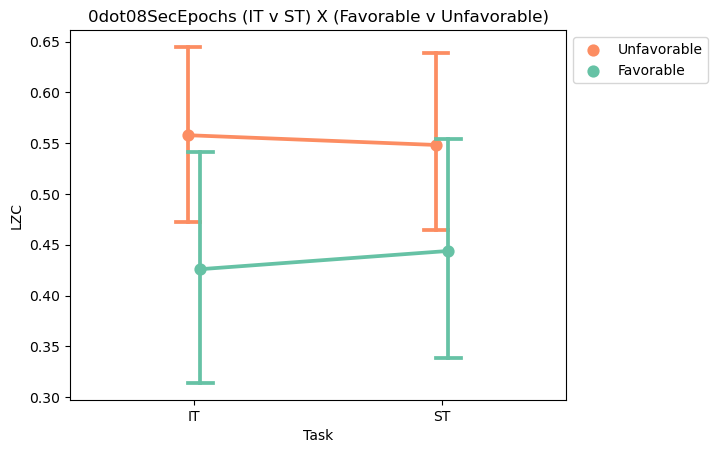

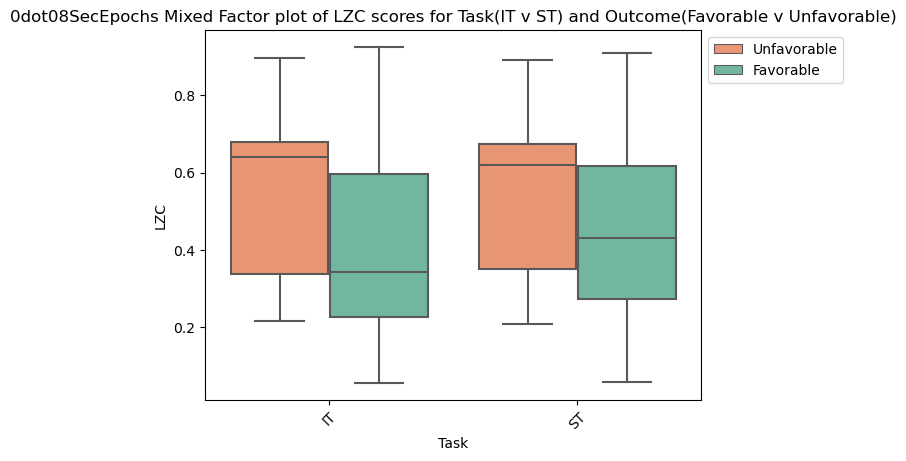






#############################################################
ssHC_ssP - Statistics
#############################################################


Sample Size  Mean (M)  Standard Deviation (SD)  \
Outcome Task                                                   
HC      IT             18  0.403202                 0.102389   
        ST             18  0.436284                 0.088086   
bad     IT             23  0.557798                 0.220339   
        ST             23  0.548189                 0.220643   
good    IT             17  0.425937                 0.248569   
        ST             17  0.443895                 0.235897   

              Standard Error of the Mean (SEM)  Skewness  Kurtosis  
Outcome Task                                                        
HC      IT                            0.024133  0.502178 -0.413036  
        ST                            0.020762 -0.026220 -0.715790  
bad     IT                            0.045944 -0.046721 -1.368897  
        ST                            0.046007 -0.057702 -1.268579  
good    IT                            0.060287  0.413814 -0.928137  
        ST                            0.057213  0.302201 -0.922500

,Source,SS,DF1,DF2,MS,F,p-unc,ng2,eps
0,Outcome,0.44,2,55,0.22,2.87,.065,0.09,nan
1,Task,0,1,55,0,3.06,.086,0,1
2,Interaction,0.01,2,55,0,3.71,.031,0,nan


,Contrast,Task,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Task,-,IT,ST,1,1,-1.67,57,two-sided,.100,nan,nan,0.529,-0.06
1,Outcome,-,HC,bad,0,1,-2.64,30.49,two-sided,.013,.038,fdr_bh,4.382,-0.75
2,Outcome,-,HC,good,0,1,-0.24,20.08,two-sided,.810,.810,fdr_bh,0.333,-0.08
3,Outcome,-,bad,good,0,1,1.59,32.68,two-sided,.122,.183,fdr_bh,0.834,0.51
4,Task * Outcome,IT,HC,bad,0,1,-2.98,32.6,two-sided,.005,.033,fdr_bh,8.558,-0.85
5,Task * Outcome,IT,HC,good,0,1,-0.35,21.03,two-sided,.730,.876,fdr_bh,0.341,-0.12
6,Task * Outcome,IT,bad,good,0,1,1.74,32.11,two-sided,.092,.183,fdr_bh,1.011,0.56
7,Task * Outcome,ST,HC,bad,0,1,-2.22,30.25,two-sided,.034,.103,fdr_bh,2.048,-0.62
8,Task * Outcome,ST,HC,good,0,1,-0.13,20.16,two-sided,.902,.902,fdr_bh,0.327,-0.04
9,Task * Outcome,ST,bad,good,0,1,1.42,33.27,two-sided,.165,.247,fdr_bh,0.687,0.45


,Contrast,Outcome,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Outcome,-,HC,bad,0,1,-2.64,30.49,two-sided,.013,.038,fdr_bh,4.382,-0.75
1,Outcome,-,HC,good,0,1,-0.24,20.08,two-sided,.810,.810,fdr_bh,0.333,-0.08
2,Outcome,-,bad,good,0,1,1.59,32.68,two-sided,.122,.183,fdr_bh,0.834,0.51
3,Task,-,IT,ST,1,1,-1.67,57,two-sided,.100,nan,nan,0.529,-0.06
4,Outcome * Task,HC,IT,ST,1,1,-2.05,17,two-sided,.056,.167,fdr_bh,1.326,-0.34
5,Outcome * Task,bad,IT,ST,1,1,1.19,22,two-sided,.245,.245,fdr_bh,0.411,0.04
6,Outcome * Task,good,IT,ST,1,1,-1.68,16,two-sided,.113,.169,fdr_bh,0.797,-0.07


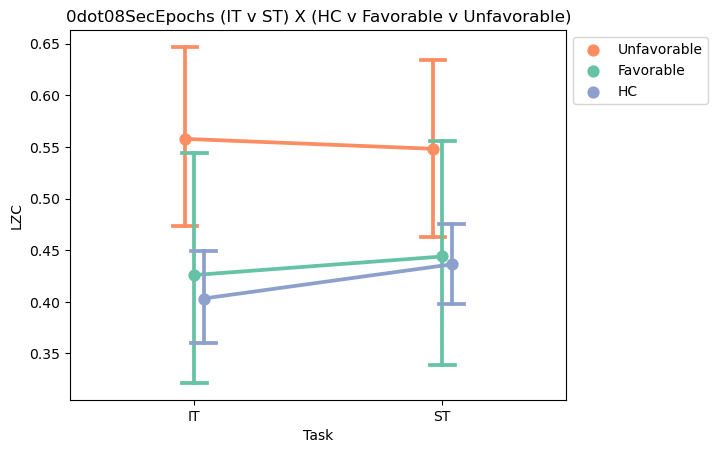

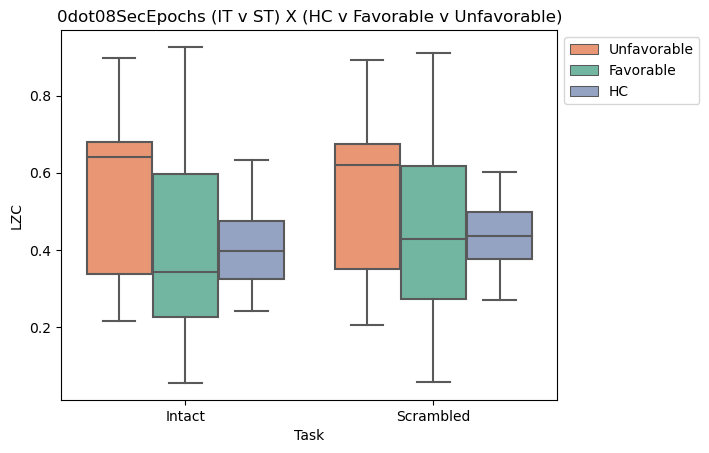


 svd2 _________________________________________
 svd2 _________________________________________
 svd2 _________________________________________
 svd2 _________________________________________
 svd2 _________________________________________

IT v ST (0dot08SecEpochs)
removed MSICU05part2 (272, 16)





#############################################################
dfsedOFF - Statistics
#############################################################


Sample Size  Mean (M)  Standard Deviation (SD)  \
Outcome Task                                                   
bad     IT             23  3.701938                 0.583485   
        ST             23  3.676658                 0.617595   
good    IT             17  3.387184                 0.619230   
        ST             17  3.431746                 0.541261   

              Standard Error of the Mean (SEM)  Skewness  Kurtosis  
Outcome Task                                                        
bad     IT                            0.121665 -1.136246  1.301200  
        ST                            0.128778 -0.978088  0.602833  
good    IT                            0.150185 -1.779753  2.389026  
        ST                            0.131275 -2.170463  4.626521

,Source,SS,DF1,DF2,MS,F,p-unc,ng2,eps
0,Outcome,1.53,1,38,1.53,2.22,.144,0.05,nan
1,Task,0,1,38,0,0.03,.865,0,1
2,Interaction,0.02,1,38,0.02,1.8,.188,0,nan


,Contrast,Task,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Task,-,IT,ST,1,1,-0.17,39,two-sided,.866,nan,nan,0.173,-0.01
1,Outcome,-,bad,good,0,1,1.5,35.46,two-sided,.142,nan,nan,0.751,0.47
2,Task * Outcome,IT,bad,good,0,1,1.63,33.42,two-sided,.113,.191,fdr_bh,0.876,0.52
3,Task * Outcome,ST,bad,good,0,1,1.33,36.82,two-sided,.191,.191,fdr_bh,0.625,0.41


,Contrast,Outcome,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Outcome,-,bad,good,0,1,1.5,35.46,two-sided,.142,nan,nan,0.751,0.47
1,Task,-,IT,ST,1,1,-0.17,39,two-sided,.866,nan,nan,0.173,-0.01
2,Outcome * Task,bad,IT,ST,1,1,1.04,22,two-sided,.309,.396,fdr_bh,0.355,0.04
3,Outcome * Task,good,IT,ST,1,1,-0.87,16,two-sided,.396,.396,fdr_bh,0.347,-0.07


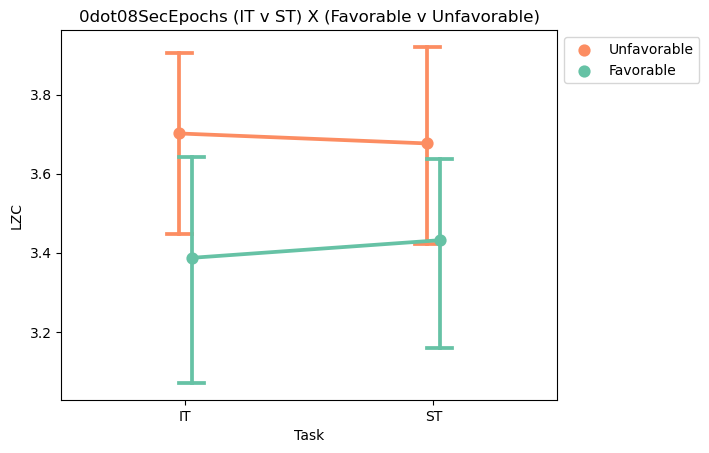

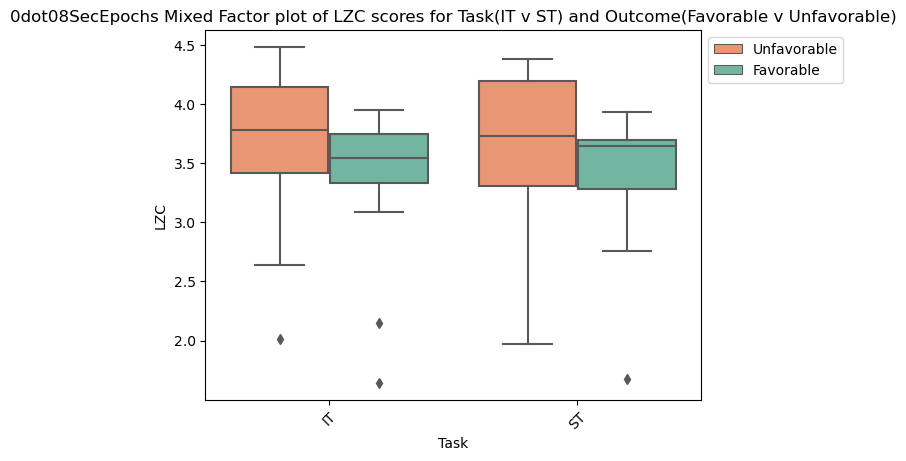






#############################################################
ssHC_ssP - Statistics
#############################################################


Sample Size  Mean (M)  Standard Deviation (SD)  \
Outcome Task                                                   
HC      IT             18  4.004643                 0.411142   
        ST             18  4.151162                 0.312688   
bad     IT             23  3.701938                 0.583485   
        ST             23  3.676658                 0.617595   
good    IT             17  3.387184                 0.619230   
        ST             17  3.431746                 0.541261   

              Standard Error of the Mean (SEM)  Skewness  Kurtosis  
Outcome Task                                                        
HC      IT                            0.096907 -0.424769 -0.550095  
        ST                            0.073701 -1.156585  1.385058  
bad     IT                            0.121665 -1.136246  1.301200  
        ST                            0.128778 -0.978088  0.602833  
good    IT                            0.150185 -1.779753  2.389026  
        ST                            0.131275 -2.170463  4.626521

,Source,SS,DF1,DF2,MS,F,p-unc,ng2,eps
0,Outcome,7.93,2,55,3.96,7.3,.002,0.2,nan
1,Task,0.07,1,55,0.07,2.73,.104,0,1
2,Interaction,0.15,2,55,0.07,2.99,.059,0,nan


,Contrast,Task,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Task,-,IT,ST,1,1,-1.6,57,two-sided,.116,nan,nan,0.475,-0.08
1,Outcome,-,HC,bad,0,1,2.65,35.41,two-sided,.012,.018,fdr_bh,4.414,0.76
2,Outcome,-,HC,good,0,1,4.21,25.21,two-sided,.000,.001,fdr_bh,126.153,1.41
3,Outcome,-,bad,good,0,1,1.5,35.46,two-sided,.142,.142,fdr_bh,0.751,0.47
4,Task * Outcome,IT,HC,bad,0,1,1.95,38.64,two-sided,.059,.088,fdr_bh,1.341,0.58
5,Task * Outcome,IT,HC,good,0,1,3.45,27.59,two-sided,.002,.005,fdr_bh,21.95,1.15
6,Task * Outcome,IT,bad,good,0,1,1.63,33.42,two-sided,.113,.135,fdr_bh,0.876,0.52
7,Task * Outcome,ST,HC,bad,0,1,3.2,34.05,two-sided,.003,.006,fdr_bh,13.689,0.92
8,Task * Outcome,ST,HC,good,0,1,4.78,25.31,two-sided,.000,.000,fdr_bh,522.321,1.6
9,Task * Outcome,ST,bad,good,0,1,1.33,36.82,two-sided,.191,.191,fdr_bh,0.625,0.41


,Contrast,Outcome,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Outcome,-,HC,bad,0,1,2.65,35.41,two-sided,.012,.018,fdr_bh,4.414,0.76
1,Outcome,-,HC,good,0,1,4.21,25.21,two-sided,.000,.001,fdr_bh,126.153,1.41
2,Outcome,-,bad,good,0,1,1.5,35.46,two-sided,.142,.142,fdr_bh,0.751,0.47
3,Task,-,IT,ST,1,1,-1.6,57,two-sided,.116,nan,nan,0.475,-0.08
4,Outcome * Task,HC,IT,ST,1,1,-1.94,17,two-sided,.069,.206,fdr_bh,1.128,-0.39
5,Outcome * Task,bad,IT,ST,1,1,1.04,22,two-sided,.309,.396,fdr_bh,0.355,0.04
6,Outcome * Task,good,IT,ST,1,1,-0.87,16,two-sided,.396,.396,fdr_bh,0.347,-0.07


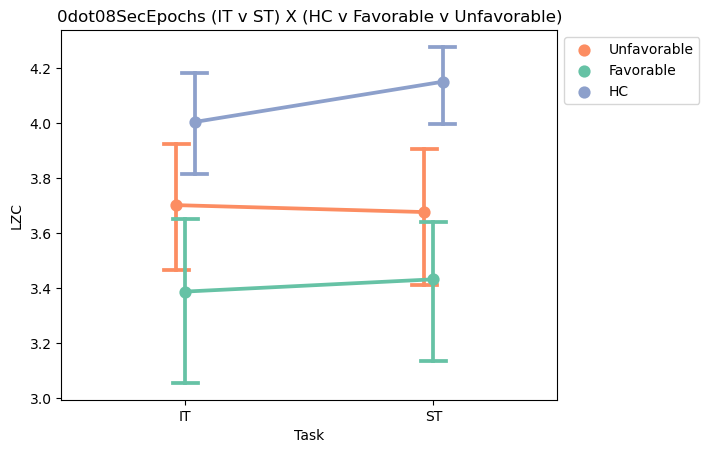

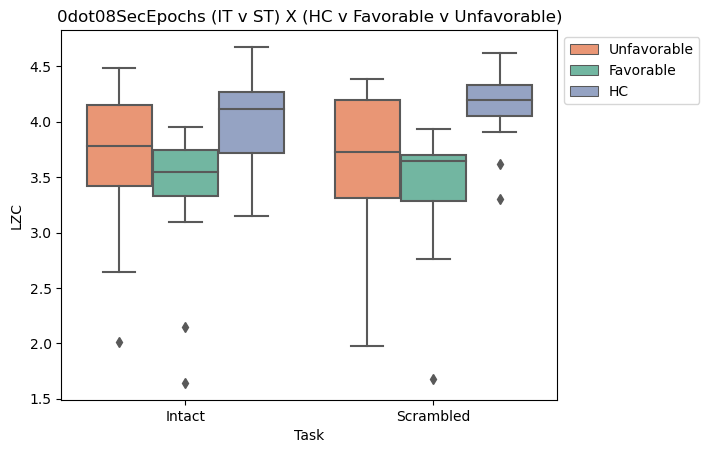


 approx _________________________________________
 approx _________________________________________
 approx _________________________________________
 approx _________________________________________
 approx _________________________________________

IT v ST (0dot08SecEpochs)
removed MSICU05part2 (272, 16)





#############################################################
dfsedOFF - Statistics
#############################################################


Sample Size  Mean (M)  Standard Deviation (SD)  \
Outcome Task                                                   
bad     IT             23  0.766372                 0.276332   
        ST             23  0.757975                 0.287274   
good    IT             17  0.554929                 0.308114   
        ST             17  0.583792                 0.282032   

              Standard Error of the Mean (SEM)  Skewness  Kurtosis  
Outcome Task                                                        
bad     IT                            0.057619 -0.259817 -1.221056  
        ST                            0.059901 -0.208466 -1.041001  
good    IT                            0.074729 -0.110881 -1.440610  
        ST                            0.068403 -0.302797 -1.198265

,Source,SS,DF1,DF2,MS,F,p-unc,ng2,eps
0,Outcome,0.73,1,38,0.73,4.49,.041,0.1,nan
1,Task,0,1,38,0,0.31,.579,0,1
2,Interaction,0.01,1,38,0.01,1.92,.174,0,nan


,Contrast,Task,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Task,-,IT,ST,1,1,-0.55,39,two-sided,.584,nan,nan,0.197,-0.02
1,Outcome,-,bad,good,0,1,2.1,33.74,two-sided,.043,nan,nan,1.712,0.66
2,Task * Outcome,IT,bad,good,0,1,2.24,32.36,two-sided,.032,.064,fdr_bh,2.133,0.71
3,Task * Outcome,ST,bad,good,0,1,1.92,34.99,two-sided,.064,.064,fdr_bh,1.289,0.6


,Contrast,Outcome,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Outcome,-,bad,good,0,1,2.1,33.74,two-sided,.043,nan,nan,1.712,0.66
1,Task,-,IT,ST,1,1,-0.55,39,two-sided,.584,nan,nan,0.197,-0.02
2,Outcome * Task,bad,IT,ST,1,1,0.52,22,two-sided,.611,.611,fdr_bh,0.247,0.03
3,Outcome * Task,good,IT,ST,1,1,-1.3,16,two-sided,.214,.427,fdr_bh,0.509,-0.1


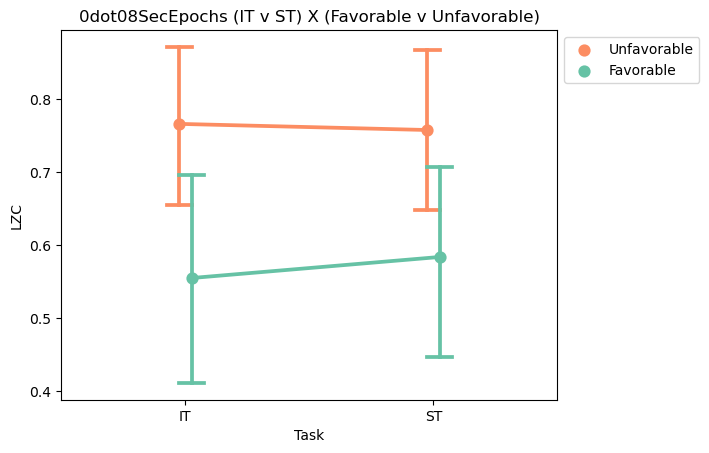

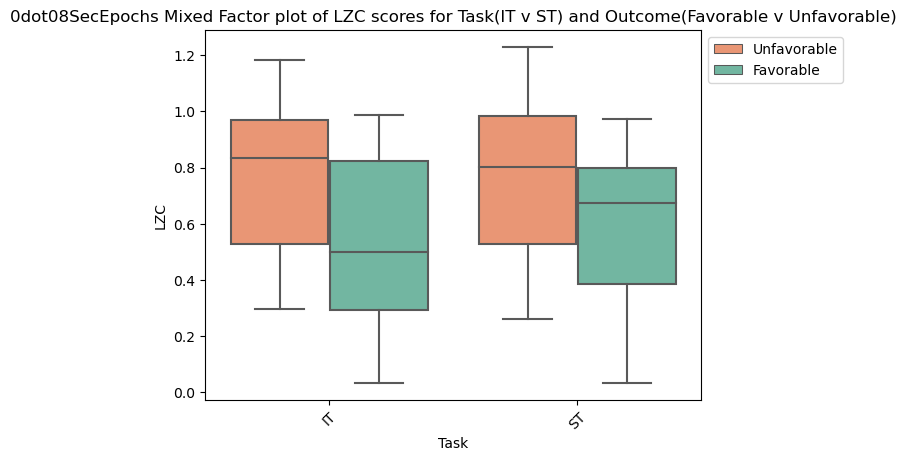






#############################################################
ssHC_ssP - Statistics
#############################################################


Sample Size  Mean (M)  Standard Deviation (SD)  \
Outcome Task                                                   
HC      IT             18  0.629119                 0.195488   
        ST             18  0.690462                 0.169246   
bad     IT             23  0.766372                 0.276332   
        ST             23  0.757975                 0.287274   
good    IT             17  0.554929                 0.308114   
        ST             17  0.583792                 0.282032   

              Standard Error of the Mean (SEM)  Skewness  Kurtosis  
Outcome Task                                                        
HC      IT                            0.046077  0.606474 -0.148469  
        ST                            0.039892  0.013104 -0.696033  
bad     IT                            0.057619 -0.259817 -1.221056  
        ST                            0.059901 -0.208466 -1.041001  
good    IT                            0.074729 -0.110881 -1.440610  
        ST                            0.068403 -0.302797 -1.198265

,Source,SS,DF1,DF2,MS,F,p-unc,ng2,eps
0,Outcome,0.74,2,55,0.37,2.83,.067,0.09,nan
1,Task,0.02,1,55,0.02,3.49,.067,0,1
2,Interaction,0.02,2,55,0.01,2.56,.087,0,nan


,Contrast,Task,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Task,-,IT,ST,1,1,-1.82,57,two-sided,.074,nan,nan,0.67,-0.09
1,Outcome,-,HC,bad,0,1,-1.44,37.18,two-sided,.157,.236,fdr_bh,0.699,-0.42
2,Outcome,-,HC,good,0,1,1.11,25.61,two-sided,.278,.278,fdr_bh,0.523,0.37
3,Outcome,-,bad,good,0,1,2.1,33.74,two-sided,.043,.129,fdr_bh,1.712,0.66
4,Task * Outcome,IT,HC,bad,0,1,-1.86,38.67,two-sided,.070,.141,fdr_bh,1.185,-0.55
5,Task * Outcome,IT,HC,good,0,1,0.85,26.83,two-sided,.406,.406,fdr_bh,0.429,0.28
6,Task * Outcome,IT,bad,good,0,1,2.24,32.36,two-sided,.032,.141,fdr_bh,2.133,0.71
7,Task * Outcome,ST,HC,bad,0,1,-0.94,36.54,two-sided,.354,.406,fdr_bh,0.436,-0.27
8,Task * Outcome,ST,HC,good,0,1,1.35,25.91,two-sided,.190,.284,fdr_bh,0.654,0.45
9,Task * Outcome,ST,bad,good,0,1,1.92,34.99,two-sided,.064,.141,fdr_bh,1.289,0.6


,Contrast,Outcome,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Outcome,-,HC,bad,0,1,-1.44,37.18,two-sided,.157,.236,fdr_bh,0.699,-0.42
1,Outcome,-,HC,good,0,1,1.11,25.61,two-sided,.278,.278,fdr_bh,0.523,0.37
2,Outcome,-,bad,good,0,1,2.1,33.74,two-sided,.043,.129,fdr_bh,1.712,0.66
3,Task,-,IT,ST,1,1,-1.82,57,two-sided,.074,nan,nan,0.67,-0.09
4,Outcome * Task,HC,IT,ST,1,1,-2.08,17,two-sided,.053,.158,fdr_bh,1.387,-0.33
5,Outcome * Task,bad,IT,ST,1,1,0.52,22,two-sided,.611,.611,fdr_bh,0.247,0.03
6,Outcome * Task,good,IT,ST,1,1,-1.3,16,two-sided,.214,.320,fdr_bh,0.509,-0.1


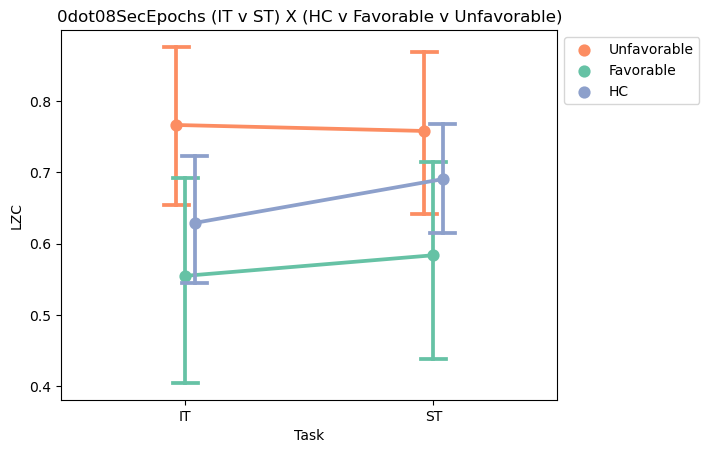

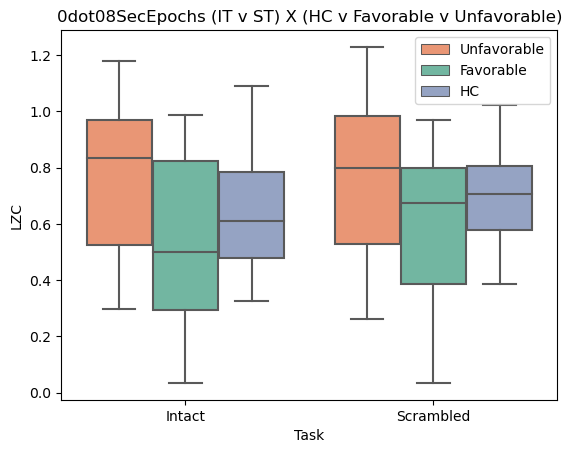


 sample _________________________________________
 sample _________________________________________
 sample _________________________________________
 sample _________________________________________
 sample _________________________________________

IT v ST (0dot08SecEpochs)
removed MSICU05part2 (272, 16)





#############################################################
dfsedOFF - Statistics
#############################################################


Sample Size  Mean (M)  Standard Deviation (SD)  \
Outcome Task                                                   
bad     IT             23  0.739701                 0.290707   
        ST             23  0.731360                 0.299454   
good    IT             17  0.536732                 0.322540   
        ST             17  0.563783                 0.295397   

              Standard Error of the Mean (SEM)  Skewness  Kurtosis  
Outcome Task                                                        
bad     IT                            0.060617 -0.204752 -1.317455  
        ST                            0.062441 -0.121393 -1.105522  
good    IT                            0.078227 -0.011282 -1.572503  
        ST                            0.071644 -0.182458 -1.387263

,Source,SS,DF1,DF2,MS,F,p-unc,ng2,eps
0,Outcome,0.67,1,38,0.67,3.78,.059,0.09,nan
1,Task,0,1,38,0,0.25,.622,0,1
2,Interaction,0.01,1,38,0.01,1.68,.202,0,nan


,Contrast,Task,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Task,-,IT,ST,1,1,-0.49,39,two-sided,.625,nan,nan,0.191,-0.02
1,Outcome,-,bad,good,0,1,1.93,33.73,two-sided,.062,nan,nan,1.316,0.61
2,Task * Outcome,IT,bad,good,0,1,2.05,32.47,two-sided,.048,.087,fdr_bh,1.576,0.65
3,Task * Outcome,ST,bad,good,0,1,1.76,34.9,two-sided,.087,.087,fdr_bh,1.043,0.55


,Contrast,Outcome,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Outcome,-,bad,good,0,1,1.93,33.73,two-sided,.062,nan,nan,1.316,0.61
1,Task,-,IT,ST,1,1,-0.49,39,two-sided,.625,nan,nan,0.191,-0.02
2,Outcome * Task,bad,IT,ST,1,1,0.5,22,two-sided,.620,.620,fdr_bh,0.245,0.03
3,Outcome * Task,good,IT,ST,1,1,-1.2,16,two-sided,.246,.493,fdr_bh,0.463,-0.09


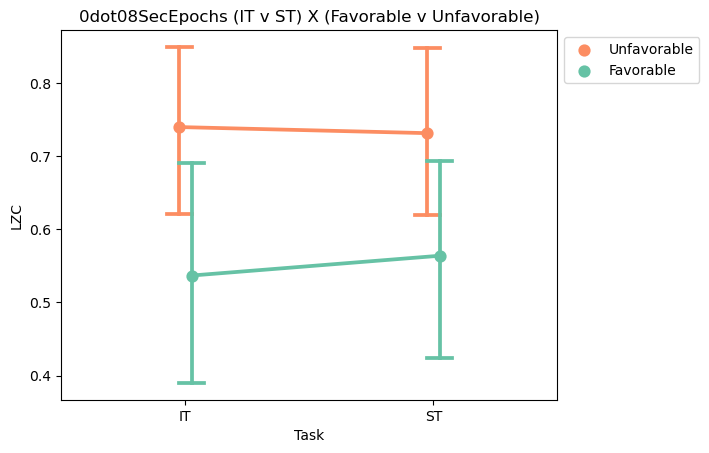

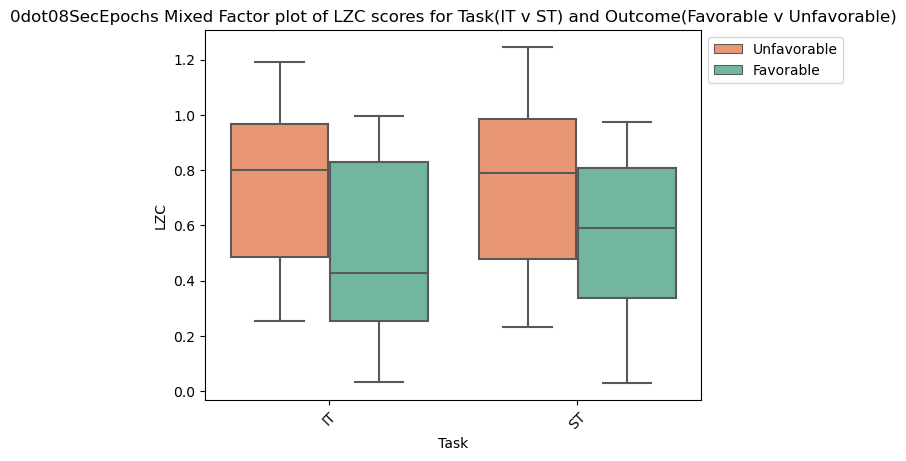






#############################################################
ssHC_ssP - Statistics
#############################################################


Sample Size  Mean (M)  Standard Deviation (SD)  \
Outcome Task                                                   
HC      IT             18  0.575780                 0.198439   
        ST             18  0.638214                 0.176781   
bad     IT             23  0.739701                 0.290707   
        ST             23  0.731360                 0.299454   
good    IT             17  0.536732                 0.322540   
        ST             17  0.563783                 0.295397   

              Standard Error of the Mean (SEM)  Skewness  Kurtosis  
Outcome Task                                                        
HC      IT                            0.046772  0.658862 -0.065299  
        ST                            0.041668  0.064431 -0.841961  
bad     IT                            0.060617 -0.204752 -1.317455  
        ST                            0.062441 -0.121393 -1.105522  
good    IT                            0.078227 -0.011282 -1.572503  
        ST                            0.071644 -0.182458 -1.387263

,Source,SS,DF1,DF2,MS,F,p-unc,ng2,eps
0,Outcome,0.73,2,55,0.37,2.58,.085,0.08,nan
1,Task,0.02,1,55,0.02,3.35,.072,0,1
2,Interaction,0.03,2,55,0.01,2.55,.087,0,nan


,Contrast,Task,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Task,-,IT,ST,1,1,-1.78,57,two-sided,.080,nan,nan,0.632,-0.09
1,Outcome,-,HC,bad,0,1,-1.74,36.94,two-sided,.090,.135,fdr_bh,1.004,-0.51
2,Outcome,-,HC,good,0,1,0.67,25.34,two-sided,.511,.511,fdr_bh,0.387,0.22
3,Outcome,-,bad,good,0,1,1.93,33.73,two-sided,.062,.135,fdr_bh,1.316,0.61
4,Task * Outcome,IT,HC,bad,0,1,-2.14,38.39,two-sided,.039,.145,fdr_bh,1.81,-0.63
5,Task * Outcome,IT,HC,good,0,1,0.43,26.32,two-sided,.672,.672,fdr_bh,0.349,0.14
6,Task * Outcome,IT,bad,good,0,1,2.05,32.47,two-sided,.048,.145,fdr_bh,1.576,0.65
7,Task * Outcome,ST,HC,bad,0,1,-1.24,36.57,two-sided,.223,.334,fdr_bh,0.565,-0.36
8,Task * Outcome,ST,HC,good,0,1,0.9,25.87,two-sided,.377,.453,fdr_bh,0.445,0.3
9,Task * Outcome,ST,bad,good,0,1,1.76,34.9,two-sided,.087,.173,fdr_bh,1.043,0.55


,Contrast,Outcome,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Outcome,-,HC,bad,0,1,-1.74,36.94,two-sided,.090,.135,fdr_bh,1.004,-0.51
1,Outcome,-,HC,good,0,1,0.67,25.34,two-sided,.511,.511,fdr_bh,0.387,0.22
2,Outcome,-,bad,good,0,1,1.93,33.73,two-sided,.062,.135,fdr_bh,1.316,0.61
3,Task,-,IT,ST,1,1,-1.78,57,two-sided,.080,nan,nan,0.632,-0.09
4,Outcome * Task,HC,IT,ST,1,1,-2.1,17,two-sided,.051,.154,fdr_bh,1.416,-0.32
5,Outcome * Task,bad,IT,ST,1,1,0.5,22,two-sided,.620,.620,fdr_bh,0.245,0.03
6,Outcome * Task,good,IT,ST,1,1,-1.2,16,two-sided,.246,.370,fdr_bh,0.463,-0.09


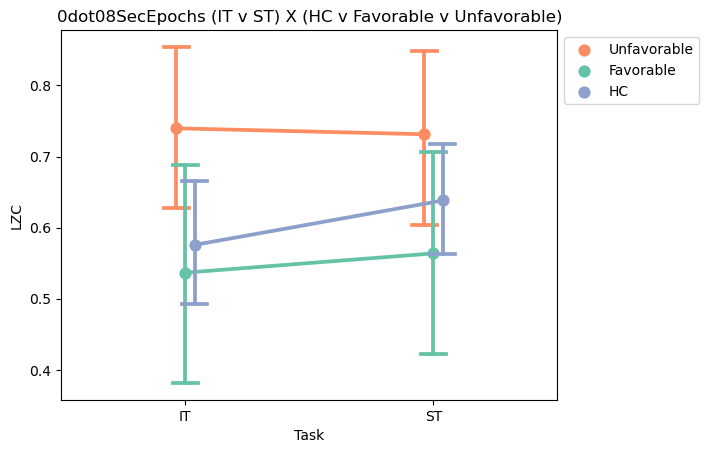

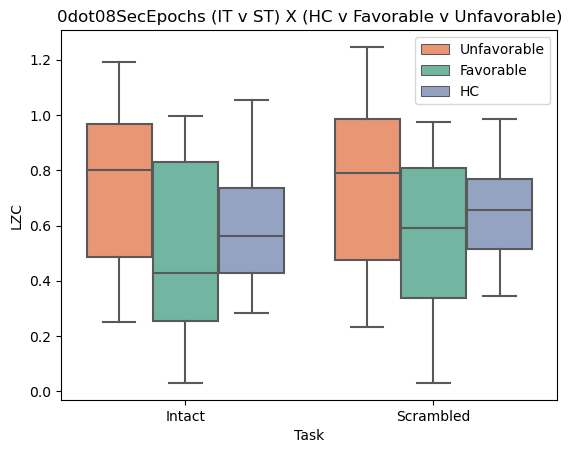


 detrended _________________________________________
 detrended _________________________________________
 detrended _________________________________________
 detrended _________________________________________
 detrended _________________________________________

IT v ST (0dot08SecEpochs)
removed MSICU05part2 (272, 16)





#############################################################
dfsedOFF - Statistics
#############################################################


Sample Size  Mean (M)  Standard Deviation (SD)  \
Outcome Task                                                   
bad     IT             23  1.088982                 0.286475   
        ST             23  1.101790                 0.296887   
good    IT             17  1.305891                 0.271540   
        ST             17  1.283368                 0.271282   

              Standard Error of the Mean (SEM)  Skewness  Kurtosis  
Outcome Task                                                        
bad     IT                            0.059734 -0.039557 -1.100356  
        ST                            0.061905 -0.059487 -0.964748  
good    IT                            0.065858 -0.247047 -0.381536  
        ST                            0.065796 -0.045627 -0.547579

,Source,SS,DF1,DF2,MS,F,p-unc,ng2,eps
0,Outcome,0.78,1,38,0.78,4.88,.033,0.11,nan
1,Task,0,1,38,0,0.06,.803,0,1
2,Interaction,0.01,1,38,0.01,3.97,.054,0,nan


,Contrast,Task,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Task,-,IT,ST,1,1,0.24,39,two-sided,.809,nan,nan,0.175,0.01
1,Outcome,-,bad,good,0,1,-2.23,35.95,two-sided,.032,nan,nan,2.109,-0.69
2,Task * Outcome,IT,bad,good,0,1,-2.44,35.62,two-sided,.020,.040,fdr_bh,2.999,-0.76
3,Task * Outcome,ST,bad,good,0,1,-2.01,36.22,two-sided,.052,.052,fdr_bh,1.481,-0.62


,Contrast,Outcome,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Outcome,-,bad,good,0,1,-2.23,35.95,two-sided,.032,nan,nan,2.109,-0.69
1,Task,-,IT,ST,1,1,0.24,39,two-sided,.809,nan,nan,0.175,0.01
2,Outcome * Task,bad,IT,ST,1,1,-1.13,22,two-sided,.272,.272,fdr_bh,0.385,-0.04
3,Outcome * Task,good,IT,ST,1,1,1.64,16,two-sided,.121,.243,fdr_bh,0.755,0.08


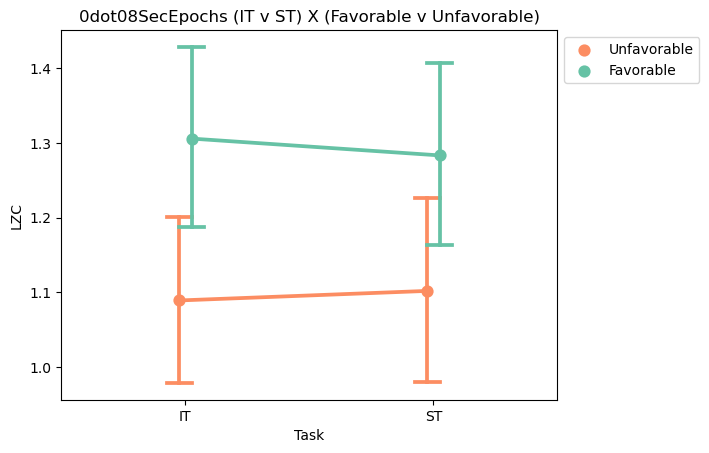

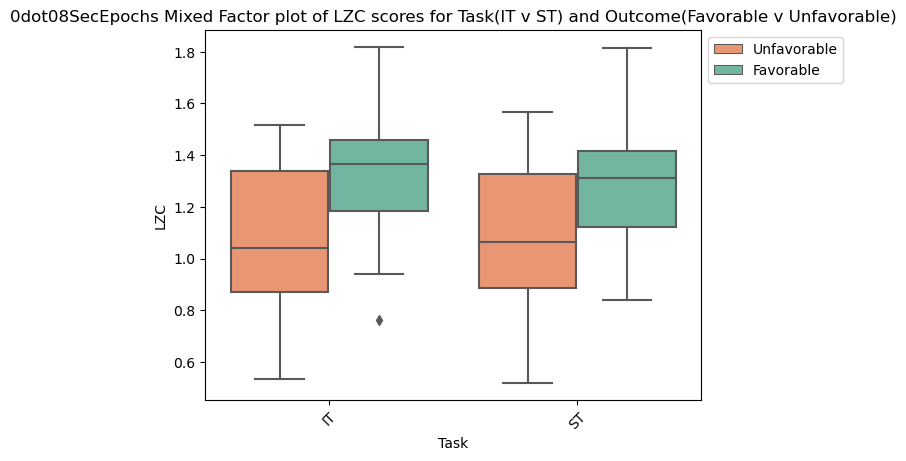






#############################################################
ssHC_ssP - Statistics
#############################################################


Sample Size  Mean (M)  Standard Deviation (SD)  \
Outcome Task                                                   
HC      IT             18  1.231170                 0.141466   
        ST             18  1.196024                 0.125038   
bad     IT             23  1.088982                 0.286475   
        ST             23  1.101790                 0.296887   
good    IT             17  1.305891                 0.271540   
        ST             17  1.283368                 0.271282   

              Standard Error of the Mean (SEM)  Skewness  Kurtosis  
Outcome Task                                                        
HC      IT                            0.033344  0.163270 -0.805659  
        ST                            0.029472  0.650947 -0.397980  
bad     IT                            0.059734 -0.039557 -1.100356  
        ST                            0.061905 -0.059487 -0.964748  
good    IT                            0.065858 -0.247047 -0.381536  
        ST                            0.065796 -0.045627 -0.547579

,Source,SS,DF1,DF2,MS,F,p-unc,ng2,eps
0,Outcome,0.8,2,55,0.4,3.35,.042,0.11,nan
1,Task,0,1,55,0,2.35,.131,0,1
2,Interaction,0.01,2,55,0.01,3.36,.042,0,nan


,Contrast,Task,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Task,-,IT,ST,1,1,1.47,57,two-sided,.146,nan,nan,0.398,0.05
1,Outcome,-,HC,bad,0,1,1.75,31.78,two-sided,.090,.136,fdr_bh,1.013,0.5
2,Outcome,-,HC,good,0,1,-1.12,22.59,two-sided,.273,.273,fdr_bh,0.53,-0.38
3,Outcome,-,bad,good,0,1,-2.23,35.95,two-sided,.032,.095,fdr_bh,2.109,-0.69
4,Task * Outcome,IT,HC,bad,0,1,2.08,33.62,two-sided,.045,.104,fdr_bh,1.639,0.59
5,Task * Outcome,IT,HC,good,0,1,-1.01,23.78,two-sided,.322,.322,fdr_bh,0.484,-0.34
6,Task * Outcome,IT,bad,good,0,1,-2.44,35.62,two-sided,.020,.104,fdr_bh,2.999,-0.76
7,Task * Outcome,ST,HC,bad,0,1,1.37,31.04,two-sided,.179,.269,fdr_bh,0.648,0.39
8,Task * Outcome,ST,HC,good,0,1,-1.21,22.22,two-sided,.238,.286,fdr_bh,0.573,-0.41
9,Task * Outcome,ST,bad,good,0,1,-2.01,36.22,two-sided,.052,.104,fdr_bh,1.481,-0.62


,Contrast,Outcome,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Outcome,-,HC,bad,0,1,1.75,31.78,two-sided,.090,.136,fdr_bh,1.013,0.5
1,Outcome,-,HC,good,0,1,-1.12,22.59,two-sided,.273,.273,fdr_bh,0.53,-0.38
2,Outcome,-,bad,good,0,1,-2.23,35.95,two-sided,.032,.095,fdr_bh,2.109,-0.69
3,Task,-,IT,ST,1,1,1.47,57,two-sided,.146,nan,nan,0.398,0.05
4,Outcome * Task,HC,IT,ST,1,1,2.02,17,two-sided,.060,.180,fdr_bh,1.253,0.26
5,Outcome * Task,bad,IT,ST,1,1,-1.13,22,two-sided,.272,.272,fdr_bh,0.385,-0.04
6,Outcome * Task,good,IT,ST,1,1,1.64,16,two-sided,.121,.182,fdr_bh,0.755,0.08


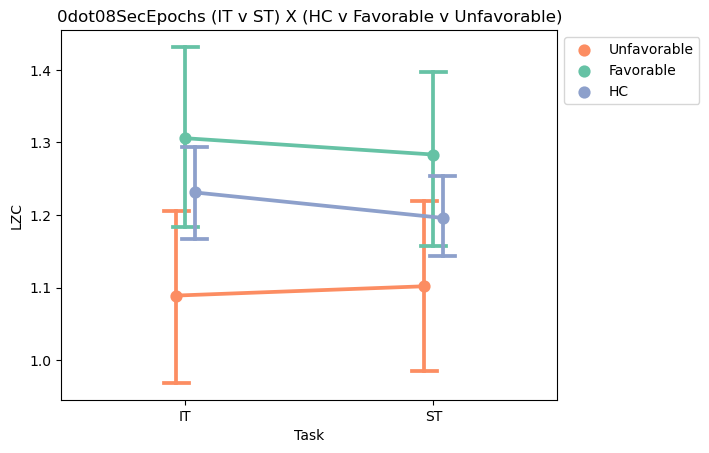

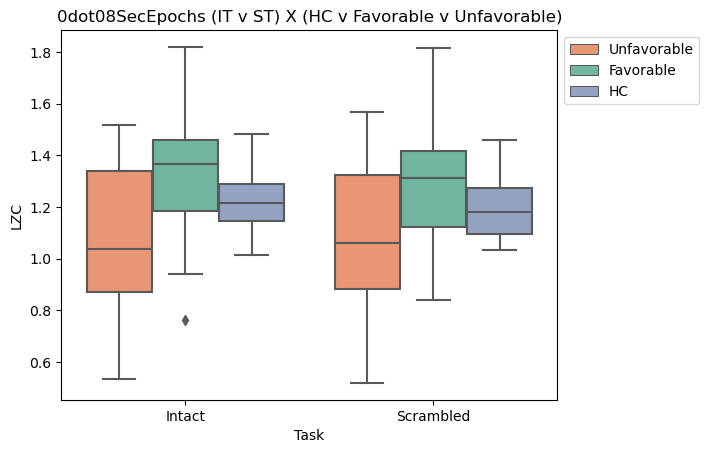


 katz _________________________________________
 katz _________________________________________
 katz _________________________________________
 katz _________________________________________
 katz _________________________________________

IT v ST (0dot08SecEpochs)
removed MSICU05part2 (272, 16)





#############################################################
dfsedOFF - Statistics
#############################################################


Sample Size  Mean (M)  Standard Deviation (SD)  \
Outcome Task                                                   
bad     IT             23  3.232378                 1.153151   
        ST             23  3.193500                 1.131648   
good    IT             17  2.779585                 1.200382   
        ST             17  2.834487                 1.150423   

              Standard Error of the Mean (SEM)  Skewness  Kurtosis  
Outcome Task                                                        
bad     IT                            0.240449  0.659726 -0.858568  
        ST                            0.235965  0.669270 -0.783152  
good    IT                            0.291135  1.126553  0.618037  
        ST                            0.279018  0.969475  0.200674

,Source,SS,DF1,DF2,MS,F,p-unc,ng2,eps
0,Outcome,3.22,1,38,3.22,1.21,.278,0.03,nan
1,Task,0,1,38,0,0,.967,0,1
2,Interaction,0.04,1,38,0.04,3.89,.056,0,nan


,Contrast,Task,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Task,-,IT,ST,1,1,-0.04,39,two-sided,.968,nan,nan,0.171,-0
1,Outcome,-,bad,good,0,1,1.09,34.07,two-sided,.281,nan,nan,0.5,0.34
2,Task * Outcome,IT,bad,good,0,1,1.2,33.83,two-sided,.239,.333,fdr_bh,0.549,0.38
3,Task * Outcome,ST,bad,good,0,1,0.98,34.31,two-sided,.333,.333,fdr_bh,0.456,0.31


,Contrast,Outcome,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Outcome,-,bad,good,0,1,1.09,34.07,two-sided,.281,nan,nan,0.5,0.34
1,Task,-,IT,ST,1,1,-0.04,39,two-sided,.968,nan,nan,0.171,-0
2,Outcome * Task,bad,IT,ST,1,1,1.3,22,two-sided,.208,.208,fdr_bh,0.459,0.03
3,Outcome * Task,good,IT,ST,1,1,-1.46,16,two-sided,.164,.208,fdr_bh,0.608,-0.05


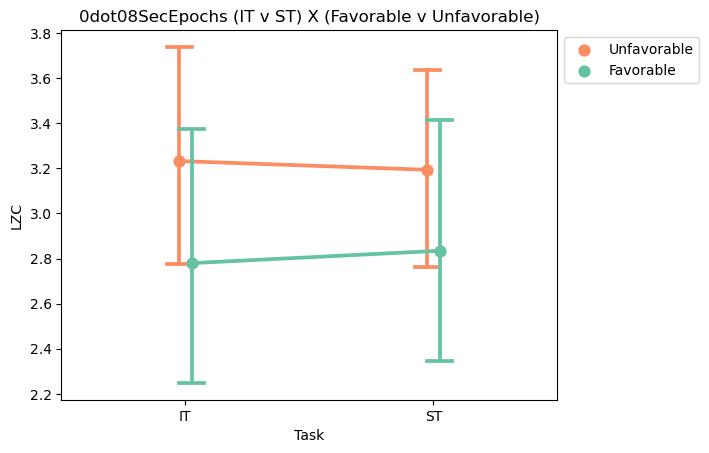

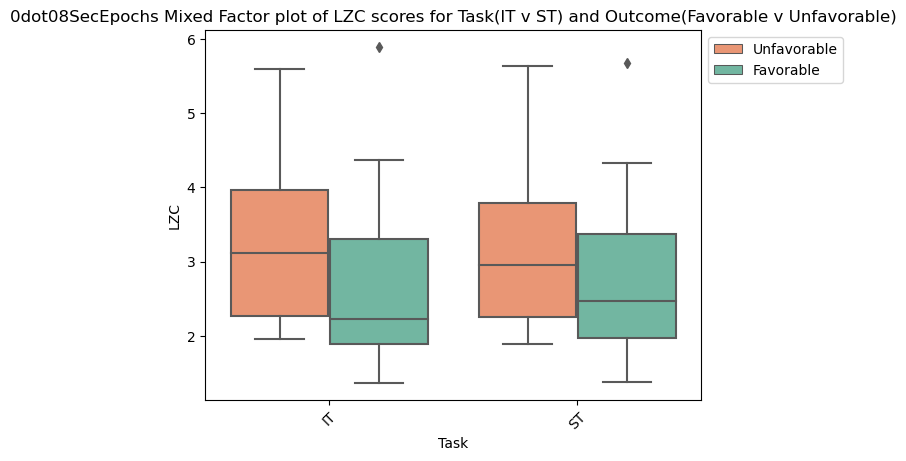






#############################################################
ssHC_ssP - Statistics
#############################################################


Sample Size  Mean (M)  Standard Deviation (SD)  \
Outcome Task                                                   
HC      IT             18  2.326148                 0.247978   
        ST             18  2.416490                 0.232041   
bad     IT             23  3.232378                 1.153151   
        ST             23  3.193500                 1.131648   
good    IT             17  2.779585                 1.200382   
        ST             17  2.834487                 1.150423   

              Standard Error of the Mean (SEM)  Skewness  Kurtosis  
Outcome Task                                                        
HC      IT                            0.058449  0.480020 -0.541500  
        ST                            0.054693  0.043913 -1.118155  
bad     IT                            0.240449  0.659726 -0.858568  
        ST                            0.235965  0.669270 -0.783152  
good    IT                            0.291135  1.126553  0.618037  
        ST                            0.279018  0.969475  0.200674

,Source,SS,DF1,DF2,MS,F,p-unc,ng2,eps
0,Outcome,14.34,2,55,7.17,3.83,.028,0.12,nan
1,Task,0.02,1,55,0.02,1.79,.186,0,1
2,Interaction,0.09,2,55,0.05,3.47,.038,0,nan


,Contrast,Task,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Task,-,IT,ST,1,1,-1.28,57,two-sided,.204,nan,nan,0.313,-0.03
1,Outcome,-,HC,bad,0,1,-3.46,24.07,two-sided,.002,.006,fdr_bh,24.661,-0.95
2,Outcome,-,HC,good,0,1,-1.51,17.06,two-sided,.150,.225,fdr_bh,0.776,-0.51
3,Outcome,-,bad,good,0,1,1.09,34.07,two-sided,.281,.281,fdr_bh,0.5,0.34
4,Task * Outcome,IT,HC,bad,0,1,-3.66,24.57,two-sided,.001,.007,fdr_bh,39.876,-1.01
5,Task * Outcome,IT,HC,good,0,1,-1.53,17.29,two-sided,.145,.239,fdr_bh,0.795,-0.52
6,Task * Outcome,IT,bad,good,0,1,1.2,33.83,two-sided,.239,.287,fdr_bh,0.549,0.38
7,Task * Outcome,ST,HC,bad,0,1,-3.21,24.34,two-sided,.004,.011,fdr_bh,13.99,-0.88
8,Task * Outcome,ST,HC,good,0,1,-1.47,17.23,two-sided,.160,.239,fdr_bh,0.745,-0.5
9,Task * Outcome,ST,bad,good,0,1,0.98,34.31,two-sided,.333,.333,fdr_bh,0.456,0.31


,Contrast,Outcome,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Outcome,-,HC,bad,0,1,-3.46,24.07,two-sided,.002,.006,fdr_bh,24.661,-0.95
1,Outcome,-,HC,good,0,1,-1.51,17.06,two-sided,.150,.225,fdr_bh,0.776,-0.51
2,Outcome,-,bad,good,0,1,1.09,34.07,two-sided,.281,.281,fdr_bh,0.5,0.34
3,Task,-,IT,ST,1,1,-1.28,57,two-sided,.204,nan,nan,0.313,-0.03
4,Outcome * Task,HC,IT,ST,1,1,-2,17,two-sided,.062,.186,fdr_bh,1.219,-0.37
5,Outcome * Task,bad,IT,ST,1,1,1.3,22,two-sided,.208,.208,fdr_bh,0.459,0.03
6,Outcome * Task,good,IT,ST,1,1,-1.46,16,two-sided,.164,.208,fdr_bh,0.608,-0.05


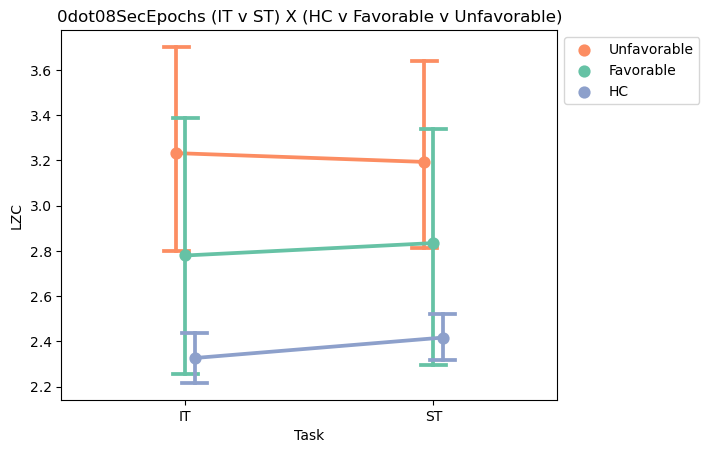

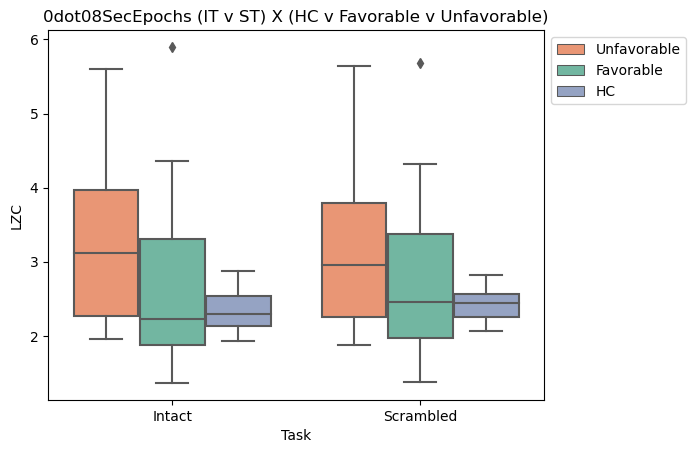


 ll _________________________________________
 ll _________________________________________
 ll _________________________________________
 ll _________________________________________
 ll _________________________________________

IT v ST (0dot08SecEpochs)
removed MSICU05part2 (272, 16)





#############################################################
dfsedOFF - Statistics
#############################################################


Sample Size  Mean (M)  Standard Deviation (SD)  \
Outcome Task                                                   
bad     IT             23  0.000007                 0.000007   
        ST             23  0.000007                 0.000008   
good    IT             17  0.000011                 0.000014   
        ST             17  0.000013                 0.000018   

              Standard Error of the Mean (SEM)  Skewness  Kurtosis  
Outcome Task                                                        
bad     IT                            0.000001  1.101049  0.044979  
        ST                            0.000002  1.850349  3.283087  
good    IT                            0.000003  1.696558  1.749421  
        ST                            0.000004  2.251116  4.552175

,Source,SS,DF1,DF2,MS,F,p-unc,ng2,eps
0,Outcome,0,1,38,0,1.74,.195,0.04,nan
1,Task,0,1,38,0,0.72,.401,0,1
2,Interaction,0,1,38,0,0.72,.400,0,nan


,Contrast,Task,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Task,-,IT,ST,1,1,-0.85,39,two-sided,.399,nan,nan,0.239,-0.06
1,Outcome,-,bad,good,0,1,-1.19,20.48,two-sided,.249,nan,nan,0.542,-0.41
2,Task * Outcome,IT,bad,good,0,1,-1.13,20.96,two-sided,.270,.270,fdr_bh,0.517,-0.39
3,Task * Outcome,ST,bad,good,0,1,-1.19,20.05,two-sided,.247,.270,fdr_bh,0.545,-0.42


,Contrast,Outcome,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Outcome,-,bad,good,0,1,-1.19,20.48,two-sided,.249,nan,nan,0.542,-0.41
1,Task,-,IT,ST,1,1,-0.85,39,two-sided,.399,nan,nan,0.239,-0.06
2,Outcome * Task,bad,IT,ST,1,1,-0.18,22,two-sided,.855,.855,fdr_bh,0.222,-0.01
3,Outcome * Task,good,IT,ST,1,1,-0.84,16,two-sided,.415,.830,fdr_bh,0.338,-0.09


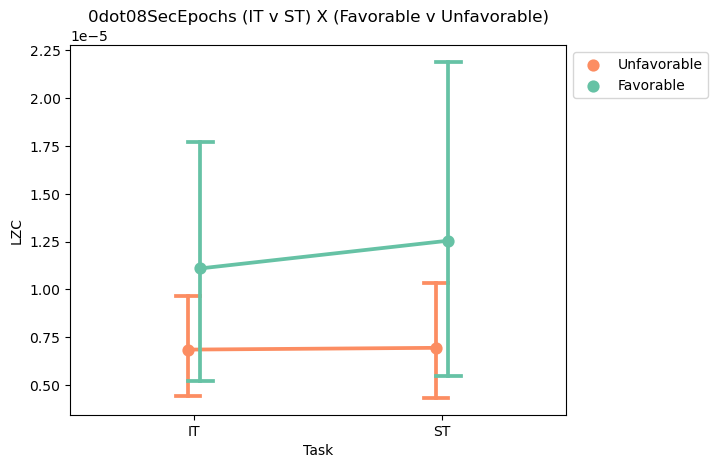

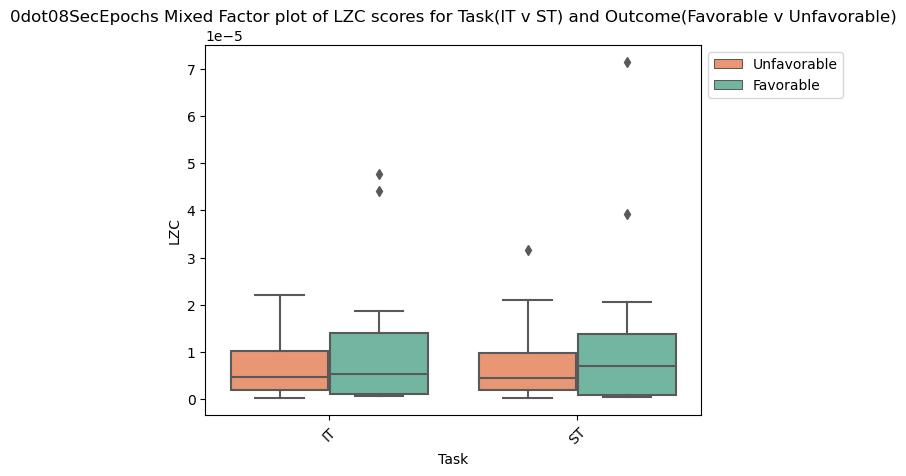






#############################################################
ssHC_ssP - Statistics
#############################################################


Sample Size  Mean (M)  Standard Deviation (SD)  \
Outcome Task                                                   
HC      IT             18  0.000002                 0.000001   
        ST             18  0.000002                 0.000001   
bad     IT             23  0.000007                 0.000007   
        ST             23  0.000007                 0.000008   
good    IT             17  0.000011                 0.000014   
        ST             17  0.000013                 0.000018   

              Standard Error of the Mean (SEM)  Skewness  Kurtosis  
Outcome Task                                                        
HC      IT                        2.696276e-07  2.404013  5.810288  
        ST                        2.685974e-07  2.824549  7.570813  
bad     IT                        1.368877e-06  1.101049  0.044979  
        ST                        1.572518e-06  1.850349  3.283087  
good    IT                        3.484012e-06  1.696558  1.749421  
        ST                        4.431963e-06  2.251116  4.552175

,Source,SS,DF1,DF2,MS,F,p-unc,ng2,eps
0,Outcome,0,2,55,0,4.47,.016,0.13,nan
1,Task,0,1,55,0,0.58,.450,0,1
2,Interaction,0,2,55,0,0.77,.470,0,nan


,Contrast,Task,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Task,-,IT,ST,1,1,-0.76,57,two-sided,.448,nan,nan,0.189,-0.04
1,Outcome,-,HC,bad,0,1,-3.33,23.45,two-sided,.003,.009,fdr_bh,18.297,-0.91
2,Outcome,-,HC,good,0,1,-2.52,16.15,two-sided,.022,.034,fdr_bh,3.428,-0.86
3,Outcome,-,bad,good,0,1,-1.19,20.48,two-sided,.249,.249,fdr_bh,0.542,-0.41
4,Task * Outcome,IT,HC,bad,0,1,-3.43,23.69,two-sided,.002,.013,fdr_bh,23.333,-0.94
5,Task * Outcome,IT,HC,good,0,1,-2.59,16.19,two-sided,.020,.040,fdr_bh,3.837,-0.88
6,Task * Outcome,IT,bad,good,0,1,-1.13,20.96,two-sided,.270,.270,fdr_bh,0.517,-0.39
7,Task * Outcome,ST,HC,bad,0,1,-3.16,23.28,two-sided,.004,.013,fdr_bh,12.526,-0.86
8,Task * Outcome,ST,HC,good,0,1,-2.4,16.12,two-sided,.029,.044,fdr_bh,2.755,-0.82
9,Task * Outcome,ST,bad,good,0,1,-1.19,20.05,two-sided,.247,.270,fdr_bh,0.545,-0.42


,Contrast,Outcome,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Outcome,-,HC,bad,0,1,-3.33,23.45,two-sided,.003,.009,fdr_bh,18.297,-0.91
1,Outcome,-,HC,good,0,1,-2.52,16.15,two-sided,.022,.034,fdr_bh,3.428,-0.86
2,Outcome,-,bad,good,0,1,-1.19,20.48,two-sided,.249,.249,fdr_bh,0.542,-0.41
3,Task,-,IT,ST,1,1,-0.76,57,two-sided,.448,nan,nan,0.189,-0.04
4,Outcome * Task,HC,IT,ST,1,1,1.56,17,two-sided,.136,.409,fdr_bh,0.679,0.13
5,Outcome * Task,bad,IT,ST,1,1,-0.18,22,two-sided,.855,.855,fdr_bh,0.222,-0.01
6,Outcome * Task,good,IT,ST,1,1,-0.84,16,two-sided,.415,.623,fdr_bh,0.338,-0.09


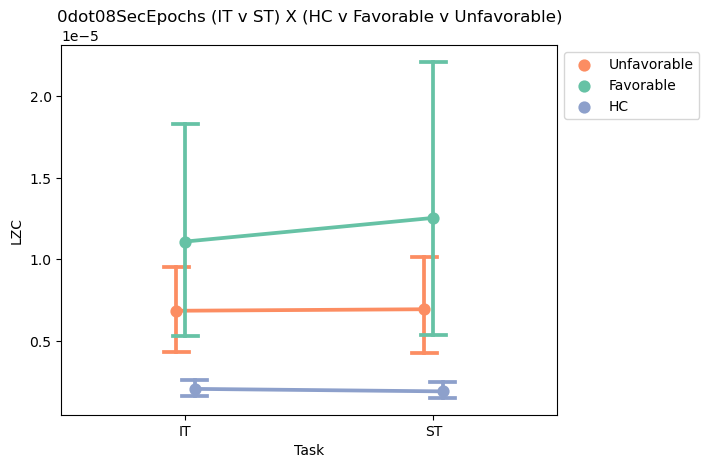

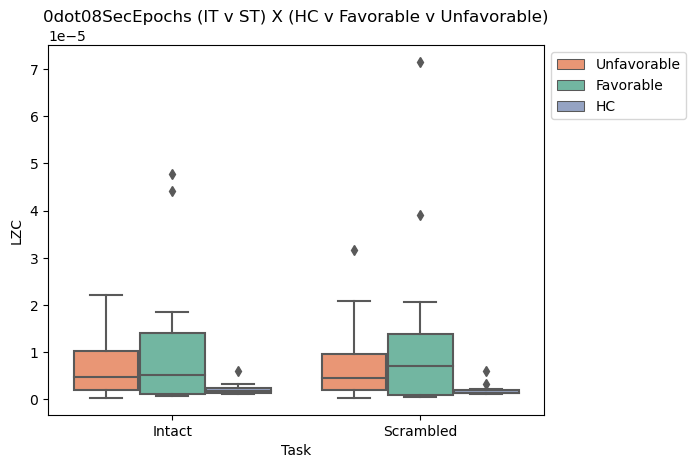


 mswpen _________________________________________
 mswpen _________________________________________
 mswpen _________________________________________
 mswpen _________________________________________
 mswpen _________________________________________

IT v ST (0dot08SecEpochs)
removed MSICU05part2 (272, 16)





#############################################################
dfsedOFF - Statistics
#############################################################


Sample Size  Mean (M)  Standard Deviation (SD)  \
Outcome Task                                                   
bad     IT             23  0.749634                 0.100299   
        ST             23  0.743156                 0.107954   
good    IT             17  0.739418                 0.107593   
        ST             17  0.741190                 0.100901   

              Standard Error of the Mean (SEM)  Skewness  Kurtosis  
Outcome Task                                                        
bad     IT                            0.020914 -0.881011  0.236041  
        ST                            0.022510 -0.916583  0.262336  
good    IT                            0.026095 -0.895523 -0.332013  
        ST                            0.024472 -0.678881 -0.498276

,Source,SS,DF1,DF2,MS,F,p-unc,ng2,eps
0,Outcome,0,1,38,0,0.03,.855,0,nan
1,Task,0,1,38,0,0.4,.531,0,1
2,Interaction,0,1,38,0,0.75,.391,0,nan


,Contrast,Task,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Task,-,IT,ST,1,1,0.63,39,two-sided,.529,nan,nan,0.206,0.03
1,Outcome,-,bad,good,0,1,0.18,34.9,two-sided,.854,nan,nan,0.316,0.06
2,Task * Outcome,IT,bad,good,0,1,0.31,33.19,two-sided,.762,.953,fdr_bh,0.323,0.1
3,Task * Outcome,ST,bad,good,0,1,0.06,35.86,two-sided,.953,.953,fdr_bh,0.312,0.02


,Contrast,Outcome,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Outcome,-,bad,good,0,1,0.18,34.9,two-sided,.854,nan,nan,0.316,0.06
1,Task,-,IT,ST,1,1,0.63,39,two-sided,.529,nan,nan,0.206,0.03
2,Outcome * Task,bad,IT,ST,1,1,1.67,22,two-sided,.110,.219,fdr_bh,0.724,0.06
3,Outcome * Task,good,IT,ST,1,1,-0.18,16,two-sided,.858,.858,fdr_bh,0.253,-0.02


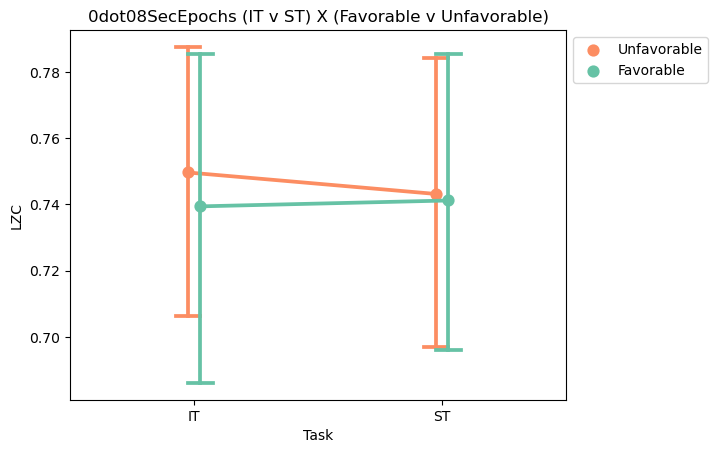

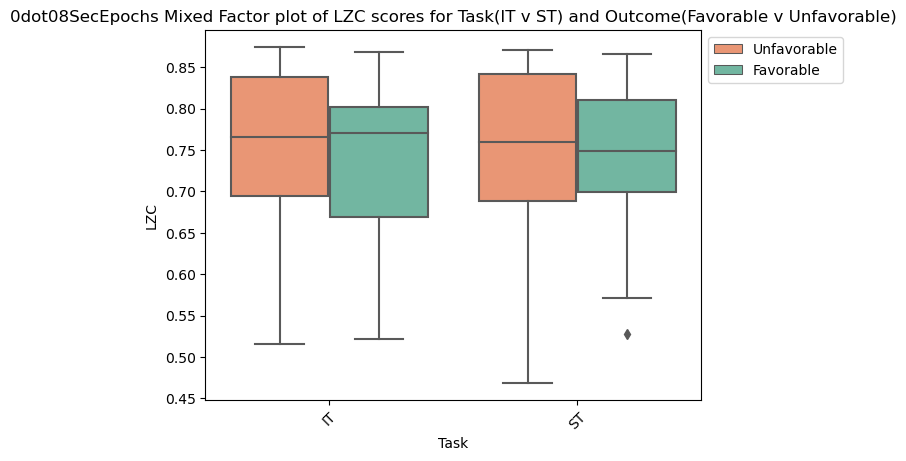






#############################################################
ssHC_ssP - Statistics
#############################################################


Sample Size  Mean (M)  Standard Deviation (SD)  \
Outcome Task                                                   
HC      IT             18  0.767146                 0.073478   
        ST             18  0.782264                 0.062761   
bad     IT             23  0.749634                 0.100299   
        ST             23  0.743156                 0.107954   
good    IT             17  0.739418                 0.107593   
        ST             17  0.741190                 0.100901   

              Standard Error of the Mean (SEM)  Skewness  Kurtosis  
Outcome Task                                                        
HC      IT                            0.017319 -0.982387 -0.277258  
        ST                            0.014793 -1.788487  3.392916  
bad     IT                            0.020914 -0.881011  0.236041  
        ST                            0.022510 -0.916583  0.262336  
good    IT                            0.026095 -0.895523 -0.332013  
        ST                            0.024472 -0.678881 -0.498276

,Source,SS,DF1,DF2,MS,F,p-unc,ng2,eps
0,Outcome,0.02,2,55,0.01,0.71,.494,0.02,nan
1,Task,0,1,55,0,0.25,.618,0,1
2,Interaction,0,2,55,0,1.46,.240,0,nan


,Contrast,Task,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Task,-,IT,ST,1,1,-0.5,57,two-sided,.621,nan,nan,0.161,-0.03
1,Outcome,-,HC,bad,0,1,1.08,36.78,two-sided,.286,.428,fdr_bh,0.49,0.32
2,Outcome,-,HC,good,0,1,1.19,26.09,two-sided,.243,.428,fdr_bh,0.564,0.4
3,Outcome,-,bad,good,0,1,0.18,34.9,two-sided,.854,.854,fdr_bh,0.316,0.06
4,Task * Outcome,IT,HC,bad,0,1,0.64,38.87,two-sided,.523,.784,fdr_bh,0.363,0.19
5,Task * Outcome,IT,HC,good,0,1,0.89,28.07,two-sided,.383,.767,fdr_bh,0.441,0.3
6,Task * Outcome,IT,bad,good,0,1,0.31,33.19,two-sided,.762,.914,fdr_bh,0.323,0.1
7,Task * Outcome,ST,HC,bad,0,1,1.45,36.34,two-sided,.155,.488,fdr_bh,0.705,0.42
8,Task * Outcome,ST,HC,good,0,1,1.44,26.5,two-sided,.163,.488,fdr_bh,0.718,0.48
9,Task * Outcome,ST,bad,good,0,1,0.06,35.86,two-sided,.953,.953,fdr_bh,0.312,0.02


,Contrast,Outcome,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Outcome,-,HC,bad,0,1,1.08,36.78,two-sided,.286,.428,fdr_bh,0.49,0.32
1,Outcome,-,HC,good,0,1,1.19,26.09,two-sided,.243,.428,fdr_bh,0.564,0.4
2,Outcome,-,bad,good,0,1,0.18,34.9,two-sided,.854,.854,fdr_bh,0.316,0.06
3,Task,-,IT,ST,1,1,-0.5,57,two-sided,.621,nan,nan,0.161,-0.03
4,Outcome * Task,HC,IT,ST,1,1,-1.13,17,two-sided,.276,.414,fdr_bh,0.421,-0.22
5,Outcome * Task,bad,IT,ST,1,1,1.67,22,two-sided,.110,.329,fdr_bh,0.724,0.06
6,Outcome * Task,good,IT,ST,1,1,-0.18,16,two-sided,.858,.858,fdr_bh,0.253,-0.02


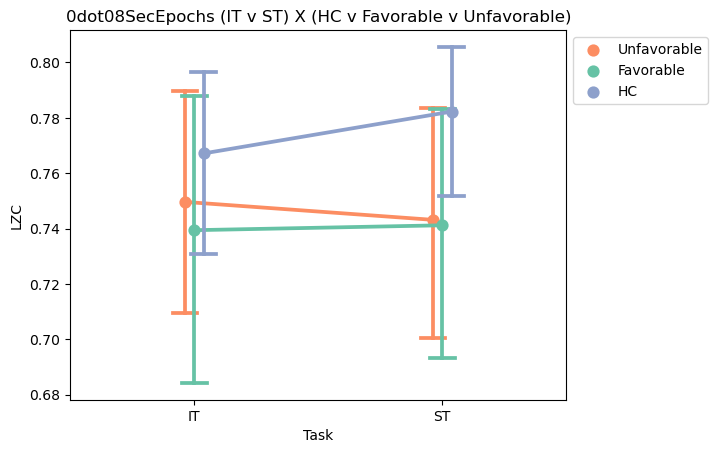

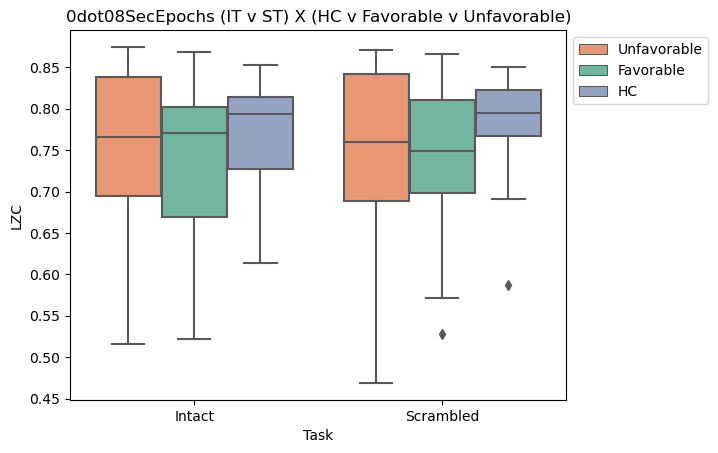


 bubben _________________________________________
 bubben _________________________________________
 bubben _________________________________________
 bubben _________________________________________
 bubben _________________________________________

IT v ST (0dot08SecEpochs)
removed MSICU05part2 (272, 16)





#############################################################
dfsedOFF - Statistics
#############################################################


Sample Size  Mean (M)  Standard Deviation (SD)  \
Outcome Task                                                   
bad     IT             23  0.721156                 0.095305   
        ST             23  0.722244                 0.095001   
good    IT             17  0.713681                 0.079900   
        ST             17  0.703406                 0.082423   

              Standard Error of the Mean (SEM)  Skewness  Kurtosis  
Outcome Task                                                        
bad     IT                            0.019872 -0.246431 -1.608561  
        ST                            0.019809 -0.374975 -1.478262  
good    IT                            0.019379 -0.345436 -1.076427  
        ST                            0.019990 -0.153929 -1.144471

,Source,SS,DF1,DF2,MS,F,p-unc,ng2,eps
0,Outcome,0,1,38,0,0.21,.647,0.01,nan
1,Task,0,1,38,0,1.81,.186,0,1
2,Interaction,0,1,38,0,4.08,.050,0,nan


,Contrast,Task,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Task,-,IT,ST,1,1,1.3,39,two-sided,.203,nan,nan,0.37,0.04
1,Outcome,-,bad,good,0,1,0.47,37.17,two-sided,.639,nan,nan,0.341,0.14
2,Task * Outcome,IT,bad,good,0,1,0.27,37.33,two-sided,.789,.789,fdr_bh,0.321,0.08
3,Task * Outcome,ST,bad,good,0,1,0.67,36.94,two-sided,.507,.789,fdr_bh,0.372,0.21


,Contrast,Outcome,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Outcome,-,bad,good,0,1,0.47,37.17,two-sided,.639,nan,nan,0.341,0.14
1,Task,-,IT,ST,1,1,1.3,39,two-sided,.203,nan,nan,0.37,0.04
2,Outcome * Task,bad,IT,ST,1,1,-0.3,22,two-sided,.763,.763,fdr_bh,0.228,-0.01
3,Outcome * Task,good,IT,ST,1,1,2.33,16,two-sided,.033,.067,fdr_bh,2.026,0.12


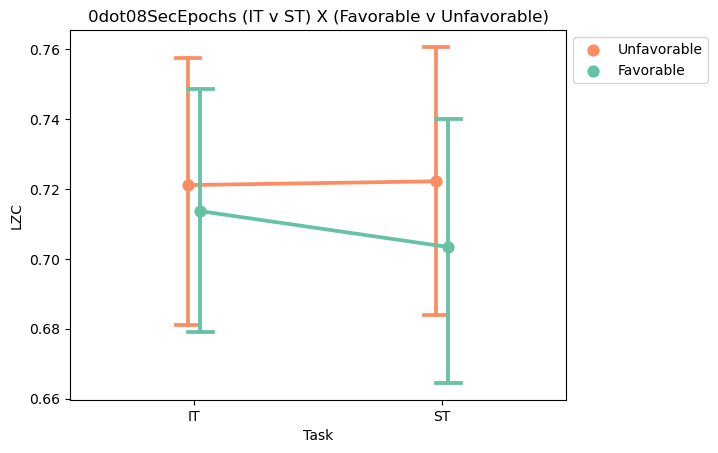

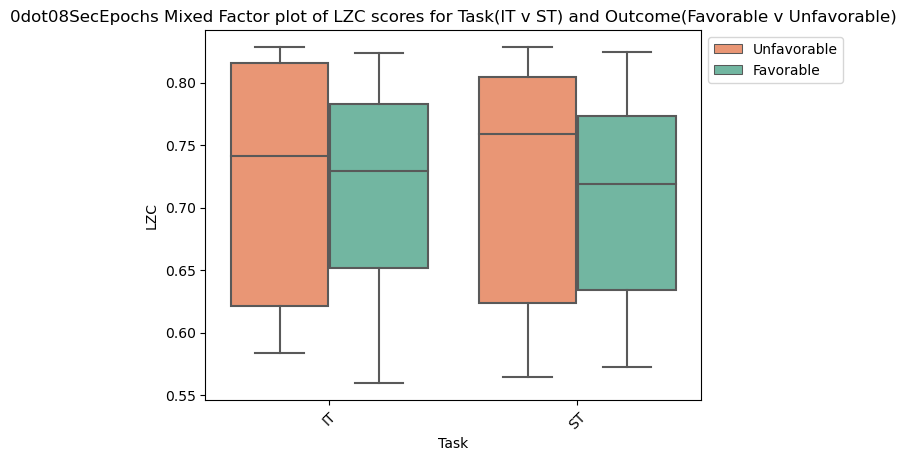






#############################################################
ssHC_ssP - Statistics
#############################################################


Sample Size  Mean (M)  Standard Deviation (SD)  \
Outcome Task                                                   
HC      IT             18  0.801917                 0.021299   
        ST             18  0.799568                 0.025316   
bad     IT             23  0.721156                 0.095305   
        ST             23  0.722244                 0.095001   
good    IT             17  0.713681                 0.079900   
        ST             17  0.703406                 0.082423   

              Standard Error of the Mean (SEM)  Skewness  Kurtosis  
Outcome Task                                                        
HC      IT                            0.005020 -0.592879 -0.655262  
        ST                            0.005967 -1.185286  0.402837  
bad     IT                            0.019872 -0.246431 -1.608561  
        ST                            0.019809 -0.374975 -1.478262  
good    IT                            0.019379 -0.345436 -1.076427  
        ST                            0.019990 -0.153929 -1.144471

,Source,SS,DF1,DF2,MS,F,p-unc,ng2,eps
0,Outcome,0.18,2,55,0.09,8.02,.001,0.22,nan
1,Task,0,1,55,0,2.64,.110,0,1
2,Interaction,0,2,55,0,2.68,.078,0,nan


,Contrast,Task,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Task,-,IT,ST,1,1,1.58,57,two-sided,.120,nan,nan,0.463,0.04
1,Outcome,-,HC,bad,0,1,3.86,25.23,two-sided,.001,.001,fdr_bh,64.329,1.07
2,Outcome,-,HC,good,0,1,4.54,18.43,two-sided,.000,.001,fdr_bh,288.049,1.54
3,Outcome,-,bad,good,0,1,0.47,37.17,two-sided,.639,.639,fdr_bh,0.341,0.14
4,Task * Outcome,IT,HC,bad,0,1,3.94,24.77,two-sided,.001,.001,fdr_bh,78.861,1.09
5,Task * Outcome,IT,HC,good,0,1,4.41,18.14,two-sided,.000,.001,fdr_bh,205.815,1.49
6,Task * Outcome,IT,bad,good,0,1,0.27,37.33,two-sided,.789,.789,fdr_bh,0.321,0.08
7,Task * Outcome,ST,HC,bad,0,1,3.74,25.9,two-sided,.001,.001,fdr_bh,47.832,1.03
8,Task * Outcome,ST,HC,good,0,1,4.61,18.84,two-sided,.000,.001,fdr_bh,340.468,1.56
9,Task * Outcome,ST,bad,good,0,1,0.67,36.94,two-sided,.507,.609,fdr_bh,0.372,0.21


,Contrast,Outcome,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Outcome,-,HC,bad,0,1,3.86,25.23,two-sided,.001,.001,fdr_bh,64.329,1.07
1,Outcome,-,HC,good,0,1,4.54,18.43,two-sided,.000,.001,fdr_bh,288.049,1.54
2,Outcome,-,bad,good,0,1,0.47,37.17,two-sided,.639,.639,fdr_bh,0.341,0.14
3,Task,-,IT,ST,1,1,1.58,57,two-sided,.120,nan,nan,0.463,0.04
4,Outcome * Task,HC,IT,ST,1,1,1.07,17,two-sided,.299,.448,fdr_bh,0.401,0.1
5,Outcome * Task,bad,IT,ST,1,1,-0.3,22,two-sided,.763,.763,fdr_bh,0.228,-0.01
6,Outcome * Task,good,IT,ST,1,1,2.33,16,two-sided,.033,.100,fdr_bh,2.026,0.12


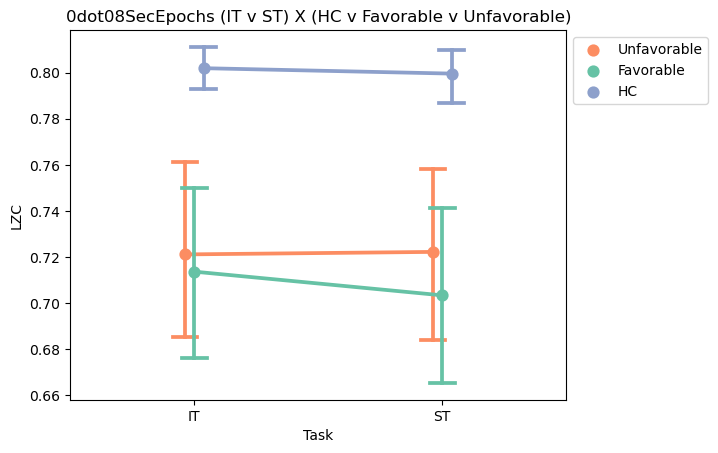

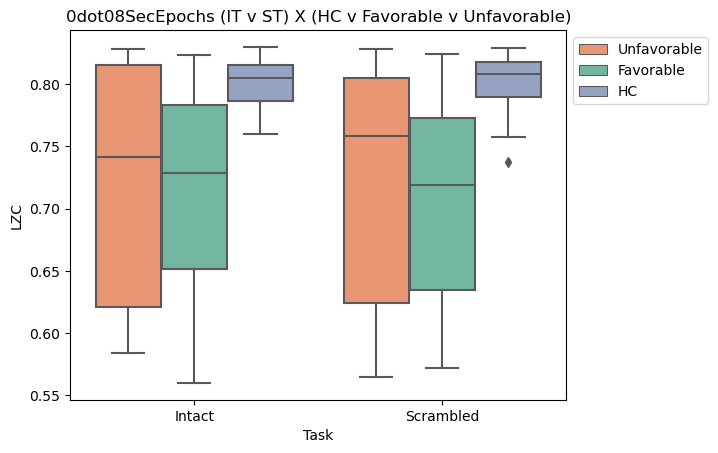


 cwpen _________________________________________
 cwpen _________________________________________
 cwpen _________________________________________
 cwpen _________________________________________
 cwpen _________________________________________

IT v ST (0dot08SecEpochs)
removed MSICU05part2 (272, 16)





#############################################################
dfsedOFF - Statistics
#############################################################


Sample Size  Mean (M)  Standard Deviation (SD)  \
Outcome Task                                                   
bad     IT             23  0.288462                 0.044415   
        ST             23  0.289530                 0.040198   
good    IT             17  0.255626                 0.068211   
        ST             17  0.253424                 0.071755   

              Standard Error of the Mean (SEM)  Skewness  Kurtosis  
Outcome Task                                                        
bad     IT                            0.009261 -2.019629  3.090661  
        ST                            0.008382 -1.779592  1.959612  
good    IT                            0.016543 -0.748028 -0.822050  
        ST                            0.017403 -0.763273 -0.930687

,Source,SS,DF1,DF2,MS,F,p-unc,ng2,eps
0,Outcome,0.02,1,38,0.02,3.82,.058,0.09,nan
1,Task,0,1,38,0,0.02,.896,0,1
2,Interaction,0,1,38,0,0.44,.513,0,nan


,Contrast,Task,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Task,-,IT,ST,1,1,0.13,39,two-sided,.896,nan,nan,0.172,0.01
1,Outcome,-,bad,good,0,1,1.82,24.37,two-sided,.082,nan,nan,1.121,0.61
2,Task * Outcome,IT,bad,good,0,1,1.73,25.76,two-sided,.095,.095,fdr_bh,1.0,0.58
3,Task * Outcome,ST,bad,good,0,1,1.87,23.37,two-sided,.074,.095,fdr_bh,1.206,0.64


,Contrast,Outcome,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Outcome,-,bad,good,0,1,1.82,24.37,two-sided,.082,nan,nan,1.121,0.61
1,Task,-,IT,ST,1,1,0.13,39,two-sided,.896,nan,nan,0.172,0.01
2,Outcome * Task,bad,IT,ST,1,1,-0.34,22,two-sided,.739,.739,fdr_bh,0.23,-0.02
3,Outcome * Task,good,IT,ST,1,1,0.57,16,two-sided,.577,.739,fdr_bh,0.288,0.03


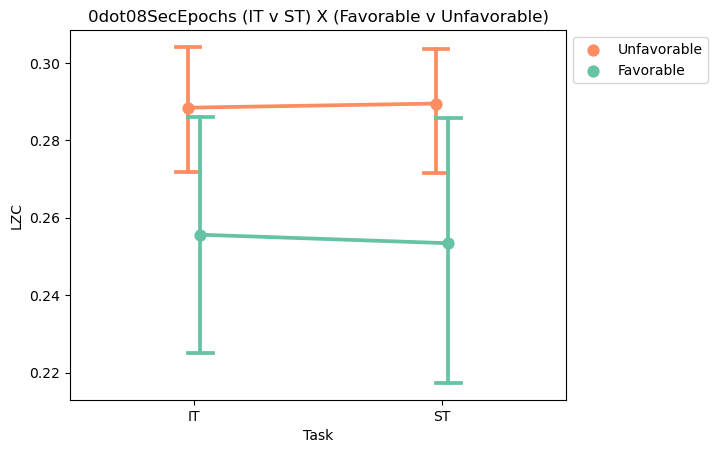

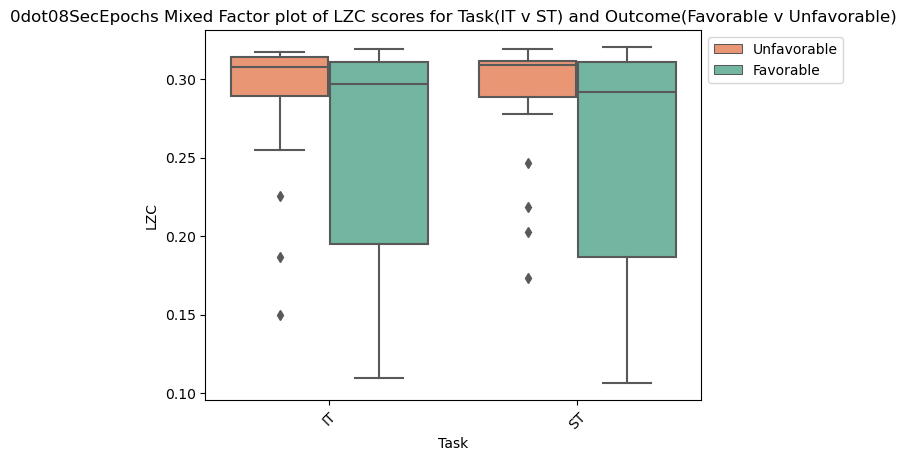






#############################################################
ssHC_ssP - Statistics
#############################################################


Sample Size  Mean (M)  Standard Deviation (SD)  \
Outcome Task                                                   
HC      IT             18  0.228509                 0.040859   
        ST             18  0.231169                 0.041480   
bad     IT             23  0.288462                 0.044415   
        ST             23  0.289530                 0.040198   
good    IT             17  0.255626                 0.068211   
        ST             17  0.253424                 0.071755   

              Standard Error of the Mean (SEM)  Skewness  Kurtosis  
Outcome Task                                                        
HC      IT                            0.009631  0.334752 -0.763111  
        ST                            0.009777  0.199246 -0.459881  
bad     IT                            0.009261 -2.019629  3.090661  
        ST                            0.008382 -1.779592  1.959612  
good    IT                            0.016543 -0.748028 -0.822050  
        ST                            0.017403 -0.763273 -0.930687

,Source,SS,DF1,DF2,MS,F,p-unc,ng2,eps
0,Outcome,0.07,2,55,0.04,6.92,.002,0.2,nan
1,Task,0,1,55,0,0.11,.747,0,1
2,Interaction,0,2,55,0,0.53,.589,0,nan


,Contrast,Task,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Task,-,IT,ST,1,1,-0.33,57,two-sided,.745,nan,nan,0.151,-0.01
1,Outcome,-,HC,bad,0,1,-4.56,37.01,two-sided,.000,.000,fdr_bh,398.125,-1.4
2,Outcome,-,HC,good,0,1,-1.27,25.56,two-sided,.215,.215,fdr_bh,0.606,-0.43
3,Outcome,-,bad,good,0,1,1.82,24.37,two-sided,.082,.122,fdr_bh,1.121,0.61
4,Task * Outcome,IT,HC,bad,0,1,-4.49,37.92,two-sided,.000,.000,fdr_bh,325.244,-1.37
5,Task * Outcome,IT,HC,good,0,1,-1.42,25.88,two-sided,.169,.202,fdr_bh,0.703,-0.47
6,Task * Outcome,IT,bad,good,0,1,1.73,25.76,two-sided,.095,.143,fdr_bh,1.0,0.58
7,Task * Outcome,ST,HC,bad,0,1,-4.53,36.1,two-sided,.000,.000,fdr_bh,366.514,-1.4
8,Task * Outcome,ST,HC,good,0,1,-1.11,25.32,two-sided,.275,.275,fdr_bh,0.526,-0.37
9,Task * Outcome,ST,bad,good,0,1,1.87,23.37,two-sided,.074,.143,fdr_bh,1.206,0.64


,Contrast,Outcome,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Outcome,-,HC,bad,0,1,-4.56,37.01,two-sided,.000,.000,fdr_bh,398.125,-1.4
1,Outcome,-,HC,good,0,1,-1.27,25.56,two-sided,.215,.215,fdr_bh,0.606,-0.43
2,Outcome,-,bad,good,0,1,1.82,24.37,two-sided,.082,.122,fdr_bh,1.121,0.61
3,Task,-,IT,ST,1,1,-0.33,57,two-sided,.745,nan,nan,0.151,-0.01
4,Outcome * Task,HC,IT,ST,1,1,-1.06,17,two-sided,.304,.739,fdr_bh,0.397,-0.06
5,Outcome * Task,bad,IT,ST,1,1,-0.34,22,two-sided,.739,.739,fdr_bh,0.23,-0.02
6,Outcome * Task,good,IT,ST,1,1,0.57,16,two-sided,.577,.739,fdr_bh,0.288,0.03


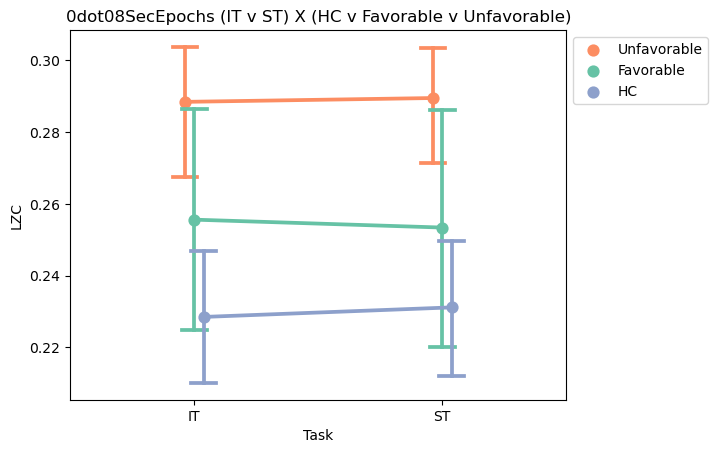

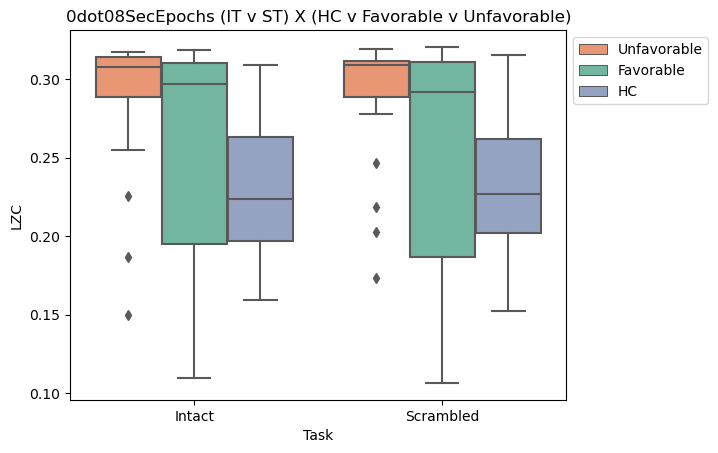

In [21]:
### OG: IT v ST ###
####### MOST UP TO DATE WITH NEW DATA #### MAY 8th 2024
####### MOST UP TO DATE #### MAY 2nd 2024
 
favorable_color = sns.color_palette("Set2")[0]
unfavorable_color = sns.color_palette("Set2")[1]
HC_colour = sns.color_palette("Set2")[2]

# Missing values are automatically removed using a strict listwise approach (= complete-case analysis)

#from workspace
#MAIN mAIN mANINN MAIN MAIN MAIN MAIn#MAIN mAIN mANINN MAIN MAIN MAIN MAIn#MAIN mAIN mANINN MAIN MAIN MAIN MAIn#MAIN mAIN mANINN MAIN MAIN MAIN MAIn
#MAIN mAIN mANINN MAIN MAIN MAIN MAIn#MAIN mAIN mANINN MAIN MAIN MAIN MAIn#MAIN mAIN mANINN MAIN MAIN MAIN MAIn#MAIN mAIN mANINN MAIN MAIN MAIN MAIn
# ssHC_ssPT
# PTgood, PTbad, & HC
# HC_ST='RS'
# 3am jan4th,2024
#####################################################################################################################    
##                                                                                                                 ##
##                 LOADING DATAFRAME & RESHAPING IT & ADDING LABELS    +  NEW DICTIONARIES                           ## 
##################################################################################################################### 
import string
#OLD #Uoutcomedic={'NETICU01':'1','NETICU02':'0','NETICU03':'0','NETICU04':'1','NETICU05':'1','NETICU06':'0','NETICU08':'1','NETICU11':'1','NETICU13':'0','NETICU15':'0','NETICU17':'1','NETICU18':'1','NETICU19':'1','NETICU20':'1','NETICU22':'0','NETICU24':'0','NETICU25':'0','NETICU27':'1','NETICU28':'0','NETICU29':'1','NETICU30':'0','CCTC03':'1','CCTC04':'1','CCTC05':'1','MSICU05':'1','MSICU07':'0','MSICU09':'0','MSICU10':'0','MSICU14':'0','MSICU15':'0','MSICU16':'0','MSICU18':'0','MSICU19':'1','MSICU21':'0','MSICU22':'1','MSICU26':'1','MSICU28':'1','MSICU29':'1','MSICU30':'1','HC01':'1','HC02':'1','HC03':'1','HC04':'1','HC05':'1','HC06':'1','HC07':'1','HC08':'1','HC09':'1','HC10':'1','HC11':'1','HC12':'1','HC13':'1','HC14':'1','HC15':'1','HC16':'1','HC17':'1','HC18':'1'}#outcomesNA = {'NETICU01':'1','NETICU02':'0','NETICU03':'0','NETICU04':'NA','NETICU05':'NA','NETICU06':'0','NETICU08':'1','NETICU11':'1','NETICU13':'0','NETICU15':'NA','NETICU17':'1','NETICU18':'1','NETICU19':'1','NETICU20':'1','NETICU22':'0','NETICU24':'0','NETICU25':'0','NETICU27':'1','NETICU28':'0','NETICU29':'NA','NETICU30':'0','CCTC03':'NA','CCTC04':'1','CCTC05':'NA','MSICU05':'1','MSICU07':'0','MSICU09':'0','MSICU10':'0','MSICU14':'0','MSICU15':'0','MSICU16':'0','MSICU18':'0','MSICU19':'NA','MSICU21':'0','MSICU22':'1','MSICU26':'1','MSICU28':'NA','MSICU29':'NA','MSICU30':'NA','HC01':'1','HC02':'1','HC03':'1','HC04':'1','HC05':'1','HC06':'1','HC07':'1','HC08':'1','HC09':'1','HC10':'1','HC11':'1','HC12':'1','HC13':'1','HC14':'1','HC15':'1','HC16':'1','HC17':'1','HC18':'1'}#outcomesGuess = {'NETICU01':'1','NETICU02':'0','NETICU03':'0','NETICU04':'0','NETICU05':'1','NETICU06':'0','NETICU08':'1','NETICU11':'1','NETICU13':'0','NETICU15':'0','NETICU17':'1','NETICU18':'1','NETICU19':'1','NETICU20':'1','NETICU22':'0','NETICU24':'0','NETICU25':'0','NETICU27':'1','NETICU28':'0','NETICU29':'1','NETICU30':'0','CCTC03':'1','CCTC04':'1','CCTC05':'0','MSICU05':'1','MSICU07':'0','MSICU09':'0','MSICU10':'0','MSICU14':'0','MSICU15':'0','MSICU16':'0','MSICU18':'0','MSICU19':'1','MSICU21':'0','MSICU22':'1','MSICU26':'1','MSICU28':'1','MSICU29':'0','MSICU30':'0','HC01':'1','HC02':'1','HC03':'1','HC04':'1','HC05':'1','HC06':'1','HC07':'1','HC08':'1','HC09':'1','HC10':'1','HC11':'1','HC12':'1','HC13':'1','HC14':'1','HC15':'1','HC16':'1','HC17':'1','HC18':'1'}
#OLD #seddic={'CCTC03_IT':'ON','CCTC03_RS':'ON','CCTC03_ST':'ON','CCTC03part2_IT':'ON','CCTC03part2_RS':'ON','CCTC03part2_ST':'ON','CCTC04_IT':'ON','CCTC04_RS':'ON','CCTC04_RSredo':'ON','CCTC04_ST':'ON','CCTC05_IT':'ON','CCTC05_RS':'ON','CCTC05_ST':'ON','HC01_IT':'-','HC01_ST':'-','HC02_IT':'-','HC02_ST':'-','HC03_IT':'-','HC03_ST':'-','HC04_IT':'-','HC04_ST':'-','HC05_IT1st':'-','HC05_IT2nd':'-','HC05_ST':'-','HC06_IT':'-','HC06_ST':'-','HC07_IT':'-','HC07_ST':'-','HC08_IT':'-','HC08_ST':'-','HC09_IT':'-','HC09_ST':'-','HC10_IT':'-','HC10_ST':'-','HC11_IT':'-','HC11_ST':'-','HC12_IT':'-','HC12_ST':'-','HC13_IT':'-','HC13_ST':'-','HC14_IT':'-','HC14_ST':'-','HC15_IT':'-','HC15_ST':'-','HC16_IT':'-','HC16_ST':'-','HC17_IT':'-','HC17_ST':'-','HC18_IT':'-','HC18_ST':'-','MSICU05_IT':'OFF','MSICU05_RS':'OFF','MSICU05_ST':'OFF','MSICU05part2_IT':'OFF','MSICU05part2_RS':'OFF','MSICU05part2_ST':'OFF','MSICU07_IT':'OFF','MSICU07_RS':'OFF','MSICU07_ST':'OFF','MSICU09_IT':'OFF','MSICU09_RS':'OFF','MSICU09_ST':'OFF','MSICU09part2_IT':'OFF','MSICU09part2_RS':'OFF','MSICU09part2_ST':'OFF','MSICU10_IT':'OFF','MSICU10_RS':'OFF','MSICU10_ST':'OFF','MSICU14_IT':'OFF','MSICU14_RS':'OFF','MSICU14_ST':'OFF','MSICU15_IT':'ON','MSICU15_RS':'ON','MSICU15_ST':'ON','MSICU16_IT':'OFF','MSICU16_RS':'OFF','MSICU16_ST':'OFF','MSICU18_IT':'OFF','MSICU18_RS':'OFF','MSICU18_ST':'OFF','MSICU19_IT':'OFF','MSICU19_RS':'OFF','MSICU19_ST':'OFF','MSICU21_IT':'OFF','MSICU21_RS':'OFF','MSICU21_ST':'OFF','MSICU22_IT':'OFF','MSICU22_RS':'OFF','MSICU22_ST':'OFF','MSICU26_IT':'ON','MSICU26_RS':'ON','MSICU26_ST':'ON','MSICU28_IT':'OFF','MSICU28_RS':'OFF','MSICU28_ST':'OFF','MSICU29_IT':'OFF','MSICU29_RS':'OFF','MSICU29_ST':'OFF','MSICU30_IT':'OFF','MSICU30_RS':'OFF','MSICU30_ST':'OFF','NETICU01sedoff_IT':'ON','NETICU01sedoff_RS':'ON','NETICU01sedoff_ST':'ON','NETICU01sedon1_IT':'ON','NETICU01sedon1_RS':'ON','NETICU01sedon1_ST':'ON','NETICU02sedoff_IT':'OFF','NETICU02sedoff_RS':'OFF','NETICU02sedoff_ST':'OFF','NETICU02sedon1_IT':'ON','NETICU02sedon1_RS':'ON','NETICU02sedon1_ST':'ON','NETICU03sedoff_IT':'OFF','NETICU03sedoff_RS':'OFF','NETICU03sedoff_ST':'OFF','NETICU03sedon1_IT':'ON','NETICU03sedon1_RS':'ON','NETICU03sedon1_ST':'ON','NETICU04sedoff_IT':'OFF','NETICU04sedoff_RS':'OFF','NETICU04sedoff_ST':'OFF','NETICU04sedon1_IT':'ON','NETICU04sedon1_RS':'ON','NETICU04sedon1_ST':'ON','NETICU05sedoff_IT':'OFF','NETICU05sedoff_RS':'OFF','NETICU05sedoff_ST':'OFF','NETICU05sedon1_IT':'ON','NETICU05sedon1_RS':'ON','NETICU05sedon1_ST':'ON','NETICU06sedoff_IT':'OFF','NETICU06sedoff_RS':'OFF','NETICU06sedoff_ST':'OFF','NETICU06sedon1_IT':'ON','NETICU06sedon1_RS':'ON','NETICU06sedon1_ST':'ON','NETICU08sedoff_IT':'OFF','NETICU08sedoff_ST':'OFF','NETICU08sedon2_IT':'ON','NETICU08sedon2_RS':'ON','NETICU08sedon2_ST':'ON','NETICU11sedoff_IT':'OFF','NETICU11sedoff_RS':'OFF','NETICU11sedoff_ST':'OFF','NETICU11sedon1_IT':'ON','NETICU11sedon1_RS':'ON','NETICU11sedon1_ST':'ON','NETICU13sedoff_IT':'OFF','NETICU13sedoff_RS':'OFF','NETICU13sedoff_ST':'OFF','NETICU13sedon1_IT':'ON','NETICU13sedon1_RS':'ON','NETICU13sedon1_ST':'ON','NETICU15sedoff_IT':'OFF','NETICU15sedoff_RS':'OFF','NETICU15sedoff_ST':'OFF','NETICU15sedon1_IT':'ON','NETICU15sedon1_RS':'ON','NETICU15sedon1_ST':'ON','NETICU17sedoff_IT':'OFF','NETICU17sedoff_RS':'OFF','NETICU17sedoff_ST':'OFF','NETICU17sedon1_IT':'ON','NETICU17sedon1_RS':'ON','NETICU17sedon1_ST':'ON','NETICU18sedoff_RS':'OFF','NETICU18sedon1_IT':'ON','NETICU18sedon1_RS':'ON','NETICU18sedon1_ST':'ON','NETICU19sedoff_IT':'OFF','NETICU19sedoff_RS':'OFF','NETICU19sedoff_ST':'OFF','NETICU19sedon1_IT':'ON','NETICU19sedon1_RS':'ON','NETICU19sedon1_ST':'ON','NETICU20sedoff_RS':'OFF','NETICU20sedon1_IT':'ON','NETICU20sedon1_RS':'ON','NETICU20sedon1_ST':'ON','NETICU22sedoff_IT':'OFF','NETICU22sedoff_RS':'OFF','NETICU22sedoff_ST':'OFF','NETICU22sedon1_IT':'ON','NETICU22sedon1_RS':'ON','NETICU22sedon1_ST':'ON','NETICU24sedoff_IT':'OFF','NETICU24sedoff_RS':'OFF','NETICU24sedoff_ST':'OFF','NETICU24sedon1_IT':'ON','NETICU24sedon1_RS':'ON','NETICU24sedon1_ST':'ON','NETICU25sedoff_RS':'OFF','NETICU25sedon1_IT':'ON','NETICU25sedon1_RS':'ON','NETICU25sedon1_ST':'ON','NETICU27sedoff_IT':'OFF','NETICU27sedoff_RS':'OFF','NETICU27sedoff_ST':'OFF','NETICU27sedon1_IT':'ON','NETICU27sedon1_RS':'ON','NETICU27sedon1_ST':'ON','NETICU28sedoff_IT':'OFF','NETICU28sedoff_RS':'OFF','NETICU28sedoff_ST':'OFF','NETICU28sedon1_IT':'ON','NETICU28sedon1_RS':'ON','NETICU28sedon1_ST':'ON','NETICU29sedoff_IT':'OFF','NETICU29sedoff_RS':'OFF','NETICU29sedoff_ST':'OFF','NETICU29sedon1_IT':'ON','NETICU29sedon1_RS':'ON','NETICU29sedon1_ST':'ON','NETICU30sedoff_IT':'OFF','NETICU30sedoff_RS':'OFF','NETICU30sedoff_ST':'OFF','NETICU30sedon1_IT':'ON','NETICU30sedon1_RS':'ON','NETICU30sedon1_ST':'ON'}
#OLD #GCSdic={'CCTC03_IT':'3','CCTC03_RS':'3','CCTC03_ST':'3','CCTC03part2_IT':'3','CCTC03part2_RS':'3','CCTC03part2_ST':'3','CCTC04_IT':'3','CCTC04_RS':'3','CCTC04_RSredo':'3','CCTC04_ST':'3','CCTC05_IT':'3','CCTC05_RS':'3','CCTC05_ST':'3','HC01_IT':'15','HC01_ST':'15','HC02_IT':'15','HC02_ST':'15','HC03_IT':'15','HC03_ST':'15','HC04_IT':'15','HC04_ST':'15','HC05_IT1st':'15','HC05_IT2nd':'15','HC05_ST':'15','HC06_IT':'15','HC06_ST':'15','HC07_IT':'15','HC07_ST':'15','HC08_IT':'15','HC08_ST':'15','HC09_IT':'15','HC09_ST':'15','HC10_IT':'15','HC10_ST':'15','HC11_IT':'15','HC11_ST':'15','HC12_IT':'15','HC12_ST':'15','HC13_IT':'15','HC13_ST':'15','HC14_IT':'15','HC14_ST':'15','HC15_IT':'15','HC15_ST':'15','HC16_IT':'15','HC16_ST':'15','HC17_IT':'15','HC17_ST':'15','HC18_IT':'15','HC18_ST':'15','MSICU05_IT':'3','MSICU05_RS':'3','MSICU05_ST':'3','MSICU05part2_IT':'15','MSICU05part2_RS':'15','MSICU05part2_ST':'15','MSICU07_IT':'3','MSICU07_RS':'3','MSICU07_ST':'3','MSICU09_IT':'5','MSICU09_RS':'5','MSICU09_ST':'5','MSICU09part2_IT':'4','MSICU09part2_RS':'4','MSICU09part2_ST':'4','MSICU10_IT':'4','MSICU10_RS':'4','MSICU10_ST':'4','MSICU14_IT':'3','MSICU14_RS':'3','MSICU14_ST':'3','MSICU15_IT':'6','MSICU15_RS':'6','MSICU15_ST':'6','MSICU16_IT':'3','MSICU16_RS':'3','MSICU16_ST':'3','MSICU18_IT':'7','MSICU18_RS':'7','MSICU18_ST':'7','MSICU19_IT':'8','MSICU19_RS':'8','MSICU19_ST':'8','MSICU21_IT':'9','MSICU21_RS':'9','MSICU21_ST':'9','MSICU22_IT':'4','MSICU22_RS':'4','MSICU22_ST':'4','MSICU26_IT':'7','MSICU26_RS':'7','MSICU26_ST':'7','MSICU28_IT':'6','MSICU28_RS':'6','MSICU28_ST':'6','MSICU29_IT':'9','MSICU29_RS':'9','MSICU29_ST':'9','MSICU30_IT':'5','MSICU30_RS':'5','MSICU30_ST':'5','NETICU01sedoff_IT':'3','NETICU01sedoff_RS':'3','NETICU01sedoff_ST':'3','NETICU01sedon1_IT':'3','NETICU01sedon1_RS':'3','NETICU01sedon1_ST':'3','NETICU02sedoff_IT':'10','NETICU02sedoff_RS':'10','NETICU02sedoff_ST':'10','NETICU02sedon1_IT':'3','NETICU02sedon1_RS':'3','NETICU02sedon1_ST':'3','NETICU03sedoff_IT':'6','NETICU03sedoff_RS':'6','NETICU03sedoff_ST':'6','NETICU03sedon1_IT':'6','NETICU03sedon1_RS':'6','NETICU03sedon1_ST':'6','NETICU04sedoff_IT':'3','NETICU04sedoff_RS':'3','NETICU04sedoff_ST':'3','NETICU04sedon1_IT':'3','NETICU04sedon1_RS':'3','NETICU04sedon1_ST':'3','NETICU05sedoff_IT':'3','NETICU05sedoff_RS':'3','NETICU05sedoff_ST':'3','NETICU05sedon1_IT':'3','NETICU05sedon1_RS':'3','NETICU05sedon1_ST':'3','NETICU06sedoff_IT':'6','NETICU06sedoff_RS':'6','NETICU06sedoff_ST':'6','NETICU06sedon1_IT':'3','NETICU06sedon1_RS':'3','NETICU06sedon1_ST':'3','NETICU08sedoff_IT':'9','NETICU08sedoff_ST':'9','NETICU08sedon2_IT':'3','NETICU08sedon2_RS':'3','NETICU08sedon2_ST':'3','NETICU11sedoff_IT':'4','NETICU11sedoff_RS':'4','NETICU11sedoff_ST':'4','NETICU11sedon1_IT':'3','NETICU11sedon1_RS':'3','NETICU11sedon1_ST':'3','NETICU13sedoff_IT':'4','NETICU13sedoff_RS':'4','NETICU13sedoff_ST':'4','NETICU13sedon1_IT':'3','NETICU13sedon1_RS':'3','NETICU13sedon1_ST':'3','NETICU15sedoff_IT':'3','NETICU15sedoff_RS':'3','NETICU15sedoff_ST':'3','NETICU15sedon1_IT':'3','NETICU15sedon1_RS':'3','NETICU15sedon1_ST':'3','NETICU17sedoff_IT':'10','NETICU17sedoff_RS':'10','NETICU17sedoff_ST':'10','NETICU17sedon1_IT':'3','NETICU17sedon1_RS':'3','NETICU17sedon1_ST':'3','NETICU18sedoff_RS':'11','NETICU18sedon1_IT':'3','NETICU18sedon1_RS':'3','NETICU18sedon1_ST':'3','NETICU19sedoff_IT':'7','NETICU19sedoff_RS':'7','NETICU19sedoff_ST':'7','NETICU19sedon1_IT':'3','NETICU19sedon1_RS':'3','NETICU19sedon1_ST':'3','NETICU20sedoff_RS':'11','NETICU20sedon1_IT':'3','NETICU20sedon1_RS':'3','NETICU20sedon1_ST':'3','NETICU22sedoff_IT':'3','NETICU22sedoff_RS':'3','NETICU22sedoff_ST':'3','NETICU22sedon1_IT':'3','NETICU22sedon1_RS':'3','NETICU22sedon1_ST':'3','NETICU24sedoff_IT':'3','NETICU24sedoff_RS':'3','NETICU24sedoff_ST':'3','NETICU24sedon1_IT':'3','NETICU24sedon1_RS':'3','NETICU24sedon1_ST':'3','NETICU25sedoff_RS':'8','NETICU25sedon1_IT':'6','NETICU25sedon1_RS':'6','NETICU25sedon1_ST':'6','NETICU27sedoff_IT':'3','NETICU27sedoff_RS':'3','NETICU27sedoff_ST':'3','NETICU27sedon1_IT':'3','NETICU27sedon1_RS':'3','NETICU27sedon1_ST':'3','NETICU28sedoff_IT':'3','NETICU28sedoff_RS':'3','NETICU28sedoff_ST':'3','NETICU28sedon1_IT':'3','NETICU28sedon1_RS':'3','NETICU28sedon1_ST':'3','NETICU29sedoff_IT':'11','NETICU29sedoff_RS':'11','NETICU29sedoff_ST':'11','NETICU29sedon1_IT':'3','NETICU29sedon1_RS':'3','NETICU29sedon1_ST':'3','NETICU30sedoff_IT':'6','NETICU30sedoff_RS':'6','NETICU30sedoff_ST':'6','NETICU30sedon1_IT':'3','NETICU30sedon1_RS':'3','NETICU30sedon1_ST':'3'}
#OLD(57)# EVERYONE = ['NETICU01','NETICU02','NETICU03','NETICU04','NETICU05','NETICU06','NETICU08','NETICU11','NETICU13','NETICU15','NETICU17','NETICU18','NETICU19','NETICU20','NETICU22','NETICU24','NETICU25','NETICU27','NETICU28','NETICU29','NETICU30','CCTC03','CCTC04','CCTC05','MSICU05','MSICU07','MSICU09','MSICU10','MSICU14','MSICU15','MSICU16','MSICU18','MSICU19','MSICU21','MSICU22','MSICU26','MSICU28','MSICU29','MSICU30','HC01','HC02','HC03','HC04','HC05','HC06','HC07','HC08','HC09','HC10','HC11','HC12','HC13','HC14','HC15','HC16','HC17','HC18']
#OLD(60)# PT=['CCTC03','CCTC03part2','CCTC04','CCTC05','MSICU05','MSICU05part2','MSICU07','MSICU09','MSICU09part2','MSICU10','MSICU14','MSICU15','MSICU16','MSICU18','MSICU19','MSICU21','MSICU22','MSICU26','MSICU28','MSICU29','MSICU30','NETICU01sedoff','NETICU01sedon1','NETICU02sedoff','NETICU02sedon1','NETICU03sedoff','NETICU03sedon1','NETICU04sedoff','NETICU04sedon1','NETICU05sedoff','NETICU05sedon1','NETICU06sedoff','NETICU06sedon1','NETICU08sedoff','NETICU08sedon2','NETICU11sedoff','NETICU11sedon1','NETICU13sedoff','NETICU13sedon1','NETICU15sedoff','NETICU15sedon1','NETICU17sedoff','NETICU17sedon1','NETICU18sedon1','NETICU19sedoff','NETICU19sedon1','NETICU20sedon1','NETICU22sedoff','NETICU22sedon1','NETICU24sedoff','NETICU24sedon1','NETICU25sedon1','NETICU27sedoff','NETICU27sedon1','NETICU28sedoff','NETICU28sedon1','NETICU29sedoff','NETICU29sedon1','NETICU30sedoff','NETICU30sedon1']
PT = ['CCTC03', 'CCTC03part2', 'CCTC04', 'CCTC05', 'CCTC07NETICUsedoff', 'CCTC07NETICUsedon1', 'CCTC07', 'MSICU05', 'MSICU05part2', 'MSICU07', 'MSICU09', 'MSICU09part2', 'MSICU10', 'MSICU14', 'MSICU15', 'MSICU16', 'MSICU18', 'MSICU19', 'MSICU21', 'MSICU22', 'MSICU26', 'MSICU28', 'MSICU29', 'MSICU30', 'MSICU32', 'MSICU38', 'MSICU42', 'MSICU43', 'MSICU47', 'NETICU01sedoff', 'NETICU01sedon1', 'NETICU02sedoff', 'NETICU02sedon1', 'NETICU03sedoff', 'NETICU03sedon1', 'NETICU04sedoff', 'NETICU04sedon1', 'NETICU05sedoff', 'NETICU05sedon1', 'NETICU06sedoff', 'NETICU06sedon1', 'NETICU08sedoff', 'NETICU08sedon2', 'NETICU11sedoff', 'NETICU11sedon1', 'NETICU13sedoff', 'NETICU13sedon1', 'NETICU15sedoff', 'NETICU15sedon1', 'NETICU17sedoff', 'NETICU17sedon1', 'NETICU18sedon1', 'NETICU19sedoff', 'NETICU19sedon1', 'NETICU20sedon1', 'NETICU22sedoff', 'NETICU22sedon1', 'NETICU24sedoff', 'NETICU24sedon1', 'NETICU25sedon1', 'NETICU27sedoff', 'NETICU27sedon1', 'NETICU28sedoff', 'NETICU28sedon1', 'NETICU29sedoff', 'NETICU29sedon1', 'NETICU30sedoff', 'NETICU30sedon1', 'NETICU31sedoff', 'NETICU31sedon1', 'NETICU33sedon1', 'NETICU38sedon1', 'NETICU40sedoff', 'NETICU40sedon1', 'NETICU41sedoff', 'NETICU41sedon1', 'NETICU41sedon2', 'NETICU46sedon1']
EVERYONE = ['NETICU01','NETICU02','NETICU03','NETICU04','NETICU05','NETICU06','NETICU08','NETICU11','NETICU13','NETICU15','NETICU17','NETICU18','NETICU19','NETICU20','NETICU22','NETICU24','NETICU25','NETICU27','NETICU28','NETICU29','NETICU30','NETICU31','NETICU33','NETICU38','NETICU40','NETICU41','NETICU46','CCTC03','CCTC04','CCTC05','CCTC07','CCTC07NETICU','MSICU05','MSICU07','MSICU09','MSICU10','MSICU14','MSICU15','MSICU16','MSICU18','MSICU19','MSICU21','MSICU22','MSICU26','MSICU28','MSICU29','MSICU30','MSICU32','MSICU38','MSICU42','MSICU43','MSICU47','HC01','HC02','HC03','HC04','HC05','HC06','HC07','HC08','HC09','HC10','HC11','HC12','HC13','HC14','HC15','HC16','HC17','HC18']
Uoutcomedic={'CCTC03_IT': '1', 'CCTC03_RS': '1', 'CCTC03_ST': '1', 'CCTC03part2_IT': '1', 'CCTC03part2_RS': '1', 'CCTC03part2_ST': '1', 'CCTC04_IT': '1', 'CCTC04_RS': '1', 'CCTC04_RSredo': '1', 'CCTC04_ST': '1', 'CCTC05_IT': '1', 'CCTC05_RS': '1', 'CCTC05_ST': '1', 'CCTC07NETICUsedoff_IT': '0', 'CCTC07NETICUsedoff_RS': '0', 'CCTC07NETICUsedoff_ST': '0', 'CCTC07NETICUsedon1_IT': '0', 'CCTC07NETICUsedon1_RS': '0', 'CCTC07NETICUsedon1_ST': '0', 'CCTC07_IT': '0', 'CCTC07_RS': '0', 'CCTC07_ST': '0', 'HC01_IT': '1', 'HC01_ST': '1', 'HC02_IT': '1', 'HC02_ST': '1', 'HC03_IT': '1', 'HC03_ST': '1', 'HC04_IT': '1', 'HC04_ST': '1', 'HC05_IT1st': '1', 'HC05_IT2nd': '1', 'HC05_ST': '1', 'HC06_IT': '1', 'HC06_ST': '1', 'HC07_IT': '1', 'HC07_ST': '1', 'HC08_IT': '1', 'HC08_ST': '1', 'HC09_IT': '1', 'HC09_ST': '1', 'HC10_IT': '1', 'HC10_ST': '1', 'HC11_IT': '1', 'HC11_ST': '1', 'HC12_IT': '1', 'HC12_ST': '1', 'HC13_IT': '1', 'HC13_ST': '1', 'HC14_IT': '1', 'HC14_ST': '1', 'HC15_IT': '1', 'HC15_ST': '1', 'HC16_IT': '1', 'HC16_ST': '1', 'HC17_IT': '1', 'HC17_ST': '1', 'HC18_IT': '1', 'HC18_ST': '1', 'MSICU05_IT': '1', 'MSICU05_RS': '1', 'MSICU05_ST': '1', 'MSICU05part2_IT': '1', 'MSICU05part2_RS': '1', 'MSICU05part2_ST': '1', 'MSICU07_IT': '0', 'MSICU07_RS': '0', 'MSICU07_ST': '0', 'MSICU09_IT': '0', 'MSICU09_RS': '0', 'MSICU09_ST': '0', 'MSICU09part2_IT': '0', 'MSICU09part2_RS': '0', 'MSICU09part2_ST': '0', 'MSICU10_IT': '0', 'MSICU10_RS': '0', 'MSICU10_ST': '0', 'MSICU14_IT': '0', 'MSICU14_RS': '0', 'MSICU14_ST': '0', 'MSICU15_IT': '0', 'MSICU15_RS': '0', 'MSICU15_ST': '0', 'MSICU16_IT': '0', 'MSICU16_RS': '0', 'MSICU16_ST': '0', 'MSICU18_IT': '0', 'MSICU18_RS': '0', 'MSICU18_ST': '0', 'MSICU19_IT': '1', 'MSICU19_RS': '1', 'MSICU19_ST': '1', 'MSICU21_IT': '0', 'MSICU21_RS': '0', 'MSICU21_ST': '0', 'MSICU22_IT': '1', 'MSICU22_RS': '1', 'MSICU22_ST': '1', 'MSICU26_IT': '1', 'MSICU26_RS': '1', 'MSICU26_ST': '1', 'MSICU28_IT': '1', 'MSICU28_RS': '1', 'MSICU28_ST': '1', 'MSICU29_IT': '1', 'MSICU29_RS': '1', 'MSICU29_ST': '1', 'MSICU30_IT': '1', 'MSICU30_RS': '1', 'MSICU30_ST': '1', 'MSICU32_IT': '0', 'MSICU32_RS': '0', 'MSICU32_ST': '0', 'MSICU38_IT': '0', 'MSICU38_RS': '0', 'MSICU38_ST': '0', 'MSICU42_IT': '1', 'MSICU42_RS': '1', 'MSICU42_ST': '1', 'MSICU43_IT': '0', 'MSICU43_RS': '0', 'MSICU43_ST': '0', 'MSICU47_IT': '1', 'MSICU47_RS': '1', 'MSICU47_ST': '1', 'NETICU01sedoff_IT': '1', 'NETICU01sedoff_RS': '1', 'NETICU01sedoff_ST': '1', 'NETICU01sedon1_IT': '1', 'NETICU01sedon1_RS': '1', 'NETICU01sedon1_ST': '1', 'NETICU02sedoff_IT': '0', 'NETICU02sedoff_RS': '0', 'NETICU02sedoff_ST': '0', 'NETICU02sedon1_IT': '0', 'NETICU02sedon1_RS': '0', 'NETICU02sedon1_ST': '0', 'NETICU03sedoff_IT': '0', 'NETICU03sedoff_RS': '0', 'NETICU03sedoff_ST': '0', 'NETICU03sedon1_IT': '0', 'NETICU03sedon1_RS': '0', 'NETICU03sedon1_ST': '0', 'NETICU04sedoff_IT': '1', 'NETICU04sedoff_RS': '1', 'NETICU04sedoff_ST': '1', 'NETICU04sedon1_IT': '1', 'NETICU04sedon1_RS': '1', 'NETICU04sedon1_ST': '1', 'NETICU05sedoff_IT': '1', 'NETICU05sedoff_RS': '1', 'NETICU05sedoff_ST': '1', 'NETICU05sedon1_IT': '1', 'NETICU05sedon1_RS': '1', 'NETICU05sedon1_ST': '1', 'NETICU06sedoff_IT': '0', 'NETICU06sedoff_RS': '0', 'NETICU06sedoff_ST': '0', 'NETICU06sedon1_IT': '0', 'NETICU06sedon1_RS': '0', 'NETICU06sedon1_ST': '0', 'NETICU08sedoff_IT': '1', 'NETICU08sedoff_ST': '1', 'NETICU08sedon2_IT': '1', 'NETICU08sedon2_RS': '1', 'NETICU08sedon2_ST': '1', 'NETICU11sedoff_IT': '1', 'NETICU11sedoff_RS': '1', 'NETICU11sedoff_ST': '1', 'NETICU11sedon1_IT': '1', 'NETICU11sedon1_RS': '1', 'NETICU11sedon1_ST': '1', 'NETICU13sedoff_IT': '0', 'NETICU13sedoff_RS': '0', 'NETICU13sedoff_ST': '0', 'NETICU13sedon1_IT': '0', 'NETICU13sedon1_RS': '0', 'NETICU13sedon1_ST': '0', 'NETICU15sedoff_IT': '0', 'NETICU15sedoff_RS': '0', 'NETICU15sedoff_ST': '0', 'NETICU15sedon1_IT': '0', 'NETICU15sedon1_RS': '0', 'NETICU15sedon1_ST': '0', 'NETICU17sedoff_IT': '1', 'NETICU17sedoff_RS': '1', 'NETICU17sedoff_ST': '1', 'NETICU17sedon1_IT': '1', 'NETICU17sedon1_RS': '1', 'NETICU17sedon1_ST': '1', 'NETICU18sedoff_RS': '1', 'NETICU18sedon1_IT': '1', 'NETICU18sedon1_RS': '1', 'NETICU18sedon1_ST': '1', 'NETICU19sedoff_IT': '1', 'NETICU19sedoff_RS': '1', 'NETICU19sedoff_ST': '1', 'NETICU19sedon1_IT': '1', 'NETICU19sedon1_RS': '1', 'NETICU19sedon1_ST': '1', 'NETICU20sedoff_RS': '1', 'NETICU20sedon1_IT': '1', 'NETICU20sedon1_RS': '1', 'NETICU20sedon1_ST': '1', 'NETICU22sedoff_IT': '0', 'NETICU22sedoff_RS': '0', 'NETICU22sedoff_ST': '0', 'NETICU22sedon1_IT': '0', 'NETICU22sedon1_RS': '0', 'NETICU22sedon1_ST': '0', 'NETICU24sedoff_IT': '0', 'NETICU24sedoff_RS': '0', 'NETICU24sedoff_ST': '0', 'NETICU24sedon1_IT': '0', 'NETICU24sedon1_RS': '0', 'NETICU24sedon1_ST': '0', 'NETICU25sedoff_RS': '0', 'NETICU25sedon1_IT': '0', 'NETICU25sedon1_RS': '0', 'NETICU25sedon1_ST': '0', 'NETICU27sedoff_IT': '1', 'NETICU27sedoff_RS': '1', 'NETICU27sedoff_ST': '1', 'NETICU27sedon1_IT': '1', 'NETICU27sedon1_RS': '1', 'NETICU27sedon1_ST': '1', 'NETICU28sedoff_IT': '0', 'NETICU28sedoff_RS': '0', 'NETICU28sedoff_ST': '0', 'NETICU28sedon1_IT': '0', 'NETICU28sedon1_RS': '0', 'NETICU28sedon1_ST': '0', 'NETICU29sedoff_IT': '1', 'NETICU29sedoff_RS': '1', 'NETICU29sedoff_ST': '1', 'NETICU29sedon1_IT': '1', 'NETICU29sedon1_RS': '1', 'NETICU29sedon1_ST': '1', 'NETICU30sedoff_IT': '0', 'NETICU30sedoff_RS': '0', 'NETICU30sedoff_ST': '0', 'NETICU30sedon1_IT': '0', 'NETICU30sedon1_RS': '0', 'NETICU30sedon1_ST': '0', 'NETICU31sedoff_IT': '1', 'NETICU31sedoff_RS': '1', 'NETICU31sedoff_ST': '1', 'NETICU31sedon1_IT': '1', 'NETICU31sedon1_ST': '1', 'NETICU31sedon2_RS': '1', 'NETICU33sedoff_RS': '0', 'NETICU33sedon1_IT': '0', 'NETICU33sedon1_RS': '0', 'NETICU33sedon1_ST': '0', 'NETICU38sedon1_IT': '0', 'NETICU38sedon1_RS': '0', 'NETICU38sedon1_ST': '0', 'NETICU40sedoff_IT': '0', 'NETICU40sedoff_RS': '0', 'NETICU40sedoff_ST': '0', 'NETICU40sedon1_IT': '0', 'NETICU40sedon1_RS': '0', 'NETICU40sedon1_ST': '0', 'NETICU41sedoff_IT': '0', 'NETICU41sedoff_RS': '0', 'NETICU41sedoff_ST': '0', 'NETICU41sedon1_IT': '0', 'NETICU41sedon1_RS': '0', 'NETICU41sedon1_ST': '0', 'NETICU41sedon2_IT': '0', 'NETICU41sedon2_RS': '0', 'NETICU41sedon2_ST': '0', 'NETICU46sedoff_RS': '1', 'NETICU46sedon1_IT': '1', 'NETICU46sedon1_RS': '1', 'NETICU46sedon1_ST': '1'}
seddic={'CCTC03_IT': 'ON', 'CCTC03_RS': 'ON', 'CCTC03_ST': 'ON', 'CCTC03part2_IT': 'ON', 'CCTC03part2_RS': 'ON', 'CCTC03part2_ST': 'ON', 'CCTC04_IT': 'ON', 'CCTC04_RS': 'ON', 'CCTC04_RSredo': 'ON', 'CCTC04_ST': 'ON', 'CCTC05_IT': 'ON', 'CCTC05_RS': 'ON', 'CCTC05_ST': 'ON', 'CCTC07NETICUsedoff_IT': 'OFF', 'CCTC07NETICUsedoff_RS': 'OFF', 'CCTC07NETICUsedoff_ST': 'OFF', 'CCTC07NETICUsedon1_IT': 'ON', 'CCTC07NETICUsedon1_RS': 'ON', 'CCTC07NETICUsedon1_ST': 'ON', 'CCTC07_IT': 'OFF', 'CCTC07_RS': 'OFF', 'CCTC07_ST': 'OFF', 'HC01_IT': '-', 'HC01_ST': '-', 'HC02_IT': '-', 'HC02_ST': '-', 'HC03_IT': '-', 'HC03_ST': '-', 'HC04_IT': '-', 'HC04_ST': '-', 'HC05_IT1st': '-', 'HC05_IT2nd': '-', 'HC05_ST': '-', 'HC06_IT': '-', 'HC06_ST': '-', 'HC07_IT': '-', 'HC07_ST': '-', 'HC08_IT': '-', 'HC08_ST': '-', 'HC09_IT': '-', 'HC09_ST': '-', 'HC10_IT': '-', 'HC10_ST': '-', 'HC11_IT': '-', 'HC11_ST': '-', 'HC12_IT': '-', 'HC12_ST': '-', 'HC13_IT': '-', 'HC13_ST': '-', 'HC14_IT': '-', 'HC14_ST': '-', 'HC15_IT': '-', 'HC15_ST': '-', 'HC16_IT': '-', 'HC16_ST': '-', 'HC17_IT': '-', 'HC17_ST': '-', 'HC18_IT': '-', 'HC18_ST': '-', 'MSICU05_IT': 'OFF', 'MSICU05_RS': 'OFF', 'MSICU05_ST': 'OFF', 'MSICU05part2_IT': 'OFF', 'MSICU05part2_RS': 'OFF', 'MSICU05part2_ST': 'OFF', 'MSICU07_IT': 'OFF', 'MSICU07_RS': 'OFF', 'MSICU07_ST': 'OFF', 'MSICU09_IT': 'OFF', 'MSICU09_RS': 'OFF', 'MSICU09_ST': 'OFF', 'MSICU09part2_IT': 'OFF', 'MSICU09part2_RS': 'OFF', 'MSICU09part2_ST': 'OFF', 'MSICU10_IT': 'OFF', 'MSICU10_RS': 'OFF', 'MSICU10_ST': 'OFF', 'MSICU14_IT': 'OFF', 'MSICU14_RS': 'OFF', 'MSICU14_ST': 'OFF', 'MSICU15_IT': 'ON', 'MSICU15_RS': 'ON', 'MSICU15_ST': 'ON', 'MSICU16_IT': 'OFF', 'MSICU16_RS': 'OFF', 'MSICU16_ST': 'OFF', 'MSICU18_IT': 'OFF', 'MSICU18_RS': 'OFF', 'MSICU18_ST': 'OFF', 'MSICU19_IT': 'OFF', 'MSICU19_RS': 'OFF', 'MSICU19_ST': 'OFF', 'MSICU21_IT': 'OFF', 'MSICU21_RS': 'OFF', 'MSICU21_ST': 'OFF', 'MSICU22_IT': 'OFF', 'MSICU22_RS': 'OFF', 'MSICU22_ST': 'OFF', 'MSICU26_IT': 'ON', 'MSICU26_RS': 'ON', 'MSICU26_ST': 'ON', 'MSICU28_IT': 'OFF', 'MSICU28_RS': 'OFF', 'MSICU28_ST': 'OFF', 'MSICU29_IT': 'OFF', 'MSICU29_RS': 'OFF', 'MSICU29_ST': 'OFF', 'MSICU30_IT': 'OFF', 'MSICU30_RS': 'OFF', 'MSICU30_ST': 'OFF', 'MSICU32_IT': 'ON', 'MSICU32_RS': 'ON', 'MSICU32_ST': 'ON', 'MSICU38_IT': 'OFF', 'MSICU38_RS': 'OFF', 'MSICU38_ST': 'OFF', 'MSICU42_IT': 'OFF', 'MSICU42_RS': 'OFF', 'MSICU42_ST': 'OFF', 'MSICU43_IT': 'OFF', 'MSICU43_RS': 'OFF', 'MSICU43_ST': 'OFF', 'MSICU47_IT': 'OFF', 'MSICU47_RS': 'OFF', 'MSICU47_ST': 'OFF', 'NETICU01sedoff_IT': 'ON', 'NETICU01sedoff_RS': 'ON', 'NETICU01sedoff_ST': 'ON', 'NETICU01sedon1_IT': 'ON', 'NETICU01sedon1_RS': 'ON', 'NETICU01sedon1_ST': 'ON', 'NETICU02sedoff_IT': 'OFF', 'NETICU02sedoff_RS': 'OFF', 'NETICU02sedoff_ST': 'OFF', 'NETICU02sedon1_IT': 'ON', 'NETICU02sedon1_RS': 'ON', 'NETICU02sedon1_ST': 'ON', 'NETICU03sedoff_IT': 'OFF', 'NETICU03sedoff_RS': 'OFF', 'NETICU03sedoff_ST': 'OFF', 'NETICU03sedon1_IT': 'ON', 'NETICU03sedon1_RS': 'ON', 'NETICU03sedon1_ST': 'ON', 'NETICU04sedoff_IT': 'OFF', 'NETICU04sedoff_RS': 'OFF', 'NETICU04sedoff_ST': 'OFF', 'NETICU04sedon1_IT': 'ON', 'NETICU04sedon1_RS': 'ON', 'NETICU04sedon1_ST': 'ON', 'NETICU05sedoff_IT': 'OFF', 'NETICU05sedoff_RS': 'OFF', 'NETICU05sedoff_ST': 'OFF', 'NETICU05sedon1_IT': 'ON', 'NETICU05sedon1_RS': 'ON', 'NETICU05sedon1_ST': 'ON', 'NETICU06sedoff_IT': 'OFF', 'NETICU06sedoff_RS': 'OFF', 'NETICU06sedoff_ST': 'OFF', 'NETICU06sedon1_IT': 'ON', 'NETICU06sedon1_RS': 'ON', 'NETICU06sedon1_ST': 'ON', 'NETICU08sedoff_IT': 'OFF', 'NETICU08sedoff_ST': 'OFF', 'NETICU08sedon2_IT': 'ON', 'NETICU08sedon2_RS': 'ON', 'NETICU08sedon2_ST': 'ON', 'NETICU11sedoff_IT': 'OFF', 'NETICU11sedoff_RS': 'OFF', 'NETICU11sedoff_ST': 'OFF', 'NETICU11sedon1_IT': 'ON', 'NETICU11sedon1_RS': 'ON', 'NETICU11sedon1_ST': 'ON', 'NETICU13sedoff_IT': 'OFF', 'NETICU13sedoff_RS': 'OFF', 'NETICU13sedoff_ST': 'OFF', 'NETICU13sedon1_IT': 'ON', 'NETICU13sedon1_RS': 'ON', 'NETICU13sedon1_ST': 'ON', 'NETICU15sedoff_IT': 'OFF', 'NETICU15sedoff_RS': 'OFF', 'NETICU15sedoff_ST': 'OFF', 'NETICU15sedon1_IT': 'ON', 'NETICU15sedon1_RS': 'ON', 'NETICU15sedon1_ST': 'ON', 'NETICU17sedoff_IT': 'OFF', 'NETICU17sedoff_RS': 'OFF', 'NETICU17sedoff_ST': 'OFF', 'NETICU17sedon1_IT': 'ON', 'NETICU17sedon1_RS': 'ON', 'NETICU17sedon1_ST': 'ON', 'NETICU18sedoff_RS': 'OFF', 'NETICU18sedon1_IT': 'ON', 'NETICU18sedon1_RS': 'ON', 'NETICU18sedon1_ST': 'ON', 'NETICU19sedoff_IT': 'OFF', 'NETICU19sedoff_RS': 'OFF', 'NETICU19sedoff_ST': 'OFF', 'NETICU19sedon1_IT': 'ON', 'NETICU19sedon1_RS': 'ON', 'NETICU19sedon1_ST': 'ON', 'NETICU20sedoff_RS': 'OFF', 'NETICU20sedon1_IT': 'ON', 'NETICU20sedon1_RS': 'ON', 'NETICU20sedon1_ST': 'ON', 'NETICU22sedoff_IT': 'OFF', 'NETICU22sedoff_RS': 'OFF', 'NETICU22sedoff_ST': 'OFF', 'NETICU22sedon1_IT': 'ON', 'NETICU22sedon1_RS': 'ON', 'NETICU22sedon1_ST': 'ON', 'NETICU24sedoff_IT': 'OFF', 'NETICU24sedoff_RS': 'OFF', 'NETICU24sedoff_ST': 'OFF', 'NETICU24sedon1_IT': 'ON', 'NETICU24sedon1_RS': 'ON', 'NETICU24sedon1_ST': 'ON', 'NETICU25sedoff_RS': 'OFF', 'NETICU25sedon1_IT': 'ON', 'NETICU25sedon1_RS': 'ON', 'NETICU25sedon1_ST': 'ON', 'NETICU27sedoff_IT': 'OFF', 'NETICU27sedoff_RS': 'OFF', 'NETICU27sedoff_ST': 'OFF', 'NETICU27sedon1_IT': 'ON', 'NETICU27sedon1_RS': 'ON', 'NETICU27sedon1_ST': 'ON', 'NETICU28sedoff_IT': 'OFF', 'NETICU28sedoff_RS': 'OFF', 'NETICU28sedoff_ST': 'OFF', 'NETICU28sedon1_IT': 'ON', 'NETICU28sedon1_RS': 'ON', 'NETICU28sedon1_ST': 'ON', 'NETICU29sedoff_IT': 'OFF', 'NETICU29sedoff_RS': 'OFF', 'NETICU29sedoff_ST': 'OFF', 'NETICU29sedon1_IT': 'ON', 'NETICU29sedon1_RS': 'ON', 'NETICU29sedon1_ST': 'ON', 'NETICU30sedoff_IT': 'OFF', 'NETICU30sedoff_RS': 'OFF', 'NETICU30sedoff_ST': 'OFF', 'NETICU30sedon1_IT': 'ON', 'NETICU30sedon1_RS': 'ON', 'NETICU30sedon1_ST': 'ON', 'NETICU31sedoff_IT': 'OFF', 'NETICU31sedoff_RS': 'OFF', 'NETICU31sedoff_ST': 'OFF', 'NETICU31sedon1_IT': 'ON', 'NETICU31sedon1_ST': 'ON', 'NETICU31sedon2_RS': 'ON', 'NETICU33sedoff_RS': 'OFF', 'NETICU33sedon1_IT': 'ON', 'NETICU33sedon1_RS': 'ON', 'NETICU33sedon1_ST': 'ON', 'NETICU38sedon1_IT': 'ON', 'NETICU38sedon1_RS': 'ON', 'NETICU38sedon1_ST': 'ON', 'NETICU40sedoff_IT': 'OFF', 'NETICU40sedoff_RS': 'OFF', 'NETICU40sedoff_ST': 'OFF', 'NETICU40sedon1_IT': 'ON', 'NETICU40sedon1_RS': 'ON', 'NETICU40sedon1_ST': 'ON', 'NETICU41sedoff_IT': 'OFF', 'NETICU41sedoff_RS': 'OFF', 'NETICU41sedoff_ST': 'OFF', 'NETICU41sedon1_IT': 'ON', 'NETICU41sedon1_RS': 'ON', 'NETICU41sedon1_ST': 'ON', 'NETICU41sedon2_IT': 'ON', 'NETICU41sedon2_RS': 'ON', 'NETICU41sedon2_ST': 'ON', 'NETICU46sedoff_RS': 'OFF', 'NETICU46sedon1_IT': 'ON', 'NETICU46sedon1_RS': 'ON', 'NETICU46sedon1_ST': 'ON'}
GCSdic={'CCTC03_IT': '3', 'CCTC03_RS': '3', 'CCTC03_ST': '3', 'CCTC03part2_IT': '3', 'CCTC03part2_RS': '3', 'CCTC03part2_ST': '3', 'CCTC04_IT': '3', 'CCTC04_RS': '3', 'CCTC04_RSredo': '3', 'CCTC04_ST': '3', 'CCTC05_IT': '3', 'CCTC05_RS': '3', 'CCTC05_ST': '3', 'CCTC07NETICUsedoff_IT': '7', 'CCTC07NETICUsedoff_RS': '7', 'CCTC07NETICUsedoff_ST': '7', 'CCTC07NETICUsedon1_IT': '4', 'CCTC07NETICUsedon1_RS': '4', 'CCTC07NETICUsedon1_ST': '4', 'CCTC07_IT': '5', 'CCTC07_RS': '5', 'CCTC07_ST': '5', 'HC01_IT': '15', 'HC01_ST': '15', 'HC02_IT': '15', 'HC02_ST': '15', 'HC03_IT': '15', 'HC03_ST': '15', 'HC04_IT': '15', 'HC04_ST': '15', 'HC05_IT1st': '15', 'HC05_IT2nd': '15', 'HC05_ST': '15', 'HC06_IT': '15', 'HC06_ST': '15', 'HC07_IT': '15', 'HC07_ST': '15', 'HC08_IT': '15', 'HC08_ST': '15', 'HC09_IT': '15', 'HC09_ST': '15', 'HC10_IT': '15', 'HC10_ST': '15', 'HC11_IT': '15', 'HC11_ST': '15', 'HC12_IT': '15', 'HC12_ST': '15', 'HC13_IT': '15', 'HC13_ST': '15', 'HC14_IT': '15', 'HC14_ST': '15', 'HC15_IT': '15', 'HC15_ST': '15', 'HC16_IT': '15', 'HC16_ST': '15', 'HC17_IT': '15', 'HC17_ST': '15', 'HC18_IT': '15', 'HC18_ST': '15', 'MSICU05_IT': '3', 'MSICU05_RS': '3', 'MSICU05_ST': '3', 'MSICU05part2_IT': '15', 'MSICU05part2_RS': '15', 'MSICU05part2_ST': '15', 'MSICU07_IT': '3', 'MSICU07_RS': '3', 'MSICU07_ST': '3', 'MSICU09_IT': '5', 'MSICU09_RS': '5', 'MSICU09_ST': '5', 'MSICU09part2_IT': '4', 'MSICU09part2_RS': '4', 'MSICU09part2_ST': '4', 'MSICU10_IT': '4', 'MSICU10_RS': '4', 'MSICU10_ST': '4', 'MSICU14_IT': '3', 'MSICU14_RS': '3', 'MSICU14_ST': '3', 'MSICU15_IT': '6', 'MSICU15_RS': '6', 'MSICU15_ST': '6', 'MSICU16_IT': '3', 'MSICU16_RS': '3', 'MSICU16_ST': '3', 'MSICU18_IT': '7', 'MSICU18_RS': '7', 'MSICU18_ST': '7', 'MSICU19_IT': '8', 'MSICU19_RS': '8', 'MSICU19_ST': '8', 'MSICU21_IT': '9', 'MSICU21_RS': '9', 'MSICU21_ST': '9', 'MSICU22_IT': '4', 'MSICU22_RS': '4', 'MSICU22_ST': '4', 'MSICU26_IT': '7', 'MSICU26_RS': '7', 'MSICU26_ST': '7', 'MSICU28_IT': '6', 'MSICU28_RS': '6', 'MSICU28_ST': '6', 'MSICU29_IT': '9', 'MSICU29_RS': '9', 'MSICU29_ST': '9', 'MSICU30_IT': '5', 'MSICU30_RS': '5', 'MSICU30_ST': '5', 'MSICU32_IT': '3', 'MSICU32_RS': '3', 'MSICU32_ST': '3', 'MSICU38_IT': '5', 'MSICU38_RS': '5', 'MSICU38_ST': '5', 'MSICU42_IT': '6', 'MSICU42_RS': '6', 'MSICU42_ST': '6', 'MSICU43_IT': '9', 'MSICU43_RS': '9', 'MSICU43_ST': '9', 'MSICU47_IT': '6', 'MSICU47_RS': '6', 'MSICU47_ST': '6', 'NETICU01sedoff_IT': '3', 'NETICU01sedoff_RS': '3', 'NETICU01sedoff_ST': '3', 'NETICU01sedon1_IT': '3', 'NETICU01sedon1_RS': '3', 'NETICU01sedon1_ST': '3', 'NETICU02sedoff_IT': '10', 'NETICU02sedoff_RS': '10', 'NETICU02sedoff_ST': '10', 'NETICU02sedon1_IT': '3', 'NETICU02sedon1_RS': '3', 'NETICU02sedon1_ST': '3', 'NETICU03sedoff_IT': '6', 'NETICU03sedoff_RS': '6', 'NETICU03sedoff_ST': '6', 'NETICU03sedon1_IT': '6', 'NETICU03sedon1_RS': '6', 'NETICU03sedon1_ST': '6', 'NETICU04sedoff_IT': '3', 'NETICU04sedoff_RS': '3', 'NETICU04sedoff_ST': '3', 'NETICU04sedon1_IT': '3', 'NETICU04sedon1_RS': '3', 'NETICU04sedon1_ST': '3', 'NETICU05sedoff_IT': '3', 'NETICU05sedoff_RS': '3', 'NETICU05sedoff_ST': '3', 'NETICU05sedon1_IT': '3', 'NETICU05sedon1_RS': '3', 'NETICU05sedon1_ST': '3', 'NETICU06sedoff_IT': '6', 'NETICU06sedoff_RS': '6', 'NETICU06sedoff_ST': '6', 'NETICU06sedon1_IT': '3', 'NETICU06sedon1_RS': '3', 'NETICU06sedon1_ST': '3', 'NETICU08sedoff_IT': '9', 'NETICU08sedoff_ST': '9', 'NETICU08sedon2_IT': '3', 'NETICU08sedon2_RS': '3', 'NETICU08sedon2_ST': '3', 'NETICU11sedoff_IT': '4', 'NETICU11sedoff_RS': '4', 'NETICU11sedoff_ST': '4', 'NETICU11sedon1_IT': '3', 'NETICU11sedon1_RS': '3', 'NETICU11sedon1_ST': '3', 'NETICU13sedoff_IT': '4', 'NETICU13sedoff_RS': '4', 'NETICU13sedoff_ST': '4', 'NETICU13sedon1_IT': '3', 'NETICU13sedon1_RS': '3', 'NETICU13sedon1_ST': '3', 'NETICU15sedoff_IT': '3', 'NETICU15sedoff_RS': '3', 'NETICU15sedoff_ST': '3', 'NETICU15sedon1_IT': '3', 'NETICU15sedon1_RS': '3', 'NETICU15sedon1_ST': '3', 'NETICU17sedoff_IT': '10', 'NETICU17sedoff_RS': '10', 'NETICU17sedoff_ST': '10', 'NETICU17sedon1_IT': '3', 'NETICU17sedon1_RS': '3', 'NETICU17sedon1_ST': '3', 'NETICU18sedoff_RS': '11', 'NETICU18sedon1_IT': '3', 'NETICU18sedon1_RS': '3', 'NETICU18sedon1_ST': '3', 'NETICU19sedoff_IT': '7', 'NETICU19sedoff_RS': '7', 'NETICU19sedoff_ST': '7', 'NETICU19sedon1_IT': '3', 'NETICU19sedon1_RS': '3', 'NETICU19sedon1_ST': '3', 'NETICU20sedoff_RS': '11', 'NETICU20sedon1_IT': '3', 'NETICU20sedon1_RS': '3', 'NETICU20sedon1_ST': '3', 'NETICU22sedoff_IT': '3', 'NETICU22sedoff_RS': '3', 'NETICU22sedoff_ST': '3', 'NETICU22sedon1_IT': '3', 'NETICU22sedon1_RS': '3', 'NETICU22sedon1_ST': '3', 'NETICU24sedoff_IT': '3', 'NETICU24sedoff_RS': '3', 'NETICU24sedoff_ST': '3', 'NETICU24sedon1_IT': '3', 'NETICU24sedon1_RS': '3', 'NETICU24sedon1_ST': '3', 'NETICU25sedoff_RS': '8', 'NETICU25sedon1_IT': '6', 'NETICU25sedon1_RS': '6', 'NETICU25sedon1_ST': '6', 'NETICU27sedoff_IT': '3', 'NETICU27sedoff_RS': '3', 'NETICU27sedoff_ST': '3', 'NETICU27sedon1_IT': '3', 'NETICU27sedon1_RS': '3', 'NETICU27sedon1_ST': '3', 'NETICU28sedoff_IT': '3', 'NETICU28sedoff_RS': '3', 'NETICU28sedoff_ST': '3', 'NETICU28sedon1_IT': '3', 'NETICU28sedon1_RS': '3', 'NETICU28sedon1_ST': '3', 'NETICU29sedoff_IT': '11', 'NETICU29sedoff_RS': '11', 'NETICU29sedoff_ST': '11', 'NETICU29sedon1_IT': '3', 'NETICU29sedon1_RS': '3', 'NETICU29sedon1_ST': '3', 'NETICU30sedoff_IT': '6', 'NETICU30sedoff_RS': '6', 'NETICU30sedoff_ST': '6', 'NETICU30sedon1_IT': '3', 'NETICU30sedon1_RS': '3', 'NETICU30sedon1_ST': '3', 'NETICU31sedoff_IT': '10', 'NETICU31sedoff_RS': '10', 'NETICU31sedoff_ST': '10', 'NETICU31sedon1_IT': '3', 'NETICU31sedon1_ST': '3', 'NETICU31sedon2_RS': '6', 'NETICU33sedoff_RS': '5', 'NETICU33sedon1_IT': '3', 'NETICU33sedon1_RS': '3', 'NETICU33sedon1_ST': '3', 'NETICU38sedon1_IT': '3', 'NETICU38sedon1_RS': '3', 'NETICU38sedon1_ST': '3', 'NETICU40sedoff_IT': '9', 'NETICU40sedoff_RS': '9', 'NETICU40sedoff_ST': '9', 'NETICU40sedon1_IT': '3', 'NETICU40sedon1_RS': '3', 'NETICU40sedon1_ST': '3', 'NETICU41sedoff_IT': '3', 'NETICU41sedoff_RS': '3', 'NETICU41sedoff_ST': '3', 'NETICU41sedon1_IT': '3', 'NETICU41sedon1_RS': '3', 'NETICU41sedon1_ST': '3', 'NETICU41sedon2_IT': '3', 'NETICU41sedon2_RS': '3', 'NETICU41sedon2_ST': '3', 'NETICU46sedoff_RS': '8', 'NETICU46sedon1_IT': '3', 'NETICU46sedon1_RS': '3', 'NETICU46sedon1_ST': '3'}
######################################################################################################################


#-----------------------------------------------------------------------------------------#
# loading LZC values
#'TenSecEpochs_delta' lots of sig
#'TenSecEpochs_gamma' Favorable on top
#'TenSecEpochs_alpha'
for m in measures:
    print ('\n',m,'_________________________________________\n',m,'_________________________________________\n',m,'_________________________________________\n',m,'_________________________________________\n',m,'_________________________________________\n')
    window = '0dot08SecEpochs'#'TenSecEpochs'#'TenSecEpochs' #'10secEpochs #'TenSecEpochs_woutreref'
    print(f'IT v ST ({window})')
    vars()[window]= pd.read_csv(f'./results/NewDataResults/LZC/{window}/dfLZC.csv')# vars()[window]= pd.read_csv(f'./results/LZC/{window}/dfLZC.csv')
    vars()[window].rename(columns={vars()[window].columns[0]: 'ID'}, inplace=True)
    vars()[window].rename(columns={vars()[window].columns[1]: 'LZC'}, inplace=True)
    vars()[window].set_index('ID', inplace=True)
    df = vars()[window].copy()
    ssfnames = [f for f in df.index if 'HC05_IT1st' not in f]
    ssHC = [f for f in df.index if 'HC' in f]
    dfHC = df.copy().loc[ssHC]
    df = df.copy().loc[ssfnames]
    OGdf = df.copy() 
    #display(df)

    # load/read dict
    import json
    with open(f'./results/NewDataResults/LZC/{window}/dict_{window}.json', 'r') as file:
    # with open(f'./results/LZC/{window}/dict_{window}.json', 'r') as file:
        loaded_dict = json.load(file)
    segsdf = pd.DataFrame(loaded_dict)
    #display(segsdf)
    #-----------------------------------------------------------------------------------------#
    GCS = []
    sedlist = []
    sedlist2=[]
    Uoutcomelist=[]
    studylist=[]
    Scan=[]
    Tlist=[]
    hplist = []
    T2list=[]
    ID2list=[]
    IDlist=[]
    for f in df.index:
        ID = ((f.split('_')[0]).split('part2')[0]).split('sed')[0]
        IDlist.append(ID)
        ID2 = f.split('_')[0]
        ID2list.append(ID2)
        #HC or PT 
        hp = 'hc' if 'HC' in f else 'pt'
        hplist.append(hp)
        #Task (RS/ST/IT)
        for Task in ['RS','ST','IT']:
            if Task in f:
                T = Task
                Tlist.append(T)
        T2=(f.split('_'))[1]
        T2list.append(T2)
        #part2/sedon/sedoff/-
        S = 'part2' if 'part2' in f else 'sed'+((f.split('sed')[1]).split('_')[0]) if 'sed' in f else '-'
        Scan.append(S)
        #studylist(NETICU/MIMIC/control)
        NMc = 'NETICU' if 'NETICU' in f else 'control' if 'HC' in f else 'MIMIC'
        studylist.append(NMc)
        #outcomes 
        #for E in EVERYONE:
            #if E+'_' in f or E+'sed' in f or E+'part' in f:
                #UO=Uoutcomedic[E]#O= outcomesNA[E]#outcomeslist.append(O)#O2= outcomesGuess[E]#guessoutcomeslist.append(O2) 
                #Uoutcomelist.append(UO)
        U=Uoutcomedic[f]
        Uoutcomelist.append(U)
        #sed & GCS
        sedlist.append(seddic[f])
        SEDLIST =['OFF' if element == '-' else element for element in sedlist]
        GCS.append(GCSdic[f])
    # Add Labels
    df.insert(0,'sed',SEDLIST)
    df.insert(0,'GCS',GCS)
    df['GCS'] = pd.to_numeric(df['GCS'])
    GCS_8=list(df['GCS'].apply(lambda x: 'under8' if x < 8 else '8ABOVE'))
    GCS_7=list(df['GCS'].apply(lambda x: 'under7' if x < 7 else '7ABOVE'))
    GCS_6=list(df['GCS'].apply(lambda x: 'under6' if x < 6 else '6ABOVE'))
    GCS_5=list(df['GCS'].apply(lambda x: 'under5' if x < 5 else '5ABOVE'))
    df.insert(0,'GCS_8',GCS_8)
    df.insert(0,'GCS_7',GCS_7)
    df.insert(0,'GCS_6',GCS_6)
    df.insert(0,'GCS_5',GCS_5)
    df.insert(0, 'Uoutcome', Uoutcomelist)# df.insert(0, 'outcome', outcomeslist)# df.insert(0, 'GuessOutcome', guessoutcomeslist)
    df.insert(0, 'participant_id', IDlist)
    df.insert(0, 'ID2list', ID2list)
    df.insert(0, 'Task2', T2list)
    df.insert(0, 'Task', Tlist)
    df.insert(0, 'Scan', Scan)
    df.insert(0,'sed2',sedlist)
    df.insert(0, 'study', studylist)
    df.insert(0, 'HP', hplist)


    ##################
    ####################
    #########################
    ####################################
    ######################################################################################################

    df = df.drop(['LZC'], axis=1)
    df['LZC']=vars()['df_'+m+'_10sec'][f'{m}_mean'] 

    #===========###==REMOVE MSICUpart2===###===========#
    #                                                  #
    df = df[~df.index.str.contains('MSICU05part2')]    #
    print ('removed MSICU05part2',df.shape)            #
    #                                                  #
    #==================================================#
    ################################################################################################################
    #########################################
    ######################################
    #########################
    ################


    ### MAIN MAIN <DATA-PREP> MAIN MAIN ###
    #######################################
    #----------------------------------------#
    ssHC = df.copy()[df.copy().index.str.contains('HC')]
    dfsedOFF = df[(df['sed']=='OFF')&(~df.index.str.contains('HC'))&(df['Task']!='RS')]
    ssPT=dfsedOFF.copy()
    ID=[]#ID=['p01','p01','p02','p02','p03','p03','p04','p04','p05','p05','p06','p06','p07','p07','p08','p08','p09','p09','p10','p10','p11','p11','p12','p12','p13','p13','p14','p14','p15','p15','p16','p16','p17','p17','p18','p18','p19','p19','p20','p20','p21','p21','p22','p22','p23','p23','p24','p24','p25','p25','p26','p26','p27','p27','p28','p28','p29','p29','p30','p30','p31','p31','p32','p32','p33','p33','p34','p34','p35','p35','p36','p36','p37','p37','p38','p38','p39','p39','p40','p40','p41','p41']
    for i in range(1,(int((ssPT.shape[0])/2))+1):
        a='p'+str(i).zfill(2)
        b='p'+str(i).zfill(2)
        ID.append(a)
        ID.append(b)
    ssPT.reset_index(inplace=True)
    ssPT.drop('ID',axis=1,inplace=True)
    ssPT.insert(0,'ID',ID)
    ssPT = ssPT[['ID','Task', 'Uoutcome', 'LZC']]
    ssPToutcome = list(ssPT['Uoutcome'].apply(lambda x: 'good' if x == '1' else 'bad'))
    ssPT.drop('Uoutcome', axis=1, inplace=True)
    ssPT.insert(1,'Outcome',ssPToutcome)
    # # # #
    HCID=[]# HCID=['p42','p42','p43','p43','p44','p44','p45','p45','p46','p46','p47','p47','p48','p48','p49','p49','p50','p50','p51','p51','p52','p52','p53','p53','p54','p54','p55','p55','p56','p56','p57','p57','p58','p58','p59','p59']
    num = int((ID[(len(ID))-1])[1:]) # the last number from the patient list of ID's
    for i in range(num+1, num+19):
        a='p'+str(i).zfill(2)
        b='p'+str(i).zfill(2)
        HCID.append(a)
        HCID.append(b)
    ssHC.reset_index(inplace=True)
    ssHC.drop('ID',axis=1,inplace=True)
    ssHC.insert(0,'ID',HCID)
    ssHC = ssHC[['ID','Task', 'Uoutcome', 'LZC']]
    HCoutcome = list(ssHC['Uoutcome'].apply(lambda x: 'HC' if x == '1' else 'error'))
    ssHC.drop('Uoutcome', axis=1, inplace=True)
    ssHC.insert(1,'Outcome',HCoutcome)
    # # # #
    ssHC_ssPT = pd.concat([ssPT, ssHC])# CONCATINATE WITH ssHC
    ssHC_ssPT.reset_index(drop=True, inplace=True)
    #----------------------------------------#
    #> long format
    dfsedOFF = dfsedOFF[['Task', 'Uoutcome', 'LZC']]
    outcome = list(dfsedOFF['Uoutcome'].apply(lambda x: 'good' if x == '1' else 'bad'))
    dfsedOFF.drop('Uoutcome', axis=1, inplace=True)
    dfsedOFF.insert(0,'Outcome',outcome)
    dfid=list(dfsedOFF.index)
    ID=[]#ID=['p01','p01','p02','p02','p03','p03','p04','p04','p05','p05','p06','p06','p07','p07','p08','p08','p09','p09','p10','p10','p11','p11','p12','p12','p13','p13','p14','p14','p15','p15','p16','p16','p17','p17','p18','p18','p19','p19','p20','p20','p21','p21','p22','p22','p23','p23','p24','p24','p25','p25','p26','p26','p27','p27','p28','p28','p29','p29','p30','p30','p31','p31','p32','p32','p33','p33','p34','p34','p35','p35','p36','p36','p37','p37','p38','p38','p39','p39','p40','p40','p41','p41']
    for i in range(1,(int((dfsedOFF.shape[0])/2))+1):
        a='p'+str(i).zfill(2)
        b='p'+str(i).zfill(2)
        ID.append(a)
        ID.append(b)
    dfsedOFF.reset_index(inplace=True)
    dfsedOFF.drop('ID',axis=1,inplace=True)
    dfsedOFF.insert(0,'ID',ID) # p1&p2=same person, p4&p5=same person
    #--------------------##Alternative
    dfsedOFFalt = dfsedOFF.copy()#Alternative
    groupvar=list(dfsedOFFalt['Outcome'] + '_' + dfsedOFFalt['Task'])
    dfsedOFFalt.drop('Outcome', axis=1, inplace=True)
    dfsedOFFalt.drop('Task', axis=1, inplace=True)
    dfsedOFFalt.insert(1,'groupvar',groupvar)
    # meandf.columns = [col[0]+col[1] for col in meandf.columns]
    # meandf['group'] = meandf['Task'].astype(str) + '_' + meandf['Outcome'].astype(str)
    #--------------------#


    ################################################################################################################    
    ##                                                   2x2                                                      ##
    ##                                                Statistics                                                  ## 
    ################################################################################################################ 
    print('\n\n\n\n\n#############################################################\ndfsedOFF - Statistics\n#############################################################')
    df=dfsedOFF.copy()
    data =dfsedOFF.copy()
    stackeddf =dfsedOFF.copy()
    #******************************************************************#
    # Table 1 - Descriptive statistics
    #******************************************************************#
    meandf = stackeddf.copy()
    means = stackeddf.groupby('Outcome')['LZC'].mean()# calculate the mean of the 'value' column for each category
    meas=means.sort_values(ascending=False)
    means2 = stackeddf.groupby('Task')['LZC'].mean()
    algos=means2.sort_values(ascending=False)
    # meandf.columns = [col[0]+col[1] for col in meandf.columns]
    meandf['group'] = meandf['Outcome'].astype(str) + '_' + meandf['Task'].astype(str)
    mix = meandf.groupby('group')['LZC'].mean()
    mix2=mix.sort_values(ascending=False)
    # print(meas)
    # print(algos)
    # print (mix2,'\n')
    # desc_stats = df.groupby(['Outcome', 'Task'])['LZC'].describe()
    # display(desc_stats)
    import scipy.stats as stats #wont workw/out imports
    grouped = df.groupby(['Outcome', 'Task'])
    stats_df = pd.DataFrame()
    stats_df['Sample Size'] = grouped['LZC'].count()
    stats_df['Mean (M)'] = grouped['LZC'].mean()
    stats_df['Standard Deviation (SD)'] = grouped['LZC'].std()
    stats_df['Standard Error of the Mean (SEM)'] = grouped['LZC'].sem()
    stats_df['Skewness'] = grouped['LZC'].apply(lambda x: stats.skew(x))
    stats_df['Kurtosis'] = grouped['LZC'].apply(lambda x: stats.kurtosis(x))
    display(stats_df)
    #******************************************************************#
    # Table 2 - Mixed-design (split-plot) Two-way ANOVA
    #******************************************************************#
    import pingouin as pg
    aov = pg.mixed_anova(data, dv='LZC', 
                  within='Task',
                  between='Outcome',
                  correction='auto',effsize='ng2',
                  subject='ID')
    #Posthoc1
    stats = pg.pairwise_tests(data, dv='LZC',
                              between='Outcome', 
                              within='Task',
                              subject='ID',
                              padjust='fdr_bh', #'fdr_bh',#=Benjamini/Hochberg FDR correction#'fdr_by',#'sidak',#'holm',#'bonf',#'none',
                              effsize='hedges', # Hedges g,`'cohen'``: Unbiased Cohen d
                              correction='auto',
                              within_first=True) #<--WE can flip and look at HC: IT vs ST('RS') in the post hoc analysis #
    #Posthoc2
    stats2 = pg.pairwise_tests(data, dv='LZC',
                              between='Outcome', 
                              within='Task',
                              subject='ID',
                              padjust='fdr_bh',
                              effsize='hedges', 
                              correction='auto',
                              within_first=False)
    #Tables
    aovdf = aov.copy()
    posthocdf = stats.copy()
    posthocdf2 = stats2.copy()
    def format_cells(val, col_name):# Define the function to format cells
        if isinstance(val, (int, float)):
            if not np.isnan(val):
                if col_name in ['p-unc', 'p-corr']:
                    return '{:.3f}'.format(val).lstrip('0')
                else:
                    return '{:.2f}'.format(val).rstrip('0').rstrip('.')
        return val
    aovdf = aovdf.apply(lambda x: x.apply(format_cells, args=(x.name,)))
    posthocdf = posthocdf.apply(lambda x: x.apply(format_cells, args=(x.name,)))
    posthocdf2 = posthocdf2.apply(lambda x: x.apply(format_cells, args=(x.name,)))
    def highlight_pvalues(val):
        color = 'red' if pd.to_numeric(val, errors='coerce') <= 0.05 else 'black'
        return 'color: %s' % color
    aovdf_styled = aovdf.style.applymap(highlight_pvalues, subset=['p-unc'])
    posthocdf_styled = posthocdf.style.applymap(highlight_pvalues, subset=['p-unc', 'p-corr'])
    posthocdf_styled2 = posthocdf2.style.applymap(highlight_pvalues, subset=['p-unc', 'p-corr'])
    display(aovdf_styled)
    display(posthocdf_styled)
    display(posthocdf_styled2)
    #2x2 ################################PointPlot
    sns.pointplot(data, x='Task', y='LZC', hue='Outcome',
                  hue_order=['bad','good'],
                  order=['IT','ST'],
                  dodge=True,
                  capsize=.1,
                  errorbar=('ci', 95),#errorbar='sd')
                  palette = {'good':favorable_color, 'bad':unfavorable_color} #{'good': 'blue', 'bad': 'orange', 'HC' : 'red'}
                 )
    # plt.ylim(1, 7)
    # plt.ylim(0, 1) 
    # plt.ylim(0.65, 0.9) 
    # _ = plt.title('LZC scores for IT/RS')
    plt.title(f'{window} (IT v ST) X (Favorable v Unfavorable)')
    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = ['Favorable' if l == 'good' else 'Unfavorable' for l in labels]
    plt.legend(handles, new_labels, bbox_to_anchor=(1, 1), loc='best')
    plt.show()
    #2x2 ###################################BoxPlot
    sns.boxplot(data=data, x="Task", y="LZC", hue="Outcome", 
                   hue_order=['bad','good'],
                   order=['IT','ST'],
                   palette = {'good':favorable_color, 'bad':unfavorable_color} #{'good': 'blue', 'bad': 'orange', 'HC' : 'red'}
                 )
    plt.xlabel('Task')
    plt.ylabel('LZC')
    #plt.ylim(0.5, 1.05)
    plt.xticks(rotation=45) 
    plt.title(f'{window} Mixed Factor plot of LZC scores for Task(IT v ST) and Outcome(Favorable v Unfavorable)')
    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = ['Favorable' if l == 'good' else 'Unfavorable' for l in labels]
    plt.legend(handles, new_labels, bbox_to_anchor=(1.3, 1), loc=0)
    plt.show()


    ################################################################################################################    
    ##                                                3X2                                                         ##
    ##                                           Statistics w/ HC                                                 ## 
    ################################################################################################################ 
    print('\n\n\n\n\n#############################################################\nssHC_ssP - Statistics\n#############################################################')
    df=ssHC_ssPT.copy()
    data = ssHC_ssPT.copy()
    stackeddf = ssHC_ssPT.copy()
    #******************************************************************#
    # Table 1 - Descriptive statistics
    #******************************************************************#
    meandf = stackeddf.copy()
    means = stackeddf.groupby('Outcome')['LZC'].mean()# calculate the mean of the 'value' column for each category
    meas=means.sort_values(ascending=False)
    means2 = stackeddf.groupby('Task')['LZC'].mean()
    algos=means2.sort_values(ascending=False)
    # meandf.columns = [col[0]+col[1] for col in meandf.columns]
    meandf['group'] = meandf['Outcome'].astype(str) + '_' + meandf['Task'].astype(str)
    mix = meandf.groupby('group')['LZC'].mean()
    mix2=mix.sort_values(ascending=False)
    # print(meas)
    # print(algos)
    # print (mix2,'\n')
    # desc_stats = df.groupby(['Outcome', 'Task'])['LZC'].describe()
    # display(desc_stats)
    import scipy.stats as stats #wont workw/out imports
    grouped = df.groupby(['Outcome', 'Task'])
    stats_df = pd.DataFrame()
    stats_df['Sample Size'] = grouped['LZC'].count()
    stats_df['Mean (M)'] = grouped['LZC'].mean()
    stats_df['Standard Deviation (SD)'] = grouped['LZC'].std()
    stats_df['Standard Error of the Mean (SEM)'] = grouped['LZC'].sem()
    stats_df['Skewness'] = grouped['LZC'].apply(lambda x: stats.skew(x))
    stats_df['Kurtosis'] = grouped['LZC'].apply(lambda x: stats.kurtosis(x))
    display(stats_df)
    #******************************************************************#
    # Table 2 - Mixed-design (split-plot) Two-way ANOVA
    #******************************************************************#
    import pingouin as pg
    aov = pg.mixed_anova(data, dv='LZC', 
                  within='Task',
                  between='Outcome',
                  correction='auto',
                  effsize='ng2',
                  subject='ID')

    #Posthoc
    stats = pg.pairwise_tests(data, dv='LZC',
                              between='Outcome', 
                              within='Task',
                              subject='ID',
                              padjust='fdr_bh',#=Benjamini/Hochberg FDR correction#'fdr_by',#'sidak',#'holm',#'bonf',#'none',
                              effsize='hedges', # Hedges g
                              correction='auto',
                              within_first=True)
    #Posthoc
    stats2 = pg.pairwise_tests(data, dv='LZC',
                              between='Outcome', 
                              within='Task',
                              subject='ID',
                              padjust='fdr_bh',#=Benjamini/Hochberg FDR correction#'fdr_by',#'sidak',#'holm',#'bonf',#'none',
                              effsize='hedges', # Hedges g
                              correction='auto',
                              within_first=False)
    #Tables
    aovdf = aov.copy()
    posthocdf = stats.copy()
    posthocdf2 = stats2.copy()
    def format_cells(val, col_name):# Define the function to format cells
        if isinstance(val, (int, float)):
            if not np.isnan(val):
                if col_name in ['p-unc', 'p-corr']:
                    return '{:.3f}'.format(val).lstrip('0')
                else:
                    return '{:.2f}'.format(val).rstrip('0').rstrip('.')
        return val
    aovdf = aovdf.apply(lambda x: x.apply(format_cells, args=(x.name,)))
    posthocdf = posthocdf.apply(lambda x: x.apply(format_cells, args=(x.name,)))
    posthocdf2 = posthocdf2.apply(lambda x: x.apply(format_cells, args=(x.name,)))
    def highlight_pvalues(val):
        color = 'red' if pd.to_numeric(val, errors='coerce') <= 0.05 else 'black'
        return 'color: %s' % color
    aovdf_styled = aovdf.style.applymap(highlight_pvalues, subset=['p-unc'])
    posthocdf_styled = posthocdf.style.applymap(highlight_pvalues, subset=['p-unc', 'p-corr'])
    posthocdf_styled2 = posthocdf2.style.applymap(highlight_pvalues, subset=['p-unc', 'p-corr'])
    display(aovdf_styled)
    display(posthocdf_styled)
    display(posthocdf_styled2)

    #3x2#################### PointPlot
    sns.pointplot(data, x='Task', y='LZC', hue='Outcome',
                  hue_order=['bad','good','HC'],
                  order=['IT','ST'],
                  dodge=True,
                  capsize=.1,
                  errorbar=('ci', 95),#errorbar='sd')
                  palette = {'good':favorable_color, 'bad':unfavorable_color, 'HC':HC_colour} #{'good': 'blue', 'bad': 'orange', 'HC' : 'red'}
                 )
    # plt.ylim(1, 7)
    # plt.ylim(0, 1) 
    # plt.ylim(0.65, 0.9) 
    # _ = plt.title('LZC scores for IT/RS')
    plt.title(f'{window} (IT v ST) X (HC v Favorable v Unfavorable)')
    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = ['HC' if l == 'HC'else 'Favorable' if l == 'good' else 'Unfavorable' for l in labels]
    plt.legend(handles, new_labels, bbox_to_anchor=(1, 1), loc='best')
    # plt.show()
    plt.show()

    #3x2################## BoxPlot
    sns.boxplot(x="Task", y="LZC", hue="Outcome", 
                   hue_order=['bad','good','HC'],
                   order=['IT','ST'],
                   data=data, 
                   #inner='box', #{"box", "quartile", "point", "stick", None}, optional Representation of the datapoints in the violin interior. If ``box``, draw a miniature boxplot. If ``quartiles``, draw the quartiles of the distribution.  If ``point`` or ``stick``, show each underlying datapoint. Using ``None`` will draw unadorned violins
                   #dodge=True,
                   palette = {'good':favorable_color, 'bad':unfavorable_color, 'HC':HC_colour} #palette="Set2"#{'good': 'blue', 'bad': 'orange', 'HC' : 'red'}
               )
    plt.xlabel('Task')
    plt.ylabel('LZC')
    #plt.ylim(0.5, 1.05)
    plt.xticks(ticks=[0,1],labels=['Intact','Scrambled'])#rotation=45) 
    plt.title(f'{window} (IT v ST) X (HC v Favorable v Unfavorable)')
    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = ['HC' if l == 'HC'else 'Favorable' if l == 'good' else 'Unfavorable' for l in labels]
    plt.legend(handles, new_labels, bbox_to_anchor=(1, 1), loc='best')
    plt.show()
    #---_-


In [1]:
project = 'derivative_project05'
import antropy as ant
from antropy import lziv_complexity
import matplotlib
# matplotlib.use('Qt5Agg')
# %matplotlib
#<----only use for final figures (otherwise # for inline figures)
# %matplotlib qt

#%matplotlib tk
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, show
import pathlib
import mne
import os
import os.path as op
from mne import viz
from mne import io
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs, corrmap)
import zipfile
import sys
import pandas as pd
import numpy as np
from IPython.utils import io
import neurokit2 as nk
import scipy
from scipy import stats
import scipy.stats
import seaborn as sns
import pickle
import itertools
from whatever import *
import time

from scipy.stats import zscore
def standardize(lst):
    mean = sum(lst) / len(lst)
    variance = sum([((x - mean) ** 2) for x in lst]) / len(lst)
    std_dev = variance ** 0.5
    return [(x - mean) / std_dev for x in lst]


from pandas import read_csv
from pandas.plotting import scatter_matrix
import math
import random
import csv

import sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.externals 
import joblib
from sklearn.svm import SVC 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
#from sklearn.model_selection import groupKFold, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    # from sklearn.metrics import accuracy_score
    # from sklearn.metrics import confusion_matrix
    # from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
from IPython.display import display